<a href="http://study-ai.com/jdla/" target="_blank"><img src="http://ai999.careers/bnr_jdla.png" alt="[Study-AI]3ヵ月で現場で潰しが効く ディープラーニング講座" title="[Study-AI]3ヵ月で現場で潰しが効く ディープラーニング講座" /></a>

<p style="text-align: right;"><time datetime="2020-02-02">令和2年2月2日</time></p>
<p style="text-align: right;">北川一樹</p>

# レポート（深層学習・day2）

## Section1 : 勾配消失問題
- 出力層から入力層へ向かって勾配が緩やかになって行き、最終的に0になる
- 導関数の最大値が小さいシグモイド関数は勾配消失を起こし易い
    - シグモイド関数$\sigma(\cdot)$
    ```python
    # シグモイド関数（ロジスティック関数）
    def sigmoid(x):
        return 1/(1 + np.exp(-x))
    ```
$$
\sigma(u) = \frac{1}{1 + \exp(-u)}
$$
    - $\sigma(\cdot)$の導関数
    ```python
    # シグモイド関数（ロジスティック関数）の導関数
    def d_sigmoid(x):
        dx = (1.0 - sigmoid(x)) * sigmoid(x)
        return dx
    ```
$$
\sigma(u)' = (1-\sigma(u))\cdot\sigma(u)
$$
        - $u=0$のとき
$$
\begin{eqnarray}
\sigma(0)' &=& (1-\sigma(0))\cdot\sigma(0) \\
&=&(1-0.5)\cdot0.5 \\
&=&0.25
\end{eqnarray}
$$
        - 最大値は$0.25$
- 解決策
    - 活性化関数の選択
        - ReLU関数
        
        ```python
        # ReLU関数
        def relu(x):
            return np.maximum(0, x)
        ```
        
        $$
        f(x)=
        \begin{cases}
        x & (x > 0) \\
        0 & (x \leq 0)
        \end{cases}
        $$
        
            - 勾配消失問題とスパース化問題を回避
    - 重みの初期設定
        - ゼロ
            - 全ての値が同じ値で伝わる為、パラメータのチューニングが行われなくなる
        - Xavier（ザビエル）
        
        ```python
        # Xavierの初期値
        network['W1'] = np.random.randn(input_layer_size, hidden_layer_size) / np.sqrt(input_layer_size)
        network['W2'] = np.random.randn(hidden_layer_size, output_layer_size) / np.sqrt(hidden_layer_size)
        ```
        
        - He
        ```python
        # Heの初期値
        network['W1'] = np.random.randn(input_layer_size, hidden_layer_size) / np.sqrt(input_layer_size) * np.sqrt(2)
        network['W2'] = np.random.randn(hidden_layer_size, output_layer_size) / np.sqrt(hidden_layer_size) * np.sqrt(2)
        ```
        
            - ReLU関数と付随
    - バッチ正規化
        - ミニバッチ単位で、入力値のデータの偏りを抑制する手法
        - 総入力$\mathbf{u}$又は中間層出力$\mathbf{z}$で行われる
        - 一時的な効果
            - 計算の高速化
            - 勾配消失が起きづらくなる

### 実装演習結果
- 配布ファイル「2_2_1_vanishing_gradient.ipynb」: sigmoid - gauss

<img src="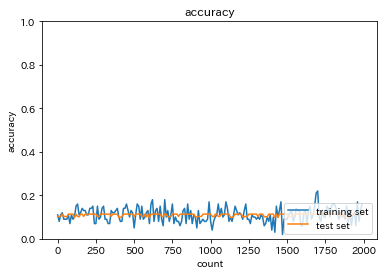
">

- 配布ファイル「2_2_1_vanishing_gradient.ipynb」: ReLU - gauss
<img src="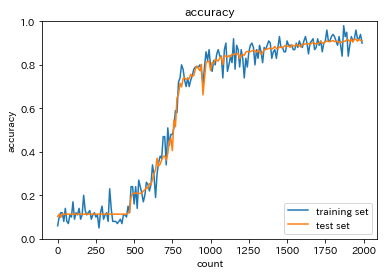
">

- 配布ファイル「2_2_1_vanishing_gradient.ipynb」: sigmoid - Xavier

<img src="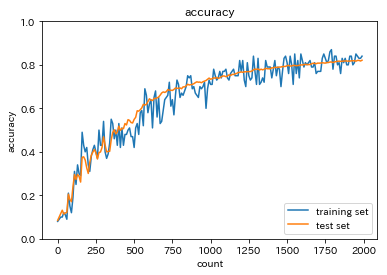
">

- 配布ファイル「2_2_1_vanishing_gradient.ipynb」: sigmoid - Xavier$\rightarrow$He

<img src="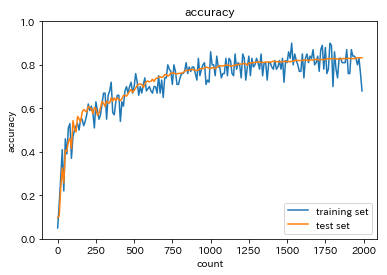
">

- 配布ファイル「2_2_1_vanishing_gradient.ipynb」: ReLU - He

<img src="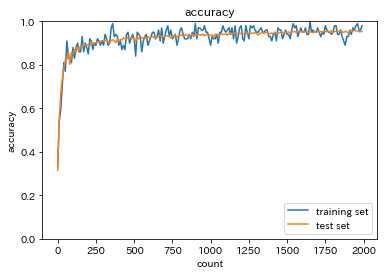
">

- 配布ファイル「2_2_1_vanishing_gradient.ipynb」: ReLU$\rightarrow$sigmoid - He

<img src="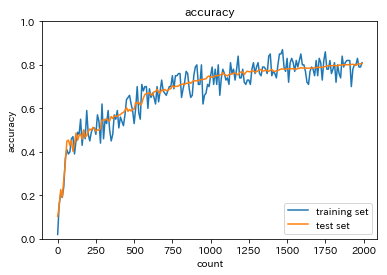
">

### 確認テスト考察
- 問1. 連鎖律の原理を使い、$\frac{\mathrm{d}z}{\mathrm{d}x}$を求めよ。
- 答1.
$$
\begin{eqnarray}
    z&=&t^{2} \\
    \frac{\mathrm{d}z}{\mathrm{d}t}&=&2t \\
    t&=&x+y \\
    \frac{\mathrm{d}t}{\mathrm{d}x}&=&1 \\
    \frac{\mathrm{d}z}{\mathrm{d}x}&=&\frac{\mathrm{d}z}{\mathrm{d}t}\cdot \frac{\mathrm{d}t}{\mathrm{d}x} \\
    &=&2t\cdot 1 \\
    &=&2t \\
    &=&2(x+y)
\end{eqnarray}
$$

- 問2. シグモイド関数$\sigma (x)$を微分した時、入力値$x$が$0$の時に最大値をとる。その値として正しいものを選択肢から選べ。
    1. $0.15$
    1. $0.25$
    1. $0.35$
    1. $0.45$
- 答2. 「2. $0.25$」である。
$$
\begin{eqnarray}
    \sigma (x)&=&\frac{1}{1+\exp(-x)} \tag{1} \\
    \sigma (x)^{\prime}&=&(1-\sigma (x))\cdot \sigma (x) \tag{2} \\
    x&=&0 \tag{3} \\
    \sigma (0)^{\prime}&=&(1-\sigma (0))\cdot \sigma (0) \tag{4} \\
    &=&0.5\cdot 0.5 \tag{5} \\
    &=&0.25 \tag{6}
\end{eqnarray}
$$
    1. シグモイド関数
    1. シグモイド関数の導関数
    1. シグモイド関数の導関数が最大値をとる入力値

- 問3. 重みの初期値に$0$を設定すると、どのような問題が発生するか。簡潔に説明せよ。
- 答3. 全ての値が同じ値で伝わる為、パラメータのチューニングが行われなくなる。

- 問4. 一般的に考えられるバッチ正規化の効果を2点挙げよ。
- 答4. 
    1. 計算の高速化。
    1. 勾配消失が起きづらくなる。

### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|Guido van Rossum（鴨澤眞夫訳）|Pythonチュートリアル 第3版|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|
|寺田学, 辻真吾, 鈴木たかのり, 福島真太朗|Pythonによるあたらしいデータ分析の教科書|翔泳社|2018年|

## Section2 : 学習率最適化手法
- 決め方
    - 大きめの値から徐々に小さくして行く
- パラメータ更新
    - 通常の手法
        - 勾配降下法
            - 誤差をパラメータで微分したものと学習率の積を減算する
    - 学習率最適化手法
        - モメンタム
        ```python
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]
        ```
            - 誤差のパラメータで微分したものと学習率の積を計算した後、現在の重みに前回の重みを減算した値と慣性の積を加算する
            - メリット
                - 局所的最適解にはならず、大域的最適解となる
                - **谷間に着いてから最も低い位置（最適値）に行く迄の時間が早い**
        - AdaGrad
        ```python
        # h[key]の中に0がないことが前提
        h[key] += np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]))
        ```
            - 誤差をパラメータで微分したものと再定義した学習率の積を減算する
            - メリット
                - **勾配のゆるやかな斜面に対して、最適値に近づける**
            - デメリット
                - 学習率を小さくして行くので鞍点問題を起こし易い
                    - 解決策としてRMSPropがある
        - RMSProp
        ```python
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)
        ```
            - 誤差をパラメータで微分したものと再定義した学習率の積を減算する**AdaGradの改良版**
            - メリット
                - 局所的最適解にはならず、大域的最適解となる
                - **ハイパーパラメータの調整が必要な場合が少ない**
        - Adam
            ```python
            m[key] += (1 - beta1) * (grad[key] - m[key])
            v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])
            network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7) 
            ```
            - モメンタムの、過去の勾配の指数関数的減衰平均
            - RMSPropの、過去の勾配の2乗の指数関数的減衰平均
            - モメンタムとRMSPropとの最適化アルゴリズム
            - メリット
                - **モメンタム及びRMSPropのメリットを孕んだ**アルゴリズム
                    - 故に最も多用される最適化手法

### 実装演習結果

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`learning_rate`|$0.01$||
|`activation`|シグモイド関数||
|`weight_init_std`|$0.01$||
|`use_batchnorm`|False||

- 配布ファイル「2_4_optimizer.ipynb」: SGD

<img src="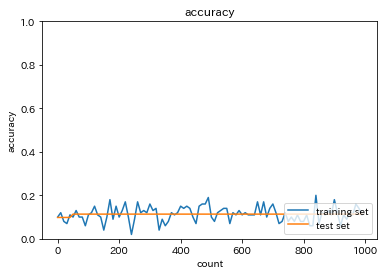
">

- 配布ファイル「2_4_optimizer.ipynb」: Momentum

<img src="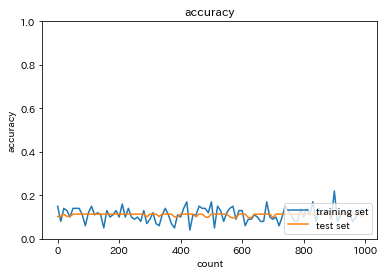
">

- 配布ファイル「2_4_optimizer.ipynb」: MomentumをもとにAdaGradを作ってみよう

<img src="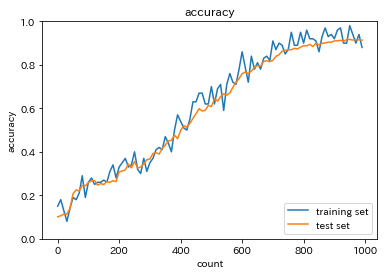
">

- 配布ファイル「2_4_optimizer.ipynb」: RSMprop

<img src="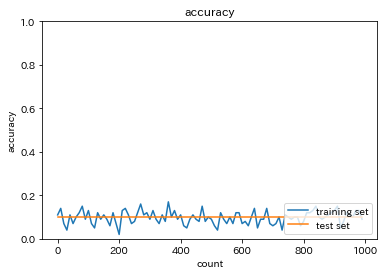
">

- 配布ファイル「2_4_optimizer.ipynb」: Adam

<img src="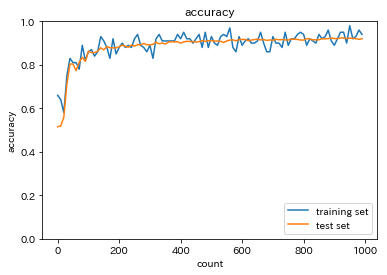
">

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`learning_rate`|$0.1$||
|`activation`|シグモイド関数||
|`weight_init_std`|$0.01$||
|`use_batchnorm`|False||

- 配布ファイル「2_4_optimizer.ipynb」: SGD

<img src="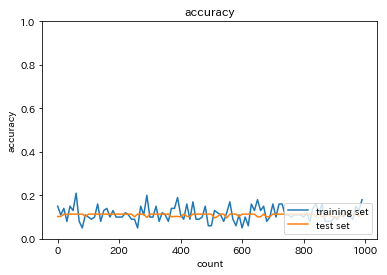
">

- 配布ファイル「2_4_optimizer.ipynb」: Momentum

<img src="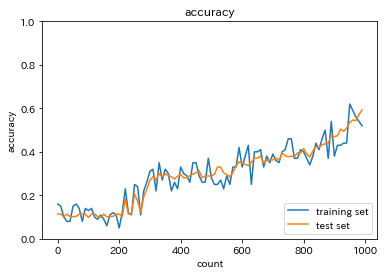
">

- 配布ファイル「2_4_optimizer.ipynb」: MomentumをもとにAdaGradを作ってみよう

<img src="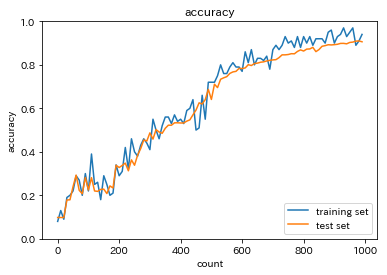
">

- 配布ファイル「2_4_optimizer.ipynb」: RSMprop

<img src="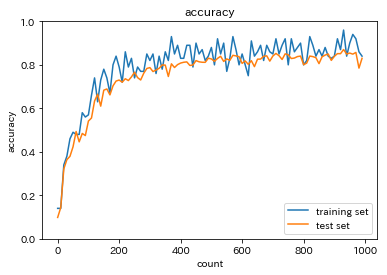
">

- 配布ファイル「2_4_optimizer.ipynb」: Adam

<img src="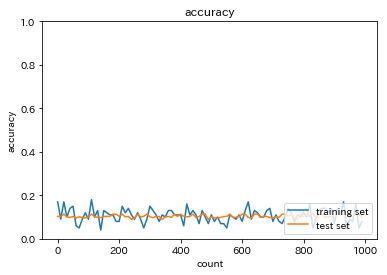
">

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`learning_rate`|$0.1$||
|`activation`|ReLU関数||
|`weight_init_std`|$0.01$||
|`use_batchnorm`|False||

- 配布ファイル「2_4_optimizer.ipynb」: SGD

<img src="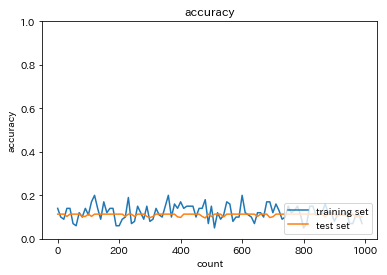
">

- 配布ファイル「2_4_optimizer.ipynb」: Momentum

<img src="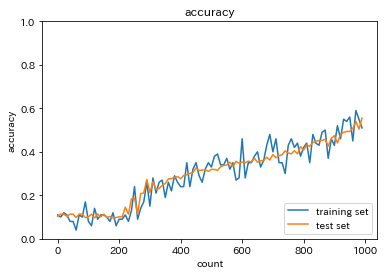
">

- 配布ファイル「2_4_optimizer.ipynb」: MomentumをもとにAdaGradを作ってみよう

<img src="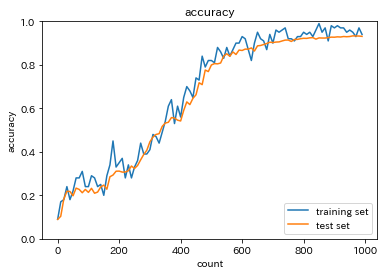
">

- 配布ファイル「2_4_optimizer.ipynb」: RSMprop

<img src="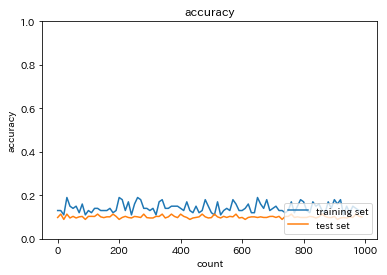
">

- 配布ファイル「2_4_optimizer.ipynb」: Adam

<img src="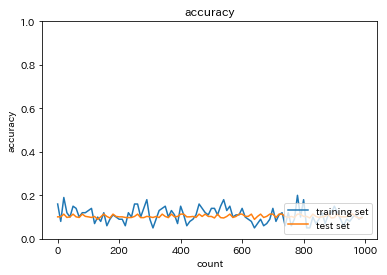
">

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`learning_rate`|$0.1$||
|`activation`|ReLU関数||
|`weight_init_std`|$0.1$||
|`use_batchnorm`|False||

- 配布ファイル「2_4_optimizer.ipynb」: SGD

<img src="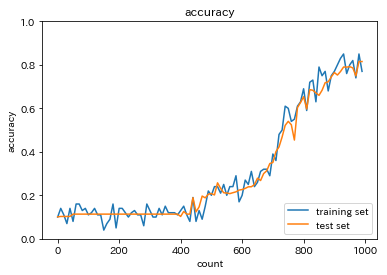
">

- 配布ファイル「2_4_optimizer.ipynb」: Momentum

<img src="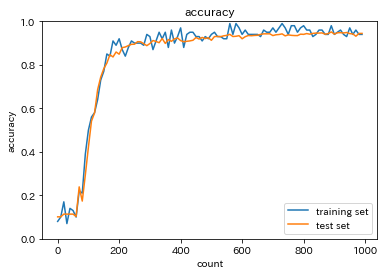
">

- 配布ファイル「2_4_optimizer.ipynb」: MomentumをもとにAdaGradを作ってみよう

<img src="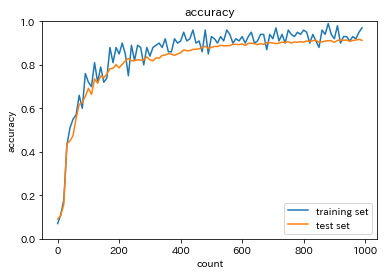
">

- 配布ファイル「2_4_optimizer.ipynb」: RSMprop

<img src="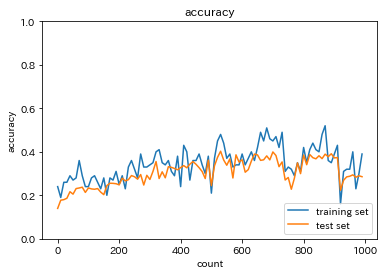
">

- 配布ファイル「2_4_optimizer.ipynb」: Adam

<img src="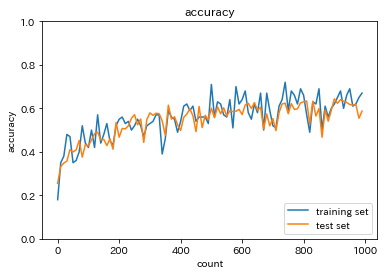
">

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`learning_rate`|$0.1$||
|`activation`|ReLU関数||
|`weight_init_std`|$0.1$||
|`use_batchnorm`|False||

- 配布ファイル「2_4_optimizer.ipynb」: SGD

<img src="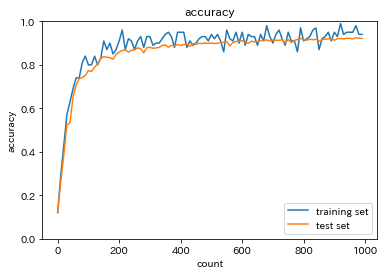
">

- 配布ファイル「2_4_optimizer.ipynb」: Momentum

<img src="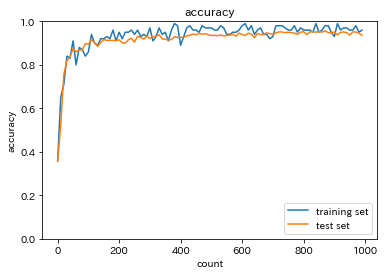
">

- 配布ファイル「2_4_optimizer.ipynb」: MomentumをもとにAdaGradを作ってみよう

<img src="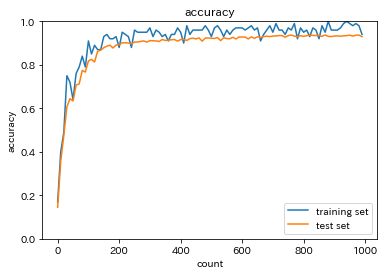
">

- 配布ファイル「2_4_optimizer.ipynb」: RSMprop

<img src="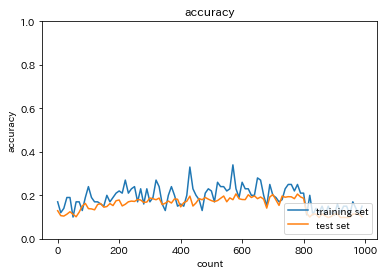
">

- 配布ファイル「2_4_optimizer.ipynb」: Adam

<img src="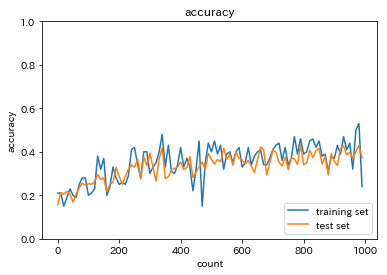
">

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`learning_rate`|$0.1$||
|`activation`|ReLU関数||
|`weight_init_std`|$0.1$||
|`use_batchnorm`|True||

- 配布ファイル「2_4_optimizer.ipynb」: SGD

<img src="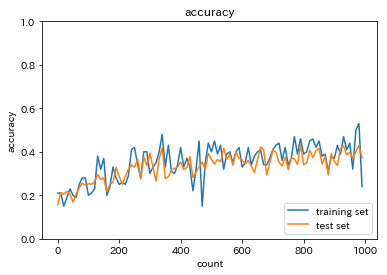
">

- 配布ファイル「2_4_optimizer.ipynb」: Momentum

<img src="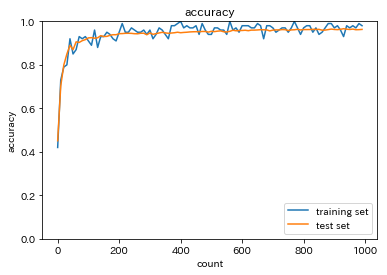
">

- 配布ファイル「2_4_optimizer.ipynb」: MomentumをもとにAdaGradを作ってみよう

<img src="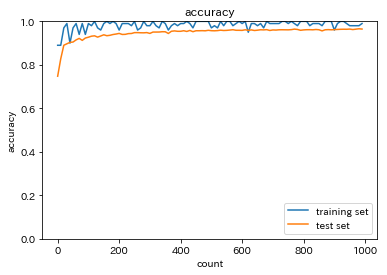
">

- 配布ファイル「2_4_optimizer.ipynb」: RSMprop

<img src="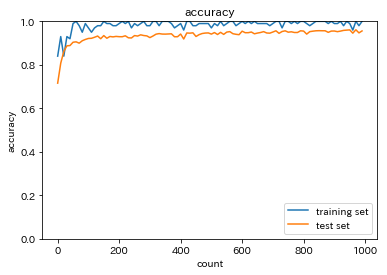
">

- 配布ファイル「2_4_optimizer.ipynb」: Adam

<img src="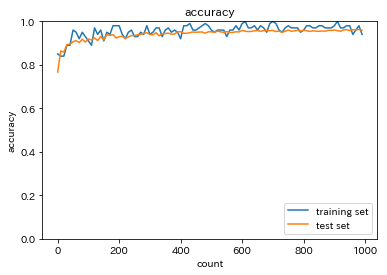
">

### 確認テスト考察
- 問1. モメンタム・AdaGrad・RMSPropの特徴をそれぞれ簡潔に説明せよ。
- 答1. 
    - モメンタム: 谷間に着いてから最も低い位置（最適値）に行く迄の時間が早い
    - AdaGrad: 勾配のゆるやかな斜面に対して、最適値に近づける
    - RMSProp: ハイパーパラメータの調整が必要な場合が少ない

### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|Guido van Rossum（鴨澤眞夫訳）|Pythonチュートリアル 第3版|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|
|寺田学, 辻真吾, 鈴木たかのり, 福島真太朗|Pythonによるあたらしいデータ分析の教科書|翔泳社|2018年|

## Section3 : 過学習
# 過学習
- 原因
    - パラメータの数が多い
    - パラメータの値が適切ではない
        - 重みの値が大きい
    - ノード数が多い etc...
- 解決策
    - 正則化
        - ネットワークの自由度（層数、ノード数、パラメータの値）を制限すること
        - 手法
            - L1正則化$(P=1)$
                - Lasso
                - スパース化問題に対応
                - 符号関数を使う
                - `weight_decay_lambda`
                    - 値が小さ過ぎると過学習が起き易くなる
                    - 値が大き過ぎると学習が進まなくなる
            - L2正則化$(P=2)$
                - Ridge
                - ハイパーパラメータを大きな値にすると全ての重みが限りなく0に近付く
            - ドロップアウト
                - ランダムにノードを非活性にして学習
                - CNNでよく使われる
            - Weight Decay (荷重減衰)
                - 過学習が起きそうな重みの大きさ以下に抑え、かつ重みの大きさにばらつきを出す

### 実装演習結果
- 配布ファイル「2_5_overfiting.ipynb」: overfiting

<img src="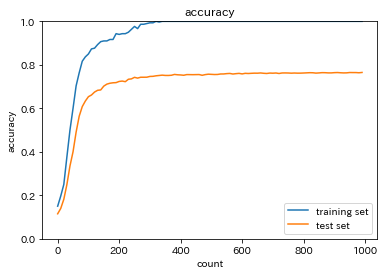
">

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`weight_decay_lambda`|$0.1$||

- 配布ファイル「2_5_overfiting.ipynb」: L2

<img src="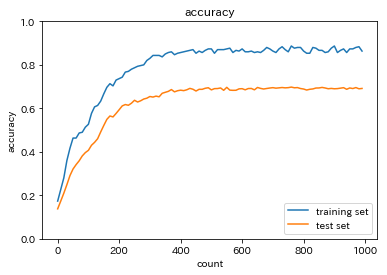
">

- 配布ファイル「2_5_overfiting.ipynb」: L1

<img src="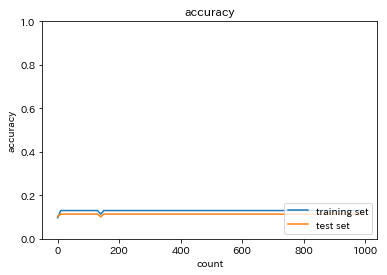
">

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`weight_decay_lambda`|$1$||

- 配布ファイル「2_5_overfiting.ipynb」: L2

<img src="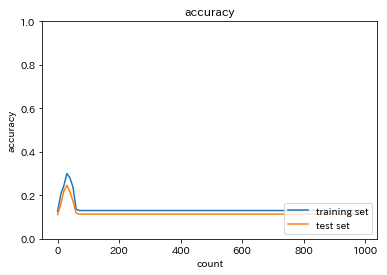
">

- 配布ファイル「2_5_overfiting.ipynb」: L1

<img src="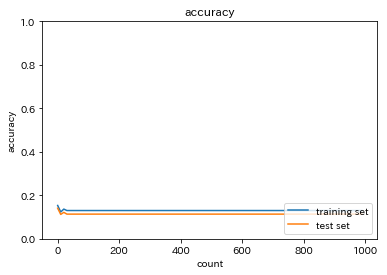
">

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`weight_decay_lambda`|$0.001$||

- 配布ファイル「2_5_overfiting.ipynb」: L2

<img src="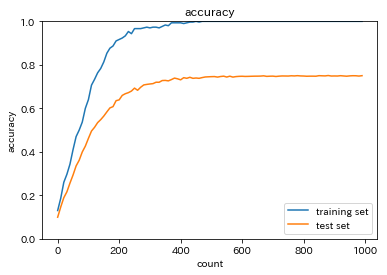
">

- 配布ファイル「2_5_overfiting.ipynb」: L1

<img src="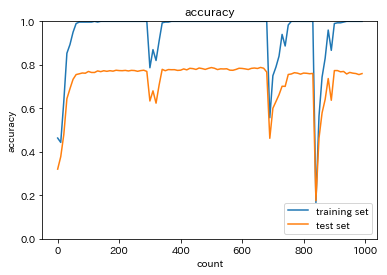
">

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`dropout_ratio`|$0.15$|閾値|
|`optimizer`|確率的勾配降下法||

- 配布ファイル「2_5_overfiting.ipynb」: Dropout

<img src="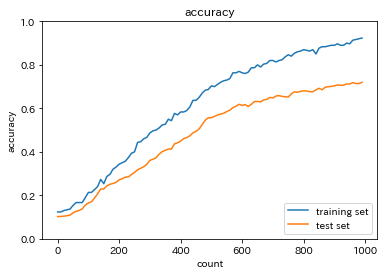
">

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`dropout_ratio`|$1.5$|閾値|
|`optimizer`|確率的勾配降下法||

- 配布ファイル「2_5_overfiting.ipynb」: Dropout

<img src="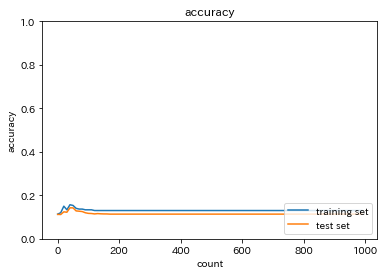
">

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`dropout_ratio`|$0.0015$|閾値|
|`optimizer`|確率的勾配降下法||

- 配布ファイル「2_5_overfiting.ipynb」: Dropout

<img src="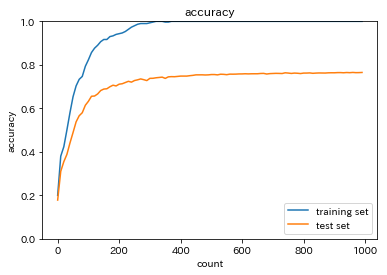
">

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`dropout_ratio`|$0.15$|閾値|
|`optimizer`|モメンタム||

- 配布ファイル「2_5_overfiting.ipynb」: Dropout

<img src="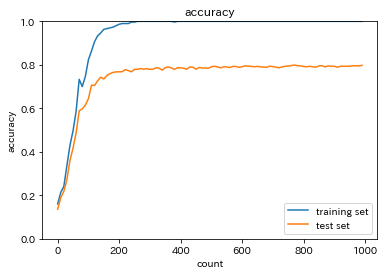
">

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`dropout_ratio`|$0.15$|閾値|
|`optimizer`|AdaGrad||

- 配布ファイル「2_5_overfiting.ipynb」: Dropout

<img src="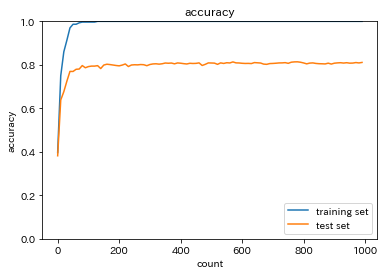
">

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`dropout_ratio`|$0.15$|閾値|
|`optimizer`|Adam||

- 配布ファイル「2_5_overfiting.ipynb」: Dropout

<img src="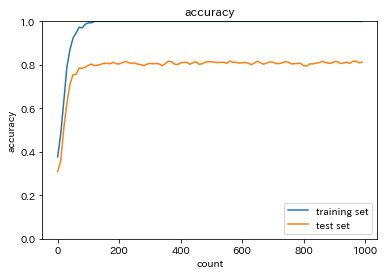
">

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`dropout_ratio`|$0.08$|閾値|
|`weight_decay_lambda`|$0.004$||

- 配布ファイル「2_5_overfiting.ipynb」: Dropout + L1
<img src="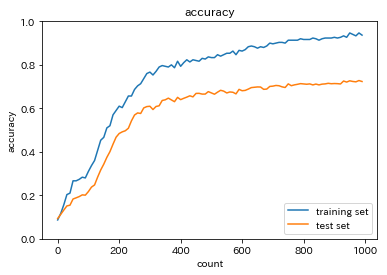
">

### 確認テスト考察
- 問1. 機械学習で使われる線形モデル（線形回帰、主成分分析、etc...）の正則化は、モデルの重みを確認することで可能となる。<br />前途の線形モデルの正則化手法の中にリッジ回帰という手法があり、その特徴として正しいものを選択しなさい。
    1. ハイパーパラメータを大きな値に設定すると、すべての重みが限りなく$0$に近づく。
    1. ハイパーパラメータを$0$に設定すると、非線形回帰となる。
    1. バイアス項についても、正則化される。
    1. リッジ回帰の場合、隠れ層（中間層）に対して正則項を加える。
- 答1. 「1. ハイパーパラメータを大きな値に設定すると、すべての重みが限りなく$0$に近づく。」

- 問2. L1正則化を表しているグラフはどちらか答えよ。
    1. Ridge推定量のグラフ
    1. Lasso推定量のグラフ
- 答2. 「2. Lasso推定量のグラフ」

### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|

## Section4 : 畳み込みニューラルネットワークの概念
- LeNet
- 入力層
    - 多次元データの平坦化（flatten）が不要
    - 画像
    - 音楽
- 畳み込み層
    - 構成
    1. 入力値
    1. フィルター
        - バイアス
        - パディング
        - ストライド
        - チャンネル
            - 奥行き数
            - フィルターはチャンネル数分用意
    1. 出力値
    1. バイアス
    1. 活性化関数
    1. 出力値
- プーリング層
   - 手法
       - マックスプーリング
       - アベレージプーリング
   - 特徴マップのサイズ（の公式）
       - ストライド$$\mathrm{S}$$
       - パディング$$\mathrm{P}$$
       - フィルターの高さ$$\mathrm{FH}$$
       - フィルターの幅$$\mathrm{FW}$$
       - 入力画像の高さ$$\mathrm{H}$$
       - 入力画像の幅$$\mathrm{W}$$
       - 特徴マップの高さ
$$
\mathrm{OH}=\frac{\mathrm{H}+2\mathrm{P}-\mathrm{FH}}{\mathrm{S}}+1
$$
       - 特徴マップの幅
$$
\mathrm{OW}=\frac{\mathrm{W}+2\mathrm{P}-\mathrm{FW}}{\mathrm{S}}+1
$$
- 全結合層
    - 一次元データを扱う
- 全結合のみで学習した際のデメリット
    - 多次元のデータを一次元に平坦化してしまう為、隣接データとの関係が学習に反映されなくなる

### 実装演習結果

|設定項目|値|備考|
|:--|--:|:--|
|入力データの各次元のサイズ|$$2 \times 1 \times 4 \times 4$$|number, channel, height, widthを表す|
|フィルターサイズ|$$3 \times 3$$||
|ストライド|$1$||
|パディング|$0$||

- 配布ファイル「2_6_simple_convolution_network.ipynb」: im2col

```
========== input_data ===========
 [[[[20. 43. 98. 41.]
   [61. 57. 70. 10.]
   [85. 31. 70. 71.]
   [10. 13. 73. 37.]]]


 [[[ 5. 37.  9. 78.]
   [85. 38. 86.  8.]
   [44. 14. 98. 18.]
   [66. 96. 93. 97.]]]]
==============================
============= col ==============
 [[20. 43. 98. 61. 57. 70. 85. 31. 70.]
 [43. 98. 41. 57. 70. 10. 31. 70. 71.]
 [61. 57. 70. 85. 31. 70. 10. 13. 73.]
 [57. 70. 10. 31. 70. 71. 13. 73. 37.]
 [ 5. 37.  9. 85. 38. 86. 44. 14. 98.]
 [37.  9. 78. 38. 86.  8. 14. 98. 18.]
 [85. 38. 86. 44. 14. 98. 66. 96. 93.]
 [38. 86.  8. 14. 98. 18. 96. 93. 97.]]
==============================
```

- 配布ファイル「2_6_simple_convolution_network.ipynb」: im2col
    - transposeの処理をしている行をコメントアウト

```
========== input_data ===========
 [[[[71. 82.  3. 59.]
   [46. 25. 74. 77.]
   [57. 84.  0. 15.]
   [55.  9.  6. 83.]]]


 [[[86. 70. 87. 24.]
   [22. 44. 61. 92.]
   [20. 96. 84.  9.]
   [41.  7. 36. 88.]]]]
==============================
============= col ==============
 [[71. 82. 46. 25. 82.  3. 25. 74.  3.]
 [59. 74. 77. 46. 25. 57. 84. 25. 74.]
 [84.  0. 74. 77.  0. 15. 57. 84. 55.]
 [ 9. 84.  0.  9.  6.  0. 15.  6. 83.]
 [86. 70. 22. 44. 70. 87. 44. 61. 87.]
 [24. 61. 92. 22. 44. 20. 96. 44. 61.]
 [96. 84. 61. 92. 84.  9. 20. 96. 41.]
 [ 7. 96. 84.  7. 36. 84.  9. 36. 88.]]
==============================
```

<hr />

|設定項目|値|備考|
|:--|--:|:--|
|入力データの各次元のサイズ|$$3 \times 2 \times 5 \times 5$$|number, channel, height, widthを表す|
|フィルターサイズ|$$4 \times 4$$||
|ストライド|$2$||
|パディング|$1$||

- 配布ファイル「2_6_simple_convolution_network.ipynb」: im2col

```
========== input_data ===========
 [[[[57. 10. 32. 68. 87.]
   [45. 35. 34. 47. 96.]
   [17. 27. 62. 64. 91.]
   [34. 80. 67. 81. 11.]
   [47. 32. 32. 19. 69.]]

  [[84. 73. 38.  5. 43.]
   [30. 43. 78.  5. 63.]
   [91. 52. 65. 20. 27.]
   [61.  7. 12. 27. 71.]
   [10. 11. 65. 16. 56.]]]


 [[[74. 21. 56. 25. 75.]
   [80. 62. 55. 65. 89.]
   [80. 10. 13. 67.  7.]
   [58. 33. 62. 96. 67.]
   [49. 10. 88. 32. 44.]]

  [[67. 52. 37. 18. 12.]
   [64.  6. 63. 46. 88.]
   [25. 59. 22.  3. 11.]
   [50. 53. 12. 95. 84.]
   [82. 46. 41.  5. 34.]]]


 [[[15. 54. 77.  7. 26.]
   [56. 33. 21.  1.  3.]
   [26. 55. 60. 21. 25.]
   [82. 29. 45. 86. 77.]
   [ 7. 17. 57. 51. 18.]]

  [[20. 15. 83. 77. 62.]
   [52. 61. 16. 64. 19.]
   [47. 51.  4. 67. 43.]
   [71. 19. 47. 91.  2.]
   [ 2. 27. 75. 64. 20.]]]]
==============================
============= col ==============
 [[ 0.  0.  0.  0.  0. 57. 10. 32.  0. 45. 35. 34.  0. 17. 27. 62.  0.  0.
   0.  0.  0. 84. 73. 38.  0. 30. 43. 78.  0. 91. 52. 65.]
 [ 0.  0.  0.  0. 10. 32. 68. 87. 35. 34. 47. 96. 27. 62. 64. 91.  0.  0.
   0.  0. 73. 38.  5. 43. 43. 78.  5. 63. 52. 65. 20. 27.]
 [ 0. 45. 35. 34.  0. 17. 27. 62.  0. 34. 80. 67.  0. 47. 32. 32.  0. 30.
  43. 78.  0. 91. 52. 65.  0. 61.  7. 12.  0. 10. 11. 65.]
 [35. 34. 47. 96. 27. 62. 64. 91. 80. 67. 81. 11. 32. 32. 19. 69. 43. 78.
   5. 63. 52. 65. 20. 27.  7. 12. 27. 71. 11. 65. 16. 56.]
 [ 0.  0.  0.  0.  0. 74. 21. 56.  0. 80. 62. 55.  0. 80. 10. 13.  0.  0.
   0.  0.  0. 67. 52. 37.  0. 64.  6. 63.  0. 25. 59. 22.]
 [ 0.  0.  0.  0. 21. 56. 25. 75. 62. 55. 65. 89. 10. 13. 67.  7.  0.  0.
   0.  0. 52. 37. 18. 12.  6. 63. 46. 88. 59. 22.  3. 11.]
 [ 0. 80. 62. 55.  0. 80. 10. 13.  0. 58. 33. 62.  0. 49. 10. 88.  0. 64.
   6. 63.  0. 25. 59. 22.  0. 50. 53. 12.  0. 82. 46. 41.]
 [62. 55. 65. 89. 10. 13. 67.  7. 33. 62. 96. 67. 10. 88. 32. 44.  6. 63.
  46. 88. 59. 22.  3. 11. 53. 12. 95. 84. 46. 41.  5. 34.]
 [ 0.  0.  0.  0.  0. 15. 54. 77.  0. 56. 33. 21.  0. 26. 55. 60.  0.  0.
   0.  0.  0. 20. 15. 83.  0. 52. 61. 16.  0. 47. 51.  4.]
 [ 0.  0.  0.  0. 54. 77.  7. 26. 33. 21.  1.  3. 55. 60. 21. 25.  0.  0.
   0.  0. 15. 83. 77. 62. 61. 16. 64. 19. 51.  4. 67. 43.]
 [ 0. 56. 33. 21.  0. 26. 55. 60.  0. 82. 29. 45.  0.  7. 17. 57.  0. 52.
  61. 16.  0. 47. 51.  4.  0. 71. 19. 47.  0.  2. 27. 75.]
 [33. 21.  1.  3. 55. 60. 21. 25. 29. 45. 86. 77. 17. 57. 51. 18. 61. 16.
  64. 19. 51.  4. 67. 43. 19. 47. 91.  2. 27. 75. 64. 20.]]
==============================
```

- 配布ファイル「2_6_simple_convolution_network.ipynb」: col2im

```
array([[[[ 57.,  20.,  64.,  68.,  87.],
         [ 90., 140., 136.,  94., 192.],
         [ 34., 108., 248., 128., 182.],
         [ 34., 160., 134.,  81.,  11.],
         [ 47.,  64.,  64.,  19.,  69.]],

        [[ 84., 146.,  76.,   5.,  43.],
         [ 60., 172., 312.,  10., 126.],
         [182., 208., 260.,  40.,  54.],
         [ 61.,  14.,  24.,  27.,  71.],
         [ 10.,  22., 130.,  16.,  56.]]],


       [[[ 74.,  42., 112.,  25.,  75.],
         [160., 248., 220., 130., 178.],
         [160.,  40.,  52., 134.,  14.],
         [ 58.,  66., 124.,  96.,  67.],
         [ 49.,  20., 176.,  32.,  44.]],

        [[ 67., 104.,  74.,  18.,  12.],
         [128.,  24., 252.,  92., 176.],
         [ 50., 236.,  88.,   6.,  22.],
         [ 50., 106.,  24.,  95.,  84.],
         [ 82.,  92.,  82.,   5.,  34.]]],


       [[[ 15., 108., 154.,   7.,  26.],
         [112., 132.,  84.,   2.,   6.],
         [ 52., 220., 240.,  42.,  50.],
         [ 82.,  58.,  90.,  86.,  77.],
         [  7.,  34., 114.,  51.,  18.]],

        [[ 20.,  30., 166.,  77.,  62.],
         [104., 244.,  64., 128.,  38.],
         [ 94., 204.,  16., 134.,  86.],
         [ 71.,  38.,  94.,  91.,   2.],
         [  2.,  54., 150.,  64.,  20.]]]])
```

<hr />

- 配布ファイル「2_6_simple_convolution_network.ipynb」: sinple convolution network class
    - conv - relu - pool - affine - relu - affine - softmax

<img src="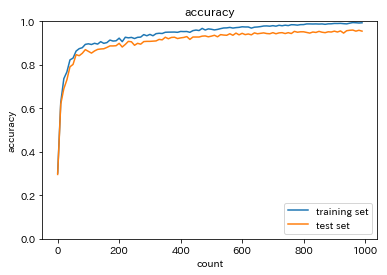
">

### 確認テスト考察
- 問1. サイズ$6 \times 6$の入力画像を、サイズ$2 \times 2$のフィルターで畳み込んだ時の出力画像のサイズを答えよ。なおストライドとパディングは$1$とする。
- 答1. 
$$
\begin{eqnarray}
    \mathrm{P}&=&1 \tag{1} \\
    \mathrm{S}&=&1 \tag{2} \\
    \mathrm{W}&=&\mathrm{H}&=&6 \tag{3} \\
    \mathrm{FW}&=&\mathrm{FH}&=&2 \tag{4} \\
    \mathrm{OW}&=&\mathrm{OH}&=&\frac{\mathrm{H}+2\mathrm{P}-\mathrm{FH}}{\mathrm{S}}+1 \tag{5} \\
    &&&=&\frac{6+2\cdot 1-2}{1}+1 \tag{6} \\
    &&&=&7 \tag{7}
\end{eqnarray}
$$
    1. パディングは$1$
    1. ストライドは$1$
    1. サイズ$6 \times 6$の入力画像
    1. サイズ$2 \times 2$のフィルター

### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|
|明松真司, 田原眞一（杉山将監修）|徹底攻略 ディープラーニングG検定 ジェネラリスト問題集|インプレス|2019年|

## Section5 : 最新のCNN
- AlexNet
    - 画像認識コンペティションILSVRC2012で優勝したモデル
    - 5層の畳み込み層・プーリング層、3層の全結合層で構成
    - サイズ4096の全結合層にドロップアウトを使用


### 実装演習結果
- 配布ファイル「2_7_double_comvolution_network.ipynb」: double_comvolution_network
    - conv - relu - pool - conv - relu - pool - affine - relu - affine - softmax

<img src="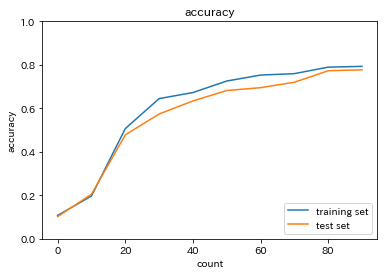
">

- 配布ファイル「2_7_double_comvolution_network.ipynb」: double_comvolution_network
    - conv - relu - conv - relu - pool - affine - relu - affine - softmax

<img src="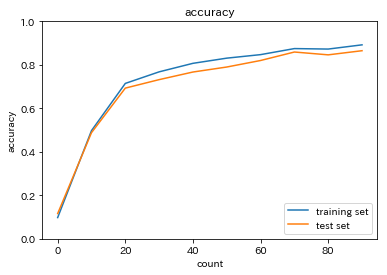
">

- 配布ファイル「2_8_deep_convolution_net.ipynb」: deep convolution network
    - conv - relu - conv- relu - pool -conv - relu - conv- relu - pool - conv - relu - conv- relu - pool - affine - relu - dropout - affine - dropout - softmax

<img src="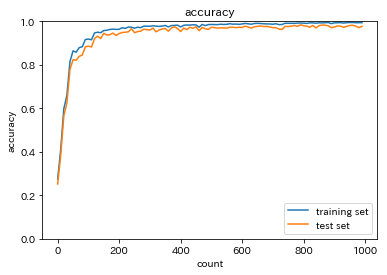
">

<!--
### 確認テスト考察
-->

### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|

# レポート（深層学習・day3）

## Section1 : 再帰型ニューラルネットワークの概念
- RNNと略される
- **時系列データ**に対応可能なニューラルネットワーク
    - 時系列データとは、時間的順序を追って一定間隔毎に観察され、しかも相互に統計的依存関係が認められるようなデータの系列
    - 時間的順序を保持したデータの系列
        - Pythonのデータ構造でいえば、順序を保持した「リスト」、順序を保持しない「集合」の中では前者に近い
    - 例. 音声データ、テキストデータ
- 中間層が重要
    - 各時刻の状態を区別する為、初期の時刻を$0$、最新の時刻を$4$としたとき$$\mathrm{s}_{0},\mathrm{s}_{1},\mathrm{s}_{3}, \mathrm{s}_{4}$$と列挙できる
        - $\mathrm{s}_{0}$は初期の状態、$\mathrm{s}_{4}$は最新の状態を表わす
        - 任意の時刻$t$の状態は$$s_{t}$$と表わす
- RNNの全体像
$$
\begin{array}{rrrrr}
    \mathbf{x}_{4} & \underrightarrow{\hspace{16pt}\mathbf{W}_{\mathrm{(in)}}\hspace{16pt}} & \mathrm{s}_{4} & \underrightarrow{\hspace{14pt}\mathbf{W}_{\mathrm{(out)}}\hspace{14pt}} & \mathbf{y}_{4} \\
    && \mathbf{W}\uparrow && \\
    \mathbf{x}_{3} & \underrightarrow{\hspace{16pt}\mathbf{W}_{\mathrm{(in)}}\hspace{16pt}} & \mathrm{s}_{3} & \underrightarrow{\hspace{14pt}\mathbf{W}_{\mathrm{(out)}}\hspace{14pt}} & \mathbf{y}_{3} \\
    && \mathbf{W}\uparrow && \\
    \mathbf{x}_{2} & \underrightarrow{\hspace{16pt}\mathbf{W}_{\mathrm{(in)}}\hspace{16pt}} & \mathrm{s}_{2} & \underrightarrow{\hspace{14pt}\mathbf{W}_{\mathrm{(out)}}\hspace{14pt}} & \mathbf{y}_{2} \\
    && \mathbf{W}\uparrow && \\
    \mathbf{x}_{1} & \underrightarrow{\hspace{16pt}\mathbf{W}_{\mathrm{(in)}}\hspace{16pt}} & \mathrm{s}_{1} & \underrightarrow{\hspace{14pt}\mathbf{W}_{\mathrm{(out)}}\hspace{14pt}} & \mathbf{y}_{1} \\
    && \mathbf{W}\uparrow && \\
    && \mathrm{s}_{0} && \\
    && \text{unfold}\,\Uparrow && \\
    \mathbf{x}_{\,} & \underrightarrow{\hspace1in} & \mathrm{s}_{\,} & \underleftarrow{\hspace1in} & \mathbf{y}_{\,} \\
    && \circlearrowright &&
\end{array}
$$

- 数式
$$
\begin{eqnarray}
    \mathbf{u}^{t}&=&\mathrm{W}_{\mathrm{(in)}}\mathbf{x}^{t}+\mathbf{W}\mathbf{z}^{t-1}+\mathbf{b} \\
    \mathbf{z}^{t}&=&f\left(\mathrm{W}_{\mathrm{(in)}}\mathbf{x}^{t}+\mathbf{W}\mathbf{z}^{t-1}+\mathbf{b}\right) \\
    \mathbf{v}^{t}&=&\mathrm{W}_{\mathrm{(out)}}\mathbf{z}^{t}+\mathbf{c} \\
    \mathbf{y}^{t}&=&g\left(\mathrm{W}_{\mathrm{(out)}}\mathbf{z}^{t}+\mathbf{c}\right)
\end{eqnarray}
$$

- 当該コード（配布ファイル「3_1_simple_RNN.ipynb」80～83行目、バイアス$\mathbf{b}$等は省略）

```python
u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
z[:,t+1] = functions.sigmoid(u[:,t+1])

y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))
```

- RNNの特徴
    - 時系列モデルを扱うには、初期の状態$\mathrm{s}_{0}$と、過去の時間の状態$\mathrm{s}_{t-1}$を保持し、そこから次の時間での$t$を再帰的に求める再帰構造が必要になる

- BPTT（通時的誤差逆伝播法）
    - RNNで用いられる誤差逆伝播法の一種
    - BPTTの数学的記述1
    $$
    \begin{eqnarray}
        \frac{\partial E}{\partial \mathbf{W}_{\mathrm{(in)}}}&=&\frac{\partial E}{\partial \mathbf{u}^{t}}\left[\frac{\partial \mathbf{u}^{t}}{\partial \mathbf{W}_{\mathrm{(in)}}}\right]^{\mathrm{T}}&=&\delta^{t} \left[\mathbf{x}^{t}\right]^{\mathrm{T}} \tag{1} \\
        \frac{\partial E}{\partial \mathbf{W}_{\mathrm{(out)}}}&=&\frac{\partial E}{\partial \mathbf{v}^{t}}\left[\frac{\partial \mathbf{v}^{t}}{\partial \mathbf{W}_{\mathrm{(out)}}}\right]^{\mathrm{T}}&=&\delta^{\mathrm{out},t} \left[\mathbf{z}^{t}\right]^{\mathrm{T}} \tag{2} \\
        \frac{\partial E}{\partial \mathbf{W}}&=&\frac{\partial E}{\partial \mathbf{u}^{t}}\left[\frac{\partial \mathbf{u}^{t-1}}{\partial \mathbf{W}}\right]^{\mathrm{T}}&=&\delta^{t} \left[\mathbf{z}^{t-1}\right]^{\mathrm{T}} \tag{3} \\
        \frac{\partial E}{\partial \mathbf{b}}&=&\frac{\partial E}{\partial \mathbf{u}^{t}}\cdot \frac{\partial \mathbf{u}^{t}}{\partial \mathbf{b}}&=&\delta^{t} \tag{4} \\
        \frac{\partial E}{\partial \mathbf{c}}&=&\frac{\partial E}{\partial \mathbf{u}^{t}}\cdot \frac{\partial \mathbf{u}^{t}}{\partial \mathbf{c}}&=&\delta^{\mathrm{out},t} \tag{5}
    \end{eqnarray}
    $$
        1. 誤差を、入力から現在の中間層を定義する際にかけられる重み$\mathrm{W}_{\mathrm{(in)}}$で微分
        
        ```python
        np.dot(X.T, delta[:,t].reshape(1,-1))
        ```
        
        1. 誤差を、中間層から出力を定義する際にかけられる重み$\mathrm{W}_{\mathrm{(out)}}$で微分
        
        ```python
        np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        ```
        
        1. 誤差を、中間層から次の中間層に渡されるときの重み$\mathrm{W}$で微分
        
        ```python
        np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        ```
        
        1. 誤差を、バイアス$\mathrm{b}$で微分
        1. 誤差を、もう1つのバイアス$\mathrm{c}$で微分
    - BPTTの数学的記述2
    $$
    \begin{eqnarray}
        \mathbf{u}^{t}&=&\mathbf{W}_{\mathrm{(in)}}\mathbf{x}^{t}+\mathbf{W}\mathbf{z}^{t-1}+\mathbf{b} \tag{1} \\
        \mathbf{z}^{t}&=&f\left(\mathbf{W}_{\mathrm{(in)}}\mathbf{x}^{t}+\mathbf{W}\mathbf{z}^{t-1}+\mathbf{b}\right) \tag{2} \\
        \mathbf{v}^{t}&=&\mathbf{W}_{\mathrm{(out)}}\mathbf{z}^{t}+\mathbf{c} \tag{3} \\
        \mathbf{y}^{t}&=&g\left(\mathbf{W}_{\mathrm{(out)}}\mathbf{z}^{t}+\mathbf{c}\right) \tag{4}
    \end{eqnarray}
    $$
        1. 総入力$\mathbf{u}^{t}$: 入力から現在の中間層を定義する際にかけられる重み$\mathrm{W}_{\mathrm{(in)}}$と入力$\mathbf{x}^{t}$との内積をとったものと、中間層から次の中間層に渡されるときの重み$\mathrm{W}$と過去の中間層出力$\mathbf{z}^{t-1}$との内積をとったもの（と、バイアス$\mathbf{b}$）とを足し合わせる
        ```python
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        ```
        
        1. 中間層出力$\mathbf{z}^{t}$: 総入力$\mathbf{u}^{t}$に、中間層の活性化関数$f(\cdot)$を作用させる
        
        ```python
        z[:,t+1] = functions.sigmoid(u[:,t+1])
        ```
        
        1. 総入力$\mathbf{v}^{t}$: 中間層から出力を定義する際にかけられる重み$\mathrm{W}_{\mathrm{(out)}}$と中間層出力$\mathbf{z}^{t}$との内積をとったもの（と、バイアス$\mathbf{c}$）とを足し合わせる
        
        ```python
        np.dot(z[:,t+1].reshape(1, -1), W_out)
        ```
        
        1. 出力$\mathbf{y}^{t}$: 総入力$\mathbf{v}^{t}$に、出力層の活性化関数$g(\cdot)$を作用させる
        
        ```python
        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))
        ```
        
    - BPTTの数学的記述3
    $$
    \begin{eqnarray}
        \frac{\partial E}{\partial \mathbf{u}^{t}}=\frac{\partial E}{\partial \mathbf{v}^{t}}\cdot \frac{\partial \mathbf{v}^{t}}{\partial \mathbf{u}^{t}}=\frac{\partial E}{\partial \mathbf{v}^{t}}\cdot \frac{\partial \left\{\mathbf{W}_{\mathrm{(out)}}f\left(\mathbf{u}^{t}\right)+c\right\}}{\partial \mathbf{u}^{t}}=f^{t}\left(u^{t}\right)\mathbf{W}_{\mathrm{(out)}}^{\mathrm{T}}\delta^{\mathrm{out},t}&=&\delta^{t} \tag{1} \\
        \delta^{t-1}=\frac{\partial E}{\partial \mathbf{u}^{t-1}}=\frac{\partial E}{\partial \mathbf{u}^{t}}\frac{\partial \mathbf{u}^{t}}{\partial \mathbf{u}^{t-1}}=\delta^{t}\left\{\frac{\partial \mathbf{u}^{t}}{\partial \mathbf{z}^{t-1}}\frac{\partial \mathbf{z}^{t-1}}{\partial \mathbf{u}^{t-1}}\right\}&=&\delta^{t}\left\{\mathbf{W}f^{t}\left(\mathbf{u}^{t-1}\right)\right\} \tag{2} \\
        \delta^{t-z-1}&=&\delta^{t-z}\left\{\mathbf{W}f^{t}\left(\mathbf{u}^{t-z-1}\right)\right\} \tag{3}
    \end{eqnarray}
    $$
        1. 
        
        ```python
        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])
        ```
        
    - BPTTの数学的記述4（パラメータ$\mathbf{W}_{\mathrm{(in)}},\mathbf{W},\mathbf{W}_{\mathrm{(out)}},\mathbf{b},\mathbf{c}$の勾配適用による更新式）
    $$
    \begin{eqnarray}
        \mathbf{W}_{\mathrm{(in)}}^{t+1}&=&\mathbf{W}_{\mathrm{(in)}}^{t}-\epsilon \frac{\partial E}{\partial \mathbf{W}_{\mathrm{(in)}}}=\mathbf{W}_{\mathrm{(in)}}^{t}-\epsilon \sum_{z=0}^{T_{t}}\delta^{t-z} \left[\mathbf{x}^{t-z}\right]^{\mathrm{T}} \tag{1} \\
        \mathbf{W}_{\mathrm{(out)}}^{t+1}&=&\mathbf{W}_{\mathrm{(out)}}^{t}-\epsilon \frac{\partial E}{\partial \mathbf{W}_{\mathrm{(out)}}}=\mathbf{W}_{\mathrm{(out)}}^{t}-\epsilon \delta^{\mathrm{out},t} \left[\mathbf{z}^{t}\right]^{\mathrm{T}} \tag{2} \\
         \mathbf{W}^{t+1}&=&\mathbf{W}^{t}-\epsilon \frac{\partial E}{\partial \mathbf{W}}=\mathbf{W}_{\mathrm{(in)}}^{t}-\epsilon \sum_{z=0}^{T_{t}}\delta^{t-z} \left[\mathbf{z}^{t-z-1}\right]^{\mathrm{T}} \tag{3} \\
         \mathbf{b}^{t+1}&=&\mathbf{b}^{t}-\epsilon \frac{\partial E}{\partial \mathbf{b}}=\mathbf{b}^{t}-\epsilon \sum_{z=0}^{T_{t}}\delta^{t-z} \tag{4} \\
         \mathbf{c}^{t+1}&=&\mathbf{c}^{t}-\epsilon \frac{\partial E}{\partial \mathbf{c}}=\mathbf{c}^{t}-\epsilon \delta^{\mathrm{out},t} \tag{5}
    \end{eqnarray}
    $$
        
        1. 
        
        ```python
        W_in -= learning_rate * W_in_grad
        ```
        
        1. 
        
        ```python
        W_out -= learning_rate * W_out_grad
        ```
        
        1. 
        
        ```python
        W -= learning_rate * W_grad
        ```
        
    - BPTTの全体像（式展開）
    $$
    \begin{eqnarray}
        E^{t}&=&loss\left(\mathbf{y}^{t},\mathbf{d}^{t}\right) \\
        &=&loss\left(g\left(\mathbf{W}_{\mathrm{(out)}}z^{t}+\mathbf{c}\right),\mathbf{d}^{t}\right) \\
        &=&loss\left(g\left(\mathbf{W}_{\mathrm{(out)}}
        f\underline{\left(\mathbf{W}_{\mathrm{(in)}}\mathbf{x}_{}^{t}+\mathbf{W}\mathbf{z}^{t-1}+\mathbf{b}\right)}
        +\mathbf{c}\right),\mathbf{d}^{t}\right)
    \end{eqnarray}
    $$
        - 下線部の$1$時刻前の中間層出力$\mathbf{z}^{t-1}$を展開すると
        $$\mathbf{W}_{\mathrm{(in)}}\mathbf{x}_{}^{t}+\mathbf{W}\mathbf{z}^{t-1}+\mathbf{b}$$
        $$\mathbf{W}_{\mathrm{(in)}}\mathbf{x}_{}^{t}+\mathbf{W}f(\mathbf{u}^{t-1})+\mathbf{b}$$
        $$\mathbf{W}_{\mathrm{(in)}}\mathbf{x}_{}^{t}+\mathbf{W}f\left(\mathbf{W}_{\mathrm{(in)}}\mathbf{x}_{}^{t-1}+\mathbf{W}\mathbf{z}^{t-2}+\mathbf{b}\right)+\mathbf{b}$$
        $2$時刻前の中間層出力$\mathbf{z}^{t-2}$に遡れる
    
    

### 実装演習結果
- 配布ファイル「3_1_simple_RNN.ipynb」実行結果その1

|ハイパーパラメータ|値|
|:--|--:|
|重みの標準偏差|$1$|
|学習率|$0.1$|
|中間層ノード数|$16$|
|中間層の活性化関数|シグモイド関数|
|重み初期値|重みの標準偏差$\cdot$標準正規分布乱数|

<img src="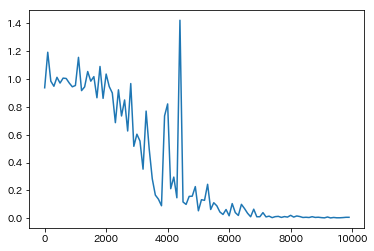
">

- 配布ファイル「3_1_simple_RNN.ipynb」実行結果その2

|ハイパーパラメータ|値|
|:--|--:|
|重みの標準偏差|$1$|
|学習率|$0.1$|
|中間層ノード数|$16$|
|中間層の活性化関数|ReLU関数|
|重み初期値|重みの標準偏差$\cdot$標準正規分布乱数|

<img src="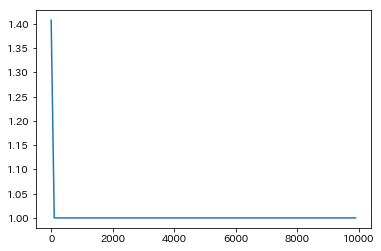
">

- 配布ファイル「3_1_simple_RNN.ipynb」実行結果その3

|ハイパーパラメータ|値|
|:--|--:|
|重みの標準偏差|$0.1$|
|学習率|$0.1$|
|中間層ノード数|$16$|
|中間層の活性化関数|シグモイド関数|
|重み初期値|重みの標準偏差$\cdot$標準正規分布乱数|

<img src="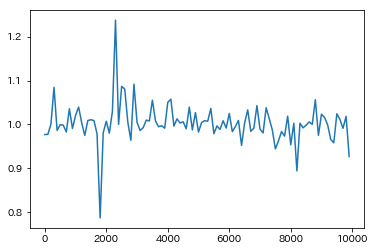
">

- 配布ファイル「3_1_simple_RNN.ipynb」実行結果その4

|ハイパーパラメータ|値|
|:--|--:|
|重みの標準偏差|$1$|
|学習率|$0.01$|
|中間層ノード数|$16$|
|中間層の活性化関数|シグモイド関数|
|重み初期値|重みの標準偏差$\cdot$標準正規分布乱数|

<img src="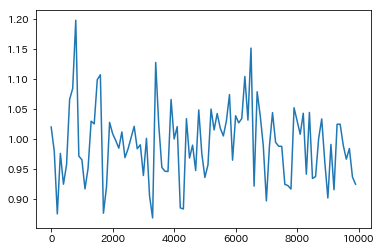
">

- 配布ファイル「3_1_simple_RNN.ipynb」実行結果その5

|ハイパーパラメータ|値|
|:--|--:|
|重みの標準偏差|$1$|
|学習率|$0.1$|
|中間層ノード数|$4$|
|中間層の活性化関数|シグモイド関数|
|重み初期値|重みの標準偏差$\cdot$標準正規分布乱数|

<img src="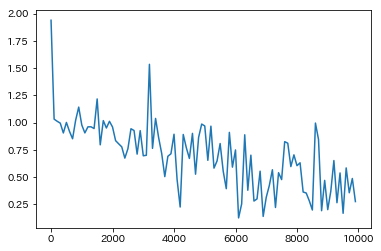
">

- 配布ファイル「3_1_simple_RNN.ipynb」実行結果その6

|ハイパーパラメータ|値|
|:--|--:|
|学習率|$0.1$|
|中間層ノード数|$16$|
|中間層の活性化関数|シグモイド関数|
|重み初期値|Xavier|

```python
# Xavier
W_in = np.random.randn(input_layer_size, hidden_layer_size) / (np.sqrt(input_layer_size))
W_out = np.random.randn(hidden_layer_size, output_layer_size) / (np.sqrt(hidden_layer_size))
W = np.random.randn(hidden_layer_size, hidden_layer_size) / (np.sqrt(hidden_layer_size))
```

<img src="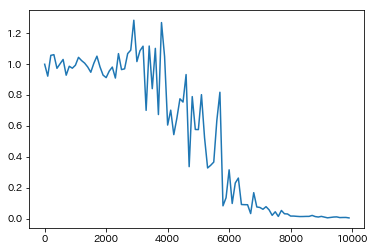
">

- 配布ファイル「3_1_simple_RNN.ipynb」実行結果その7

|ハイパーパラメータ|値|
|:--|--:|
|学習率|$0.1$|
|中間層ノード数|$16$|
|中間層の活性化関数|シグモイド関数|
|重み初期値|He|

```python
# He
W_in = np.random.randn(input_layer_size, hidden_layer_size) / (np.sqrt(input_layer_size)) * np.sqrt(2)
W_out = np.random.randn(hidden_layer_size, output_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)
W = np.random.randn(hidden_layer_size, hidden_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)
```

<img src="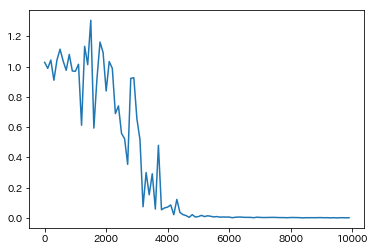
">

- 配布ファイル「3_1_simple_RNN.ipynb」実行結果その8
    
|ハイパーパラメータ|値|
|:--|--:|
|学習率|$0.1$|
|中間層ノード数|$16$|
|中間層の活性化関数|ハイパボリックタンジェント|
|重み初期値|He|

```python
# ハイパボリックタンジェントの導関数
def d_tanh(x):
    return 1/(np.cosh(x) ** 2)
```

<img src="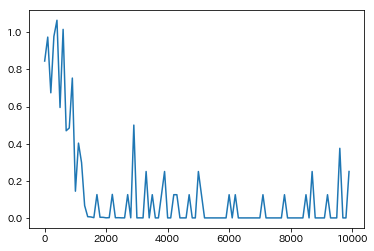
">

### 確認テスト考察
- 問1. サイズ$5 \times 5$の入力画像を、サイズ$3 \times 3$のフィルターで畳み込んだ時の出力画像のサイズを答えよ。なおストライドは$2$、パディングは$1$とする。
- 答1.
$$
\begin{eqnarray}
    \mathrm{P}&=&1 \tag{1} \\
    \mathrm{S}&=&2 \tag{2} \\
    \mathrm{W}&=&\mathrm{H}&=&5 \tag{3} \\
    \mathrm{FW}&=&\mathrm{FH}&=&3 \tag{4} \\
    \mathrm{OW}&=&\mathrm{OH}&=&\frac{\mathrm{H}+2\mathrm{P}-\mathrm{FH}}{\mathrm{S}}+1 \tag{5} \\
    &&&=&\frac{5+2\cdot 1-3}{2}+1 \tag{6} \\
    &&&=&3 \tag{7}
\end{eqnarray}
$$
    1. パディングは$1$
    1. ストライドは$2$
    1. サイズ$5 \times 5$の入力画像
    1. サイズ$3 \times 3$のフィルター

- 問2. RNNネットワークには大きくわけて3つの重みがある。1つは入力から現在の中間層を定義する際にかけられる重み$\mathrm{W}_{\mathrm{(in)}}$、1つは中間層から出力を定義する際にかけられる重み$\mathrm{W}_{\mathrm{(out)}}$である。残り1つの重み$\mathrm{W}$について説明せよ。
- 答2. $\mathrm{W}$は中間層から次の中間層に渡されるときの重みである。

- 問3. 連鎖律の原理を使い、$\frac{\mathrm{d}z}{\mathrm{d}x}$を求めよ。
- 答3.
$$
\begin{eqnarray}
    z&=&t^{2} \\
    \frac{\mathrm{d}z}{\mathrm{d}t}&=&2t \\
    t&=&x+y \\
    \frac{\mathrm{d}t}{\mathrm{d}x}&=&1 \\
    \frac{\mathrm{d}z}{\mathrm{d}x}&=&\frac{\mathrm{d}z}{\mathrm{d}t}\cdot \frac{\mathrm{d}t}{\mathrm{d}x} \\
    &=&2t\cdot 1 \\
    &=&2t \\
    &=&2(x+y)
\end{eqnarray}
$$

- 問4. $\mathbf{y}_1$を$\mathbf{x},\mathrm{s}_{0},\mathrm{s}_{1},\mathbf{W}_{\mathrm{(in)}},\mathbf{W},\mathbf{W}_{\mathrm{(out)}}$等を用いて数式で表わせ。※また中間層の出力にシグモイド関数$\sigma (\cdot)$を作用させよ。
- 答4.
$$
\begin{eqnarray}
    \mathbf{z}_{1}&=&\sigma \left(\mathrm{s}_{0}\mathbf{W}+\mathbf{x}_{1}\mathbf{W}_{\mathrm{(in)}}+\mathbf{b}\right) \\
    \mathbf{y}_{1}&=&\sigma \left(\mathbf{z}_{1}\mathbf{W}_{\mathrm{(out)}}+\mathbf{c}\right)
\end{eqnarray}
$$

### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|Guido van Rossum（鴨澤眞夫訳）|Pythonチュートリアル 第3版|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ❷ ―自然言語処理編|オライリー・ジャパン|2018年|

## Section2 : LSTM
- RNNの課題
    - 時系列を遡れば遡るほど勾配が消失していく<br />$\Longrightarrow$長い時系列の学習が困難
        - 誤差逆伝播が下位層（入力層側）に進んでいくに連れて勾配がどんどん緩やかになり、下位層のパラメータ$\mathbf{w}$の更新（勾配適用）がうまくいかなくなることを「勾配消失問題」という
            - 誤差逆伝播を繰り返しても誤差$1.0$辺りで停滞し$0.0$に近付かない勾配消失問題を起こしている例
            
            <img src="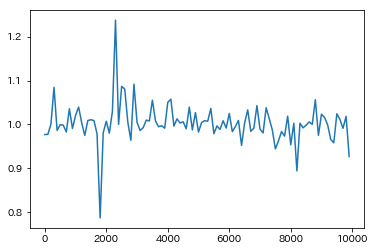
">
            
        - 勾配消失とは逆に、誤差逆伝播が下位層（入力層側）に進んでいくに連れて勾配が指数関数的に大きくなっていくことを「勾配爆発」という
        - 解決策1. ハイパーパラメータやパラメータ初期値の調節等
        - 解決策2. 勾配クリッピングを行う
            - <div style="vertical-align: middle; display: inline-block;"><a href="https://www.python.org/" target="_blank"><img src="https://www.python.org/static/community_logos/python-logo-generic.svg" alt="Python" title="The Python Programming Language" align="left" width="88" height="26" style="max-height: 26px; height: 26px; display: inline-block; vertical-align: middle;" /></a>コード例</div>
            
            ```python
            import numpy as np 
            
            def gradient_clipping(grad, threshold):
                  """勾配クリッピング
                  grad: 勾配
                  threshold: 閾値
                  """
                  norm = np.linalg.norm(grad)
                  rate = threshold / norm
                  if rate < 1:
                      return grad * rate
                    
                  return grad
            
            grad = np.random.rand(2)
            
            print(grad)
            print(gradient_clipping(grad, threshold=0.5))
            ```
            
        - 解決策3. 従来のRNNとは別のネットワーク構造を利用<br />$\Longrightarrow$LSTM
            - CEC
            $$
            \delta^{t-z-1}=\delta^{t-z}\left\{\mathbf{W}f\left(\mathbf{u}^{t-z-1}\right)\right\}=1
            $$
                - メリット
                    - 勾配が$1$であれば、勾配消失・爆発問題を解決可能
                - デメリット
                    - 入力データ$\mathbf{x}$について、時間依存度に関係なく重みが一律である為、ニューラルネットワークの学習特性が無いに等しい
                        - LSTMの入力・出力ゲートにより解決
- 忘却ゲート<br />LSTMブロックの課題
    - LSTMの現状
        - CECは、過去の情報が全て保管されている
    - 課題
        - 過去の情報が要らなくなった場合、削除することはできず、保管され続ける
    - 解決策
        - 過去の情報が要らなくなった場合、そのタイミングで情報を忘却する機能が必要<br />$\Longrightarrow$忘却ゲート
- 覗き穴結合
    - CECに保存されている過去の情報を利用する為、それに重み行列を介して伝播可能にした構造を「覗き穴結合」という

### 実装演習結果
- 配布ファイル「3_2_tf_languagemodel / predict_word.ipynb」

<pre class="output_text stream output-id-21">総単語数:  9826
['introduction', 'the', 'concept', 'of', 'lung', 'fibroblasts', 'as', 'effector', 'cells', 'in', 'the', 'pathogenesis', 'of', 'idiopathic', 'pulmonary', 'fibrosis', 'ipf', 'has', 'recently', 'evolved', 'lung', 'fibroblasts', 'respond', 'in', 'vitro', 'to', 'inflammatory', 'cytokines', 'by', 'producing', 'growth', 'factors', 'and', 'collagen', 'resulting', 'in', 'fibroblast', 'proliferation', 'and', 'extracellular', 'matrix', 'deposition', 'in', 'addition', 'activated', 'lung', 'fibroblasts', 'have', 'been', 'shown', 'to', 'produce', 'large', 'amounts', 'of', 'inflammatory', 'cytokines', 'and', 'chemokines', 'in', 'vitro', 'and', 'hence', 'these', 'cells', 'may', 'also', 'have', 'a', 'role', 'as', 'effector-inflammatory', 'cells', 'this', 'capacity', 'to', 'produce', 'both', 'inflammatory', 'and', 'fibrotic', 'factors', 'could', 'mean', 'that', 'phenotypically', 'altered', 'lung', 'fibroblasts', 'act', 'simultaneously', 'as', 'effector', 'and', 'target', 'cells', 'via', 'paracrine', 'and', 'autocrine', 'mechanisms', 'perpetuating', 'the', 'fibrotic', 'process', 'prostanoids', 'are', 'important', 'regulators', 'of', 'fibroblast', 'function', 'prostaglandin', 'pge', 'is', 'thought', 'to', 'have', 'antifibrotic', 'properties', 'in', 'vitro', 'but', 'also', 'can', 'have', 'proinflammatory', 'effects', 'both', 'in', 'vivo', 'and', 'in', 'vitro', 'thromboxane', 'txa', 'increases', 'proliferation', 'and', 'dna', 'and', 'rna', 'synthesis', 'in', 'several', 'cell', 'types', 'including', 'fibroblasts', 'and', 'smooth', 'muscle', 'like', 'glomerular', 'mesangial', 'cells', 'conversely', 'prostacyclin', 'pgi', 'decreases', 'smooth', 'muscle', 'cell', 'proliferation', 'and', 'collagen', 'synthesis', 'many', 'cell', 'types', 'including', 'lung', 'fibroblasts', 'contain', 'cyclooxygenase', 'cox', 'a', 'proximal', 'enzyme', 'in', 'prostanoid', 'production', 'and', 'can', 'generate', 'prostanoids', 'it', 'has', 'been', 'previously', 'reported', 'that', 'ipf', 'lung', 'fibroblasts', 'have', 'decreased', 'cox-', 'expression', 'compared', 'to', 'normal', 'lung', 'fibroblasts', 'and', 'hence', 'have', 'decreased', 'pge', 'production', 'because', 'of', 'these', 'findings', 'and', 'the', 'fact', 'that', 'pgs', 'are', 'important', 'fibroblast', 'regulators', 'we', 'sought', 'to', 'investigate', 'whether', 'abnormalities', 'in', 'cox-', 'expression', 'could', 'be', 'associated', 'with', 'an', 'altered', 'balance', 'between', 'profibrotic', 'and', 'antifibrotic', 'pgs', 'we', 'hypothesized', 'that', 'fibroblasts', 'from', 'the', 'lungs', 'of', 'patients', 'with', 'ipf', 'hf-ipf', 'have', 'an', 'altered', 'pg', 'balance', 'compared', 'to', 'normal', 'lung', 'fibroblasts', 'hf-nl', 'this', 'phenotypical', 'abnormality', 'could', 'be', 'an', 'important', 'factor', 'in', 'the', 'pathogenesis', 'of', 'ipf', 'materials', 'and', 'methods', 'primary', 'lung', 'fibroblasts', 'fibroblasts', 'from', 'the', 'lungs', 'of', 'seven', 'patients', 'males', 'with', 'ipf', 'hf-ipf', 'were', 'harvested', 'a', 'from', 'excised', 'lung', 'at', 'the', 'time', 'of', 'lung', 'transplantation', 'b', 'during', 'an', 'autopsy', 'performed', 'within', 'hours', 'from', 'death', 'or', 'c', 'during', 'open', 'or', 'transbronchial', 'lung', 'biopsies', 'at', 'the', 'time', 'of', 'diagnosis', 'of', 'the', 'seven', 'patients', 'five', 'subjects', 'had', 'advanced', 'lung', 'fibrosis', 'and', 'were', 'receiving', 'prednisone', 'immunosuppressive', 'agents', 'patients', 'were', 'at', 'an', 'earlier', 'stage', 'of', 'their', 'disease', 'and', 'were', 'not', 'receiving', 'immunosuppressive', 'drugs', 'the', 'mean', 'age', 'of', 'the', 'patients', 'was', 'range', 'hf-nl', 'were', 'cultured', 'from', 'five', 'human', 'lungs', 'that', 'arrived', 'at', 'our', 'transplant', 'center', 'with', 'the', 'intention', 'of', 'being', 'used', 'for', 'transplantation', 'but', 'for', 'various', 'reasons', 'could', 'not', 'be', 'transplanted', 'these', 'were', 'macroscopically', 'and', 'microscopically', 'normal', 'the', 'cells', 'were', 'harvested', 'and', 'cultured', 'as', 'per', 'the', 'protocol', 'described', 'by', 'kumar', 'et', 'al', 'briefly', 'lung', 'tissue', 'sections', 'were', 'finely', 'cut', 'with', 'sterile', 'scissors', 'and', 'incubated', 'with', 'serum', 'free', 'dmem', 'containing', 'trypsin', 'dnase', 'and', 'collagenase', 'for', 'min', 'the', 'procedure', 'was', 'repeated', 'twice', 'and', 'the', 'supernatants', 'were', 'pooled', 'and', 'cultured', 'in', 'one', 'mm', 'plate', 'and', 'incubated', 'at', 'c', 'in', 'a', 'co', 'humidified', 'atmosphere', 'culture', 'medium', 'dmem', 'with', 'fetal', 'bovine', 'serum', 'fbs', 'and', 'penicillinstreptomycin', 'was', 'replaced', 'three', 'times', 'per', 'week', 'and', 'fibroblasts', 'were', 'passed', 'split', 'at', 'the', 'time', 'they', 'became', 'confluent', 'on', 'passage', 'the', 'cells', 'were', 'resuspended', 'in', 'ml', 'of', 'dmem', 'with', 'fbs', 'and', 'dmso', 'and', 'frozen', 'at', 'for', 'each', 'experiment', 'described', 'below', 'the', 'cells', 'were', 'thawed', 'cultured', 'and', 'passed', 'at', 'least', 'once', 'all', 'the', 'experiments', 'were', 'conducted', 'with', 'cells', 'at', 'passages', 'to', 'inducible', 'cyclooxygenase', 'cox-', 'expression', 'and', 'eicosanoid', 'production', 'cox-', 'activity', 'was', 'determined', 'by', 'measuring', 'pge', 'stable', 'pgi', 'metabolite', 'txb', 'stable', 'txa', 'metabolite', 'and', 'pgf', 'production', 'in', 'stimulated', 'fibroblasts', 'hf-ipf', 'n', 'and', 'hf-nl', 'n', 'were', 'brought', 'to', 'confluency', 'in', 'mm', 'plates', 'and', 'then', 'placed', 'on', 'serum', 'free', 'dmem', 'for', 'hours', 'to', 'render', 'them', 'quiescent', 'fibroblasts', 'were', 'then', 'incubated', 'in', 'dmem', 'with', 'fbs', 'alone', 'or', 'in', 'the', 'same', 'medium', 'with', 'il-', 'ngml', 'for', 'hours', 'at', 'the', 'end', 'of', 'the', 'incubation', 'period', 'the', 'supernatant', 'was', 'aspirated', 'and', 'fresh', 'media', 'containing', 'm', 'of', 'arachidonic', 'acid', 'was', 'added', 'to', 'the', 'plates', 'after', 'min', 'of', 'incubation', 'the', 'supernatant', 'was', 'collected', 'and', 'saved', 'at', 'for', 'later', 'eicosanoid', 'analysis', 'the', 'cells', 'were', 'then', 'resuspended', 'and', 'divided', 'into', 'two', 'aliquots', 'which', 'were', 'used', 'for', 'rna', 'and', 'protein', 'extractions', 'respectively', 'the', 'above', 'experiments', 'were', 'repeated', 'in', 'hf-ipf', 'n', 'and', 'hf-nl', 'n', 'using', 'serum', 'free', 'media', 'conditions', 'prostanoids', 'were', 'measured', 'by', 'modified', 'stable', 'isotope', 'dilution', 'assays', 'that', 'used', 'gas', 'chromatography-negative', 'ion-chemical', 'ionization', 'mass', 'spectrometry', 'as', 'previously', 'described', 'briefly', 'deuterium-labeled', 'internal', 'standards', 'of', 'pge', 'pgf', 'txb', 'and', 'were', 'added', 'to', 'the', 'supernatants', 'with', 'isopropyl', 'alcohol', 'isopropyl', 'alcohol', 'was', 'removed', 'by', 'evaporation', 'under', 'nitrogen', 'after', 'acidification', 'to', 'ph', 'the', 'samples', 'were', 'extracted', 'on', 'preconditioned', 'c-', 'prepsep', 'columns', 'fisher', 'scientific', 'fair', 'lawn', 'nj', 'and', 'eluted', 'with', 'ethyl', 'acetate', 'the', 'extract', 'was', 'then', 'converted', 'to', 'a', 'pentafluorobenzyl', 'ester', 'by', 'treatment', 'with', 'a', 'mixture', 'of', 'pentafluorobenzyl', 'bromide', 'in', 'acetonitrile', 'and', 'disopropylethylamine', 'at', 'room', 'temperature', 'for', 'min', 'after', 'evaporation', 'of', 'reagents', 'the', 'residue', 'was', 'subjected', 'to', 'tlc', 'plates', 'using', 'the', 'solvent', 'system', 'chloroformethanol', 'volvol', 'for', 'pgf', 'and', 'txb', 'and', 'ethyl', 'acetatemethanol', 'volvol', 'for', 'and', 'pge', 'then', 'pgf', 'was', 'converted', 'to', 'trimethylsilyl', 'ether', 'derivative', 'by', 'treatment', 'with', 'no-bis', 'trimethylsilyl', 'trifluoroacetamide', 'and', 'dimethylformamide', 'the', 'methoxime', 'derivative', 'of', 'txb', 'pge', 'and', 'was', 'made', 'by', 'treatment', 'with', 'methoxamine', 'hydrochloride', 'in', 'pyridine', 'at', 'c', 'for', 'min', 'followed', 'by', 'evaporation', 'of', 'the', 'pyridine', 'addition', 'of', 'water', 'and', 'extraction', 'with', 'ethyl', 'acetate', 'derivatization', 'was', 'completed', 'by', 'formation', 'of', 'the', 'trimethylsilyl', 'derivatives', 'by', 'treatment', 'with', 'no-bis', 'trimethylsilyl', 'trifluoroacetamide', 'and', 'pyridine', 'eicosanoids', 'were', 'quantified', 'by', 'measuring', 'the', 'ratio', 'of', 'the', 'intensity', 'of', 'ions', 'mz', 'for', 'pgf', 'mz', 'for', 'txb', 'and', 'and', 'mz', 'for', 'pge', 'an', 'analytical', 'blank', 'for', 'each', 'of', 'these', 'products', 'was', 'determined', 'by', 'measuring', 'the', 'amount', 'of', 'nondeuterated', 'material', 'detected', 'after', 'extracting', 'and', 'analyzing', 'ml', 'of', 'saline', 'to', 'which', 'the', 'deuterium-labeled', 'internal', 'standards', 'had', 'been', 'added', 'western', 'analysis', 'after', 'washing', 'with', 'pbs', 'at', 'ph', 'pellets', 'were', 'lyzed', 'in', 'solubilization', 'buffer', 'containing', 'mm', 'tris', 'at', 'ph', 'tween', 'mm', 'phenylmethylsulphonyl', 'fluoride', 'diethyldithiocarbamic', 'acid', 'leupeptin', 'and', 'pepstatin', 'a', 'all', 'from', 'sigma', 'chemical', 'sonicated', 'boiled', 'with', 'gel', 'loading', 'buffer', 'mm', 'tris-hcl', 'at', 'ph', 'glycerol', 'sds', 'and', 'bromophenol', 'blue', 'and', 'centrifuged', 'at', 'x', 'g', 'for', 'min', 'equal', 'amounts', 'of', 'protein', 'to', 'g', 'were', 'separated', 'by', 'electrophoresis', 'sds-page', 'was', 'performed', 'using', 'a', 'separating', 'gel', 'with', 'a', 'stacking', 'gel', 'the', 'resolved', 'proteins', 'were', 'transferred', 'electrophoretically', 'to', 'nitrocellulose', 'membranes', 'hybond-ecl', 'amersham', 'corp', 'after', 'transfer', 'the', 'filters', 'were', 'incubated', 'overnight', 'at', 'c', 'in', 'a', 'blocking', 'solution', 'mm', 'tris', 'base', 'mm', 'sodium', 'chloride', 'at', 'ph', 'powdered', 'milk', 'bsa', 'and', 'incubated', 'with', 'primary', 'polyclonal', 'rabbit', 'antibodies', 'against', 'cox-', 'at', 'a', 'dilution', 'cayman', 'chemical', 'ann', 'arbor', 'mi', 'for', 'hour', 'at', 'room', 'temperature', 'the', 'filters', 'were', 'washed', 'tbs-', 'tween', 'at', 'ph', 'and', 'incubated', 'with', 'horseradish', 'peroxidase', 'linked', 'secondary', 'antibodies', 'at', 'a', 'dilution', 'amersham', 'after', 'washing', 'the', 'membranes', 'were', 'incubated', 'with', 'luminol', 'based', 'chemiluminescence', 'reagent', 'dupont', 'nen', 'research', 'products', 'boston', 'ma', 'northern', 'analysis', 'cell', 'pellets', 'were', 'lyzed', 'and', 'rna', 'extracted', 'using', 'the', 'rneasy', 'method', 'qiagen', 'following', 'the', "manufacturer's", 'instructions', 'rna', 'was', 'quantified', 'by', 'determining', 'light', 'absorbance', 'at', 'nm', 'and', 'then', 'fractioned', 'by', 'electrophoresis', 'g', 'per', 'lane', 'on', 'a', 'agarose', 'mopsformaldehyde', 'gel', 'the', 'rna', 'was', 'denatured', 'prior', 'to', 'loading', 'by', 'incubating', 'the', 'rna', 'at', 'c', 'for', 'min', 'in', 'a', 'loading', 'buffer', 'comprising', 'x', 'mops', 'formamide', 'formaldehyde', 'glycerol', 'mm', 'edta', 'bromophenol', 'blue', 'xylene', 'cyanol', 'the', 'rna', 'was', 'transferred', 'by', 'gravity-assisted', 'capillary', 'method', 'with', 'x', 'ssc', 'to', 'nylon', 'hybridization', 'membrane', 'and', 'then', 'fixed', 'to', 'the', 'membrane', 'by', 'uv', 'crosslinking', 'stratalinker', 'jcm', 'prehybridization', 'and', 'hybridization', 'were', 'performed', 'at', 'c', 'and', 'using', 'quick', 'hyb', 'stratagene', 'as', 'hybridization', 'solution', 'the', 'cox-', 'probe', 'was', 'random', 'primed', 'following', 'the', 'directions', 'of', 'the', 'manufacturer', 'megaprime', 'amershampharmacia', 'the', 'membrane', 'was', 'then', 'washed', 'at', 'a', 'final', 'stringency', 'of', 'x', 'ssc', 'sds', 'at', 'c', 'for', 'min', 'the', 'membrane', 'was', 'wrapped', 'in', 'plastic', 'wrap', 'and', 'exposed', 'to', 'kodak', 'xr', 'film', 'at', 'with', 'intensifier', 'screen', 'overnight', 'statistical', 'methods', 'all', 'results', 'are', 'presented', 'as', 'medians', 'with', 'their', 'range', 'comparisons', 'between', 'hf-ipf', 'and', 'hf-nl', 'were', 'done', 'using', 'the', 'mann-whitney', 'test', 'a', 'p', 'value', 'of', 'was', 'considered', 'significant', 'results', 'baseline', 'and', 'stimulated', 'cox-', 'activity', 'in', 'hf-ipf', 'and', 'hf-nl', 'unstimulated', 'eicosanoid', 'production', 'was', 'similar', 'in', 'both', 'hf-ipf', 'and', 'hf-nl', 'fig', 'a-d', 'when', 'fibroblasts', 'were', 'stimulated', 'with', 'il-', 'there', 'was', 'a', 'significant', 'and', 'similar', 'upregulation', 'of', 'pge', 'production', 'in', 'both', 'hf-ipf', 'and', 'hf-nl', 'range', 'versus', 'ng', 'cells', 'min', 'respectively', 'p', 'fig', 'a', 'il--stimulated', 'production', 'of', 'txb', 'stable', 'metabolite', 'of', 'the', 'active', 'txa', 'pgf', 'and', 'stable', 'metabolite', 'of', 'pgi', 'increased', 'modestly', 'in', 'every', 'case', 'except', 'txb', 'production', 'by', 'hf-nl', 'which', 'decreased', 'ng', 'cells', 'min', 'at', 'baseline', 'versus', 'ng', 'cells', 'min', 'with', 'il-', 'stimulation', 'fig', 'b', 'results', 'of', 'pge', 'production', 'were', 'similar', 'when', 'experiments', 'were', 'conducted', 'in', 'serum', 'free', 'media', 'conditions', 'results', 'not', 'shown', 'il-', 'stimulated', 'txb', 'production', 'was', 'significantly', 'greater', 'in', 'hf-ipf', 'ng', 'cells', 'min', 'than', 'in', 'hf-nl', 'ng', 'cells', 'min', 'p', 'fig', 'b', 'baseline', 'txb', 'production', 'was', 'not', 'significantly', 'different', 'between', 'the', 'two', 'cell', 'groups', 'versus', 'ng', 'cells', 'min', 'in', 'hf-ipf', 'and', 'hf-nl', 'respectively', 'p', 'fig', 'b', 'because', 'pgi', 'and', 'txa', 'have', 'opposing', 'effects', 'in', 'vivo', 'we', 'calculated', 'the', 'ratio', 'of', 'their', 'metabolites', 'txb', 'and', 'found', 'a', 'significantly', 'lower', 'ratio', 'in', 'hf-ipf', 'at', 'baseline', 'versus', 'in', 'hf-ipf', 'and', 'hf-nl', 'respectively', 'p', 'and', 'a', 'similar', 'trend', 'under', 'stimulated', 'conditions', 'versus', 'in', 'hf-ipf', 'and', 'hf-nl', 'respectively', 'p', 'fig', 'baseline', 'and', 'stimulated', 'cox-', 'expression', 'western', 'blot', 'in', 'unstimulated', 'fibroblasts', 'showed', 'no', 'detectable', 'cox-', 'protein', 'in', 'either', 'group', 'of', 'cells', 'while', 'il-', 'significantly', 'induced', 'cox-', 'to', 'a', 'similar', 'degree', 'in', 'ipf', 'and', 'normal', 'lung', 'fibroblasts', 'fig', 'northern', 'blot', 'showed', 'minimal', 'cox-', 'mrna', 'in', 'unstimulated', 'cells', 'and', 'significant', 'upregulation', 'of', 'cox-', 'mrna', 'expression', 'when', 'stimulated', 'with', 'il-', 'in', 'both', 'hf-ipf', 'and', 'hf-nl', 'fig', 'discussion', 'several', 'factors', 'modulate', 'fibroblast', 'proliferation', 'and', 'collagen', 'production', 'including', 'mitogenic', 'cytokines', 'eg', 'transforming', 'growth', 'factor', 'tgf', 'platelet-derived', 'growth', 'factor', 'pdgf', 'basic', 'fibroblast', 'growth', 'factor', 'bfgf', 'eicosanoids', 'ie', 'pge', 'txb', 'and', 'pgi', 'and', 'antifibrogenic', 'cytokines', 'eg', 'ifn-', 'it', 'is', 'very', 'likely', 'that', 'a', 'complex', 'interaction', 'among', 'these', 'factors', 'exists', 'in', 'the', 'tissue', 'repair', 'process', 'and', 'it', 'is', 'possible', 'that', 'pathologic', 'fibrosis', 'as', 'in', 'ipf', 'results', 'from', 'phenotypical', 'alterations', 'in', 'fibroblasts', 'that', 'affect', 'the', 'normal', 'interaction', 'of', 'these', 'factors', 'our', 'results', 'show', 'that', 'stimulation', 'of', 'primary', 'cultures', 'of', 'human', 'lung', 'fibroblasts', 'with', 'the', 'proximal', 'cytokine', 'il-', 'upregulates', 'cox-', 'protein', 'and', 'mrna', 'expression', 'to', 'a', 'similar', 'degree', 'in', 'normal', 'and', 'ipf', 'fibroblasts', 'txa', 'production', 'tended', 'to', 'be', 'greater', 'in', 'ipf', 'than', 'in', 'normal', 'fibroblasts', 'at', 'baseline', 'when', 'stimulated', 'with', 'il-', 'this', 'difference', 'became', 'statistically', 'significant', 'the', 'ratio', 'of', 'pgi', 'to', 'txa', 'metabolites', 'was', 'lower', 'in', 'ipf', 'fibroblasts', 'at', 'baseline', 'and', 'with', 'il-', 'stimulation', 'the', 'above', 'results', 'suggest', 'that', 'a', 'decreased', 'pgi', 'txa', 'ratio', 'could', 'be', 'a', 'phenotypic', 'alteration', 'present', 'in', 'ipf', 'fibroblasts', 'resulting', 'in', 'a', 'loss', 'of', 'their', 'capacity', 'to', 'autoregulate', 'proliferation', 'and', 'extracellular', 'matrix', 'production', 'the', 'effects', 'of', 'pgs', 'on', 'cell', 'proliferation', 'and', 'collagen', 'production', 'have', 'been', 'widely', 'studied', 'in', 'different', 'cell', 'types', 'txa', 'has', 'been', 'studied', 'extensively', 'because', 'of', 'its', 'apparent', 'role', 'in', 'atherosclerosis', 'due', 'to', 'its', 'prothrombotic', 'and', 'mitogenic', 'activities', 'on', 'vascular', 'smooth', 'muscle', 'cells', 'these', 'mitogenic', 'effects', 'are', 'potentiated', 'by', 'growth', 'factors', 'in', 'vascular', 'smooth', 'muscle', 'cells', 'txa', 'stimulates', 'synthesis', 'of', 'bfgf', 'and', 'increases', 'the', 'expression', 'of', 'the', 'proto-oncogenes', 'c-fos', 'c-myc', 'and', 'egr-', 'which', 'are', 'associated', 'with', 'entry', 'into', 'the', 'cell', 'growth', 'cycle', 'in', 'addition', 'txa', 'increases', 'proliferation', 'of', 'fibroblasts', 'and', 'smooth', 'muscle-like', 'glomerular', 'mesangial', 'cells', 'on', 'the', 'other', 'hand', 'pgi', 'decreases', 'vascular', 'smooth', 'muscle', 'cell', 'proliferation', 'and', 'collagen', 'and', 'glycosaminoglycane', 'synthesis', 'via', 'activation', 'of', 'adenylyl', 'cyclase', 'and', 'subsequent', 'production', 'of', 'camp', 'betaprost', 'an', 'analog', 'of', 'pgi', 'decreases', 'procollagen', 'i', 'and', 'iii', 'mrna', 'expression', 'in', 'cardiac', 'fibroblasts', 'these', 'effects', 'may', 'counteract', 'the', 'profibrotic', 'effects', 'seen', 'with', 'txa', 'and', 'it', 'is', 'possible', 'that', 'an', 'alteration', 'of', 'a', 'normal', 'physiologic', 'balance', 'between', 'pgi', 'and', 'txa', 'could', 'increase', 'tendency', 'towards', 'fibrogenesis', 'it', 'is', 'important', 'to', 'mention', 'that', 'our', 'experiments', 'were', 'conducted', 'at', 'similar', 'passage', 'levels', 'passage', 'to', 'in', 'both', 'groups', 'since', 'senescence', 'of', 'fibroblasts', 'is', 'associated', 'with', 'a', 'shift', 'from', 'the', 'biosynthesis', 'of', 'pgi', 'to', 'txa', 'it', 'is', 'possible', 'that', 'the', 'difference', 'seen', 'in', 'our', 'study', 'between', 'hf-ipf', 'and', 'hf-nl', 'could', 'result', 'from', 'comparing', 'fibroblasts', 'of', 'different', 'ages', 'hf-ipf', 'might', 'have', 'been', 'harvested', 'from', 'fibrotic', 'lesions', 'where', 'fibroblasts', 'had', 'previously', 'undergone', 'a', 'greater', 'number', 'of', 'cell', 'divisions', 'than', 'hf-nl', 'obtained', 'from', 'nonfibrotic', 'lungs', 'although', 'this', 'is', 'a', 'possibility', 'the', 'age-related', 'shift', 'in', 'pg', 'production', 'has', 'only', 'been', 'shown', 'at', 'very', 'high', 'cell', 'passages', 'and', 'has', 'not', 'been', 'documented', 'in', 'vivo', 'we', 'also', 'found', 'that', 'both', 'hf-ipf', 'and', 'hf-nl', 'had', 'similar', 'pge', 'production', 'at', 'baseline', 'and', 'a', 'similar', 'increase', 'when', 'stimulated', 'with', 'il-', 'pge', 'can', 'decrease', 'fibroblast', 'proliferation', 'and', 'collagen', 'synthesis', 'and', 'increase', 'collagen', 'degradation', 'recent', 'reports', 'suggesting', 'decreased', 'cox-', 'expression', 'and', 'pge', 'production', 'in', 'ipf', 'fibroblasts', 'have', 'received', 'significant', 'attention', 'in', 'our', 'study', 'we', 'found', 'that', 'both', 'cox-', 'protein', 'expression', 'and', 'pge', 'production', 'were', 'upregulated', 'to', 'a', 'similar', 'degree', 'in', 'ipf', 'and', 'normal', 'lung', 'fibroblasts', 'we', 'believe', 'that', 'differences', 'in', 'methodology', 'and', 'patient', 'selection', 'may', 'explain', 'the', 'discrepancies', 'with', 'other', 'studies', 'vancheri', 'and', 'collaborators', 'found', 'that', 'tnf--stimulated', 'fibrotic', 'lung', 'fibroblasts', 'had', 'decreased', 'cox-', 'expression', 'and', 'pge', 'production', 'but', 'they', 'further', 'showed', 'that', 'these', 'findings', 'were', 'a', 'result', 'of', 'decreased', 'expression', 'of', 'tnf-', 'receptors', 'the', 'latter', 'finding', 'would', 'argue', 'against', 'a', 'primary', 'defect', 'in', 'cox-', 'expression', 'since', 'no', 'other', 'stimulus', 'other', 'than', 'tnf-', 'was', 'tested', 'in', 'another', 'study', 'keerthisingam', 'et', 'al', 'reported', 'that', 'fibrotic', 'lung', 'fibroblasts', 'had', 'decreased', 'cox-', 'expression', 'and', 'pge', 'production', 'in', 'response', 'to', 'tgf', 'stimulation', 'this', 'study', 'differed', 'from', 'ours', 'in', 'that', 'a', 'different', 'stimulus', 'was', 'used', 'of', 'significance', 'is', 'the', 'fact', 'that', 'the', 'cox-', 'gene', 'is', 'known', 'to', 'be', 'nf-b', 'dependent', 'and', 'il-', 'but', 'not', 'tgf', 'is', 'a', 'potent', 'inducer', 'of', 'nf-b', 'activation', 'hence', 'the', 'pathway', 'involved', 'in', 'the', 'induction', 'of', 'the', 'cox-', 'gene', 'by', 'il-', 'and', 'tgf', 'may', 'be', 'different', 'furthermore', 'a', 'significant', 'proportion', 'of', 'the', 'fibroblasts', 'used', 'in', 'the', 'study', 'by', 'keerthisingam', 'et', 'al', 'were', 'obtained', 'from', 'patients', 'with', 'systemic', 'sclerosis', 'which', 'makes', 'their', 'fibroblast', 'population', 'more', 'heterogeneous', 'wilborn', 'et', 'al', 'also', 'reported', 'a', 'decreased', 'production', 'of', 'pge', 'by', 'il--stimulated', 'ipf', 'fibroblasts', 'due', 'to', 'decreased', 'cox-', 'expression', 'there', 'is', 'a', 'possibility', 'that', 'patient', 'selection', 'may', 'have', 'differed', 'between', 'the', 'two', 'studies', 'however', 'we', 'feel', 'certain', 'that', 'the', 'diagnostic', 'accuracy', 'of', 'our', 'patient', 'population', 'was', 'high', 'due', 'to', 'the', 'fact', 'that', 'out', 'of', 'a', 'total', 'of', 'ipf', 'subjects', 'included', 'in', 'our', 'study', 'underwent', 'lung', 'transplantation', 'with', 'confirmatory', 'pathology', 'results', 'consistent', 'with', 'ipf', 'the', 'other', 'subjects', 'had', 'biopsy-proven', 'ipf', 'in', 'addition', 'our', 'results', 'were', 'similar', 'when', 'comparing', 'lung', 'fibroblasts', 'obtained', 'from', 'subjects', 'with', 'advanced', 'stage', 'ipf', 'with', 'those', 'of', 'subjects', 'at', 'an', 'earlier', 'stage', 'of', 'their', 'disease', 'who', 'had', 'received', 'no', 'therapy', 'although', 'the', 'reasons', 'for', 'our', 'different', 'results', 'are', 'unclear', 'the', 'fact', 'that', 'we', 'found', 'similar', 'cox-', 'expression', 'and', 'pge', 'production', 'in', 'normal', 'and', 'ipf', 'lung', 'fibroblasts', 'suggests', 'that', 'loss', 'of', 'cox-', 'expression', 'is', 'not', 'a', 'universal', 'characteristic', 'of', 'fibroblasts', 'cultured', 'from', 'the', 'lungs', 'of', 'subjects', 'with', 'ipf', 'conclusion', 'we', 'have', 'found', 'that', 'fibroblasts', 'cultured', 'from', 'normal', 'and', 'ipf', 'human', 'lungs', 'have', 'a', 'significant', 'and', 'similar', 'induction', 'of', 'the', 'cox-', 'enzyme', 'when', 'stimulated', 'with', 'il-', 'but', 'that', 'ipf', 'fibroblasts', 'produced', 'more', 'thromboxane', 'and', 'had', 'a', 'significantly', 'lower', 'prostacyclinthromboxane', 'ratio', 'we', 'hypothesize', 'that', 'the', 'lower', 'pgi', 'txa', 'ratio', 'seen', 'in', 'hf-ipf', 'may', 'be', 'a', 'phenotypic', 'alteration', 'that', 'plays', 'a', 'role', 'in', 'the', 'pathogenesis', 'of', 'ipf', 'abbreviations', 'cox', 'cyclooxygenase', 'hf', 'human', 'fibroblasts', 'nl', 'normal', 'lungs', 'ipf', 'idiopathic', 'pulmonary', 'fibrosis', 'ifn', 'interferon', 'il', 'interleukin', 'pg', 'prostaglandin', 'tx', 'thromboxane', 'pgi', 'prostacyclin']
no : 2.8676789e-08
in : 3.0621893e-06
the : 8.6761705e-05
supreme : 1.4708524e-14
court : 1.4263442e-14
of : 0.00026760725
attorney : 1.6370438e-14
general : 1.4341025e-14
washington : 1.4081225e-14
dc : 1.4042496e-14
united : 1.3704414e-14
states : 1.3795576e-14
wednesday : 1.3440013e-14
october : 1.559741e-14
matter : 1.2020283e-14
came : 1.34072915e-14
on : 2.3137004e-06
for : 1.1215571e-07
oral : 1.4371008e-14
argument : 1.400919e-14
before : 5.0538236e-13
at : 3.1118315e-09
am : 1.3497918e-14
appearances : 1.6618183e-14
lawrence : 1.3353137e-14
lessig : 1.350482e-14
esq : 1.3337558e-14
stanford : 1.2550047e-14
california : 1.2612053e-14
behalf : 1.4607373e-14
petitioners : 1.2807488e-14
theodore : 1.3951805e-14
b : 1.4119845e-14
olson : 1.5296487e-14
department : 1.57252e-14
justice : 1.5862657e-14
we'll : 1.4367336e-14
hear : 1.3972418e-14
now : 1.3860747e-14
number : 1.2299835e-08
eric : 1.4483169e-14
v : 1.5021872e-14
john : 1.4638808e-14
d : 1.49048e-14
ashcroft : 1.4566309e-14
mr : 1.4228227e-14
chief : 1.4697924e-14
may : 6.4487363e-15
it : 2.8634286e-18
please : 1.4391334e-14
are : 6.072628e-11
you : 1.438055e-14
this : 5.7835137e-10
morning : 1.4402482e-14
challenging : 1.4120411e-14
congress's : 1.4954919e-14
sonny : 1.569263e-14
copyright : 1.5972075e-14
term : 1.4785961e-14
extension : 1.3869925e-14
act : 1.5979234e-14
which : 2.953589e-12
extended : 1.4861877e-14
subsisting : 1.3592553e-14
and : 1.5566904e-08
future : 1.6236134e-14
copyrights : 1.4682457e-14
by : 1.4800868e-09
years : 1.3214787e-06
submit : 1.661207e-14
such : 3.3030326e-05
a : 2.629783e-07
blanket : 1.480885e-14
existing : 1.403556e-14
terms : 1.4317029e-14
power : 1.4248824e-20
under : 8.392346e-14
clause : 1.288457e-14
first : 5.5628262e-12
amendment : 1.3434478e-14
government : 1.4259906e-14
has : 4.651473e-19
responded : 1.3734035e-14
to : 8.0237356e-10
way : 1.3491175e-14
that : 4.5082188e-10
simple : 5.2241697e-11
but : 2.8722047e-07
fundamental : 1.4022315e-14
confusion : 1.4957028e-14
argued : 1.3627859e-14
as : 8.7507374e-08
if : 2.5102536e-11
had : 0.20635818
advanced : 1.31683e-14
theory : 1.3972365e-14
or : 4.928603e-06
constraint : 1.3329421e-14
congress : 1.4922635e-14
must : 1.4481317e-14
operate : 1.475742e-14
is : 0.00011267843
mistake : 1.5480637e-14
case : 1.4626499e-14
about : 3.4105557e-08
limits : 1.4371994e-14
an : 3.0725913e-10
it's : 1.421255e-14
not : 3.1534814e-10
exercise : 1.3248539e-14
its : 6.5592415e-15
authority : 1.3870533e-14
have : 3.8231544e-08
particular : 1.4026622e-14
interpretation : 1.4444629e-14
only : 7.8079185e-14
express : 1.2403361e-14
designed : 1.3912742e-14
give : 1.4309739e-14
those : 2.9534593e-12
meaning : 1.431135e-14
i'll : 1.4741441e-14
tell : 1.576845e-14
what : 1.3709067e-14
me : 1.4688002e-14
your : 2.631077e-13
position : 1.600623e-14
so : 8.784429e-09
often : 2.3685417e-15
through : 1.3957635e-14
right : 1.433766e-14
don't : 1.30422195e-14
we : 1.0974617e-05
run : 1.3627988e-14
risk : 2.0299535e-13
upsetting : 1.3697254e-14
previous : 3.4552866e-06
extensions : 1.5001143e-14
time : 4.2074125e-15
i : 1.36414334e-14
mean : 2.0680857e-12
seems : 1.548604e-14
be : 3.5191146e-15
practice : 1.5407553e-14
began : 6.2248996e-13
with : 0.0002042184
very : 8.9909824e-12
do : 1.5803026e-09
believe : 1.4440828e-14
all : 1.8165969e-06
speaking : 1.3103658e-14
technically : 1.5888729e-14
lawyer : 1.4405037e-14
means : 1.7526018e-07
accurately : 1.5084146e-14
did : 1.1813814e-13
extend : 1.4234526e-14
federal : 1.37942865e-14
granted : 1.4230887e-14
works : 1.4015657e-14
already : 1.4285795e-14
existed : 1.3979509e-14
precisely : 1.4149474e-14
pattern : 1.359787e-14
english : 1.5193669e-14
parliament : 1.5043864e-14
done : 1.4405064e-14
statute : 1.3334532e-14
anne : 1.4109804e-14
there : 4.196831e-16
been : 4.7601277e-11
since : 0.003634899
that's : 1.5908075e-14
even : 4.5999217e-15
can : 1.3769656e-14
get : 1.5623345e-14
over : 9.715003e-13
hurdle : 1.5018892e-14
important : 1.432741e-14
we'd : 1.4358652e-14
like : 1.518854e-14
jump : 1.5148759e-14
other : 4.4607622e-15
ones : 1.3801997e-14
you're : 1.5375437e-14
inconsistent : 2.0627524e-15
strongest : 1.4880372e-14
form : 1.49172e-14
test : 1.561971e-14
however : 3.454592e-15
were : 1.2596586e-08
never : 5.1362608e-09
challenged : 1.3237149e-14
any : 1.4098881e-14
certainly : 1.3042468e-14
considered : 2.467744e-13
well : 4.0260034e-05
doesn't : 1.4359692e-14
itself : 1.331443e-14
something : 1.4997452e-14
fact : 1.3842729e-14
they : 2.819954e-15
perhaps : 1.6201735e-14
most : 1.0719e-07
people : 8.608529e-20
everybody : 1.37931015e-14
felt : 1.4430612e-14
was : 5.3719242e-09
basis : 1.5371154e-14
them : 1.444959e-14
absolutely : 1.4637912e-14
true : 1.5435937e-14
here : 1.4840547e-14
because : 2.1955639e-10
fundamentally : 1.4743522e-14
changed : 1.4252237e-14
makes : 1.484958e-14
limitations : 2.8726046e-09
much : 1.6433413e-14
more : 1.0896949e-11
significant : 2.86199e-16
remember : 1.3648798e-14
where : 1.2904444e-14
pointed : 1.3973457e-14
circumstances : 1.50099e-14
reason : 8.790805e-15
values : 1.0193724e-17
period : 1.460913e-14
who : 8.96696e-11
regulated : 1.4012958e-14
law : 1.5921494e-14
would : 3.1558778e-07
commercial : 1.4234255e-14
publishers : 1.4526022e-14
primarily : 1.4587327e-14
scope : 1.5230982e-14
exclusive : 1.4313563e-14
expanded : 1.437948e-14
technology : 1.3396402e-14
internet : 1.5050839e-14
reach : 1.5056351e-14
extraordinarily : 1.4139655e-14
broad : 1.5002058e-14
range : 1.5686435e-14
creativity : 1.5238595e-14
imagined : 1.4414244e-14
earlier : 1.4690245e-14
questioned : 1.4251096e-14
constitutional : 1.4242185e-14
grounds : 1.3866063e-14
consideration : 1.4586909e-14
suggested : 4.2134177e-16
i'm : 1.28703006e-14
talking : 1.3740219e-14
challenges : 1.3207817e-14
academic : 1.4287267e-14
challenge : 1.5781298e-14
understand : 1.35513676e-14
regardless : 1.418731e-14
basic : 1.3720682e-14
appropriate : 1.4930094e-14
least : 1.8826883e-14
got : 1.6329306e-14
possibility : 2.997829e-09
kind : 1.3812004e-14
causal : 1.343827e-14
connection : 1.540147e-14
between : 4.8701413e-14
promotion : 1.5455498e-14
creation : 1.3610091e-14
some : 2.452856e-19
subsequent : 1.1125349e-13
work : 1.4693496e-14
why : 1.4065389e-14
plausible : 1.6588163e-14
reading : 1.465132e-14
than : 1.1864007e-10
simply : 1.41450496e-14
says : 1.4238734e-14
requires : 1.4203175e-14
scheme : 1.3376947e-14
place : 1.37834495e-14
overall : 1.423868e-14
promote : 1.4088076e-14
part : 2.5313097e-17
one : 4.0503256e-13
aspect : 1.3706426e-14
discretion : 1.5476147e-14
protection : 1.4807608e-14
from : 2.8242178e-07
require : 2.1567249e-12
say : 1.33991625e-14
read : 1.348554e-14
specific : 1.5239527e-14
opposed : 1.4763332e-14
systemic : 1.3338271e-14
souter : 1.3953882e-14
exactly : 1.3168877e-14
related : 1.2814807e-12
point : 1.4958456e-14
issue : 1.4190286e-14
alternative : 5.795882e-10
limit : 1.3518892e-14
rather : 4.316844e-15
within : 1.41175574e-14
does : 1.0655843e-10
adopt : 1.5115423e-14
we've : 1.3444937e-14
offered : 1.5218756e-14
then : 2.154545e-20
ability : 1.647305e-14
same : 5.124461e-16
thing : 1.371346e-14
duration : 1.35962095e-14
mentioned : 6.688842e-07
yes : 1.2724991e-14
applications : 1.6809586e-14
extends : 1.5089987e-14
make : 1.5946163e-11
far : 1.4805999e-14
translation : 1.4026836e-14
rights : 1.4482698e-14
didn't : 1.3843865e-14
exist : 1.5919307e-14
wouldn't : 1.6337654e-14
ginsburg : 1.41100205e-14
again : 1.3887396e-14
method : 1.502382e-14
adopted : 1.3712991e-14
interpret : 1.4833105e-14
limited : 1.39447026e-14
times : 1.4557337e-14
said : 1.509874e-14
progress : 1.3723168e-14
science : 1.4237838e-14
independent : 1.4269837e-14
looked : 1.5490915e-14
unless : 1.617336e-14
retrospective : 1.5173106e-14
will : 1.453417e-14
occur : 1.4555392e-14
context : 1.38931725e-14
nor : 1.5212344e-14
secure : 1.4906364e-14
could : 2.1783553e-08
go : 1.5641502e-14
back : 1.472868e-14
question : 1.3963625e-14
agree : 1.4118742e-14
principle : 1.39978115e-14
hold : 1.41532e-14
once : 1.3800049e-14
life : 5.3031965e-07
author : 1.4988672e-14
plus : 0.0001976678
they're : 1.4391828e-14
extending : 1.4640343e-14
latter : 1.429111e-14
how : 1.3772097e-14
former : 1.9076813e-17
chaos : 1.4300162e-14
breyer : 1.4253217e-14
our : 1.5210662e-14
whether : 1.3962308e-12
apply : 1.5012763e-14
holding : 1.4680385e-14
resolved : 1.3353646e-14
maybe : 1.3955106e-14
ought : 1.51064e-14
find : 1.4004541e-14
another : 1.5612172e-14
advance : 1.4594256e-14
aim : 1.559387e-14
limiting : 1.5717103e-14
applicable : 1.5117153e-14
brought : 1.5400443e-14
' : 1.522442e-14
necessarily : 1.5201409e-14
reasons : 1.5919762e-14
parallel : 1.3035008e-14
suggests : 1.3367509e-14
distinction : 1.39040145e-14
briefed : 1.5480577e-14
grounded : 1.5073332e-14
their : 3.7425968e-13
claim : 1.40495415e-14
treaty : 1.3655256e-14
creates : 1.3705982e-14
special : 1.6330302e-14
issues : 1.3557366e-14
essence : 1.5856697e-14
think : 1.5485597e-14
various : 1.497147e-14
positive : 1.4502158e-14
aspects : 1.4181087e-14
purpose : 1.3044905e-14
also : 1.41929055e-11
aol : 1.394824e-14
you've : 1.3559823e-14
just : 1.4853715e-14
disruption : 1.4518046e-14
retrospectivity : 1.499874e-14
cases : 1.3872835e-14
casket : 1.4026382e-14
company : 1.24675915e-14
sufficient : 1.4947846e-14
fit : 1.481224e-14
quote : 1.3796023e-14
severe : 1.3507035e-14
exception : 1.5191004e-14
suppose : 1.6670884e-14
implicit : 1.4252237e-14
too : 1.3581824e-14
should : 1.438675e-14
declared : 1.4891048e-14
void : 1.2888577e-14
might : 2.8321209e-14
leave : 1.3454735e-14
alone : 1.4301745e-14
these : 2.7042416e-12
useful : 1.4572755e-14
arts : 1.3712781e-14
see : 1.6523995e-14
empirical : 1.4822133e-14
evidence : 8.9885244e-17
making : 1.5174207e-14
nothing : 1.5146274e-14
hangs : 1.4879973e-14
upon : 1.3701644e-14
assertion : 1.5382593e-14
structural : 1.5454851e-14
necessary : 1.4176544e-14
assure : 1.508452e-14
effectively : 1.494471e-14
perpetual : 1.401646e-14
permitted : 1.3798339e-14
laws : 1.36955554e-14
misunderstood : 1.4705298e-14
thought : 1.4830388e-14
whole : 1.2398205e-14
thrust : 1.4407317e-14
great : 1.557238e-14
force : 1.4723176e-14
being : 1.3153721e-13
asserting : 1.4589024e-14
light : 1.40432184e-14
opportunity : 1.4700838e-14
build : 1.5995489e-14
public : 1.4794735e-14
domain : 1.5055718e-14
interest : 1.488077e-14
vital : 1.5451372e-14
speech : 1.625113e-14
stake : 1.4471654e-14
source : 1.4214612e-14
culture : 1.4822528e-14
without : 5.0925888e-20
unnecessary : 1.6254107e-14
legal : 1.5545257e-14
want : 1.550528e-14
copy : 1.6602312e-14
verbatim : 1.3457148e-14
people's : 1.3411947e-14
cannot : 1.3774069e-14
ordinary : 1.385702e-14
analysis : 5.489176e-15
proper : 1.2572089e-14
built : 1.423735e-14
into : 1.3012105e-14
comes : 1.354465e-14
follow : 1.4127092e-14
saying : 1.27220545e-14
long : 1.6362633e-14
stuff : 1.3542144e-14
sooner : 1.4836106e-14
later : 0.00042940924
explain : 1.5320138e-14
line : 1.4991475e-14
fits : 1.4986156e-14
inappropriate : 1.425958e-14
consider : 3.1044577e-12
prospective : 1.4232842e-14
until : 1.3292861e-14
decide : 1.6017134e-14
easy : 1.4838823e-14
show : 1.6826411e-12
take : 1.4598487e-14
hang : 1.4642801e-14
let's : 1.387138e-14
tie : 1.5585098e-14
change : 1.9395727e-16
occurs : 1.3364756e-14
when : 5.4511656e-08
prospectively : 1.3325963e-14
know : 1.6477417e-14
who's : 1.3942921e-14
going : 1.3643749e-14
benefit : 1.2773042e-14
evaluating : 1.3505284e-14
presume : 1.3881993e-14
legitimate : 1.4926052e-14
effect : 6.6713505e-06
looking : 1.3924608e-14
authors : 1.5445597e-14
asking : 1.4535224e-14
choosing : 1.4013038e-14
large : 2.8731105e-19
exercising : 1.1909941e-14
choice : 1.5433906e-14
made : 4.2515318e-11
objective : 1.4430694e-14
best : 1.5817881e-14
interests : 1.4637605e-14
promoting : 1.3396607e-14
original : 1.5033393e-14
intermediate : 1.534002e-14
scrutiny : 1.3734612e-14
mind : 1.5695534e-14
use : 1.4833444e-14
tied : 1.5503151e-14
deciding : 1.6638038e-14
off : 1.3899214e-14
difference : 9.680906e-05
selecting : 1.3430018e-14
gets : 1.5666703e-14
respect : 1.5167841e-14
raise : 1.3919483e-14
address : 1.5941579e-14
ctea : 1.3231544e-14
though : 6.709995e-09
treat : 1.4220197e-14
equally : 1.3320982e-14
subject : 1.439298e-14
regime : 1.508829e-14
week : 1.6286722e-14
passed : 1.5410226e-14
treated : 1.5514569e-14
differently : 1.6391434e-14
after : 1.2019282e-07
offers : 1.5352608e-14
course : 1.6439307e-14
actually : 1.4945508e-14
problem : 1.577543e-14
drawn : 1.4780913e-14
always : 1.444901e-14
both : 2.0330084e-19
subset : 1.3976629e-14
holders : 1.3562384e-14
stick : 1.4474138e-14
identical : 1.5218031e-14
draws : 1.3982336e-14
judge : 1.3504252e-14
below : 2.9081588e-23
deal : 1.6872158e-14
recall : 1.5262448e-14
missing : 5.501318e-13
haven't : 1.4732671e-14
seen : 2.2474463e-17
unreasonable : 1.4875149e-14
serve : 1.4800549e-14
we're : 1.38493055e-14
anything : 1.6177464e-14
accept : 1.3886362e-14
government's : 1.4374134e-14
whereas : 1.4102108e-14
order : 1.311511e-14
art : 1.4260315e-14
allows : 1.342797e-14
pretty : 1.4374298e-14
sea : 1.514142e-14
us : 5.0687886e-20
handle : 1.5222154e-14
okay : 1.5299871e-14
assume : 1.3194371e-14
sake : 1.4164028e-14
brief : 1.8106187e-18
sentence : 1.3878499e-14
two : 1.7554713e-10
needs : 1.5344088e-14
sorry : 1.33103155e-14
drives : 1.5957062e-14
addressed : 1.4093505e-14
portion : 1.3588742e-14
review : 8.618958e-17
ask : 1.4324132e-14
really : 1.61766e-14
violated : 1.6349e-14
examples : 1.581405e-14
quite : 1.4972098e-14
new : 4.088445e-16
limitation : 1.4089526e-14
otherwise : 1.4856182e-14
exercises : 1.3370672e-14
congressional : 1.484992e-14
framers : 1.4933826e-14
seem : 1.6641846e-14
things : 1.4667761e-14
analyze : 1.3667634e-14
fails : 1.4049783e-14
turn : 1.3843945e-14
spoke : 1.429629e-14
print : 1.2895068e-14
publish : 1.5697001e-14
include : 6.6124266e-11
derivative : 1.4953035e-14
display : 1.5188742e-14
short : 1.5493693e-14
lot : 1.5907468e-14
fault : 1.4966047e-14
out : 8.5822584e-14
someone : 1.4100603e-14
hard : 1.33418845e-14
having : 1.3145114e-14
difficult : 1.438793e-14
constitution : 1.3686678e-14
isn't : 1.3472968e-14
longer : 1.072083e-07
desirable : 1.4592542e-09
rule : 1.5583255e-14
against : 1.3446108e-15
different : 1.5107608e-11
contrary : 1.3766346e-14
worried : 1.4630712e-14
originally : 1.4817327e-14
solving : 1.6196544e-14
stated : 1.5307549e-14
graham : 1.483885e-14
policy : 1.4324405e-14
flies : 1.4204664e-14
directly : 1.5328732e-14
face : 1.5478331e-14
violate : 1.5893518e-14
words : 1.3929258e-14
gives : 1.6196605e-14
answer : 1.3343462e-14
happening : 1.41968905e-14
country : 1.4599184e-14
today : 1.5467767e-14
commerce : 1.3718824e-14
totally : 1.2855064e-14
weren't : 1.3314683e-14
grant : 1.5409345e-14
free : 1.489653e-14
many : 4.768222e-08
respects : 1.458894e-14
focusing : 1.4493779e-14
view : 1.4943342e-14
encouraging : 1.3202753e-14
distribution : 4.6756157e-18
materials : 6.481188e-16
distributed : 1.3255997e-14
old : 1.4046219e-14
films : 1.4376546e-14
forth : 1.4375311e-14
happy : 1.6474337e-14
broader : 1.5654694e-14
framework : 1.4691365e-14
established : 1.5418077e-14
quid : 1.5560356e-14
pro : 1.4457528e-14
quo : 1.4530511e-14
facilitate : 1.4510294e-14
film : 1.5240747e-14
additional : 8.168229e-06
monopoly : 1.3656039e-14
you'd : 1.3318417e-14
permissible : 1.5538618e-14
conditioned : 1.3613492e-14
decides : 1.5914751e-14
bible : 1.4628173e-14
shakespeare : 1.4082218e-14
ben : 1.6963798e-14
jonson : 1.3953003e-14
lead : 1.5776573e-14
produce : 1.4815462e-14
distribute : 1.4384527e-14
perfectly : 1.3967728e-14
my : 1.4537135e-14
getting : 1.4297789e-14
wants : 1.433591e-14
permit : 7.4661497e-16
restoration : 1.5267632e-14
example : 2.937245e-13
restore : 1.4753508e-14
originality : 1.6740346e-14
feist : 1.4726434e-14
court's : 1.3213436e-14
opinion : 1.3726859e-14
clear : 1.3071457e-14
concede : 1.5186542e-14
stand : 1.5222736e-14
understanding : 1.509897e-14
stevens : 1.37690245e-14
purely : 1.4399021e-14
purposes : 1.4451903e-14
dissemination : 1.2915818e-14
oh : 1.5376755e-14
need : 1.3227659e-14
implied : 1.5170792e-14
expressed : 1.5016027e-14
carefully : 1.3256907e-14
article : 3.7922317e-15
section : 1.3735187e-14
shall : 1.4286586e-14
world : 1.5009385e-14
ours : 1.2423581e-14
certain : 1.5073453e-17
changes : 1.4562948e-14
partners : 1.645945e-14
led : 1.443876e-14
fight : 1.33257095e-14
european : 1.4892013e-14
union : 1.2843521e-14
demand : 1.3616348e-14
couldn't : 1.3400133e-14
knowledge : 1.2954653e-14
fitting : 1.5819995e-14
france : 1.4520012e-14
hate : 1.4511789e-14
consistent : 1.4830275e-14
similarly : 1.4030582e-14
mary : 1.4825384e-14
beth : 1.4412237e-14
testified : 1.4929071e-14
continually : 1.4731883e-14
expand : 1.3939225e-14
own : 1.4550036e-14
vision : 1.4497735e-14
articulated : 1.4998538e-14
addition : 1.3760255e-14
each : 0.04577285
customer : 1.3821017e-14
printed : 1.4933797e-14
come : 1.4348357e-14
suggesting : 4.1454213e-16
plain : 1.4404488e-14
respected : 1.3645623e-14
permits : 1.5242724e-14
perpetually : 1.5684462e-14
reserve : 1.4622733e-14
questions : 1.3962427e-14
especially : 1.3964372e-14
initial : 1.5015599e-14
suggest : 1.4828806e-14
obstacles : 1.5140324e-14
petition : 1.5806753e-14
explicitly : 1.5129355e-14
gave : 1.4859496e-14
books : 1.4971243e-14
owners : 1.4262844e-14
thereafter : 1.3222008e-14
numerous : 1.3910036e-14
private : 1.5995731e-14
bills : 1.3800522e-14
temporary : 1.4939068e-14
repeated : 7.3164647e-16
patent : 1.3883053e-14
explained : 5.589261e-10
ago : 1.4400888e-14
constructions : 1.4153686e-14
weight : 1.6029557e-12
went : 1.3951939e-14
century : 1.2961771e-14
almost : 1.4140949e-14
construction : 1.4462217e-14
lasted : 1.3652341e-14
th : 1.4616905e-14
sustained : 1.4391444e-14
early : 1.5500195e-14
decisions : 1.4395506e-14
england : 1.4841284e-14
extra : 2.2840627e-13
squared : 2.8666097e-10
language : 1.38860184e-14
provision : 1.2230154e-14
acted : 1.493394e-14
entirely : 1.6210205e-14
contains : 1.4099958e-14
extent : 1.537658e-14
considerable : 1.3494881e-14
judgment : 1.3682344e-14
i'd : 1.5600504e-14
interested : 1.3698509e-14
knowing : 1.5162115e-14
contain : 1.5253339e-14
nature : 1.395633e-14
substantive : 1.5708771e-14
the- : 1.4649952e-14
sciences : 1.4825977e-14
talked : 1.4018947e-14
giving : 1.3652939e-14
his : 1.1768591e-16
provide : 1.0146835e-14
incentives : 1.447806e-14
creative : 1.3580892e-14
sort : 1.5147951e-14
bargain : 1.3117813e-14
become : 1.4292475e-14
wondering : 1.4535058e-14
notion : 1.3845027e-14
responsibility : 1.5147805e-14
determine : 2.6846889e-14
ways : 1.3967036e-14
holder : 1.3308336e-14
continuing : 1.4070405e-14
created : 1.4949842e-14
encourage : 1.4056189e-14
invention : 1.4102971e-14
specifically : 1.4395864e-14
applies : 1.5378427e-14
writing : 1.3846348e-14
relates : 1.3702035e-14
asked : 1.278652e-14
colleague : 1.4443196e-14
moment : 1.3631186e-14
includes : 1.3500391e-14
thinking : 1.475272e-14
imagine : 1.3553101e-14
correct : 1.5660787e-14
justification : 1.5877702e-14
existence : 1.465733e-14
aware : 1.3611362e-14
state : 5.585609e-20
last : 5.0336936e-15
several : 1.4088827e-14
hadn't : 1.3142055e-14
finished : 1.2754855e-14
enacting : 1.6250634e-14
couple : 1.4081466e-14
enacted : 1.3997011e-14
tomorrow : 1.3391267e-14
publisher : 1.6114456e-14
solely : 1.4766092e-14
per : 2.033547e-12
se : 1.4674255e-14
beneficial : 1.3815772e-14
provisions : 1.4307965e-14
play : 1.5207528e-14
let : 1.5376257e-14
list : 1.390855e-14
economic : 1.5190425e-14
caused : 1.585933e-14
i've : 1.4499503e-14
listed : 1.2803903e-13
follows : 1.4686693e-13
approximate : 1.276274e-14
numbers : 1.4916574e-14
up : 1.4595176e-14
magnitude : 2.3144489e-17
survive : 1.4475298e-14
paid : 1.403465e-14
given : 1.6122725e-14
billion : 1.4264475e-14
receive : 1.3636464e-14
harm : 1.3624635e-14
percent : 8.414614e-13
value : 3.076778e-14
put : 1.3683832e-14
cost : 1.5795421e-14
dollars : 1.4820039e-14
can't : 1.4936276e-14
un : 1.5715573e-14
valuable : 1.3511981e-14
costs : 1.2949119e-14
side : 1.4160626e-14
uniformity : 1.3904995e-14
compliance : 1.3932765e-14
international : 1.374588e-14
competitive : 1.29263665e-14
markets : 1.3985402e-14
providing : 1.4713464e-14
incentive : 1.3462333e-14
europe : 1.5453967e-14
available : 2.0927997e-15
consistency : 1.3997545e-14
individuals : 1.461172e-14
better : 1.4249466e-14
fairness : 1.3225843e-14
counted : 1.4440385e-14
zero : 5.945106e-11
added : 3.435947e-20
carried : 1.4904886e-14
three : 2.576613e-16
points : 1.3051427e-14
probability : 1.4474855e-14
ever : 1.4311459e-14
virtually : 3.0099682e-14
good : 1.9762877e-17
illustration : 1.4553171e-14
writer : 1.5589826e-14
affect : 1.3761987e-14
provides : 1.37940484e-14
companies : 1.3936566e-14
othello : 1.6601837e-14
down : 1.25770535e-14
pike : 1.4584544e-14
illustrates : 1.5633448e-14
vested : 1.4815179e-14
courts : 1.3243866e-14
individual : 1.443042e-14
creator : 1.3018659e-14
concerned : 1.4048416e-14
gross : 1.2940034e-14
generally : 1.2498877e-14
population : 1.3915608e-14
possibly : 1.4667482e-14
exercised : 1.362435e-14
repeatedly : 1.5303024e-14
kick : 1.5788223e-14
indeed : 1.5076522e-14
acknowledge : 1.551824e-14
forever : 1.6093446e-14
buy : 1.6585188e-14
box : 1.5290129e-14
seat : 1.4504482e-14
god : 1.4966932e-14
bless : 1.543211e-14
what's : 1.340944e-14
explanation : 1.3320526e-14
reward : 1.4510543e-14
stimulate : 1.3984761e-14
probably : 1.3052828e-13
respond : 1.39415906e-14
response : 1.4694363e-14
unlimited : 1.4440221e-14
functional : 1.6286443e-14
equivalent : 1.3092167e-14
thomas : 1.3986897e-14
jefferson : 1.5607468e-14
function : 1.3851525e-14
pick : 1.5488965e-14
history : 1.6220984e-12
continues : 1.4805065e-14
process : 1.4467955e-14
productivity : 1.4467458e-14
violation : 1.311291e-14
end : 4.6854527e-11
used : 3.497722e-11
phrase : 1.5399503e-14
meant : 1.4193588e-14
specified : 1.3852291e-14
assuming : 1.536075e-14
hand : 1.5803436e-14
there's : 1.2782545e-14
countries : 1.4635095e-14
constraints : 1.4664685e-14
artists : 1.6715904e-14
preserved : 1.3993914e-14
creating : 1.4924372e-14
day : 1.4309522e-14
decided : 1.3699292e-14
ease : 1.3416297e-14
administration : 1.5794337e-14
economy : 1.4961595e-14
somebody : 1.37055115e-14
provided : 1.5365115e-14
him : 1.5383267e-14
refers : 1.4539715e-14
prime : 1.4443389e-14
actors : 1.4607959e-14
scene : 1.5092665e-14
aren't : 1.498773e-14
development : 1.3814533e-14
indicated : 1.5491269e-14
spark : 1.3275809e-14
sure : 1.3061264e-14
widely : 1.551895e-14
definition : 5.088594e-14
legislative : 1.3951433e-14
hearings : 1.36723535e-14
testimony : 1.3948559e-14
folks : 1.6188822e-14
represent : 1.4896387e-14
shouldn't : 1.6517e-14
weighed : 1.5137351e-14
delicate : 1.5264486e-14
balance : 1.659544e-14
weighs : 1.3336949e-14
second : 9.518803e-12
practical : 1.4469777e-14
gather : 1.4011996e-14
lasts : 1.452486e-14
less : 1.4635708e-14
penny : 1.4024482e-14
frankly : 1.2996281e-14
person : 2.7060583e-19
whose : 3.269138e-08
decision : 1.4648108e-14
write : 1.5292287e-14
governed : 1.5040593e-14
america : 1.4813993e-14
wonder : 1.2913133e-14
anyway : 1.3934705e-14
he : 1.4237131e-14
he's : 1.3798154e-14
moved : 1.5028807e-14
described : 1.575973e-14
pages : 1.4463955e-14
concerns : 1.3470631e-14
based : 1.1482513e-13
origin : 1.3760912e-14
differences : 5.3468213e-08
describe : 1.284095e-14
cents : 1.457787e-14
age : 1.4910263e-06
properly : 1.4789119e-14
appreciated : 1.400147e-14
death : 3.0442687e-11
variations : 1.4576397e-14
word : 1.5460128e-14
becomes : 1.5030756e-14
judicial : 1.3166893e-14
standard : 3.8435168e-08
still : 1.572742e-14
length : 1.41524975e-14
found : 3.519341e-16
implementation : 1.511574e-14
convenient : 1.5620692e-14
achievement : 1.41616785e-14
goals : 1.5014996e-14
among : 6.078489e-08
arguments : 1.5369277e-14
trace : 1.4459127e-14
argue : 1.3506416e-14
contributing : 1.483152e-14
system : 1.488253e-14
feature : 1.5374995e-14
preservation : 1.41161835e-14
fair : 6.308491e-22
statement : 1.390367e-14
living : 8.278022e-07
era : 1.4470467e-14
administrative : 1.4530872e-14
set : 1.0940424e-09
taking : 1.5329462e-14
internationally : 1.3190069e-14
objectives : 1.40902796e-14
equity : 1.41095885e-14
yet : 1.530031e-14
enormously : 1.4784242e-14
amount : 2.1420286e-15
lesser : 1.4577815e-14
entitled : 1.4688956e-14
promise : 1.2203568e-14
expect : 1.3179053e-14
hasn't : 1.4274955e-14
applied : 1.3964984e-14
involve : 1.5565848e-14
expire : 1.4797359e-14
expired : 1.31245705e-14
yesterday : 1.5518418e-14
bright : 1.3841912e-14
gone : 1.4718797e-14
entities : 1.6142327e-14
acquired : 1.4550952e-14
involved : 1.5005492e-14
rational : 1.281301e-14
draw : 1.37885775e-14
difficulty : 1.4068553e-14
brand : 1.4885311e-14
except : 1.911108e-21
chose : 2.4898297e-19
choose : 1.465772e-14
basically : 1.5783434e-14
written : 1.4348577e-14
became : 1.4714304e-14
nation : 1.4743408e-14
replacing : 1.3985003e-14
bunch : 1.4612054e-14
statutes : 1.3643177e-14
rules : 1.4734694e-14
partly : 1.3584674e-14
common : 1.8046867e-05
statutory : 1.4262844e-14
mixed : 1.4969244e-14
situation : 1.5110668e-14
uniform : 1.5075948e-14
around : 1.546352e-14
wasn't : 1.572928e-14
held : 1.528313e-14
somehow : 1.3087373e-14
exchange : 1.3969167e-14
whatever : 1.5502707e-14
sense : 1.250856e-14
relatively : 1.4743071e-14
sees : 1.427226e-14
full : 1.3833335e-14
finish : 1.4821906e-14
ahead : 1.496816e-14
whatsoever : 1.4512507e-14
abrogation : 1.3807262e-14
compare : 1.4382497e-14
arguing : 1.5463166e-14
billions : 1.37836875e-14
benefits : 1.5043891e-14
near : 1.4269102e-14
idea : 1.4496296e-14
production : 1.4268612e-14
total : 1.383753e-14
money : 1.3735346e-14
conceivable : 1.5393658e-14
present : 2.9439553e-15
adoption : 1.4003099e-14
principal : 1.4412155e-14
concept : 3.5284745e-07
generation : 1.4868002e-14
publication : 1.40707275e-14
member : 1.4747713e-14
supported : 1.357131e-14
referred : 1.4992732e-14
facts : 1.4456342e-14
capable : 1.5155695e-14
doing : 1.4564752e-14
favor : 1.4712061e-14
wishes : 1.4285114e-14
thank : 1.5989143e-14
minutes : 1.4565196e-14
remaining : 1.3535353e-14
setting : 1.30966125e-14
structure : 1.2850284e-14
effective : 1.5269204e-14
struck : 1.51511e-14
clearly : 1.3574469e-14
sets : 1.026054e-12
trying : 1.4419552e-14
harper : 1.6184314e-14
reasoning : 1.447679e-14
opinions : 1.4659342e-14
irrelevant : 1.36823705e-14
wrong : 1.3184685e-14
offer : 1.5769832e-14
precedents : 1.39418565e-14
rejected : 1.5731379e-14
historians : 1.5443006e-14
reasonable : 1.5161564e-14
assumptions : 1.4086356e-14
income : 5.256632e-08
rate : 1.5184052e-14
note : 1.4101303e-14
page : 1.5488255e-14
current : 1.6727956e-11
submitted : 1.3462796e-14
district : 1.4233332e-14
middle : 1.4315717e-14
pennsylvania : 1.4044504e-14
j : 1.5706136e-14
et : 0.7297065
al : 7.519899e-13
plaintiffs : 1.5203235e-14
vs : 1.4980469e-14
dover : 1.4681112e-14
area : 1.503368e-14
school : 1.5461277e-14
board : 1.4525966e-14
directors : 1.3967302e-14
defendants : 1.4514584e-14
afternoon : 1.6247473e-14
session : 1.2165894e-14
transcript : 1.4580817e-14
proceedings : 1.3415324e-14
bench : 1.4140356e-14
trial : 0.0002862316
e : 1.5206715e-14
jones : 1.5551012e-14
iii : 1.4251641e-14
date : 3.9829038e-16
september : 1.3930878e-14
courtroom : 1.4675346e-14
floor : 1.4178814e-14
building : 1.3160565e-14
street : 1.424444e-14
counsel : 1.501511e-14
stephen : 1.4155629e-14
g : 1.4087753e-14
harvey : 1.4038318e-14
richard : 1.2124868e-14
patrick : 1.567011e-14
t : 1.4602582e-14
gillen : 1.4321616e-14
thompson : 1.4520953e-14
robert : 1.2219057e-14
muise : 1.4939352e-14
eq : 1.5288262e-14
official : 1.476215e-14
reporter : 1.4017048e-14
index : 3.016888e-14
witnesses : 1.3541135e-14
julie : 1.4781252e-14
smith : 1.6236505e-14
christy : 1.4383102e-14
rehm : 1.5008067e-14
eveland : 1.3537624e-14
following : 1.4741328e-14
discussion : 1.0441604e-15
occurred : 1.4894797e-14
chambers : 1.402031e-14
record : 1.3904041e-14
versus : 1.5362362e-14
assembled : 1.4471212e-14
planned : 1.4420431e-14
issued : 1.4476513e-14
reporters : 1.32637855e-14
joseph : 1.491791e-14
maldonado : 1.4656714e-14
heidi : 1.4387656e-14
enter : 1.4690299e-14
presumably : 4.0409733e-13
orders : 1.466119e-14
collectively : 1.3679448e-14
office : 1.3115711e-14
previously : 1.485604e-14
entered : 1.347361e-14
motion : 1.6152244e-14
reconsideration : 1.4542322e-14
filed : 1.290651e-14
august : 1.3397067e-14
nd : 1.3565384e-14
testify : 1.5068418e-14
depositions : 1.3070559e-14
subsequently : 1.4487784e-14
memory : 1.451749e-14
serves : 1.514639e-14
approximately : 1.4483887e-14
eight : 1.5060717e-14
days : 1.4186361e-14
case-in-chief : 1.5166452e-14
quash : 1.2696747e-14
relief : 1.5383914e-14
thursday : 1.4708722e-14
denied : 1.3364399e-14
advised : 1.4739502e-14
showed : 5.4414477e-06
appropriately : 1.4299288e-14
scheduled : 1.04032315e-16
cited : 2.559122e-13
reporter's : 1.3505902e-14
privilege : 1.4588272e-14
appear : 1.37140885e-14
standpoint : 1.445637e-14
everything : 1.3677179e-14
honor : 1.5161363e-14
reporters' : 1.5152342e-14
appearance : 1.441397e-14
called : 1.5676147e-14
conference : 1.5411637e-14
yours : 1.4868854e-14
thanks : 1.4965532e-14
discuss : 1.54244e-14
discussed : 1.5919608e-14
ad : 1.4002058e-14
rendered : 1.5617892e-14
appreciate : 1.5189728e-14
misunderstanding : 1.4965905e-14
focused : 1.4383404e-14
regard : 1.5784578e-14
room : 1.37442285e-14
media : 1.4654424e-14
observing : 1.5203408e-14
outside : 1.2999925e-14
myself : 1.5774164e-14
humble : 1.5610446e-14
parties : 1.483981e-14
refuse : 1.6338403e-14
focus : 1.5697091e-14
sudden : 1.4651347e-14
intelligent : 1.5042944e-14
design : 3.091315e-17
full-time : 1.4403802e-14
employees : 1.437079e-14
standing : 1.4349726e-14
truly : 1.38752704e-14
heart : 5.568331e-10
hearts : 1.3978441e-14
result : 1.4459349e-14
spent : 1.3976096e-14
effort : 1.306722e-14
try : 1.4665217e-14
propose : 1.6907528e-14
deposition : 1.34258195e-14
suggestion : 1.3185491e-14
attend : 1.6680044e-14
cross-examine : 1.5504157e-14
examine : 2.3666949e-11
prior : 1.3706611e-14
honestly : 1.3768369e-14
fashion : 1.444854e-14
served : 1.423409e-14
they've : 1.465174e-14
protective : 1.4018572e-14
regular : 1.4960567e-14
raises : 1.4083293e-14
object : 1.5161246e-14
currently : 1.40665415e-14
exists : 1.3776485e-14
amended : 1.437257e-14
reads : 1.3571285e-14
initially : 1.6017562e-14
feel : 1.6779153e-14
stood : 1.5651709e-14
newspapers : 1.4236345e-14
respectively : 1.4663145e-14
municipal : 1.555635e-14
meetings : 1.5171949e-14
districts : 1.463716e-14
ms : 1.4285224e-14
story : 1.5158181e-14
anywhere : 1.3837846e-14
x : 1.3690046e-14
stories : 1.2948378e-14
she's : 1.3513271e-14
mom : 1.4049006e-14
she : 1.5366934e-14
child : 1.3566135e-14
night : 1.5529194e-14
her : 1.6346974e-14
husband : 1.3400927e-14
home : 2.5197008e-17
owns : 1.432069e-14
little : 1.0482032e-15
market : 1.3790209e-14
york : 1.4990416e-14
son : 1.5204135e-14
youngest : 1.3901072e-14
learning : 1.4012718e-14
disabilities : 1.4685313e-14
supplemental : 1.5235283e-14
wealthy : 1.4680048e-14
education : 3.947056e-13
journalism : 1.41197114e-14
control : 1.4387602e-14
employee : 1.4638052e-14
daily : 1.7607656e-05
dispatch : 1.4637048e-14
fear : 1.3633057e-14
cover : 1.4243488e-14
similar : 4.463763e-09
exposed : 1.5173542e-14
witness : 1.3712362e-14
newspaper : 1.2837767e-14
county : 1.5362567e-14
concern : 1.4694671e-14
precedent : 1.5060056e-14
counties : 5.2246998e-14
affidavit : 1.3980735e-14
validate : 1.4528904e-14
authenticity : 1.4063135e-14
articles : 1.3375161e-14
sides : 1.4439506e-14
accepted : 1.4628535e-14
wanted : 1.4391828e-14
cross-examination : 1.5554154e-14
wrote : 1.428585e-14
perceived : 1.3666435e-14
saw : 1.25056495e-14
heard : 1.5875612e-14
dialogue : 1.4246476e-14
phone : 1.4578704e-14
amongst : 1.4457169e-14
relate : 1.6282218e-14
reviewed : 1.28429575e-14
notes : 1.2920056e-14
e-mails : 1.4953264e-14
bias : 1.5762585e-14
writings : 1.38085005e-14
unpublished : 1.4363253e-14
material : 1.3666669e-14
using : 3.7351936e-06
intention : 1.4392431e-14
deeply : 1.37035785e-14
legally : 1.4898207e-14
eve : 1.426366e-14
knew : 1.3900435e-14
attempt : 1.5111762e-14
bring : 1.3838111e-14
head : 1.3081534e-14
successful : 4.406338e-15
bringing : 2.8322957e-09
succeeded : 1.3936007e-14
bad : 1.40087095e-14
valid : 1.40394695e-14
protections : 1.4916006e-14
protected : 1.4134855e-14
every : 4.613788e-15
realm : 1.6457535e-14
particularly : 1.4113976e-14
restate : 1.4696579e-14
obvious : 1.3658018e-14
quotes : 1.3727699e-14
behind : 1.4213797e-14
remarks : 1.3040379e-14
goes : 1.5621436e-14
truth : 1.3977269e-14
asserted : 1.3172998e-14
testifying : 1.3844102e-14
strictly : 1.4797894e-14
allow : 1.4421339e-14
four : 9.361165e-13
corners : 1.506652e-14
crafted : 1.3441859e-14
questioning : 1.3753512e-14
events : 8.292476e-12
meeting : 1.4436945e-14
comments : 1.5248714e-14
immediately : 1.5362625e-14
motivation : 1.427776e-14
allowed : 1.3540826e-14
fly : 1.4070298e-14
exhaustion : 1.5196306e-14
requirement : 1.4294899e-14
although : 1.4259092e-14
distinguish : 1.1122665e-15
somewhat : 1.4158492e-14
type : 1.3863366e-14
unique : 1.530463e-14
finally : 3.4672416e-14
answering : 1.438546e-14
abundant : 1.6043765e-14
coverage : 1.3283483e-14
surely : 1.6150702e-14
intent : 1.4435705e-14
create : 1.2933199e-14
persistent : 1.4373228e-14
bar : 1.4637019e-14
swear : 1.2672481e-14
sworn : 1.5255231e-14
speak : 1.5529077e-14
themselves : 1.3984016e-14
else : 1.3269303e-14
assert : 1.421602e-14
fine : 1.4023411e-14
interrupted : 1.5262682e-14
share : 1.4273513e-14
half : 1.3430634e-14
telephone : 7.388056e-19
proposed : 1.34432176e-14
took : 1.4106278e-14
pat : 1.3663463e-14
willing : 1.4171298e-14
lieu : 1.5357205e-14
beyond : 1.3908231e-14
happened : 1.4780576e-14
call : 1.4250526e-14
others : 3.4244e-16
terry : 1.5270542e-14
conversation : 1.4297737e-14
appeared : 1.3493594e-14
break : 1.4666084e-14
objected : 1.4361173e-14
late : 1.5295584e-14
experienced : 1.2414106e-14
experience : 1.596035e-14
extremely : 7.906852e-16
unhappy : 1.440825e-14
experiences : 1.3039882e-14
depending : 1.542908e-14
personality : 1.39366464e-14
genial : 1.4019935e-14
invited : 1.5341161e-14
stop : 1.3578639e-14
instruct : 1.357623e-14
inviting : 1.4056028e-14
telling : 1.4932288e-14
problems : 1.4676662e-14
anticipated : 1.5561039e-14
kept : 1.4457804e-14
roughly : 1.4335336e-14
forget : 1.3904678e-14
clarified : 1.4772881e-14
hope : 1.41581676e-14
depends : 1.3721755e-14
happens : 1.3694433e-14
next : 2.068722e-11
naked : 1.3775355e-14
coming : 1.4451876e-14
obviously : 1.4376026e-14
job : 1.3894337e-14
proposing : 1.433233e-14
evaluate : 1.58817e-14
guest : 1.5167146e-14
adding : 1.432424e-14
wherein : 1.484386e-14
support : 1.4715258e-14
obligated : 1.5489939e-14
ie : 1.3627104e-14
contents : 1.327715e-14
appears : 1.516894e-14
information : 4.263649e-18
mental : 1.4972613e-14
reveal : 1.6391936e-14
confidential : 1.6044957e-14
sources : 1.614368e-14
tried : 1.4405064e-14
they'll : 1.5886274e-14
reporting : 1.34764644e-14
either : 1.562152e-11
jury : 1.4412376e-14
buckingham : 1.5202192e-14
bonsell : 1.5034713e-14
degree : 1.5646216e-14
certainty : 1.387744e-14
relative : 1.4532285e-14
health : 2.6370708e-13
conditions : 1.4438678e-14
friday : 1.4870695e-14
schedule : 1.3833149e-14
surgery : 1.2996824e-14
monday : 1.3979189e-14
planning : 1.4326263e-14
plane : 1.4306929e-14
flight : 1.3882787e-14
team : 1.4405613e-14
yeah : 1.39232015e-14
ed : 1.2932632e-14
alternatively : 1.4568308e-14
scheduling : 1.3633292e-14
usually : 1.3960695e-14
pay : 1.5034913e-14
grade : 1.4760628e-14
figure : 1.3119621e-13
clients : 1.6483956e-14
believed : 1.3700468e-14
talk : 1.3663568e-14
statements : 1.6164294e-14
left : 1.4024804e-14
false : 1.3571777e-14
admitted : 1.32293485e-14
someplace : 1.37693405e-14
understood : 1.2978197e-14
sometimes : 1.4252891e-14
manner : 5.6049724e-11
slope : 1.623341e-14
narrowly : 1.505434e-14
ordered : 1.4799787e-14
predict : 1.7392802e-14
third : 3.4582065e-14
circuit : 1.4469942e-14
inquiry : 1.3340967e-14
looks : 1.4856294e-14
artificial : 1.4611442e-14
dealing : 1.40460585e-14
hearsay : 1.6522294e-14
topics : 1.447044e-14
subjects : 5.086456e-19
during : 1.2864385e-14
inclined : 1.4399462e-14
rest : 1.30945635e-14
violence : 1.3465699e-14
cut : 1.4031867e-14
live : 1.4535946e-14
speaks : 1.34696035e-14
abbreviated : 1.4039283e-14
indicate : 1.5193669e-14
sit : 1.4422935e-14
reported : 9.1487495e-12
published : 1.4770091e-14
enough : 1.35476466e-14
access : 1.552493e-14
news : 1.3195857e-14
travels : 1.5395891e-14
fast : 1.350755e-14
surprised : 1.4110073e-14
avoid : 1.335413e-14
needless : 1.2027438e-14
procedure : 1.3799786e-14
intend : 1.5671604e-14
begin : 1.4559502e-14
june : 1.3512653e-14
liberty : 1.5225842e-14
quoted : 1.4412513e-14
apparently : 1.5521643e-14
guess : 1.4025847e-14
taken : 1.4579177e-14
perspective : 1.2901342e-14
answered : 1.4118392e-14
included : 1.4026489e-14
utilize : 1.3452632e-14
tape : 1.4998052e-14
recorder : 1.3937389e-14
types : 1.6472829e-14
game : 1.4249466e-14
excluded : 2.6524893e-11
sincerely : 1.4560752e-14
integrity : 1.4057664e-14
problematic : 1.44099e-14
personal : 1.4389687e-14
detail : 8.666145e-15
fears : 1.526012e-14
further : 1.5485892e-14
measure : 0.012393529
preserve : 1.5208514e-14
objection : 1.4980669e-14
modification : 4.2872216e-06
bit : 1.42477e-14
awkward : 1.3179607e-14
thoughts : 1.3763877e-14
regarding : 1.3931064e-14
known : 1.5417737e-16
controversy : 1.4273649e-14
interesting : 1.4218976e-14
entering : 1.4362487e-14
able : 1.3775119e-14
proceed : 1.5149626e-14
doubt : 1.4252973e-14
serious : 1.4573646e-14
prefer : 1.3889674e-14
restricted : 1.37195316e-14
bold : 1.4401878e-14
satisfied : 1.3691768e-14
resolution : 1.49741e-14
agreement : 1.2399033e-14
reached : 1.3305416e-14
open : 1.387691e-14
move : 1.288489e-14
waiting : 1.4433172e-14
satisfactory : 1.3325861e-14
recognize : 1.4056082e-14
afterwards : 1.3311255e-14
examination : 1.2958136e-14
believes : 1.5335516e-14
inaccurate : 1.5303725e-14
door : 1.3556642e-14
dangerous : 1.384825e-14
likely : 5.90108e-15
adequately : 1.4235339e-14
mouth : 1.37140885e-14
arise : 1.5212229e-14
including : 1.3482686e-14
sunday : 1.41017586e-14
wife : 1.459963e-14
town : 1.3977962e-14
watch : 1.4449643e-14
kids : 1.4753874e-14
tuesday : 1.4420431e-14
jewish : 1.5051469e-14
holiday : 1.47626e-14
leaving : 7.603589e-18
look : 1.2750356e-14
traveling : 1.5613841e-14
construct : 1.5280683e-14
mechanism : 1.3245331e-14
circle : 1.5000684e-14
instantly : 1.4569309e-14
sitting : 1.5035975e-14
you'll : 1.5366025e-14
concluding : 1.508239e-14
contact : 1.3826396e-14
stopped : 1.530793e-14
concluded : 1.6017439e-14
return : 1.34276635e-14
apologize : 1.3104209e-14
handled : 1.5986764e-14
resolve : 1.37856586e-14
trials : 2.0611286e-07
keep : 1.36834674e-14
minimum : 1.52037e-14
duly : 1.32288445e-14
affirmed : 1.4976442e-14
direct : 1.3897095e-14
name : 1.4399845e-14
ann : 1.2149291e-14
honey : 1.6200066e-14
drive : 1.5207643e-14
pa : 1.3110234e-14
covered : 1.35709484e-14
lived : 6.91473e-17
fourteen : 1.4339904e-14
children : 1.5622718e-14
daughter : 1.5767908e-14
michael : 1.3740558e-14
high : 7.294362e-17
eleventh : 1.4916404e-14
medical : 1.40307425e-14
educational : 1.6183854e-14
background : 1.389349e-14
graduated : 1.3735241e-14
college : 1.4823829e-14
learned : 1.4892894e-14
considering : 1.3016574e-14
approval : 1.6071085e-14
biology : 1.41897975e-14
textbook : 1.5862354e-14
learn : 1.544937e-14
paper : 1.6666591e-18
approving : 1.5436466e-14
text : 1.5477093e-14
creationism : 1.4172055e-14
top : 1.4744789e-14
approved : 1.602349e-14
pandas : 1.313634e-14
classroom : 1.4450194e-14
book : 1.4467541e-14
curriculum : 1.3980201e-14
teaching : 1.473281e-14
notebook : 1.4017287e-14
marked : 1.4438707e-14
p : 8.6641156e-18
newsletter : 1.3750548e-14
house : 1.5278001e-14
mail : 4.3011118e-16
told : 1.4439835e-14
class : 1.424539e-14
received : 1.3452991e-14
february : 1.4026088e-14
withdraw : 1.41841164e-14
board's : 1.3865376e-14
actions : 1.6126447e-14
discussing : 1.2551962e-14
evolution : 1.4416443e-14
lie : 1.4809389e-14
christian : 1.35918015e-14
friends : 1.44516e-14
seemed : 1.568506e-14
impression : 1.38548535e-14
beliefs : 1.4425657e-14
faith : 1.5226422e-14
mutually : 1.36827364e-14
mrs : 1.4302727e-14
april : 1.5026629e-14
center : 1.41422976e-14
ken : 1.4149961e-14
barrie : 1.3397271e-14
callahan : 1.2917199e-14
gentleman : 1.4192667e-14
plaintiff : 1.5218322e-14
aclu : 1.2200822e-14
friend : 1.4323639e-14
contacted : 1.459857e-14
agreed : 1.4202226e-14
lawsuit : 1.4260775e-14
ninth : 1.39593656e-14
implemented : 1.4677528e-14
january : 1.485128e-14
ten : 1.5134261e-14
affected : 6.265955e-11
ninth-grade : 1.5333294e-14
students : 1.4022423e-14
classes : 1.4545373e-14
listen : 1.3540206e-14
neither : 1.40959505e-14
accurate : 1.3726337e-14
year : 5.2353673e-09
becoming : 1.4133777e-14
attended : 1.4295336e-14
single : 1.500509e-14
excuse : 1.4328885e-14
wait : 1.41787615e-14
start : 1.4315063e-14
temptation : 1.4101895e-14
project : 1.41072744e-14
approach : 3.8946103e-13
attention : 1.3982522e-14
loud : 1.6353118e-14
starting : 1.3728116e-14
starts : 1.4189014e-14
q : 1.3779534e-14
represents : 1.4607903e-14
reflect : 1.511476e-14
familiar : 1.4004489e-14
dates : 1.3856756e-14
reflection : 1.3730054e-14
recalled : 1.4611943e-14
december : 1.5366699e-14
personally : 1.4416004e-14
witnessed : 1.4392762e-14
debated : 1.4048257e-14
elaborate : 1.4991616e-14
while : 2.7980636e-14
characterization : 1.5446835e-14
strike : 1.3509844e-14
upset : 1.41798686e-14
policies : 1.425735e-14
regularly : 1.41540095e-14
members : 1.5261079e-14
letters : 1.3926175e-14
editor : 1.4795609e-14
teachers : 1.4667453e-14
sent : 1.3003719e-14
anyone : 1.5350265e-14
communication : 1.6314332e-14
library : 1.5573123e-14
front : 1.577594e-14
produced : 1.4362103e-14
help : 7.5179446e-14
unfortunately : 1.5120585e-14
spread : 1.543479e-14
substance : 1.3807e-14
eliminating : 1.4538773e-14
residents : 1.4491209e-14
actual : 1.3299201e-14
wisdom : 1.3032968e-14
action : 1.5052731e-14
verify : 1.368874e-14
involvement : 1.3758234e-14
interviewed : 1.5752036e-14
normal : 1.6577506e-10
spend : 1.4791687e-14
five : 1.4744477e-14
fifteen : 1.4488336e-14
interview : 2.4156569e-12
foundation : 1.5906256e-14
sustain : 1.4278468e-14
conflicts : 1.3665418e-14
religion : 1.3957662e-14
confused : 1.5503773e-14
incident : 1.4237838e-14
referring : 1.5463491e-14
club : 1.3762041e-14
protestant : 1.4977584e-14
churches : 1.3297071e-14
catholic : 1.4182737e-14
st : 1.38639464e-14
rose : 1.4358406e-14
church : 1.4357995e-14
expertise : 1.5291965e-14
exploring : 1.3827978e-14
compromise : 1.4103776e-14
recollection : 1.3306838e-14
ma'am : 1.3551988e-14
step : 1.682158e-14
complete : 1.3142091e-16
exhibits : 1.33349905e-14
married : 1.5636252e-14
clarify : 1.5346634e-14
alix : 1.3654892e-14
paige : 1.4350932e-14
ian : 1.5883396e-14
family : 1.5902796e-14
immediate : 1.3562747e-14
rock : 1.472093e-14
creek : 1.4726827e-14
grew : 1.4347591e-14
lives : 1.4536361e-14
parents : 1.3805235e-14
relatives : 1.4520703e-14
grades : 1.3443294e-14
level : 7.349776e-10
oldest : 1.3344887e-14
baby : 1.4527462e-14
schools : 1.5549348e-14
elementary : 1.496676e-14
charged : 1.4009618e-14
lock : 1.4696017e-14
haven : 1.3608923e-14
university : 1.6080804e-14
certification : 1.4129625e-14
penn : 1.4267741e-14
teacher : 1.41177726e-14
teach : 1.3998346e-14
sometime : 1.33748036e-14
directed : 1.5391602e-14
along : 1.4709252e-14
taxes : 1.5339961e-14
curious : 1.5098884e-14
blur : 1.46991e-14
together : 1.560711e-14
pregnant : 1.4859299e-14
strikes : 1.3779534e-14
mother : 1.4670307e-14
exact : 1.4241477e-14
bill : 1.3526887e-14
balanced : 1.4776602e-14
needed : 1.6792495e-19
distinctly : 1.532008e-14
throwing : 1.2657505e-14
hands : 1.494474e-14
air : 1.5470659e-14
distinct : 1.4936845e-14
young : 1.4213526e-14
man : 1.4879804e-14
max : 1.3317832e-14
pell : 1.5198307e-14
restroom : 1.4143809e-14
months : 1.0823572e-20
nine : 1.3238007e-14
due : 3.1103029e-15
walking : 1.4396934e-14
close : 1.3579053e-14
proximity : 1.4565807e-14
husband's : 1.4694448e-14
student : 1.4589943e-14
bathroom : 1.2624832e-14
doorway : 1.44777e-14
spoken : 1.3542944e-14
hearing : 1.4698876e-14
dealt : 1.28885524e-14
brainwashed : 1.2630396e-14
alan : 1.3806947e-14
comment : 1.2234121e-14
theories : 1.5259102e-14
exhibit : 1.5274184e-14
monkeys : 1.543682e-14
asks : 1.2838281e-14
founded : 1.3624194e-14
christianity : 1.4816338e-14
car : 1.28439875e-14
ride : 1.4991475e-14
diverse : 1.4503183e-14
group : 2.5011089e-09
religious : 1.6215707e-14
belief : 1.5252787e-14
person's : 1.6100552e-16
angry : 1.4426841e-14
labor : 1.4353722e-14
past : 1.620326e-09
caring : 1.5186252e-14
children's : 1.4625774e-14
beginning : 1.4478334e-14
miss : 1.40579864e-14
care : 1.462834e-14
graduation : 1.3563495e-14
sister : 1.456303e-14
ceremony : 1.2467497e-14
essentially : 1.3448142e-14
presented : 7.457586e-15
documents : 1.3491998e-14
met : 1.5560356e-14
litigation : 1.5139545e-14
running : 1.4177787e-14
narrative : 1.31382205e-14
charlotte : 1.3578509e-14
buckingham's : 1.5289778e-14
community : 1.4603919e-14
warn : 1.4127685e-14
afraid : 1.5332357e-14
tax : 1.567005e-14
defense : 1.6353399e-14
testament : 1.3503943e-14
prayer : 1.3228592e-14
prepared : 1.509209e-14
warren : 1.498773e-14
urging : 1.5604224e-14
audience : 1.30126e-14
warning : 1.4816819e-14
conflict : 1.2910597e-14
apology : 1.3866645e-14
sincere : 1.4802976e-14
started : 1.4494694e-14
negative : 1.426007e-14
died : 9.756619e-09
cross : 1.5269727e-14
black : 4.91847e-10
away : 1.2831794e-14
summer : 1.4270354e-14
fall : 1.3405042e-14
briefly : 1.5437909e-14
voted : 1.3497816e-14
evening : 1.5381097e-14
heated : 1.5487872e-14
miller : 1.418923e-14
stay : 1.5286805e-14
november : 1.3399674e-14
noel : 1.3778403e-14
vote : 1.444485e-14
requesting : 1.3535662e-14
infant : 1.4822358e-14
fired : 1.440262e-14
directive : 1.4905312e-14
ourselves : 1.409778e-14
requested : 1.2327605e-14
tapes : 1.3283382e-14
request : 1.3797416e-14
dr : 1.4713154e-14
release : 1.2329109e-14
additionally : 1.3763669e-14
released : 1.3783818e-14
harmed : 1.5262624e-14
standards : 1.2779044e-13
critical : 1.4623932e-14
dress : 1.31639305e-14
tells : 1.4017101e-14
ethical : 1.4513284e-14
walk : 1.351804e-14
routinely : 1.3982602e-14
establishing : 1.4444161e-14
practices : 1.4171513e-14
weekly : 1.450985e-14
occurrence : 1.240762e-14
guidance : 1.7695093e-14
scientific : 1.5391016e-14
subscribe : 1.5082707e-14
feels : 1.5199293e-14
pressure : 1.3822863e-14
pastor : 1.4563529e-14
child's : 1.5087857e-14
presently : 1.5449605e-14
deals : 1.5353838e-14
closer : 1.4073303e-14
involving : 1.5120527e-14
exchanges : 1.490264e-14
majority : 1.446332e-14
credit : 1.6317224e-14
darwin's : 1.4392596e-14
surrounding : 1.403342e-14
selection : 1.522253e-14
version : 1.4926792e-14
edition : 1.5584027e-14
debate : 1.34297624e-14
describing : 1.5719681e-14
purchase : 1.3708231e-14
definitely : 1.5238394e-14
purchased : 1.4365335e-14
primary : 4.0240873e-11
objections : 1.3213839e-14
required : 2.6988956e-10
instructor : 1.5005377e-14
ideas : 1.330864e-14
earth : 1.3670554e-14
complex : 1.3636647e-14
shown : 6.878566e-05
supernatural : 1.4967931e-14
proved : 1.4224538e-14
belong : 1.4615149e-14
concepts : 1.5254357e-14
scientist : 1.528972e-14
methods : 3.429728e-12
proven : 1.3724032e-14
scientists : 1.3071357e-14
communities : 1.4871178e-14
explore : 1.5735162e-14
taught : 1.5734621e-14
pass : 1.4129384e-14
eventually : 1.4345704e-14
standardized : 1.67331e-14
love : 1.4356187e-14
tests : 1.3604095e-14
lots : 1.3541059e-14
preparing : 1.4582375e-14
achieve : 2.6695469e-08
standard-based : 1.4223725e-14
assessments : 1.397295e-14
repeat : 1.4246803e-14
instruction : 1.22192185e-14
tested : 1.3139471e-18
thorough : 1.4040781e-14
darwin : 1.3786315e-14
slim : 1.524406e-14
historical : 1.4116668e-14
mainly : 1.3738908e-14
frame : 1.5462075e-14
explored : 1.339694e-14
hit : 1.31297036e-14
core : 1.4317356e-14
presents : 2.8223905e-08
discipline : 1.5038211e-14
placed : 1.5125257e-14
putting : 1.4392213e-14
developed : 1.444303e-14
drafted : 1.4403362e-14
modified : 2.0274265e-17
precise : 1.3603472e-14
incorrect : 1.6355364e-14
resources : 1.3701669e-14
addressing : 4.1314088e-13
organization : 1.5452432e-14
sending : 1.5253835e-14
gotten : 1.5359608e-14
parent : 1.5501021e-14
checked : 1.35229666e-14
instances : 1.38046296e-14
mine : 1.4408581e-14
check : 1.4577036e-14
status : 1.6828337e-12
seeing : 1.4274003e-14
spell : 1.2997717e-14
colonial : 1.4854056e-14
road : 1.467319e-14
plans : 1.545721e-14
continue : 1.4710038e-14
keeping : 1.4735705e-14
assistant : 1.4909491e-14
finer : 1.4120222e-14
preparation : 1.4379699e-14
brown : 1.5868529e-14
closely : 1.492292e-14
regulations : 1.5299143e-14
reaction : 1.4427888e-14
shocked : 1.468831e-14
utterly : 1.457687e-14
letter : 1.5418165e-14
send : 1.5500135e-14
local : 1.4029887e-14
papers : 1.3675091e-14
content : 1.4847458e-14
stating : 1.6305154e-14
president : 1.445775e-14
offering : 1.5219076e-14
shock : 1.350312e-14
william : 1.3816957e-14
search : 1.3213311e-14
muslim : 1.6084056e-14
mission : 1.41579524e-14
partnership : 1.3308996e-14
educate : 1.4400366e-14
emphasize : 1.4019e-14
sound : 1.41214885e-14
skills : 1.4599407e-14
nurture : 1.3834151e-14
lifelong : 1.4485185e-14
global : 1.4797952e-14
society : 1.530501e-14
taxpayers : 1.572568e-14
sad : 1.33497e-14
carry : 1.2170792e-14
ignorance : 1.4598406e-14
attending : 1.3996983e-14
reinforce : 1.4427007e-14
views : 1.39465914e-14
backwards : 1.4281001e-14
equal : 1.3459253e-14
duty : 1.4038103e-14
noting : 1.4925568e-14
heather : 1.514538e-14
geesey : 1.6246668e-14
authentication : 1.5210894e-14
parts : 1.3709565e-14
steve : 1.3981294e-14
collected : 3.003432e-13
representation : 1.4844483e-14
indicating : 1.6141466e-14
notice : 1.427972e-14
admission : 1.4660155e-14
party : 1.6707555e-14
opponent : 1.5021985e-14
greater : 4.1963773e-11
reserved : 1.516651e-14
admit : 1.20145525e-14
ultimate : 1.2930263e-14
determination : 1.279567e-14
allowing : 1.5424312e-14
township : 1.3891529e-14
principles : 1.3557443e-14
accomplish : 1.5965648e-14
task : 1.490588e-14
prevalent : 1.8303527e-13
merely : 1.4582904e-14
speculative : 1.3785869e-14
ideal : 1.3834231e-14
option : 1.31017845e-14
higher : 4.0519897e-08
herself : 1.5131895e-14
signed : 1.3662708e-14
director : 1.4804162e-14
introduce : 1.4173811e-14
small : 8.5163387e-16
prevent : 1.4015444e-14
strongly : 1.5593246e-14
seven : 3.3139876e-20
day-to-day : 1.543682e-14
training : 1.41286815e-14
evolutionary : 1.3418242e-14
achieving : 1.2314915e-14
precipitated : 1.5004431e-14
instead : 1.4253354e-14
older : 1.0369992e-08
ended : 1.4948302e-14
purchasing : 1.3195051e-14
table : 6.7839086e-14
minute : 1.4654702e-14
quickly : 1.4502215e-14
covers : 1.4769471e-14
fairly : 4.838486e-14
contentious : 1.3249071e-14
shouting : 1.3864424e-14
matches : 1.5931092e-14
atmosphere : 1.5110781e-14
july : 1.5640965e-14
toward : 1.5224623e-14
vast : 1.4630014e-14
attacks : 1.4359773e-14
joe : 1.4757365e-14
approached : 1.4823375e-14
spot : 1.3589623e-14
happen : 1.3922644e-14
sensational : 1.3995623e-14
prepare : 1.3849173e-14
tended : 1.4800776e-14
handing : 1.484202e-14
march : 1.4849043e-14
lines : 2.0521151e-10
truthfully : 1.528348e-14
discussions : 1.3560727e-14
happenings : 1.4045094e-14
conversations : 1.497607e-14
complaint : 1.2807902e-14
suit : 1.4131135e-14
reference : 6.23392e-16
above : 1.2335751e-07
occasionally : 1.4090602e-14
communications : 1.5581888e-14
national : 3.3968046e-16
joined : 1.37060875e-14
ap : 1.39931935e-14
e-mail : 1.6891895e-14
takes : 1.3181921e-14
illusion : 1.3756687e-14
secrecy : 1.4646543e-14
big : 1.4069547e-14
pending : 1.3474356e-14
moving : 1.4077492e-14
noted : 1.4392103e-14
thoroughly : 1.590316e-14
matters : 1.4914243e-14
o'clock : 1.4595342e-14
lose : 6.2015377e-18
pm : 1.4166758e-14
hereby : 1.2453237e-14
certify : 1.3758786e-14
contained : 1.4590334e-14
fully : 1.4715427e-14
po : 1.504963e-14
born : 1.2985625e-14
san : 1.5022846e-14
tx : 1.4400834e-14
um : 1.3441295e-14
mother's : 1.3652939e-14
owned : 1.24049695e-14
extensive : 1.7113413e-15
land : 1.3896326e-14
farmers : 1.5800964e-14
acres : 1.38456615e-14
grandmother : 1.5716503e-14
raised : 1.5001714e-14
wealth : 1.6401223e-14
uh : 1.4272151e-14
depression : 1.1066123e-15
everyone : 1.4693045e-14
lost : 8.411032e-10
mo : 1.4511595e-14
poor : 1.906257e-08
christmas : 1.3550386e-14
grandfather : 1.4871178e-14
killed : 1.4453172e-14
santa : 1.5407787e-14
proud : 1.4689964e-14
feeling : 1.35077056e-14
nice : 1.3388203e-14
fortunate : 1.5265534e-14
joy : 1.4248432e-14
forgotten : 1.6153291e-14
wonderful : 1.5021069e-14
eva : 1.2854819e-14
bhaskara : 1.3376972e-14
add : 1.5279634e-14
ha : 1.5793493e-14
element : 1.36641144e-14
nodes : 1.5224011e-14
observed : 2.5004834e-17
bayes-net : 1.4616292e-14
entity : 1.472986e-14
fire : 1.5530142e-14
stable : 1.4595231e-14
f- : 1.3528178e-14
parking : 1.5244584e-14
location : 1.4047773e-14
hotel : 1.5468002e-14
riots : 1.5283014e-14
input : 1.4829484e-14
w- : 1.3719269e-14
y- : 1.4282444e-14
xml : 1.36681285e-14
forces : 1.41524975e-14
ok : 1.5314996e-14
schema : 1.4146129e-14
th- : 1.4755282e-14
l- : 1.4496212e-14
java : 1.3592994e-14
bayes : 1.738292e-14
spec : 1.4093236e-14
gonna : 1.5014653e-14
interface : 1.4357884e-14
document : 1.4841594e-14
somewhere : 1.37835825e-14
observe : 1.3652756e-14
yep : 1.5994298e-14
defines : 1.383241e-14
possible : 9.905619e-12
structures : 1.6058859e-14
r- : 1.3909239e-14
format : 1.34775436e-14
n- : 1.4115457e-14
node : 1.5007638e-14
nuh : 1.3457867e-14
convert : 1.4989586e-14
wanna : 1.4355091e-14
posterior : 1.4107597e-14
probabilities : 1.684913e-14
go-there : 1.2586819e-14
raining : 1.3484331e-14
specify : 1.6246915e-14
user : 1.3867597e-14
specification : 1.4722557e-14
inputs : 1.4820154e-14
elements : 1.2795084e-14
output : 1.4149557e-14
eh : 1.5726161e-14
struct : 1.483333e-14
pull : 1.4498951e-14
correctly : 1.36788215e-14
t- : 1.539043e-14
i- : 1.6929634e-14
returned : 1.4740484e-14
mm-hmm : 1.4169839e-14
k- : 1.2578709e-14
transformation : 1.4413473e-14
throw : 1.4679237e-14
d- : 1.4381784e-14
u- : 1.5344176e-14
info : 1.4393255e-14
conclude : 1.3697829e-14
reverse : 1.5914207e-14
tend : 1.566963e-14
winner : 1.4064932e-14
curiosity : 1.5643531e-14
combine : 1.5681709e-14
smaller : 7.27389e-15
info-on : 1.3915926e-14
campus : 1.522111e-14
where's : 1.3696809e-14
hundred : 1.4677697e-14
yards : 1.3946271e-14
north : 1.3347891e-14
located : 1.5126845e-14
final : 3.012508e-13
link : 1.4688115e-14
net : 1.3566523e-14
situations : 1.4015764e-14
s- : 1.4605423e-14
fixed : 1.422915e-14
visit : 1.7192072e-14
it'll : 1.40758275e-14
tight : 1.4437275e-14
won't : 1.5334053e-14
uncertainty : 1.33376866e-14
solve : 1.3819619e-14
here's : 1.359626e-14
where-is : 1.5524101e-14
finite : 1.3880271e-14
arbitrary : 1.6160872e-14
generate : 1.5482644e-14
feed : 1.5147661e-14
belief-net : 1.396882e-14
relevant : 1.1420934e-14
food : 1.4583044e-14
wearing : 1.453018e-14
h- : 1.3958166e-14
alright : 1.2316112e-14
strong : 1.4969986e-14
discourse : 1.576015e-14
weird : 1.2970675e-14
painful : 1.4763557e-14
hurts : 1.4273159e-14
recording : 1.4152552e-14
block : 1.401229e-14
microphone : 1.3655465e-14
crown : 1.4292392e-14
sony : 1.4028763e-14
manufacturer : 1.3911761e-14
pain : 1.4131269e-14
on-line : 1.4796088e-14
mike : 1.3785475e-14
working : 1.3879531e-14
guys : 1.3650049e-14
excellent : 5.4131874e-06
french : 1.4392213e-14
tea : 1.3364756e-14
drinking : 1.4842926e-14
mmm : 1.3742682e-14
timing : 1.3015506e-14
thinks : 1.4168136e-14
aha : 1.5767486e-14
stronger : 1.4328367e-14
evenly : 1.3875906e-14
weighted : 1.4951068e-14
assumption : 1.32500305e-14
anymore : 1.430753e-14
trusted : 1.4101733e-14
combination : 1.4153578e-14
cuz : 1.4004541e-14
piece : 1.5486896e-14
b- : 1.4063591e-14
mandarin : 1.528045e-14
expert : 1.3817538e-14
declare : 1.53178e-14
model : 1.46241e-14
scale : 1.4735482e-14
hmm : 1.3963999e-14
yourself : 1.486888e-14
tourist : 1.5700596e-14
factors : 6.87039e-20
height : 1.7987223e-07
drop : 1.35610915e-14
confusing : 1.4066998e-14
parser : 1.4086141e-14
plug : 1.4153092e-14
map : 1.5384324e-14
onto : 1.3073252e-14
ah : 1.566479e-14
ground : 1.4197189e-14
easiest : 1.4778321e-14
message : 1.2728899e-14
e- : 1.3744518e-14
score : 2.4242016e-11
o : 1.4983584e-14
merge : 1.3794023e-14
realized : 1.4976927e-14
er : 1.4049649e-14
tree : 1.4656325e-14
endpoint : 1.5035687e-14
bother : 1.5602647e-14
compute : 1.3266822e-14
ignore : 1.6004369e-14
shifting : 1.5803377e-14
query : 1.41884185e-14
performance : 1.542493e-14
possibilities : 1.40534286e-14
p- : 1.3630795e-14
estimate : 2.276562e-15
complicated : 1.3894445e-14
software : 1.3517575e-14
hopefully : 1.41214885e-14
figured : 1.5432905e-14
jerry : 1.4007107e-14
nancy : 1.4044934e-14
whenever : 1.3061113e-14
marks : 1.2744132e-14
finishing : 1.39418294e-14
knows : 1.5866379e-14
email : 1.5341835e-14
bottom : 1.6264185e-14
instance : 1.415015e-14
alarm : 1.649015e-14
dog : 1.5843155e-14
earthquake : 1.449627e-14
arrows : 1.3938453e-14
pointing : 1.4292448e-14
combining : 1.5623104e-14
edges : 1.4419415e-14
meet : 1.40561086e-14
memorial : 1.5020896e-14
weeks : 1.584397e-14
italy : 1.472986e-14
huh : 1.3949678e-14
buildings : 1.5457858e-14
visiting : 1.3180311e-14
vacation : 1.4395945e-14
encounter : 1.4360403e-14
surprise : 1.4634898e-14
disappointing : 1.4089957e-14
sounds : 1.3552246e-14
glory : 1.4693858e-14
weekend : 1.466281e-14
camping : 1.5440472e-14
killing : 1.4442149e-14
machines : 1.339993e-14
results : 1.973973e-11
upcoming : 1.3643854e-14
keith : 1.4267335e-14
defining : 1.3556324e-15
fake : 1.2714584e-14
worry : 1.473385e-14
's : 1.498244e-14
h : 1.3231646e-14
oops : 1.4980211e-14
spelling : 1.535536e-14
named : 1.360739e-14
hero : 1.4791913e-14
geek : 1.40824886e-14
k : 1.418647e-14
german : 1.5088664e-14
f : 1.5606159e-14
voiced : 1.5151996e-14
slip : 1.5117815e-14
accidentally : 1.577543e-14
strange : 1.53774e-14
c- : 1.4959483e-14
closest : 1.3422542e-14
completely : 1.6107387e-14
bus : 1.3478881e-14
egg : 1.39052605e-14
chinese : 1.595268e-14
cantonese : 1.4771867e-14
slightest : 1.4769808e-14
abstract : 1.25190385e-14
noun : 1.460559e-14
thousands : 1.3659972e-14
pair : 1.4708524e-14
upwards : 4.5348282e-12
count : 1.403053e-14
how's : 1.4589053e-14
infinite : 1.4484302e-14
brain : 1.3303818e-14
impossible : 1.3785528e-14
neurons : 1.5501496e-14
scenario : 1.334051e-14
levels : 1.3477364e-14
activation : 1.37067405e-14
across : 1.498147e-14
bandwidth : 1.474594e-14
mikes : 1.5039819e-14
tough : 1.5374907e-14
popular : 1.425599e-14
six : 1.3189749e-13
agenda : 1.5013735e-14
items : 1.2774698e-14
heck : 1.3340154e-14
comfortable : 1.316137e-14
depend : 1.3403559e-14
shape : 1.477894e-14
potentially : 1.4323912e-14
quality : 3.3672871e-12
fancy : 1.5573897e-14
worn : 1.4183575e-14
listened : 1.4101948e-14
error : 5.38497e-10
noise : 1.4466244e-14
breath : 1.4213255e-14
signal : 1.3997303e-14
few : 8.626595e-12
random : 2.0298557e-14
liz : 1.4121435e-14
leaves : 1.4250418e-14
believing : 1.462753e-14
nobody : 1.4087082e-14
likes : 1.2632565e-14
gosh : 1.3628275e-14
multiple : 1.63275e-14
shame : 1.5235573e-14
switch : 1.4576007e-14
channel : 1.3715501e-14
temples : 1.4857512e-14
wear : 1.4979154e-14
adjust : 6.3506134e-18
wiring : 1.3852212e-14
versions : 1.2769776e-14
wired : 1.3572889e-14
complaining : 1.4177029e-14
double : 1.4012637e-14
data : 3.3556944e-16
fills : 1.532566e-14
key : 3.2309352e-15
file : 1.4429042e-14
fill : 1.4311269e-14
reliable : 1.3552272e-14
potential : 1.5348859e-14
chuck : 1.38127425e-14
perfect : 1.6112059e-14
wow : 1.4245934e-14
discount : 1.5989173e-14
expensive : 1.467165e-14
computer : 1.3970046e-14
shure : 1.4665439e-14
ninety : 1.41947255e-14
charge : 1.299638e-14
buzz : 1.3518686e-14
japan : 1.3052074e-14
buying : 1.4429345e-14
wireless : 1.4190502e-14
mix : 1.4279939e-14
red : 1.3261713e-14
channels : 1.5649291e-14
cool : 1.492682e-14
uh-huh : 1.4233223e-14
replace : 1.3429277e-14
andrea : 1.6566977e-14
causing : 1.2909169e-14
meantime : 1.55212e-14
delivered : 1.4321589e-14
recorded : 1.4723513e-14
recently : 1.5049688e-14
fewer : 1.3784541e-12
door-slam : 1.3451425e-14
gotta : 1.4599573e-14
slam : 1.4823998e-14
knocks : 1.4771867e-14
rings : 1.2955838e-14
reorganization : 1.3358282e-14
mention : 1.426856e-14
regards : 1.3443294e-14
disk : 1.4963591e-14
space : 1.390749e-14
files : 1.41341e-14
cutting : 1.3280975e-14
recognition : 1.4884032e-14
experiments : 1.4483638e-14
trouble : 1.3196763e-14
saving : 1.4571643e-14
sphere : 1.534482e-14
nist : 1.3711056e-14
program : 1.5371066e-14
shorten : 1.49897e-14
sri : 1.2642593e-14
tools : 1.5072096e-14
tool : 1.3208321e-14
front-end : 1.32003385e-14
uses : 1.3430582e-14
quick : 1.522988e-14
relieve : 1.5218148e-14
solution : 1.4022236e-14
encoding : 1.4962793e-14
minus : 8.503028e-07
wavefile : 1.5107266e-14
shell : 1.4689682e-14
operator : 1.4901844e-14
replaced : 1.488006e-14
programs : 1.3390425e-14
saved : 1.3709617e-14
experiment : 1.2311205e-14
processing : 1.4095494e-14
hours : 1.3562539e-14
flash : 1.3284116e-14
inspiration : 1.5730659e-14
low : 9.900166e-07
gained : 1.29702284e-14
processes : 1.5658754e-14
runs : 1.4960396e-14
watching : 1.4316319e-14
meter : 1.38276096e-14
excitement : 1.4381894e-14
boy : 1.37675795e-14
mess : 1.5968966e-14
split : 1.3602331e-14
easier : 1.5498597e-14
lists : 3.967024e-18
indices : 1.4280811e-14
segment : 1.2450624e-14
floating : 1.4329433e-14
compressed : 1.4750833e-14
routine : 1.3911521e-14
seek : 1.581019e-14
wasted : 1.4896218e-14
delete : 1.4384007e-14
saves : 1.4438403e-14
regions : 1.4266273e-14
twenty : 1.3046748e-14
speakers : 1.4601552e-14
short-term : 1.5776092e-14
coding : 1.0140777e-18
crash : 1.3130329e-14
suspicious : 1.4674561e-14
crashes : 1.4284406e-14
helped : 1.5609999e-14
directories : 1.3775145e-14
xe : 1.449215e-14
crashed : 1.40083884e-14
allocation : 1.4397456e-14
transcripts : 1.33734254e-14
shortened : 1.5793643e-14
physical : 1.5581174e-14
dave : 1.539583e-14
johnson : 1.5673755e-14
dd : 1.5080693e-14
accessed : 1.422508e-14
frequently : 1.4371913e-14
touched : 1.3880379e-14
touch : 1.4016673e-14
wave : 1.4539161e-14
popcorn : 1.39144135e-14
backup : 1.29106464e-14
row : 1.3501399e-17
realize : 1.3905419e-14
conventions : 1.5016771e-14
dan : 1.5367578e-14
update : 1.5310265e-14
naming : 1.5069394e-14
back-up : 1.4465527e-14
backed : 1.5328672e-14
paths : 1.2915941e-14
that'd : 1.4502048e-14
responses : 1.5885397e-14
chance : 1.5380628e-14
item : 1.5269844e-14
names : 1.3456456e-14
andreas : 1.3798812e-14
u : 1.4013359e-14
star : 1.4618913e-14
entries : 1.5381683e-14
icsi : 1.3930612e-14
places : 1.6172158e-14
enjoy : 1.3693284e-14
contracts : 1.521304e-14
sponsors : 1.4281136e-14
sponsor : 1.426415e-14
affects : 3.4643214e-13
installed : 1.5388434e-14
nt : 1.506698e-14
windows : 1.3434836e-14
sh- : 1.416592e-14
straightforward : 1.3761883e-14
guy : 1.5545167e-14
install : 1.3608585e-14
admin : 1.6183173e-14
central : 1.4940092e-14
stands : 1.3832358e-14
accessible : 1.3921927e-14
machine : 1.4578955e-14
joint : 1.5263962e-14
script : 1.5136918e-14
waveform : 1.3176943e-14
so-called : 1.3886125e-14
features : 1.4832596e-14
samples : 1.3876117e-14
trained : 1.463314e-14
systems : 1.4309932e-14
comparable : 9.083879e-15
male : 1.4373804e-14
female : 1.455481e-14
compared : 4.811367e-13
twelve : 1.4327845e-14
plp : 1.3361035e-14
baseline : 1.921646e-06
twenty-four : 1.3231746e-14
filter : 1.4259634e-14
bank : 1.38884824e-14
hundreds : 1.4363746e-14
fifty : 1.4217268e-14
slight : 1.4580652e-14
vocal : 1.30888715e-14
tract : 1.4966274e-14
normalization : 1.501494e-14
czero : 1.4306629e-14
energy : 1.4440275e-14
slightly : 6.0787866e-13
subtract : 1.40896875e-14
maximum : 2.5521807e-13
automatic : 1.3991832e-14
gain : 6.971383e-17
localized : 1.5464404e-14
cares : 1.5453169e-14
sign : 1.4413804e-14
stage : 1.4488336e-14
account : 1.2308529e-14
adaptation : 1.3422107e-14
dirty : 1.6217998e-14
loop : 1.477601e-14
configuration : 1.471279e-14
loss : 8.178435e-13
threshold : 1.3977269e-14
combined : 5.213264e-17
sophisticated : 1.3339696e-14
worse : 1.4896443e-14
odd : 1.5036004e-14
attribute : 1.4624378e-14
lack : 1.3895583e-14
vtl : 1.3821755e-14
business : 1.4179734e-14
warping : 1.3808685e-14
correspond : 1.4656967e-14
banks : 1.3297527e-14
games : 1.3035579e-14
played : 1.470555e-14
crucial : 1.4690189e-14
role : 1.2624327e-14
narrow : 1.2777793e-14
hurt : 1.3670216e-14
improvements : 1.5646633e-14
win : 1.5043375e-14
reduced : 1.5147805e-14
interestingly : 1.595889e-14
remove : 1.5487725e-14
models : 1.5021757e-14
larger : 1.438653e-14
tandem : 1.4045336e-14
train : 1.436413e-14
evaluation : 1.40250165e-14
males : 2.8676091e-11
females : 9.262382e-20
broadcast : 1.4556698e-14
worth : 1.4486622e-14
mostly : 1.6319155e-14
neural : 1.4916006e-14
nets : 1.5494282e-14
blow : 1.4612584e-14
linear : 1.3425235e-17
transform : 1.4395972e-14
perform : 1.4594562e-14
preliminary : 1.480636e-11
diagnostic : 1.3901309e-14
digits : 1.4101409e-14
poetic : 1.482462e-14
l : 1.3701043e-14
don : 1.3908523e-14
battery : 1.2730842e-14
dies : 1.3216662e-14
remarked : 1.323523e-14
turned : 1.486545e-14
zeros : 1.5701163e-14
annoying : 1.3239471e-14
switching : 1.264469e-14
dead : 2.6088416e-19
rarely : 1.4921299e-14
spit : 1.3398856e-14
spits : 1.4790249e-14
reduce : 1.3944675e-14
visual : 1.4668854e-14
feedback : 1.4523945e-14
screen : 1.415112e-14
electric : 1.4296344e-14
detect : 4.2670034e-13
welcome : 1.5148412e-14
maria : 1.4990074e-14
grow : 1.3873549e-14
stanley : 1.2980649e-14
mama : 1.3496837e-14
favorites : 1.3823759e-14
real : 1.5347571e-14
favorite : 1.5183647e-14
mm : 1.3792155e-14
liked : 1.3619646e-14
pictures : 1.6506261e-14
riding : 1.4795919e-14
hood : 1.3567093e-14
loved : 1.3702689e-14
uncle : 1.5940637e-14
men : 1.0587038e-11
scare : 1.425327e-14
scared : 1.38088436e-14
groups : 3.8631973e-09
hung : 1.3885065e-14
pop : 1.5479927e-14
tries : 1.4239359e-14
hi : 1.5570509e-14
sandra : 1.4450802e-14
dad : 1.4009618e-14
busy : 1.3441834e-14
entertained : 1.5503358e-14
poems : 1.4270137e-14
singing : 1.5288699e-14
scary : 1.3384603e-14
sticks : 1.3481863e-14
arms : 1.5619738e-14
sisters : 1.4842672e-14
brothers : 1.4113546e-14
cook : 1.3976735e-14
cleaning : 1.6229106e-14
cooking : 1.704147e-14
inside : 1.3876699e-14
wash : 1.3703213e-14
dishes : 1.4356734e-14
naturally : 1.447469e-14
crying : 1.4573922e-14
main : 1.5864775e-14
stomach : 1.4036043e-14
leg : 1.2902867e-14
noticed : 1.4328448e-14
girl : 1.4913872e-14
bed : 1.4643107e-14
wake : 1.4353668e-14
complained : 1.5967232e-14
disappointed : 1.33119656e-14
badly : 1.3604537e-14
mad : 1.4503266e-14
butcher : 1.480693e-14
knife : 1.3578095e-14
drawer : 1.4429098e-14
roll : 1.4482698e-14
heaven : 1.4491238e-14
daddy : 1.5415725e-14
sleep : 1.6206495e-14
continued : 1.41226735e-14
dream : 1.4116211e-14
bone : 1.3453556e-14
foot : 1.5267718e-14
scholarship : 1.4727951e-14
prison : 1.7199223e-14
sat : 1.3415836e-14
cried : 1.4160436e-14
struggled : 1.40487385e-14
anybody : 1.5242055e-14
brother : 1.3853876e-14
transferred : 1.4933027e-14
c : 1.4938383e-14
staying : 1.4325306e-14
mill : 1.21119714e-14
spinning : 1.462304e-14
praying : 1.4723233e-14
entrance : 1.41964585e-14
courses : 1.5698648e-14
prayers : 1.329499e-14
happier : 1.4270408e-14
staff : 1.5118335e-14
economics : 1.59204e-14
ill : 1.4005824e-14
cancer : 4.3604336e-17
sub : 1.4837322e-14
absence : 1.3224934e-14
hired : 1.4044665e-14
worked : 1.3310443e-14
highly : 1.4091434e-14
wanting : 1.5147343e-14
sick : 1.3575453e-14
pursued : 1.5576124e-14
anytime : 1.5196452e-14
park : 1.4990159e-14
closed : 1.5917546e-14
transfer : 1.510914e-14
berryhill : 1.4423265e-14
fell : 1.410098e-14
mistaken : 1.35458635e-14
gym : 1.3463823e-14
ages : 1.3802128e-14
movie : 1.3992233e-14
saturday : 1.5225348e-14
theater : 1.4626722e-14
missed : 1.5194568e-14
episode : 1.3675743e-14
prizes : 1.390367e-14
photos : 1.546995e-14
stairs : 1.3488885e-14
balcony : 1.5470393e-14
wide : 1.3957234e-14
picture : 1.3843444e-14
they'd : 1.3877122e-14
circled : 1.5431727e-14
treats : 1.4509906e-14
candy : 1.3084279e-14
kinds : 1.4630294e-14
ice : 1.5208746e-14
cream : 1.3979988e-14
sandwiches : 1.5521999e-14
nc : 1.4036926e-14
theatre : 1.4845445e-14
ticket : 1.6293277e-14
prices : 1.5397065e-14
choices : 1.4073546e-14
teenager : 1.32031074e-14
adult : 3.5362437e-16
sucker : 1.3661718e-14
fun : 1.6188853e-14
nickel : 1.4209813e-14
eat : 1.39633585e-14
entire : 3.535907e-12
embarrassed : 1.419337e-14
bakery : 1.4911681e-14
lady : 1.4563085e-14
ready : 1.3947071e-14
broken : 1.4274382e-14
pieces : 1.41729474e-14
baking : 1.338496e-14
mistakes : 1.5323236e-14
bags : 1.432424e-14
movies : 1.5756424e-14
downtown : 1.3957316e-14
carolina : 1.502021e-14
bicycle : 1.493562e-14
traffic : 1.317644e-14
growing : 1.32543275e-14
kathy : 1.6752101e-14
neighbor : 1.356528e-14
remained : 1.3144687e-14
shared : 1.3800154e-14
apartment : 1.3738672e-14
girls : 1.4925339e-14
career : 1.4678368e-14
pretend : 1.5967931e-14
ups : 1.5132904e-14
literally : 1.3150329e-14
clothes : 1.4054849e-14
belonged : 1.5299902e-14
mothers : 1.4293129e-14
pearls : 1.3948187e-14
beads : 1.3411538e-14
necklace : 1.458168e-14
beautiful : 1.3416424e-14
jointly : 1.5089758e-14
wore : 1.3697384e-14
bothered : 1.3580788e-14
younger : 1.37804536e-14
stuck : 1.3627052e-14
laughed : 1.4354381e-14
kinda : 1.5139313e-14
card : 1.5675309e-14
pretending : 1.4158708e-14
robin : 1.3881781e-14
marion : 1.4631381e-14
playing : 1.2975228e-14
counter : 1.5015627e-14
white : 1.1928356e-10
porch : 1.3369141e-14
chairs : 1.434822e-14
climb : 1.5353661e-14
horses : 1.40991506e-14
castle : 1.5377048e-14
yard : 1.5126469e-14
huge : 1.5369132e-14
oak : 1.3911442e-14
thick : 1.3225691e-14
branches : 1.6681667e-14
fat : 1.5219832e-14
straddle : 1.6473082e-14
jungle : 1.4826968e-14
elephant : 1.521484e-14
stump : 1.4483638e-14
planted : 1.4636658e-14
flowers : 1.4470716e-14
throne : 1.5028635e-14
queen : 1.5353838e-14
dark : 1.433364e-14
driving : 1.4259852e-14
ran : 1.4808455e-14
cars : 1.4290484e-14
belle : 1.7033702e-14
pizza : 1.5268914e-14
kitchen : 1.4202958e-14
chain : 1.442775e-14
hut : 1.5527388e-14
neat : 1.3340611e-14
tips : 1.442783e-14
drink : 1.3998079e-14
water : 1.4305346e-14
laughing : 1.4457418e-14
bought : 1.38863894e-14
tickets : 1.3864635e-14
hype : 1.4649504e-14
scream : 1.4063536e-14
elm : 1.4559807e-14
horror : 1.401197e-14
intense : 1.4842897e-14
drama : 1.5796263e-14
edge : 1.4988614e-14
screamed : 1.4252891e-14
daughters : 1.3146693e-14
nights : 1.3550101e-14
amy : 1.4569863e-14
mark : 1.508081e-14
criminals : 1.6040551e-14
criminal : 1.464794e-14
um-hum : 1.3443294e-14
weekends : 1.4318123e-14
oklahoma : 1.3976416e-14
report : 6.7094413e-10
hm : 1.441672e-14
penalty : 1.4301855e-14
quit : 1.25073664e-14
color : 1.4121218e-14
sixty : 1.391675e-14
thousand : 1.3877494e-14
hanging : 1.4215344e-14
sentences : 1.6351497e-14
unbelievable : 1.5316866e-14
average : 1.4735285e-14
sentenced : 1.659367e-14
jail : 1.4197433e-14
pathetic : 1.5780966e-14
crazy : 1.3556383e-14
eligible : 1.52614e-14
spending : 1.4061821e-14
starving : 1.4148935e-14
million : 1.506698e-14
major : 1.5740744e-14
serial : 1.3886839e-14
charles : 1.34317614e-14
everyday : 1.4522864e-14
intervene : 1.3758156e-14
verdict : 1.5575232e-14
fort : 1.3662082e-14
veterinarian : 1.5609077e-14
father : 1.4410285e-14
requiring : 1.4272586e-14
percentage : 1.506721e-14
hey : 1.4057852e-14
lawyers : 1.350075e-14
winds : 1.4692149e-14
fortune : 1.4670392e-14
guilty : 1.3877494e-14
victims : 1.3275783e-14
murdered : 1.3539639e-14
dragged : 1.4029164e-14
highest : 1.5253806e-14
feelings : 1.4393007e-14
shows : 3.9790222e-13
woman : 1.3978815e-14
florida : 1.4633672e-14
pains : 1.4044398e-14
impact : 1.4094796e-14
likewise : 1.4548621e-14
network : 1.2361511e-14
politics : 1.4307857e-14
advantages : 1.585053e-14
peers : 4.353341e-15
select : 1.3626948e-14
blacks : 2.4620272e-13
neck : 1.2501452e-14
woods : 1.5107785e-14
he'd : 1.34905565e-14
dallas : 1.4394654e-14
murder : 1.4412264e-14
dense : 1.4130731e-14
cave : 1.5313886e-14
practically : 1.5326712e-14
breaks : 1.48382e-14
changing : 1.4847258e-14
diapers : 1.4456811e-14
floors : 1.5181097e-14
plant : 1.4198596e-14
locked : 1.3519897e-14
laundry : 1.4669132e-14
bye-bye : 1.40258195e-14
goodness : 1.3336287e-14
enjoyed : 1.6085467e-14
bye : 1.3833412e-14
sharon : 1.3697777e-14
baseball : 1.6094429e-14
player : 1.4712088e-14
earn : 1.4693355e-14
tonight : 1.4467155e-14
deserves : 1.4986127e-14
deserve : 1.4769502e-14
funny : 1.3736183e-14
football : 1.3911787e-14
players : 1.3980709e-14
season : 1.6060144e-14
teams : 1.3783134e-14
won : 1.695552e-14
pennant : 1.3815165e-14
beats : 1.3323828e-14
yankees : 1.446354e-14
lately : 1.3507371e-14
cities : 1.432883e-14
threw : 1.5490264e-14
softball : 1.4959512e-14
sport : 1.4642548e-14
rangers : 1.415158e-14
pirates : 1.4892665e-14
fighting : 1.3153515e-14
crowd : 1.5298559e-14
sun : 1.4359418e-14
stadium : 1.3481656e-14
shopping : 1.5649201e-14
centers : 1.5926474e-14
lake : 1.5196974e-14
liquor : 1.34315565e-14
texas : 1.4254496e-14
thrown : 1.40301004e-14
stupid : 1.2946995e-14
sell : 1.4608572e-14
bid : 1.2895215e-14
fame : 1.5061637e-14
turning : 1.4639672e-14
music : 1.3519612e-14
wish : 1.4284787e-14
bet : 1.4422e-14
tired : 1.5812935e-14
typical : 1.3367077e-14
bigger : 1.2919959e-14
towns : 1.6715077e-14
walks : 1.5823072e-14
moore : 1.4282527e-14
frustrating : 1.5300981e-14
ooh : 1.516408e-14
chapter : 1.643893e-14
guide : 1.4685034e-14
seconds : 1.2602579e-14
till : 1.41406255e-14
retired : 1.3371538e-14
administrator : 1.4832426e-14
cleveland : 1.3380238e-14
ohio : 1.4430035e-14
gangs : 1.4399021e-14
incoming : 1.38270285e-14
calls : 1.4597624e-14
hers : 1.3218276e-14
topic : 1.4444133e-14
boring : 1.421621e-14
dinner : 1.3737913e-14
silence : 1.2760793e-14
dances : 1.4523391e-14
wolves : 1.4160707e-14
awards : 1.39502625e-14
hour : 1.5661563e-14
sleeping : 1.5211241e-14
enemy : 1.437298e-14
eleven : 1.38087385e-14
ninja : 1.426494e-14
turtles : 1.4866812e-14
video : 1.5063876e-14
massive : 1.30855266e-14
cheaper : 1.5342069e-14
weather : 1.4546761e-14
tom : 1.3959126e-14
cheap : 1.6151998e-14
heroes : 1.4046781e-14
cowboys : 1.39908184e-14
slow : 1.4135124e-14
dollar : 1.5292404e-14
patience : 1.461922e-14
field : 1.453029e-14
dreams : 1.5795872e-14
ghost : 1.3433197e-14
ellen : 1.4260396e-14
luxury : 1.4864827e-14
amenities : 1.5472488e-14
handy : 1.6056163e-14
reputation : 1.4451463e-14
price : 1.4003848e-14
preferences : 1.438878e-14
makers : 1.560854e-14
american : 1.2727354e-09
expected : 6.658211e-16
minor : 1.5536839e-14
clutch : 1.32529375e-14
disposable : 1.5430462e-14
breaking : 1.4407537e-14
hobby : 1.3366158e-14
motors : 1.4628842e-14
commercials : 1.39019714e-14
hardly : 1.3931941e-14
drove : 1.4576341e-14
miles : 1.4592225e-14
long-term : 1.336552e-14
investment : 1.5244469e-14
gas : 1.4206805e-14
mileage : 1.4860602e-14
cards : 1.5502854e-14
foreign : 1.3259588e-14
gun : 1.4452344e-14
guns : 1.509016e-14
carrying : 1.4853858e-14
weapons : 1.5060774e-14
restrictions : 1.36319916e-14
harder : 1.446401e-14
stores : 1.4499947e-14
rifle : 1.3893305e-14
antique : 1.5115511e-14
forms : 1.4213445e-14
tougher : 1.4457997e-14
hunter : 1.3842175e-14
someone's : 1.5943464e-14
illegal : 1.5227149e-14
ban : 1.423276e-14
kill : 1.3795681e-14
drugs : 1.4709984e-14
shoot : 1.4755224e-14
management : 1.49019e-14
emotional : 1.4385352e-14
hunt : 1.3959844e-14
ridiculous : 1.4770147e-14
hunters : 1.522285e-14
drunk : 1.4701288e-14
shooting : 1.4618355e-14
deer : 1.4691028e-14
darn : 1.4422466e-14
bob : 1.4983527e-14
generated : 1.6224989e-14
service : 1.6359669e-14
introducing : 1.4557752e-14
product : 1.4193534e-14
normally : 1.4031867e-14
shower : 1.41171e-14
invariably : 1.4684976e-14
tears : 1.3173977e-14
wall : 1.6040124e-14
click : 1.5723129e-14
soon : 1.4898918e-14
hello : 1.5750263e-14
voice : 1.2922521e-14
activated : 1.3928354e-14
twice : 1.555451e-14
messages : 1.4356954e-14
freedom : 1.437608e-14
services : 1.341338e-14
sequence : 1.461317e-14
code : 1.4628117e-14
invasion : 1.5306614e-14
privacy : 1.5001885e-14
occurrences : 1.4196782e-14
products : 1.5236446e-14
would've : 1.634738e-14
store : 1.520631e-14
signs : 3.2433945e-08
manager : 1.3338271e-14
jesus : 1.532341e-14
christ : 1.4528404e-14
saints : 1.4529292e-14
pursue : 1.6091849e-14
turf : 1.3630562e-14
drag : 1.3572735e-14
teenagers : 1.5197872e-14
serving : 1.3459715e-14
army : 1.296271e-14
missionary : 1.3427407e-14
organizations : 1.3757264e-14
join : 1.6268311e-14
puts : 1.35539536e-14
storm : 1.433911e-14
silver : 1.5353456e-14
guessed : 1.4122889e-14
addresses : 1.5953137e-14
selling : 1.3346899e-14
nerve : 1.37455406e-14
drawing : 1.4205748e-14
blank : 1.64538e-14
jim : 1.3454864e-14
presidential : 1.37304464e-14
arizona : 1.3167797e-14
george : 1.370018e-14
w : 1.2892707e-14
bush : 1.5360514e-14
s : 1.4002805e-14
senator : 1.2994297e-14
kerry : 1.4368322e-14
ma : 1.4585879e-14
democratic : 1.4989388e-14
schieffer : 1.4995505e-14
cbs : 1.3714299e-14
anchor : 1.3858553e-14
debates : 1.5837897e-14
sponsored : 1.5742485e-14
commission : 1.433561e-14
domestic : 1.4014134e-14
affairs : 1.3996851e-14
moderate : 1.7199451e-14
detailed : 1.38026805e-14
candidates : 1.3228515e-14
areas : 1.4269808e-14
chosen : 1.503781e-14
candidate : 1.2330803e-14
green : 1.2649828e-14
yellow : 1.3660597e-14
signals : 1.4063751e-14
opening : 1.3420494e-14
closing : 1.3930639e-14
remain : 1.6228094e-13
silent : 1.4923062e-14
gentlemen : 1.33271325e-14
coin : 1.4573144e-14
toss : 1.5098137e-14
minds : 1.4475407e-14
grandchildren : 1.559042e-14
safe : 1.6527715e-14
enormous : 1.3422209e-14
glad : 1.3707343e-14
goal : 1.5916652e-12
component : 1.3826132e-14
regrettably : 1.4540244e-14
rushed : 1.484386e-14
war : 1.4429069e-14
pushed : 1.2896716e-14
alliances : 1.5250808e-14
bearing : 1.3199834e-14
extraordinary : 1.7051192e-14
burden : 1.35116205e-14
measurement : 1.3759837e-14
safer : 1.4078647e-14
host : 1.531003e-14
options : 1.4916516e-14
ports : 1.447204e-14
cargo : 1.4287623e-14
police : 1.3027103e-14
officers : 1.3243866e-14
streets : 1.3767528e-14
homeland : 1.3090194e-14
security : 1.3419598e-14
smarter : 1.423542e-14
terror : 1.4242212e-14
guarantee : 1.38323835e-14
terrorists : 1.4328065e-14
capture : 1.521838e-14
pledge : 1.5199003e-14
franklin : 1.444628e-14
roosevelt : 1.5125893e-14
kennedy : 1.5088491e-14
joins : 1.3303463e-14
intelligence : 1.39097176e-14
ultimately : 1.3725525e-14
offense : 1.5283073e-14
comprehensive : 1.4236372e-14
strategy : 1.4191153e-14
chase : 1.457398e-14
wherever : 1.6531877e-14
leaders : 1.36955826e-14
harbor : 1.6351776e-14
securing : 1.5347952e-14
taliban : 1.5406435e-14
afghanistan : 1.434502e-14
afghan : 1.4543986e-14
elections : 1.4481981e-14
voter : 1.3110809e-14
terrorist : 1.3265076e-14
saddam : 1.3952285e-14
hussein : 1.3541912e-14
plan : 1.506652e-14
terrorism : 1.2750258e-14
comparing : 6.0778476e-13
gambling : 1.5585811e-14
attitude : 1.4091407e-14
defeat : 1.3802866e-14
protect : 1.467042e-14
assets : 1.494317e-14
borders : 1.3990019e-14
leadership : 1.5741164e-14
osama : 1.4446887e-14
bin : 1.4769502e-14
laden : 1.480936e-14
warlords : 1.47467e-14
escaped : 1.4185632e-14
caught : 1.4779898e-14
alive : 1.41387925e-14
stays : 1.479242e-14
deadly : 1.3842255e-14
exaggerations : 1.3972657e-14
asset : 1.3375288e-14
disposal : 1.4432015e-14
enforcement : 1.2983224e-14
protecting : 1.3758577e-14
unexpected : 1.41207355e-14
flu : 1.4887583e-14
suddenly : 1.468033e-14
kills : 1.3603887e-14
shortage : 1.2382654e-14
vaccine : 1.429002e-14
relied : 1.4127388e-14
citizen : 1.4244656e-14
producing : 1.343458e-14
medicine : 1.4200519e-14
canada : 1.6127924e-14
citizens : 1.2974781e-14
fellow : 1.367097e-14
americans : 1.4941632e-14
healthy : 1.52248085e-05
shot : 1.4006545e-14
elderly : 2.7674412e-12
responsible : 1.5161593e-14
priorities : 1.3220822e-14
accordingly : 1.4460892e-14
vulnerable : 1.35908164e-14
manufacturers : 1.5239351e-14
therefore : 1.4830558e-14
believer : 1.3816061e-14
reform : 1.4989473e-14
health-care : 1.4082783e-14
insurance : 1.40686345e-14
shy : 1.488446e-14
apart : 1.473385e-14
lawsuits : 1.4645928e-14
committed : 1.5249703e-14
fixing : 1.4139412e-14
richest : 1.5318852e-14
planet : 1.2899792e-14
affordable : 1.5492038e-14
senators : 1.4233113e-14
congressmen : 1.37140885e-14
remind : 1.2707044e-14
listening : 1.276985e-14
complaints : 1.4427282e-14
lay : 1.4766374e-14
trillion : 1.4339028e-14
empty : 1.5028233e-14
seniors : 1.5017401e-14
prescription : 1.5310234e-14
drug : 1.39122654e-14
blue : 1.5736722e-14
shield : 1.4150825e-14
afford : 1.4515719e-14
whoever : 1.44777e-14
elected : 1.3417883e-14
deeper : 1.4069011e-14
debt : 1.33046286e-14
passing : 1.4245744e-14
jobs : 1.3660049e-14
families : 1.5558011e-14
lowest : 1.4713911e-14
fiscal : 1.4211792e-14
laid : 1.2989637e-14
loans : 1.357113e-14
rolling : 1.5995946e-14
wealthiest : 1.4673303e-14
identified : 1.3635061e-14
shut : 1.392931e-14
loophole : 1.3029638e-14
workers : 1.381124e-14
expansion : 1.5884063e-14
favors : 1.4206371e-14
oil : 1.6029846e-14
industry : 1.4741665e-14
ceiling : 1.5639352e-14
fans : 1.5628737e-14
china : 1.4487728e-14
worker : 1.4099097e-14
fiscally : 1.5150667e-14
manufacturing : 1.4706e-14
overseas : 1.3929603e-14
relationship : 5.813311e-09
rhetoric : 1.360913e-14
match : 1.4424917e-14
increase : 3.4783828e-14
talks : 1.4122135e-14
conservative : 1.5399591e-14
budget : 1.471335e-14
caps : 1.44446e-14
massachusetts : 1.3899163e-14
ted : 1.4487175e-14
rich : 1.6079179e-14
small-business : 1.3035952e-14
gap : 1.4193047e-14
ends : 1.6176476e-14
filling : 1.646196e-14
halls : 1.4594674e-14
statistics : 5.860833e-11
fraction : 1.5857424e-14
trade : 1.5259653e-14
adjustment : 4.2820318e-12
assistance : 1.6050712e-14
basics : 1.4665581e-14
workforce : 1.506626e-14
productive : 1.5561544e-14
math : 1.6985686e-14
classrooms : 1.4780406e-14
grants : 1.52169e-14
diploma : 1.4425135e-14
neighborhood : 1.3467393e-14
switched : 1.1777047e-14
lectured : 1.4454632e-14
tony : 1.5225754e-14
surplus : 1.3096037e-14
deficits : 1.4573673e-14
eye : 1.3865191e-14
medicare : 3.988115e-18
premiums : 1.4602636e-14
wages : 1.4916603e-14
paying : 1.4184413e-14
losing : 1.31416535e-14
election : 1.453467e-14
perkins : 1.5515399e-14
wound : 1.3359862e-14
unemployment : 1.39355826e-14
unemployed : 1.437342e-14
transition : 1.3821807e-14
experts : 1.56254e-14
president's : 1.5909046e-14
blame : 1.3571207e-14
acknowledged : 1.4554449e-14
shop : 1.3583663e-14
smart : 1.3579494e-14
lower : 7.9461654e-07
corporate : 1.3717856e-14
rates : 1.4729356e-14
corporations : 1.3372125e-14
hiring : 1.32956e-14
hire : 1.287391e-14
subsidies : 1.3881358e-14
discovered : 1.4160356e-14
campaign : 1.4820266e-14
currency : 1.4529348e-14
fought : 1.371048e-14
increased : 4.5290483e-11
pocket : 1.5698827e-14
marriage : 1.3842888e-14
senate : 1.6288493e-14
bust : 1.5600861e-14
votes : 1.4208322e-14
cuts : 1.467529e-14
broke : 1.564031e-14
promised : 1.4537276e-14
one's : 1.5309914e-14
reducing : 1.3682944e-14
cap : 1.3784371e-14
stream : 1.5984721e-14
shift : 1.5733329e-14
gay : 1.36618994e-14
conclusion : 1.4343104e-14
homosexuality : 1.4243706e-14
dignity : 1.4158277e-14
adults : 1.5804488e-05
institution : 1.355853e-14
activist : 1.4127794e-14
judges : 1.4328721e-14
amend : 1.4840944e-14
participate : 1.4105498e-14
legislatures : 1.3463412e-14
defined : 1.0758074e-06
overturned : 1.4680133e-14
nation's : 1.4284951e-14
god's : 1.5666313e-14
dick : 1.3454068e-14
convention : 1.4367419e-14
wives : 1.445819e-14
husbands : 1.41942385e-14
vice : 1.4175055e-14
discriminate : 1.3809738e-14
workplace : 1.3144261e-14
partner : 1.3338373e-14
hospital : 1.3883636e-14
property : 1.4438486e-14
manage : 1.5594168e-14
proving : 1.446608e-14
reports : 1.3521831e-14
sin : 1.4935591e-14
woman's : 1.4738292e-14
abortion : 1.3749238e-14
research : 1.4338154e-14
disagree : 1.3415734e-14
doctor : 1.3404837e-14
roe : 1.340893e-14
wade : 1.4089472e-14
defend : 1.5470776e-14
altar : 1.49709e-14
throughout : 2.0737757e-10
passage : 1.467946e-14
guided : 1.5711828e-14
poverty : 1.4782661e-14
clean : 1.5381859e-14
environment : 1.458104e-14
equality : 1.4906392e-14
counts : 1.5471897e-14
welcomed : 1.5049402e-14
abortions : 1.3219234e-14
partial : 1.3126723e-14
birth : 1.5074222e-14
brutal : 1.2967854e-14
political : 1.4347481e-14
mainstream : 1.450974e-14
fund : 1.5139545e-14
homes : 1.516171e-14
viable : 1.5746239e-14
risen : 1.2855261e-14
according : 1.475866e-14
post : 1.5026456e-14
bears : 1.4720704e-14
doctors : 1.3559383e-14
rise : 1.3400287e-14
consumers : 1.5387258e-14
savings : 1.2794621e-14
accounts : 1.40434336e-14
catastrophic : 1.4469005e-14
businesses : 1.5218031e-14
contribute : 1.2419032e-14
secondly : 1.5027432e-14
defensive : 1.504814e-14
horse : 1.289679e-14
industries : 1.4079561e-14
electronic : 1.40468615e-14
records : 1.4042791e-14
integrated : 1.3279329e-14
generic : 1.3942043e-14
efforts : 1.3220822e-14
blocked : 1.3664141e-14
negotiate : 1.4066702e-14
bulk : 1.3486313e-14
va : 1.4983298e-14
veterans : 1.2668904e-14
taxpayer : 1.2953715e-14
lift : 1.4204854e-14
profit : 1.3557934e-14
pockets : 1.3616764e-14
diabetes : 2.248803e-08
hospitals : 1.3776222e-14
introduced : 1.3414403e-14
thirty : 1.51323e-14
misleading : 1.6385183e-14
amendments : 1.360778e-14
importantly : 1.3427382e-14
childhood : 1.6109325e-14
commented : 1.4314708e-14
picking : 1.3573305e-14
upper : 1.4274738e-14
leading : 1.4254086e-14
networks : 1.3068366e-14
fiction : 1.39579264e-14
forward : 1.3002107e-14
deductible : 1.5675639e-14
forced : 1.4560808e-14
competition : 1.3637141e-14
helps : 1.5327678e-14
save : 1.40586285e-14
credible : 1.6028013e-14
politically : 1.41111225e-14
analyzed : 1.3293596e-14
largest : 1.4356788e-14
estimated : 2.5517721e-09
leads : 1.41590595e-14
controls : 1.4038237e-14
controlled : 2.4664802e-19
envy : 1.4873617e-14
patients : 1.4269593e-14
officials : 1.3595275e-14
capital : 1.4792561e-14
government-run : 1.4533837e-14
explains : 1.4281873e-14
funded : 1.3025813e-14
funding : 1.5481048e-14
obligation : 1.4491817e-14
expanding : 1.3939198e-14
facilities : 1.4049918e-14
social : 1.4331674e-14
fix : 1.40473985e-14
letting : 1.4363199e-14
critics : 1.5139023e-14
finding : 1.3326014e-14
senior : 1.4349834e-14
understands : 1.4950355e-14
checks : 1.3322761e-14
youngsters : 1.6177216e-14
valued : 1.30715065e-14
trillions : 1.4256996e-14
commitment : 1.4453724e-14
recognizing : 1.3679212e-14
study : 5.1609507e-12
committee : 1.425871e-14
chaired : 1.609842e-14
daniel : 1.3741398e-14
democrat : 1.35067255e-14
variety : 1.6522704e-14
trust : 1.4132266e-14
republicans : 1.40432184e-14
democrats : 1.450653e-14
invitation : 1.3761279e-14
disaster : 1.5508416e-14
hole : 1.41793e-14
today's : 1.5942795e-14
expenses : 1.2492204e-14
promises : 1.4103131e-14
none : 1.3319357e-14
chairman : 1.4173461e-14
retirement : 1.5096062e-14
press : 1.433572e-14
tim : 1.6144545e-14
terrific : 1.3331455e-14
monetary : 1.4718207e-14
supports : 1.4906904e-14
invest : 1.5551603e-14
sufficiently : 1.4530013e-14
presidents : 1.4111258e-14
wars : 1.524787e-14
difficulties : 1.4453835e-14
forgot : 1.4946933e-14
consumption : 1.4770317e-14
recession : 1.34243855e-14
arrival : 1.4857002e-14
stock : 1.5523361e-14
attacked : 1.5958341e-14
grows : 1.505658e-14
immigration : 1.3844816e-14
illegally : 1.4333014e-14
increasing : 1.4400148e-14
border : 1.447215e-14
patrol : 1.4813625e-14
agents : 1.3129001e-14
southern : 1.4957201e-14
equipment : 1.3725969e-14
vehicles : 1.5026398e-14
governor : 1.5119257e-14
mexico : 1.36031086e-14
salt : 1.515743e-14
employer : 1.6480371e-14
mate : 1.3918262e-14
employers : 1.3775645e-14
shadows : 1.4118849e-14
attached : 1.35618665e-14
behavior : 8.232124e-11
plenty : 1.31767164e-14
differ : 1.5274039e-14
aliens : 1.3622374e-14
wiped : 1.42623e-14
promising : 1.4424392e-14
crack : 1.381506e-14
stayed : 1.3712259e-14
citizenship : 1.3848541e-14
outrageous : 1.5098767e-14
east : 1.5413579e-14
speed : 1.3951166e-14
wider : 1.5286046e-14
dropping : 1.4344171e-14
wage : 1.3575557e-14
overdue : 1.5467296e-14
republican : 1.6050834e-14
women : 9.939021e-12
hesitate : 1.4368322e-14
supposed : 1.5179012e-14
politicians : 1.4509242e-14
initiative : 1.4230372e-14
women's : 1.3987537e-14
enforce : 1.4376162e-14
positively : 1.4270327e-14
tooth : 1.5846147e-14
nail : 1.36722485e-14
mitch : 1.5503507e-14
measuring : 1.5658488e-14
houston : 1.4045951e-14
civil : 1.5954477e-14
minority : 1.4162435e-14
compete : 1.4450636e-14
excellence : 1.4058173e-14
follow-up : 1.1122528e-09
overturn : 1.3169053e-14
litmus : 1.4787398e-14
straight : 1.4758434e-14
undo : 1.4853887e-14
fifth : 1.567812e-14
intends : 1.430098e-14
distance : 1.5358876e-14
travel : 1.3825446e-14
govern : 1.4179193e-14
city : 1.3436579e-14
refused : 1.388353e-14
he'll : 1.36513505e-14
sir : 1.4697082e-14
liberal : 1.28410966e-14
funds : 1.33085884e-14
educated : 1.4846975e-14
draft : 1.562117e-14
guard : 1.4106467e-14
severely : 1.3845555e-14
brave : 1.4528516e-14
periods : 1.4826826e-14
facing : 1.5296283e-14
engaged : 1.4445236e-14
military : 1.4362704e-14
overextended : 1.4628229e-14
divisions : 1.5008182e-14
iraq : 1.3338322e-14
wrapped : 1.5481404e-14
armed : 1.4164109e-14
combat : 1.4249791e-14
recognizes : 1.3047642e-14
sharing : 1.38921645e-14
burdens : 1.4702156e-14
diplomacy : 1.4892296e-14
nations : 1.3742237e-14
troops : 1.2894551e-14
succeed : 1.31972155e-14
iraqis : 1.3911548e-14
democracy : 1.3851208e-14
airplane : 1.27375205e-14
maine : 1.3983881e-14
headed : 1.3248919e-14
tennessee : 1.5001313e-14
georgia : 1.3920174e-14
spirits : 1.4160328e-14
viewed : 1.3544108e-14
allies : 1.3715658e-14
coalitions : 1.40301004e-14
opposite : 1.2812472e-14
veto : 1.4614339e-14
legitimacy : 1.3906984e-14
fail : 1.5568103e-14
coalition : 1.664264e-14
kuwait : 1.5661294e-14
assault : 1.3170309e-14
legislation : 1.3919378e-14
weapon : 1.369579e-14
commit : 1.3977536e-14
crimes : 1.4969701e-14
attorneys : 1.3970312e-14
neighborhoods : 1.5132875e-14
failure : 1.4281955e-14
owner : 1.2665787e-14
kid : 1.441078e-14
officer : 1.3095064e-14
offices : 1.3398447e-14
bars : 2.9979132e-14
organized : 1.4741665e-14
crime : 1.4263415e-14
agencies : 1.4093881e-14
ak- : 1.3455197e-14
hunting : 1.2745347e-14
arrested : 1.5337856e-14
lying : 1.4807891e-14
beside : 1.4250064e-14
captured : 1.2876095e-14
encouraged : 1.3198776e-14
america's : 1.587758e-14
delay : 1.4340642e-14
clinton : 1.6478233e-14
affirmative : 1.4915891e-14
race : 7.3526414e-16
gender : 1.8829313e-06
factor : 1.4763388e-14
regret : 1.4986728e-14
steps : 1.376036e-14
ownership : 1.5192625e-14
discrimination : 1.5358144e-14
stark : 1.371069e-14
resistance : 1.4368898e-14
racism : 1.3370213e-14
barriers : 1.2866055e-14
aggressive : 1.3883e-14
careers : 1.5770586e-14
contract : 1.4999053e-14
spirit : 1.4152552e-14
hopeful : 1.5018892e-14
plays : 1.469456e-14
pray : 1.5233947e-14
strength : 1.3467675e-14
worship : 1.5237842e-14
almighty : 1.5911898e-14
presidency : 1.3998079e-14
impose : 1.3597765e-14
derived : 1.5511108e-14
unleashed : 1.2788497e-14
armies : 1.5235224e-14
compassion : 1.5350148e-14
gift : 1.4857627e-14
native : 1.5238829e-14
blessing : 1.3068964e-14
greatest : 1.5448778e-14
lord : 1.37152405e-14
body : 6.48186e-11
soul : 1.31236684e-14
loving : 1.3676239e-14
separate : 1.3166089e-14
struggling : 1.4509686e-14
ii : 1.4228771e-14
melted : 1.3931357e-14
polarized : 1.3832146e-14
priority : 1.2997817e-14
impressed : 1.4457087e-14
hug : 1.4758377e-14
genuine : 1.6611846e-14
himself : 1.4343104e-14
divided : 4.6630004e-05
recent : 9.399049e-15
mccain : 1.5546177e-14
colleagues : 1.4244248e-14
openly : 1.4299398e-14
secret : 1.508924e-14
driven : 1.4322328e-14
push : 1.6697869e-14
aside : 1.3643281e-14
finance : 1.33748036e-14
incredible : 1.3781664e-14
amounts : 1.333883e-14
represented : 1.3892112e-14
biggest : 3.936277e-12
disappointment : 1.4372296e-14
incredibly : 1.5061118e-14
sums : 1.4406053e-14
convince : 1.41156186e-14
dig : 1.5065658e-14
bitterly : 1.5999302e-14
keeps : 1.5463107e-14
winning : 1.5141336e-14
retreat : 1.3771177e-14
surrounded : 1.3956916e-14
trail : 1.3499463e-14
laura : 1.481939e-14
marry : 1.449707e-14
fortunately : 1.4241124e-14
compassionate : 1.449392e-14
lucky : 1.5005035e-14
backyard : 1.3977375e-14
jan : 1.398887e-14
classic : 1.3620348e-14
barbecue : 1.3514715e-14
sight : 1.4720536e-14
filled : 1.4090709e-14
honest : 1.3985482e-14
seriously : 1.5634194e-14
blessed : 1.4592558e-14
watched : 1.4039898e-14
admire : 1.4384747e-14
brings : 1.40989625e-14
division : 1.4640593e-14
calm : 1.4108969e-14
waters : 1.4653809e-14
troubled : 1.5110351e-14
grasp : 1.4747347e-14
cause : 3.0009505e-18
passion : 1.4206669e-14
conviction : 1.3651922e-14
hopes : 1.5171487e-14
grab : 1.5671155e-14
journey : 1.561524e-14
helping : 1.3931411e-14
painting : 1.430469e-14
lee : 1.5835723e-14
west : 1.4328775e-14
mountain : 1.5305885e-14
sarah : 1.4414271e-14
sunrise : 1.5230286e-14
sunset : 1.4931719e-14
decline : 1.3653955e-14
attack : 1.3833254e-14
insist : 1.4300135e-14
rally : 1.36785606e-14
country's : 1.4117423e-14
optimistic : 1.5921461e-14
firm : 1.5267921e-14
societies : 1.4091032e-14
hostile : 1.4747347e-14
peaceful : 1.376779e-14
prosperous : 1.4665888e-14
luck : 1.2950106e-14
gore : 1.3968447e-14
chapel : 1.6303289e-14
forest : 1.5065858e-14
negotiated : 1.4146506e-14
representatives : 1.512797e-14
campaigns : 1.4161301e-14
prevailing : 1.32930894e-14
hall : 1.4855303e-14
absolute : 1.41463455e-14
quiet : 1.4260342e-14
boston : 1.4401327e-14
leader : 1.5797922e-14
powerful : 2.1754836e-18
economically : 1.4895991e-14
financially : 1.46008e-14
formed : 1.4831012e-14
guiding : 1.6065354e-14
peace : 1.3394307e-14
hemisphere : 1.4246259e-14
relations : 1.566703e-14
dedicated : 1.4325551e-14
self : 1.452181e-14
philosophy : 1.5217945e-14
cheney : 1.3412356e-14
picked : 1.30440355e-14
solid : 1.3347586e-14
executive : 1.3805893e-14
peoples : 1.5058132e-14
exaggeration : 1.4017155e-14
pride : 1.39745766e-14
shake : 1.604049e-14
freely : 1.3734638e-14
develop : 1.3086923e-14
foremost : 1.5036432e-14
human : 1.4718739e-14
ethnicity : 1.6168795e-14
terrible : 1.3622947e-14
racial : 1.2375783e-14
profiling : 1.36537976e-14
faced : 1.3719138e-14
capacity : 1.5809677e-14
decades : 1.3303107e-14
tremendous : 1.4141812e-14
obligations : 1.3328759e-14
convinced : 1.3539897e-14
rain : 1.438568e-14
lands : 1.3766346e-14
lend : 1.523421e-14
lending : 1.4495688e-14
corrupt : 1.3836158e-14
generosity : 1.4484302e-14
diplomatic : 1.392769e-14
ending : 1.5077818e-14
israeli : 1.3289058e-14
soldiers : 1.5203931e-14
arafat : 1.4286913e-14
instructions : 1.3958779e-14
halt : 1.3554521e-14
acts : 1.56167e-14
advantage : 1.3745409e-14
threats : 1.4989129e-14
israel : 1.358584e-14
active : 2.9685623e-15
agreements : 1.3121917e-14
details : 1.30754214e-14
initiatives : 1.3744728e-14
historic : 1.4781733e-14
enduring : 1.4862897e-14
broker : 1.625485e-14
credibility : 1.4785199e-14
arab : 1.5246563e-14
jordan : 1.3606378e-14
egypt : 1.3949464e-14
saudi : 1.6237002e-14
bond : 1.2664845e-14
friendship : 1.428664e-14
occurring : 1.5747952e-14
fallen : 1.3993221e-14
sanctions : 1.2988722e-14
developing : 1.4151176e-14
mass : 4.6101655e-14
destruction : 1.5006293e-14
consequence : 1.3072929e-14
dare : 1.39621345e-14
threaten : 1.4248134e-14
ties : 1.4711666e-14
crisis : 1.2548753e-14
react : 1.41127115e-14
pushing : 1.4047077e-14
neutral : 1.5063676e-14
maintained : 1.479321e-14
tension : 1.6625825e-14
strategic : 1.3454581e-14
timetable : 1.4317793e-14
palestinians : 1.3963094e-14
lasting : 1.4610243e-14
administration's : 1.449707e-14
base : 1.470342e-14
iraqi : 1.4809275e-14
inspectors : 1.392336e-14
danger : 1.4242646e-14
fishing : 1.5348625e-14
rebuild : 1.5392073e-14
persian : 1.4535002e-14
gulf : 1.4207889e-14
removed : 1.4868002e-14
explanations : 1.4491045e-14
robust : 6.630941e-15
allegations : 1.6107941e-14
weak : 1.2488296e-14
opposing : 1.6414397e-14
milosevic : 1.3771755e-14
serbia : 1.4763613e-14
resulted : 1.2682298e-14
spectacular : 1.4871801e-14
victory : 1.5499722e-14
soviet : 1.3525803e-14
communist : 1.5381302e-14
governor's : 1.3874423e-14
flights : 1.4940379e-14
accordance : 1.4069386e-14
notified : 1.454407e-14
calling : 1.4458852e-14
falls : 1.4256752e-14
triumph : 1.3696862e-14
intervention : 1.2509689e-09
joining : 1.5153411e-14
nato : 1.4486401e-14
bombing : 1.2927945e-14
pleased : 1.4991416e-14
nevertheless : 1.6728855e-14
confident : 1.4860348e-14
remains : 1.3436297e-14
settlement : 1.4305783e-14
kosovo : 1.4898432e-14
bosnia : 1.5270193e-14
balkans : 1.32723905e-14
boss : 1.4888605e-14
label : 1.40658435e-14
actively : 1.3853188e-14
genocide : 1.4617434e-14
ethnic : 1.3924157e-14
introduction : 1.4481483e-14
lebanon : 1.5444241e-14
panama : 1.5260469e-14
somalia : 1.4544098e-14
haiti : 1.28842995e-14
interventions : 1.3409097e-12
retrospect : 1.33837855e-14
lessons : 1.40878604e-14
humanitarian : 1.4732502e-14
rwanda : 1.6082521e-14
horrible : 1.4010151e-14
tv : 1.6214843e-14
screens : 1.4456259e-14
influence : 1.4945822e-14
africa : 1.4811252e-14
nigerian : 1.3558814e-14
measures : 4.4785408e-17
criteria : 1.36930745e-14
nigeria : 1.5082679e-14
unclear : 1.504415e-14
rapidly : 1.4454136e-14
natural : 1.4659232e-14
everywhere : 1.435312e-14
other's : 1.521365e-14
extreme : 1.6295826e-14
lesson : 1.5079573e-14
aftermath : 1.360342e-14
backs : 1.4259037e-14
devices : 1.3829878e-14
acting : 1.4141812e-14
marshall : 1.4201225e-14
confidence : 1.4064388e-15
recovering : 1.4370952e-14
withdrawal : 1.5571876e-14
columbia : 1.4392596e-14
maintain : 1.37646666e-14
morale : 1.483568e-14
drops : 1.5997288e-14
presence : 1.3719845e-14
peninsula : 1.5121508e-14
regional : 1.7446495e-14
stability : 1.6219544e-14
handful : 1.3840011e-14
personnel : 1.3660519e-14
forming : 1.4944653e-14
neighboring : 1.4866697e-14
devoted : 1.4403004e-14
readiness : 1.34891166e-14
influencing : 1.4914356e-14
financial : 1.4858647e-14
contributions : 1.4089472e-14
aid : 1.4246857e-14
russia : 1.4208485e-14
imf : 1.4158384e-14
loan : 1.4125342e-14
emergency : 1.534014e-14
risks : 1.3843706e-14
investing : 1.3790129e-14
questionable : 1.4644058e-14
nearly : 1.3696262e-14
corruption : 1.6182278e-14
departments : 1.4024696e-14
customs : 1.5155435e-14
worst : 1.2370756e-14
plate : 1.513686e-14
courage : 1.33133115e-14
cold : 1.3421211e-14
direction : 1.5404526e-14
prosperity : 1.4055278e-14
andor : 4.987298e-14
ugly : 1.4938612e-14
misunderstand : 1.4756744e-14
chart : 1.497604e-14
lets : 1.3549455e-14
banning : 1.4823829e-14
authorities : 1.44623e-14
stops : 1.4312716e-14
jersey : 1.4968902e-14
highway : 1.4610605e-14
confess : 1.505411e-14
singled : 1.594906e-14
unfair : 1.36704765e-14
flat : 1.5146159e-14
internal : 8.535584e-18
governments : 1.3967249e-14
solutions : 1.4306492e-14
procedures : 1.4097215e-14
james : 1.3858342e-14
byrd : 1.4235937e-14
victim : 1.6228704e-14
intended : 1.4491707e-14
punish : 1.384038e-14
spencer : 1.3775538e-14
tolerant : 1.5030784e-14
testing : 1.4370597e-14
integral : 1.4432952e-14
intensive : 1.5131463e-14
wholesale : 1.5066865e-14
accountability : 1.3314377e-14
rid : 1.3471941e-14
educating : 1.36610134e-14
elimination : 1.3961095e-14
failed : 1.5740562e-14
punishment : 1.5197147e-14
enhance : 1.4755787e-14
die : 1.4199599e-14
advocates : 1.3823917e-14
matthew : 1.5339086e-14
rail : 1.4344635e-14
fence : 1.4560252e-14
opposition : 1.3659529e-14
punished : 1.5981979e-14
deaths : 1.36645845e-14
secretary : 1.4197703e-14
sex : 7.445327e-17
relationships : 1.35717e-14
sacred : 1.4713464e-14
agrees : 1.3896722e-14
lesbians : 1.4202524e-14
employment : 1.4111526e-14
preventing : 1.5464345e-14
opponents : 1.2949119e-14
logical : 1.4201332e-14
sexual : 1.37814785e-14
orientation : 1.450653e-14
conduct : 1.440424e-14
controlling : 1.010525e-18
sales : 1.4450113e-14
incidence : 1.5735522e-14
accidental : 1.5271592e-14
intentional : 1.4086437e-14
abuse : 1.4836077e-14
cast : 1.3918899e-14
unfortunate : 1.4172757e-14
zone : 1.4744084e-14
safety : 1.5105855e-14
trigger : 1.2929721e-14
locks : 1.6201177e-14
mandatory : 1.4846607e-14
arrest : 1.4422769e-14
exile : 1.5129874e-14
arresting : 1.5585752e-14
instant : 1.3701696e-14
innovative : 1.5933676e-14
sold : 1.5212925e-14
registration : 1.4693718e-14
register : 1.4362487e-14
license : 1.4022503e-14
licensing : 1.432659e-14
driver's : 1.5061003e-14
id : 1.5196335e-14
purchases : 1.3871883e-14
photo : 1.4167865e-14
handguns : 1.4181464e-14
los : 1.3104209e-14
angeles : 1.2841929e-14
investigation : 1.4417983e-14
concealed : 1.4786439e-14
spite : 1.3359862e-14
ink : 1.5434848e-14
sensible : 1.3021391e-14
columbine : 1.4826346e-14
boys : 1.6403977e-14
prevented : 1.4308948e-14
tragedy : 1.485723e-14
begun : 1.3507138e-14
character : 1.4902554e-14
desperate : 1.429269e-14
arm : 4.862167e-11
golden : 1.3672587e-14
entertainment : 1.3195051e-14
aimed : 1.532721e-14
parenting : 1.443989e-14
flood : 1.4503266e-14
stem : 1.2713736e-14
beds : 1.4567335e-14
automatically : 1.4600968e-14
vehicle : 1.28061675e-14
illness : 1.5222793e-14
scales : 1.3586203e-14
payment : 1.5580105e-14
pool : 1.3878393e-14
associations : 1.3729163e-14
chamber : 1.6240068e-14
restaurant : 1.4589943e-14
association : 1.3552211e-08
universal : 1.5207528e-14
shrinking : 1.4846748e-14
size : 1.0513389e-11
typically : 1.4107436e-14
measured : 5.5600392e-11
gdp : 1.3864529e-14
greatly : 1.4823771e-14
chip : 1.5388434e-14
millions : 1.509373e-14
ranks : 1.37737535e-14
figures : 1.7022335e-14
tracks : 1.6091053e-14
uninsured : 1.5215651e-14
chips : 1.4644364e-14
passes : 1.40824886e-14
signing : 1.3978655e-14
throws : 1.5793795e-14
speculate : 1.512318e-14
legislature : 1.5238045e-14
whom : 5.281324e-12
charges : 1.4691534e-14
efficient : 1.5096609e-14
absurd : 1.468408e-14
proposals : 1.3523121e-14
one-third : 1.4052328e-14
reductions : 1.3001239e-14
ladder : 1.30143385e-14
contrast : 1.4776629e-14
faster : 1.431976e-14
rescue : 1.38147965e-14
organizing : 1.3695843e-14
civilization : 1.3947229e-14
consequences : 1.5641083e-14
warming : 1.4005396e-14
pollution : 1.419283e-14
significantly : 1.5396209e-07
technologies : 1.4389357e-14
trucks : 1.31782995e-14
detroit : 1.4819221e-14
japanese : 1.3932632e-14
breathing : 1.4917256e-14
desire : 1.4802751e-14
outdated : 1.439567e-14
arctic : 1.4489413e-14
wildlife : 1.4422742e-14
refuge : 1.5149452e-14
industrial : 1.4473254e-14
outlook : 1.4972729e-14
strengthen : 1.6388715e-14
waste : 1.3295092e-14
fields : 1.4463982e-14
state's : 1.4859213e-14
cleaner : 1.4502712e-14
abandoned : 1.39062684e-14
site : 1.420033e-14
sits : 1.24456135e-14
idle : 1.5707933e-14
urban : 1.6305931e-14
conservation : 1.5481994e-14
environmental : 1.283309e-14
coal : 1.3329954e-14
bay : 1.5115654e-14
opened : 1.40733576e-14
exploration : 1.4539161e-14
reserves : 1.5315404e-14
fuel : 1.5299463e-14
burn : 1.3938985e-14
plants : 1.5064681e-14
excuses : 1.4477755e-14
collaborative : 1.5084003e-14
voluntary : 1.4962222e-14
supply : 1.4296727e-14
command : 1.4316265e-14
emission : 1.32626225e-14
utilities : 1.3726337e-14
circulation : 1.6500217e-14
consulting : 1.3835498e-14
governors : 1.4472261e-14
world's : 1.37272785e-14
india : 1.3536695e-14
supporters : 1.3587162e-14
voting : 1.4772063e-14
techniques : 1.4219601e-14
carbon : 1.4828042e-14
dioxide : 1.37528555e-14
chemicals : 1.4326617e-14
potent : 1.3895664e-14
quantities : 1.3618374e-14
temperature : 1.5880277e-14
patterns : 1.4599463e-14
violent : 1.29072e-14
tradition : 1.5081068e-14
treasure : 1.510211e-14
profound : 1.4180274e-14
differing : 1.371974e-14
approaches : 5.4201444e-12
hampshire : 1.4589387e-14
mountains : 1.5011387e-14
flows : 1.5057097e-14
stretches : 1.244521e-14
voters : 1.5370892e-14
memo : 1.32092535e-14
careful : 1.6031315e-14
claims : 1.5340197e-14
eitc : 1.3729636e-14
earned : 1.5667718e-14
package : 1.4218298e-14
propositions : 1.3907463e-14
positions : 1.34835075e-14
pets : 1.333939e-14
awful : 1.32503846e-14
man's : 1.425387e-14
ads : 1.4854339e-14
explaining : 1.3473174e-14
maintains : 1.6055611e-14
tuition : 1.5589082e-14
recruit : 1.5319086e-14
emphasis : 1.446826e-14
unresolved : 1.4526327e-14
finger : 1.4061042e-14
commander : 1.2940921e-14
securities : 1.501912e-14
louis : 1.6064556e-14
pants : 1.4012664e-14
writers : 1.4449974e-14
grave : 1.449978e-14
laughter : 1.3813717e-14
lifetime : 1.2951046e-14
innocent : 1.4098075e-14
pencil : 1.4988045e-14
harvest : 1.381232e-14
designation : 1.3501394e-14
derives : 1.377927e-14
vivid : 1.4214992e-14
autumn : 1.4721323e-14
day's : 1.593872e-14
dying : 1.4639421e-14
panting : 1.4695681e-14
category : 2.0033412e-16
sector : 1.485553e-14
description : 1.4346524e-14
surprising : 1.2871014e-14
occasions : 1.3746642e-14
contributed : 1.3765874e-14
iv : 1.5407406e-14
wounded : 1.4358269e-14
leap : 1.503672e-14
proof : 1.4578259e-14
variation : 1.572208e-14
theme : 1.499542e-14
de : 1.3805788e-14
translated : 1.5729939e-14
italian : 1.3694668e-14
simon : 1.32232185e-14
schuster : 1.26643614e-14
cabin : 1.3974977e-14
toilet : 1.3738489e-14
rested : 1.3833228e-14
adds : 1.4429594e-14
mount : 1.5561276e-14
paradise : 1.34923065e-14
smoke : 1.3585529e-14
vi : 1.4227197e-14
vanity : 1.4441158e-14
sought : 1.4053724e-14
dear : 1.5111935e-14
shoulder : 1.343043e-14
british : 1.5990881e-14
usage : 1.4013199e-14
assured : 1.415131e-14
screw : 1.4748246e-14
knock : 1.3856043e-14
aerial : 1.3924741e-14
sophomore : 1.4835765e-14
screwed : 1.5169115e-14
novel : 1.4380138e-14
reminds : 1.2420643e-14
deferred : 1.3661692e-14
bleak : 1.3040828e-14
warns : 1.446735e-14
periodically : 1.5240632e-14
twist : 1.4143161e-14
pitch : 1.5700743e-14
wed : 1.2901956e-14
sharp : 1.4017582e-14
expectations : 1.509252e-14
knocked : 1.4533837e-14
youth : 1.4663397e-14
mildly : 1.4468341e-14
evil : 1.561128e-14
disposition : 1.3819593e-14
ass : 1.38140325e-14
bride : 1.3904358e-14
typographical : 1.4785932e-14
cock : 1.48395e-14
poetry : 1.5807598e-14
ny : 1.4662139e-14
hint : 1.3310645e-14
closet : 1.5297129e-14
swinging : 1.524755e-14
title : 1.2830128e-14
gentle : 1.2826948e-14
poem : 1.33017885e-14
hugh : 1.3424718e-14
kindly : 1.4364788e-14
identities : 1.4357639e-14
proposal : 1.5552197e-14
scott : 1.6279175e-14
balls : 1.448922e-14
famous : 1.2675913e-14
edward : 1.4927075e-14
marsh : 1.5469893e-14
treasury : 1.3523842e-14
sends : 1.5217277e-14
palm : 1.6291413e-14
nuts : 1.5437704e-14
disclosed : 1.4074485e-14
silently : 1.4163732e-14
readers : 1.6294087e-14
blush : 1.4181167e-14
connotations : 1.5492183e-14
intercourse : 1.3796918e-14
cash : 1.4696801e-14
informed : 1.5025309e-14
rob : 1.5097444e-14
roy : 1.4686069e-14
frequent : 1.3027003e-14
paris : 1.4746278e-14
elf : 1.4722109e-14
rough : 1.3995782e-14
activity : 1.3463464e-14
picturesque : 1.453004e-14
references : 1.51448e-14
forster : 1.4605535e-14
describes : 1.442299e-14
erection : 1.3995303e-14
mayor : 1.3022583e-14
paint : 1.3968208e-14
astonishing : 1.5501021e-14
reader : 1.455656e-14
image : 1.4205965e-14
leans : 1.438623e-14
chair : 1.448187e-14
arthur : 1.4965132e-14
tale : 1.5292462e-14
allan : 1.407172e-14
characters : 1.5865471e-14
beauty : 1.3239496e-14
lovely : 1.3100011e-14
thereby : 1.3976949e-14
noble : 1.4291355e-14
bound : 1.3661561e-14
london : 1.5184746e-14
stepped : 1.4106844e-14
dame : 1.4159167e-14
graceful : 1.3977668e-14
praise : 1.3961069e-14
gold : 1.4060425e-14
butler : 1.4383046e-14
startling : 1.4471324e-14
revelation : 1.4384171e-14
amusing : 1.42038514e-14
albeit : 1.4820378e-14
misguided : 1.4216183e-14
sword : 1.4409406e-14
corner : 1.4165947e-14
tennis : 1.4461775e-14
startled : 1.4257702e-14
fan : 1.452242e-14
old-fashioned : 1.5893943e-14
traditional : 1.4550591e-14
tune : 1.4964106e-14
commonly : 1.4805348e-14
muskrat : 1.3898048e-14
ramble : 1.4638444e-14
dozen : 1.3598387e-14
dah : 1.34593036e-14
teens : 1.4897866e-14
labeled : 1.5988807e-14
jazz : 1.3936859e-14
errors : 1.3438321e-14
junior : 1.3418036e-14
muscat : 1.34684464e-14
r : 1.41377405e-14
reasoned : 1.5063532e-14
cat : 1.3988657e-14
webster's : 1.4310449e-14
grape : 1.4275744e-14
theft : 1.4656714e-14
indiana : 1.4111203e-14
winter : 1.3206834e-14
wind : 1.4188769e-14
bodies : 1.3453863e-14
chill : 1.4598877e-14
shelter : 1.5411168e-14
stack : 1.3620661e-14
jackets : 1.2870054e-14
loaded : 1.532341e-14
dust : 1.4263823e-14
scratched : 1.2880001e-14
traded : 1.5854099e-14
electricity : 1.505793e-14
dance : 1.4955175e-14
glenn : 1.3541756e-14
jimmy : 1.4120762e-14
tommy : 1.4464975e-14
blues : 1.534242e-14
sing : 1.4407758e-14
babies : 1.6042204e-14
cry : 1.36603096e-14
an' : 1.665944e-14
birds : 1.4298145e-14
bass : 1.5556409e-14
goin' : 1.3254076e-14
razor : 1.3257968e-14
cared : 1.3596443e-14
thief : 1.4802355e-14
intact : 1.4344745e-14
credited : 1.3901177e-14
ory : 1.4114003e-14
ray : 1.6028992e-14
gilbert : 1.4335938e-14
trombone : 1.5530202e-14
dish : 1.5721092e-14
sherry : 1.4153848e-14
bottle : 1.3635736e-14
sauce : 1.4387134e-14
wine : 1.417711e-14
grapes : 1.4613114e-14
sweet : 1.5099431e-14
alcohol : 1.6382557e-14
wines : 1.3409543e-14
celebrated : 1.6045753e-14
rails : 1.4215805e-14
tank : 1.4862274e-14
napa : 1.3987137e-14
valley : 1.537699e-14
rambling : 1.4282117e-14
giant : 1.4014268e-14
rats : 1.4920899e-14
ponds : 1.4872823e-14
partially : 1.1309217e-09
feet : 1.6291476e-14
swimming : 1.4907843e-14
rows : 1.439202e-14
bag : 1.3741791e-14
odds : 1.4196619e-14
slept : 1.526734e-14
eyes : 1.5035028e-14
suspect : 1.33580535e-14
rosy : 1.4649225e-14
visually : 1.2713007e-14
mysterious : 1.4235558e-14
singular : 1.4980613e-14
verb : 1.631374e-14
refer : 1.5373677e-14
dictionary : 1.4689544e-14
xv : 1.4599213e-14
helen : 1.5426577e-14
attendant : 1.6485653e-14
peanuts : 1.4331345e-14
master : 1.5815288e-14
bloomfield : 1.509232e-14
emphasized : 1.5588191e-14
objects : 1.2978792e-14
western : 1.4302399e-14
deserts : 1.3905711e-14
australia : 1.3417755e-14
absent : 1.6414367e-14
frequency : 1.349102e-14
desert : 1.3702637e-14
necessity : 1.6034649e-14
explorer : 1.658753e-14
giles : 1.4646377e-14
journals : 1.3601346e-14
explorers : 1.7223844e-14
relating : 1.3356958e-14
hungry : 1.4739022e-14
dwell : 1.3116912e-14
thirsty : 1.4623319e-14
gregory : 1.5170618e-14
essential : 1.4307584e-14
reminded : 1.4319268e-14
river : 1.5146274e-14
poet : 1.4516273e-14
stylistic : 1.5139228e-14
celebration : 1.4601469e-14
fluid : 1.5701523e-14
region : 1.4507636e-14
australian : 1.4300708e-14
reservoir : 1.4785877e-14
cleared : 1.4389796e-14
obsession : 1.5448778e-14
prove : 1.4183575e-14
contribution : 1.3558013e-14
sample : 9.495194e-08
peter : 1.3028321e-14
interior : 1.54067e-14
journal : 1.5391368e-14
collection : 9.795374e-15
hoping : 1.5352667e-14
relation : 2.430374e-14
rocks : 1.446332e-14
sand : 1.4489054e-14
associated : 1.8185116e-16
reinforcing : 1.5277012e-14
springs : 1.5934496e-14
drainage : 1.507917e-14
clay : 1.4749708e-14
merit : 1.4294e-14
hills : 1.2844478e-14
contemporary : 1.2556679e-14
david : 1.3539561e-14
carnegie : 1.3912344e-14
wells : 1.401817e-14
buried : 1.601304e-14
shallow : 1.469781e-14
natives : 1.38662216e-14
lakes : 1.5576094e-14
surface : 1.4048658e-14
seldom : 1.3790392e-14
tiny : 1.3856969e-14
holes : 1.3835577e-14
underground : 1.3278087e-14
stones : 1.4540937e-14
formation : 1.4070995e-14
nostalgic : 1.4815321e-14
streams : 1.5186252e-14
settlers : 1.40954405e-14
inland : 1.4167568e-14
visitor : 1.4629735e-14
vocabulary : 1.5270368e-14
grammatical : 1.471088e-14
puzzling : 1.4903606e-14
exceptions : 1.5240166e-14
barrel : 1.4987015e-14
mentally : 1.3655621e-14
catch : 1.3956463e-14
tomb : 1.372733e-14
apprehension : 1.2972184e-14
indication : 1.468156e-14
chapters : 1.3548938e-14
dragging : 1.4299754e-14
slipped : 1.4843407e-14
joyce : 1.5066204e-14
precision : 1.4804106e-14
wondered : 1.4657246e-14
client : 1.5671065e-14
king : 1.5477742e-14
rescued : 1.3602485e-14
managed : 1.6031008e-14
abbey : 1.3960538e-14
nick : 1.5672202e-14
dramatic : 1.3806052e-14
teeth : 1.28901245e-14
thickness : 1.4139007e-14
glasses : 1.5141739e-14
spring : 1.3320017e-14
walked : 1.5811186e-14
sears : 1.332426e-14
unsuccessful : 1.4755084e-14
poses : 1.2926885e-14
mystery : 1.5053105e-14
wilson : 1.2583891e-14
lights : 1.4575785e-14
asleep : 1.32171165e-14
awake : 1.4445014e-14
detected : 1.284242e-14
vague : 1.2143476e-14
hot : 1.5125691e-14
bent : 1.449848e-14
lifted : 1.4346605e-14
throat : 1.4759336e-14
grabbed : 1.4702635e-14
wrist : 1.35518334e-14
pulled : 1.402309e-14
downward : 1.3221504e-14
loves : 1.4060051e-14
yiddish : 1.4936987e-14
temple : 1.4839953e-14
awarded : 1.30894695e-14
nobel : 1.7555381e-14
prize : 1.5066461e-14
literature : 1.5081874e-14
acceptance : 1.4803542e-14
possesses : 1.522192e-14
ammunition : 1.3623127e-14
tactics : 1.5674233e-14
humor : 1.4472427e-14
gratitude : 1.5302966e-14
success : 1.4188554e-14
wise : 1.2565927e-14
humanity : 1.3808949e-14
encountered : 1.3353291e-14
northern : 1.2715675e-14
hebrew : 1.5478865e-14
borrowing : 1.5324229e-14
russian : 1.5621644e-14
polish : 1.33861606e-14
languages : 1.423105e-14
routes : 1.39721515e-14
jews : 1.4461114e-14
traveled : 1.4063751e-14
rappaport : 1.3326396e-14
poland : 1.4677697e-14
latin : 1.4612054e-14
zealand : 1.4350109e-14
hollywood : 1.5666044e-14
vampire : 1.6164695e-14
holds : 1.4806253e-14
smiles : 1.4471736e-14
slang : 1.4731153e-14
advice : 1.482069e-14
gossip : 1.5517262e-14
delightful : 1.53385e-14
definitions : 1.4402098e-14
shouts : 1.4403141e-14
beating : 1.3192031e-14
authentic : 1.4901815e-14
glow : 1.5293715e-14
oy : 1.4680216e-14
emotion : 1.4983698e-14
delight : 1.40041135e-14
nuclear : 1.4859978e-14
dropped : 1.4963249e-14
hiroshima : 1.3928354e-14
beings : 1.58225e-14
tens : 1.5364736e-14
burned : 1.3809686e-14
homeless : 1.564374e-14
albert : 1.4478778e-14
initiated : 1.3293369e-14
bomb : 1.3569628e-14
theoretical : 1.457712e-14
radio : 1.4376162e-14
traditionally : 1.3563315e-14
oi : 1.5766405e-14
souls : 1.4353587e-14
assigned : 1.401229e-14
gallery : 1.5750446e-14
easily : 1.5530112e-14
coins : 1.4903634e-14
timeless : 1.46241e-14
inevitably : 1.441188e-14
trips : 1.6643213e-14
expressions : 1.5180084e-14
raw : 1.2960633e-14
idioms : 1.2821029e-14
magic : 1.4076957e-14
handed : 1.3351558e-14
blonde : 1.2911681e-14
diamond : 1.4749793e-14
charity : 1.5063561e-14
ball : 1.5066348e-14
lipschitz : 1.3815008e-14
stone : 1.3465723e-14
sighed : 1.3959737e-14
feminist : 1.768686e-14
britain : 1.3061711e-14
movement : 1.476888e-14
largely : 1.4008122e-14
cruise : 1.38741574e-14
missiles : 1.5027001e-14
village : 1.4716776e-14
elsewhere : 2.7651998e-15
ignorant : 1.4561196e-14
jacket : 1.4211141e-14
centre : 1.4279449e-14
studies : 1.15517864e-11
bear : 1.28956345e-14
consists : 1.5735522e-14
rewriting : 1.5363506e-14
dawn : 1.6215152e-14
demonstrating : 1.3151383e-14
themes : 1.5186803e-14
advancement : 1.6285201e-14
agriculture : 1.494243e-14
despite : 1.4373009e-14
stupidity : 1.458983e-14
domination : 1.606088e-14
superiority : 1.5718182e-14
primitive : 1.3121365e-14
religions : 1.4678005e-14
egyptian : 1.3918767e-14
rulers : 1.3896219e-14
thesis : 1.4377505e-14
counting : 1.4958712e-14
track : 1.6071329e-14
accepts : 1.4374107e-14
speculation : 1.4989788e-14
laborers : 1.427806e-14
greek : 1.31711125e-14
historian : 1.4486539e-14
labour : 1.3591749e-14
blows : 1.4370434e-14
modern : 1.4101141e-14
researcher : 1.2356749e-14
commanded : 1.4580373e-14
sum : 1.4188174e-14
sixth : 2.4965813e-20
bc : 1.3925831e-14
pan : 1.365437e-14
flourished : 1.3517653e-14
welfare : 1.417492e-14
roman : 1.5056178e-14
nurse : 1.486012e-14
fourth : 1.4023893e-14
cultures : 1.3483252e-14
instrument : 1.4368486e-14
blood : 1.6514136e-10
bones : 1.5962022e-14
preferred : 1.4236262e-14
wild : 1.2597436e-14
destiny : 1.5494342e-14
paul : 1.3648252e-14
seller : 1.3574391e-14
purple : 1.385393e-14
ibid : 1.6552828e-14
array : 1.529427e-14
brilliant : 1.30507304e-14
unusual : 1.3509303e-14
inspiring : 1.40978055e-14
preceding : 1.3943504e-14
taste : 1.45532e-14
stroke : 1.5297713e-14
grim : 1.6048112e-14
clothing : 1.4420568e-14
campbell : 1.3259942e-14
analyses : 5.2380862e-08
emerging : 1.5700266e-14
islamic : 1.5424341e-14
connected : 1.4090575e-14
virgin : 1.3111759e-14
ancient : 1.612737e-14
treatment : 8.358758e-16
notably : 1.5322945e-14
etc : 1.4732109e-14
unlikely : 1.4600019e-14
ignored : 1.5555933e-14
gods : 1.4307447e-14
identity : 1.4529182e-14
meaningful : 1.4677109e-14
roots : 1.2780255e-14
wildly : 1.3738908e-14
disease : 1.1581906e-14
investigate : 1.3616426e-14
cure : 1.4511567e-14
blasts : 1.4174868e-14
symptoms : 1.2739781e-14
characterized : 3.2966694e-16
concludes : 1.4210762e-14
engage : 1.502892e-14
laurence : 1.3182825e-14
urdang : 1.4539825e-14
archaeology : 1.4420954e-14
fragile : 1.40878604e-14
turns : 1.5579125e-14
earliest : 1.5504955e-14
stages : 1.5241823e-14
destroyed : 1.4299509e-14
countless : 1.39520175e-14
generations : 1.3425255e-14
erosion : 1.2757677e-14
prehistoric : 1.3872147e-14
developers : 1.4215696e-14
fashionable : 1.5361395e-14
discover : 1.3942016e-14
greeks : 1.4001683e-14
romans : 1.4492371e-14
indians : 1.372097e-14
ruins : 1.4019695e-14
followed : 8.133028e-13
troy : 1.5077156e-14
artifacts : 1.4787455e-14
dating : 1.3462925e-14
pursuit : 1.2682322e-14
museums : 1.3607365e-14
classical : 1.5186774e-14
documented : 1.551451e-14
tablets : 1.4237186e-14
barely : 1.3549843e-14
identify : 1.3935609e-14
conclusions : 2.981352e-15
deep : 1.298107e-14
countryside : 1.4284243e-14
precious : 1.4119603e-14
clever : 1.4005878e-14
linguists : 1.461133e-14
germany : 1.2803971e-14
ancestors : 1.39647976e-14
jean : 1.4194129e-14
myriad : 1.3865216e-14
revealed : 1.5215971e-14
crete : 1.4761812e-14
indo-european : 1.30003455e-14
linguistic : 1.3608092e-14
undoubtedly : 1.4672825e-14
vanished : 1.4893887e-14
unimportant : 1.516142e-14
establish : 1.2562117e-14
dialect : 1.33473055e-14
examining : 3.0328796e-15
swedish : 1.4965705e-14
dutch : 1.3145539e-14
spanish : 1.2700308e-14
portuguese : 1.4012102e-14
remote : 1.412809e-14
varieties : 1.40877e-14
resort : 1.4761023e-14
fingers : 1.5386936e-14
toes : 1.5218961e-14
shifts : 1.58196e-14
nearby : 1.4071855e-14
hence : 1.40192135e-14
classified : 2.079495e-14
finnish : 1.5051067e-14
computers : 1.4321127e-14
emerged : 1.4656157e-14
linked : 1.4465222e-14
showing : 1.5335836e-14
constantly : 1.4577925e-14
accuracy : 1.4787879e-14
trees : 1.5207904e-14
classification : 1.3247681e-14
grammar : 1.3984655e-14
resemble : 1.4824281e-14
suitable : 1.4846324e-14
soft : 1.3807131e-14
organize : 1.3420161e-14
alongside : 1.40888015e-14
correlated : 1.4005289e-14
digging : 1.2600607e-14
disappeared : 1.2701028e-15
sites : 1.3466828e-14
dim : 1.4110693e-14
tearing : 1.31697055e-14
erected : 1.3893331e-14
archaeological : 1.4807213e-14
examines : 1.33271325e-14
significance : 1.3340383e-14
interfere : 1.4402343e-14
finds : 1.5591046e-14
importance : 1.4196944e-14
yield : 5.010419e-14
notwithstanding : 1.6167101e-14
investigations : 1.4933542e-14
insight : 1.36747e-14
sprang : 1.4794847e-14
descended : 1.2754005e-14
nonetheless : 1.5100238e-14
renfrew : 1.5469596e-14
eastward : 1.5501289e-14
influences : 1.3669668e-14
recognizable : 1.4326044e-14
manifestations : 1.4495356e-14
assess : 1.5238423e-14
validity : 1.3740272e-14
contention : 1.4365992e-14
separated : 1.4133399e-14
iran : 1.4755787e-14
pakistan : 1.36502045e-14
eastern : 1.4120949e-14
indigenous : 1.3951166e-14
pottery : 1.32958025e-14
interpreted : 1.4830842e-14
elite : 1.4880826e-14
presentation : 1.5503388e-14
territory : 1.32751755e-14
convincing : 1.4581013e-14
overly : 1.3877599e-14
boots : 1.3068964e-14
installation : 1.4992532e-14
synonym : 1.4444519e-14
manual : 1.517444e-14
descriptive : 2.161415e-16
spelt : 1.32154775e-14
paragraph : 1.6693347e-14
arrangement : 1.32448255e-14
senses : 1.377659e-14
synonyms : 1.5545257e-14
highlight : 1.415941e-14
desired : 1.428566e-14
highlighted : 1.4129032e-14
involves : 1.32786196e-14
mathematics : 1.5528069e-14
round : 1.537523e-14
alternatives : 1.4950242e-14
jumped : 1.5207064e-14
variants : 1.4942913e-14
leapt : 1.4591278e-14
preference : 1.456792e-14
supplies : 1.3680334e-14
quantity : 1.4539993e-14
reality : 1.3971324e-14
allen : 1.5338149e-14
walker : 1.3322659e-14
scholarly : 1.3756633e-14
informal : 1.4175732e-14
crop : 1.4228905e-14
station : 1.3972072e-14
stations : 1.4307037e-14
harold : 1.5343151e-14
pilgrims : 1.43575e-14
bells : 1.3954201e-14
ring : 1.4640285e-14
allowance : 1.3697358e-14
flag : 1.4928302e-14
leaning : 1.5744408e-14
invisible : 1.4881337e-14
ensuring : 1.6024039e-14
ample : 1.3214495e-14
guests : 1.39058974e-14
greene : 1.4436035e-14
jack : 1.4587412e-14
genre : 1.2613856e-14
occasional : 1.482411e-14
hidden : 1.4489413e-14
entry : 1.48382e-14
suffer : 1.4267252e-14
affecting : 1.31283746e-14
responds : 1.4613782e-14
co : 1.39254326e-14
jr : 1.3156652e-14
associate : 1.4399187e-14
warfare : 1.36874095e-14
characteristic : 1.28541815e-14
soldier : 1.361183e-14
rank : 1.4279856e-14
thus : 1.881336e-13
corresponding : 1.4217323e-14
demands : 1.5007152e-14
goods : 1.524598e-14
whiskey : 1.503047e-14
readily : 1.4224646e-14
acquaintance : 1.5252438e-14
tackle : 1.47715e-14
tongue : 1.4423706e-14
observations : 1.5029781e-14
pet : 1.5658607e-14
gathering : 1.4237675e-14
unknown : 1.408563e-14
disclaimer : 1.4702381e-14
load : 1.3279684e-14
brass : 1.4309604e-14
monkey : 1.5367754e-14
ship : 1.5012992e-14
employed : 1.3185365e-14
fetch : 1.5836992e-14
wooden : 1.3994662e-14
metal : 1.5577907e-14
pyramid : 1.5066665e-14
cannon : 1.29383054e-14
iron : 1.5087053e-14
heavy : 1.5619589e-14
freeze : 1.4260425e-14
household : 1.5057613e-14
ornaments : 1.504573e-14
centuries : 1.3794417e-14
imported : 1.5311666e-14
grace : 1.4768346e-14
edwardian : 1.4627671e-14
shops : 1.6565335e-14
ears : 1.3367459e-14
eg : 1.3121291e-14
fu : 1.2982356e-14
representing : 1.4591445e-14
clusters : 1.4397868e-14
produces : 1.4441158e-14
coffee : 1.5019263e-14
expresses : 1.3559511e-14
frantic : 1.4242075e-14
scrap : 1.38221776e-14
safire : 1.4940692e-14
writes : 1.478176e-14
column : 3.5721343e-11
magazine : 1.5923982e-14
editorial : 1.4472703e-14
style : 1.4199219e-14
reflected : 1.4494804e-14
columns : 1.2845703e-14
n : 6.154168e-11
y : 1.5138823e-14
cute : 1.3752437e-14
uttered : 1.4461995e-14
andrew : 1.3628403e-14
norman : 1.3754116e-14
arch : 1.5642098e-14
knee : 1.4114972e-14
pronounced : 1.3317375e-14
appeal : 1.31358894e-14
containing : 6.207775e-14
deliberately : 1.2572329e-14
collections : 1.276929e-14
prints : 1.3307549e-14
inclusion : 1.443598e-14
interaction : 1.3460588e-14
accused : 1.3740061e-14
influential : 1.4564808e-14
libraries : 1.5370597e-14
mc : 1.3559228e-14
m : 1.4481263e-14
meaningless : 1.6277436e-14
conventional : 1.4623319e-14
physics : 1.5104212e-14
stab : 1.33935924e-14
heading : 1.4686601e-14
ate : 1.4439064e-14
futile : 1.3942974e-14
rely : 1.3279684e-14
seeking : 1.3883636e-14
loose : 1.448582e-14
lacking : 1.619089e-14
lo : 1.3906692e-14
exclamation : 1.4163516e-14
utility : 1.4951095e-14
fantasy : 1.3746981e-14
bull : 1.493001e-14
johns : 1.4295717e-14
faults : 1.39348905e-14
accompanying : 1.4208187e-14
abroad : 1.5346956e-14
battle : 1.388165e-14
purity : 1.3701226e-14
condemned : 1.3871088e-14
newly : 1.5114356e-14
academy : 1.4355064e-14
museum : 1.5592176e-14
boycott : 1.4962164e-14
regrets : 1.5237347e-14
supplement : 1.2841586e-14
harsh : 1.4400998e-14
participating : 1.4018866e-14
arises : 1.483237e-14
carriage : 1.431236e-14
fred : 1.3924848e-14
approaching : 1.4457418e-14
obstacle : 1.3052671e-14
cross-country : 1.3745802e-14
grand : 4.33887e-14
eliminated : 1.4181735e-14
cannons : 1.4380385e-14
marvelous : 1.3592372e-14
rationale : 1.31295265e-14
observation : 1.3750706e-14
increasingly : 1.5275407e-14
widespread : 1.4446227e-14
familiarity : 1.384994e-14
mythology : 1.3075397e-14
unable : 1.34013606e-14
oats : 1.4565807e-14
expression : 1.485992e-14
event : 1.290363e-14
dull : 1.539357e-14
square : 7.18145e-10
spill : 1.33738345e-14
calculated : 2.742405e-11
pi : 1.3175183e-14
borrowed : 1.6946595e-14
animal : 1.3663124e-14
suggestions : 1.3709486e-14
nonsense : 1.5974694e-14
maps : 1.5928417e-14
geography : 1.6357829e-14
branch : 1.409786e-14
dialects : 1.4856492e-14
prominent : 1.5000969e-14
practitioners : 1.4588664e-14
wright : 1.4697978e-14
proceeded : 1.3878764e-14
conducted : 1.4246965e-14
survey : 1.5845511e-14
studied : 1.727015e-15
extracted : 1.4420899e-14
aided : 1.33805185e-14
delicious : 1.453575e-14
selected : 1.4562751e-14
boundary : 1.2842567e-14
coast : 1.3405707e-14
institutions : 1.5086246e-14
indulge : 1.529007e-14
connect : 1.3899692e-14
employ : 1.40102045e-14
iso : 1.4691786e-14
oceans : 1.37836875e-14
undertaken : 1.4071586e-14
strict : 1.5593604e-14
maintenance : 1.4353942e-14
boundaries : 1.654803e-14
periodicals : 1.39095575e-14
television : 1.6065721e-14
establishment : 1.5162808e-14
prestige : 1.3140651e-14
slower : 1.441243e-14
speeding : 1.5373999e-14
literary : 1.4944853e-14
varying : 1.4044612e-14
colleges : 1.4154171e-14
universities : 1.3608143e-14
profession : 1.4631298e-14
apparent : 1.5066461e-14
oxford : 1.4100764e-14
series : 1.4629121e-14
photographs : 1.3660258e-14
samuel : 1.4317193e-14
devil : 1.474234e-14
railroad : 1.5355332e-14
creations : 1.465336e-14
colorful : 1.3661979e-14
suicide : 1.5647799e-14
reveals : 1.578187e-14
recommend : 1.3093764e-14
specialized : 1.3958566e-14
faculty : 1.40653065e-14
protest : 1.3418343e-14
cornell : 1.34848975e-14
opera : 1.4384747e-14
stereo : 1.32666205e-14
re : 1.4646738e-14
stretch : 1.5220122e-14
frontier : 1.452425e-14
th-century : 1.2681694e-14
harlem : 1.5197553e-14
consisted : 1.4688563e-14
beckett : 1.536116e-14
webb : 1.4832313e-14
rape : 1.434584e-14
chatterbox : 1.546408e-14
broaddrick's : 1.30040665e-14
assessing : 1.4191097e-14
intellectual : 1.443331e-14
indis : 1.3535301e-14
publications : 1.470541e-14
posting : 1.4188607e-14
receiving : 1.5044408e-14
broaddrick : 1.450321e-14
gov : 1.3848619e-14
pardon : 1.3734873e-14
failing : 1.3679761e-14
rabinowitz : 1.4367829e-14
feb : 1.3702795e-14
omission : 1.5228194e-14
scores : 1.4416032e-14
latest : 1.498124e-14
awarding : 1.5668673e-14
bonus : 1.7052491e-14
besides : 1.4261348e-14
unethical : 1.4983183e-14
bureau : 1.3831565e-14
murray : 1.29582615e-14
feeding : 1.2956728e-14
replied : 1.3602226e-14
instructed : 1.628784e-14
causes : 1.3351788e-14
embarrassment : 1.497607e-14
kisses : 1.3572579e-14
trip : 1.4273784e-14
usa : 1.2876758e-14
nyt : 1.4574144e-14
publicly : 1.4085013e-14
attempts : 1.4214773e-14
troubles : 1.3011658e-14
falling : 1.2057298e-14
focuses : 1.513299e-14
striking : 1.4837095e-14
indicator : 1.4018598e-14
mood : 1.3776354e-14
minister : 1.4270953e-14
retention : 1.270639e-14
waves : 1.454149e-14
survivors : 1.6237125e-14
listings : 1.4596178e-14
annual : 1.2836737e-14
compensation : 1.5193525e-14
rising : 1.4330142e-14
diana : 1.3773542e-14
grief : 1.43048e-14
goodwill : 1.2967161e-14
ambassador : 1.3408059e-14
shortly : 1.32550365e-14
le : 1.2465428e-14
criticism : 1.529783e-14
worldwide : 1.4674505e-14
collapsing : 1.428923e-14
city's : 1.5909229e-14
christopher : 1.5344498e-14
hmmm : 1.4764967e-14
desk : 1.4474966e-14
headline : 1.443857e-14
williams : 1.5696822e-14
celebrating : 1.4859101e-14
collect : 1.3850626e-14
tales : 1.5807417e-14
gates : 1.3300165e-14
painted : 1.490645e-14
pin : 1.4982783e-14
microsoft : 1.4076043e-14
conscious : 1.4910146e-14
executives : 1.592453e-14
informative : 1.4279612e-14
lunch : 1.5796748e-14
benefited : 1.4453724e-14
virginia : 1.5492155e-14
silicon : 1.4913331e-14
exciting : 1.4962051e-14
contractors : 1.5780727e-14
digital : 1.3594187e-14
att : 1.4476679e-14
encourages : 1.5370187e-14
interconnection : 1.434491e-14
dominate : 1.38088436e-14
babylon : 1.3879188e-14
empire : 1.4643387e-14
dominated : 1.4639645e-14
grip : 1.3872783e-14
cheers : 1.2873566e-14
fetal : 1.4404735e-14
viability : 1.4126284e-14
fetuses : 1.3580347e-14
settle : 1.4743635e-14
quarter : 1.4939865e-14
fetus : 1.4185496e-14
moral : 1.4463982e-14
ruled : 1.4364952e-14
prolonged : 1.3378325e-14
pregnancy : 1.4104853e-14
determined : 1.4268395e-14
collision : 1.5221892e-14
regulate : 1.4645091e-14
rd : 1.3413789e-14
successfully : 1.4713154e-14
weigh : 1.42074556e-14
lungs : 1.2827535e-14
survival : 5.584149e-07
oxygen : 1.461487e-14
increases : 1.4715034e-14
breathe : 1.423629e-14
damage : 1.5982619e-14
substantially : 1.3887184e-14
premature : 1.5485331e-14
vary : 1.4413502e-14
rural : 1.2403171e-14
units : 1.4415234e-14
fetus's : 1.5471545e-14
attempting : 1.5751137e-14
functioning : 1.4262763e-14
eyelids : 1.3980628e-14
onset : 1.4611777e-14
respiratory : 1.3874396e-14
constant : 1.5567095e-14
findings : 8.6276617e-07
nationwide : 1.4669972e-14
delivery : 1.40593265e-14
crushed : 1.5539062e-14
brains : 1.6082952e-14
regulation : 1.493995e-14
polls : 1.5707574e-14
performed : 1.129295e-08
palestinian : 1.4931604e-14
dealer : 1.4668434e-14
sale : 1.2776428e-14
struggle : 1.4666223e-14
biblical : 1.5993749e-14
palestine : 1.4047292e-14
ottoman : 1.4251395e-14
jerusalem : 1.4742397e-14
immigrants : 1.3619466e-14
tracts : 1.2417445e-14
physically : 1.3167848e-14
arabs : 1.4517908e-14
laying : 1.501872e-14
charter : 1.5603182e-14
mandate : 1.4794537e-14
guidelines : 1.0627344e-14
peasants : 1.3644243e-14
displaced : 1.3828769e-14
threat : 1.4204691e-14
displacement : 1.4655373e-14
railed : 1.5421693e-14
acquisition : 1.5713506e-14
conspiracy : 1.4052328e-14
muslims : 1.3511828e-14
anxious : 1.469969e-14
imposing : 1.4214773e-14
crowded : 1.5306527e-14
buyers : 1.5322885e-14
ineffective : 1.3594757e-14
spiritual : 1.4950469e-14
guerrilla : 1.34301224e-14
drew : 2.8285325e-13
farms : 1.3230384e-14
competing : 1.5825274e-14
successes : 1.4504677e-14
sovereignty : 1.4539493e-14
independence : 1.3758209e-14
refugees : 1.4034704e-14
fled : 1.4768289e-14
zones : 1.4534697e-14
retained : 1.3849041e-14
compares : 1.5553028e-14
executed : 1.4945166e-14
reflects : 1.4543154e-14
substantial : 2.6930116e-11
stephanopoulos : 1.4890138e-14
aide : 1.3656039e-14
popped : 1.5197784e-14
demonstrate : 1.4909975e-14
disgusting : 1.39095575e-14
eager : 1.40021644e-14
clinton's : 1.5315082e-14
lies : 1.3638207e-14
fool : 1.3237452e-14
namely : 1.5231738e-14
disturbing : 1.4004434e-14
documentary : 1.4144536e-14
interviews : 1.5138649e-14
defenders : 1.3026607e-14
maureen : 1.4485102e-14
corps : 1.3966555e-14
analyst : 1.34673165e-14
sen : 1.5193003e-14
celebrity : 1.3567403e-14
minimal : 1.4428219e-14
motions : 1.4991416e-14
paula : 1.4382938e-14
tobacco : 1.4744843e-14
rare : 1.35909714e-14
outlying : 1.4392596e-14
poll : 1.6829637e-14
concerning : 1.4605257e-14
mississippi : 1.414192e-14
suits : 1.4366816e-14
fees : 1.37199746e-14
notable : 1.4191314e-14
acute : 1.5509776e-14
wsj : 1.3812636e-14
steeper : 1.4430199e-14
cable : 1.6109538e-14
espn : 1.38308275e-14
habit : 1.4914981e-14
programming : 1.4323229e-14
scan : 1.4275936e-14
foods : 1.3911548e-14
gifts : 1.5841342e-14
reset : 1.2519563e-14
knees : 1.3315344e-14
airline : 1.4612835e-14
travelers : 1.6232482e-14
jet : 1.503368e-14
lag : 1.5070774e-14
stepping : 1.3008036e-14
picks : 1.3590297e-14
lengthy : 1.4886902e-14
curls : 1.4810064e-14
heights : 1.4462933e-14
subtle : 1.3838427e-14
inspired : 1.4908952e-14
embraced : 1.4618716e-14
markers : 1.3919989e-14
artist : 1.4090171e-14
essentials : 1.3510126e-14
steven : 1.5814927e-14
hair : 1.4269212e-14
placement : 1.4157411e-14
pr : 1.4376902e-14
seeds : 1.6017805e-14
hillary : 1.3945473e-14
giuliani : 1.4238192e-14
symbolic : 1.5540305e-14
fortunes : 1.5207557e-14
marital : 1.3245079e-14
risky : 1.4402482e-14
qualities : 1.4178598e-14
donna : 1.3888986e-14
hanover : 1.5603004e-14
dynamic : 1.5566263e-14
amazing : 1.4411991e-14
motives : 1.3219864e-14
lip : 1.4546095e-14
father's : 1.5168361e-14
killer : 1.4428767e-14
savin : 1.3136391e-14
corp : 1.6285635e-14
third-quarter : 1.5056925e-14
year-earlier : 1.590929e-14
cent : 1.30703105e-14
spokesman : 1.4500582e-14
operations : 1.39158204e-14
offset : 1.6794147e-13
investments : 1.481775e-14
ventures : 1.4472591e-14
revenue : 1.4937472e-14
declined : 1.4351698e-14
segments : 1.459061e-14
completed : 1.3537417e-14
tender : 1.3677256e-14
inc : 1.5597886e-14
shareholders : 1.5189584e-14
shares : 1.3962188e-14
outstanding : 1.4681476e-14
deadline : 1.3288349e-14
formally : 1.5298005e-14
studio : 1.420025e-14
month : 1.3509612e-14
producers : 1.3594523e-14
jon : 1.4638556e-14
warner : 1.5183298e-14
dispute : 1.3661744e-14
expects : 1.4378383e-14
overhead : 1.39588844e-14
functions : 1.464294e-14
quarters : 1.339091e-14
comparison : 1.3293874e-14
earnings : 1.3848619e-14
gains : 1.5676655e-14
hurricane : 1.4905312e-14
payments : 1.5490737e-14
pricing : 1.5310498e-14
ralston : 1.4290728e-14
fourth-quarter : 1.4969386e-14
restructuring : 1.5424812e-14
year's : 1.4357283e-14
sept : 1.4056994e-14
seafood : 1.4259198e-14
facility : 1.4730479e-14
cake : 1.486925e-14
reduction : 1.4836077e-14
attributed : 1.509393e-14
ingredients : 1.2725792e-14
pressures : 1.4104583e-14
advertising : 1.4588386e-14
volume : 1.5694038e-14
operating : 1.2996974e-14
continental : 1.4696186e-14
bread : 1.5325603e-14
unit : 1.6787732e-14
south : 1.4303054e-14
composite : 1.3865005e-14
trading : 1.4657776e-14
pacific : 1.4791743e-14
royal : 1.4296944e-14
toronto : 1.425387e-14
thrift : 1.3808949e-14
obtain : 1.3650726e-14
regulatory : 1.3661926e-14
transaction : 1.5917697e-14
nj : 1.4323093e-14
financing : 1.4155684e-14
requirements : 1.41325906e-14
plastic : 1.524912e-14
displays : 1.4613839e-14
toy : 1.4108351e-14
maker : 1.5332533e-14
owed : 1.5739842e-14
ranger : 1.3345091e-14
company's : 1.4763669e-14
adam : 1.3980574e-14
plunged : 1.3037618e-14
patch : 1.3571285e-14
bankruptcy : 1.3985216e-14
reuters : 1.4006518e-14
plc : 1.38493055e-14
reupke : 1.453029e-14
resigned : 1.3899347e-14
separation : 1.37179095e-14
appointment : 1.5564007e-14
responsibilities : 1.2804898e-14
duties : 1.3323016e-14
departure : 1.5404056e-14
profits : 1.5379394e-14
pence : 1.5278934e-14
over-the-counter : 1.5028177e-14
unchanged : 1.3545063e-14
judah : 1.499522e-14
deputy : 1.2762229e-14
technical : 1.2904934e-14
van : 1.42100306e-14
calif : 1.2855408e-14
mobile : 1.4473006e-14
one-time : 1.4842445e-14
eliminate : 1.470227e-14
losses : 1.482841e-14
examined : 3.9792205e-20
regulators : 1.4672406e-14
midwest : 1.5346048e-14
announced : 1.4761362e-14
managers : 1.5349152e-14
cxf : 1.4524582e-14
francisco : 1.322554e-14
chronicle : 1.2429364e-14
editors : 1.2329722e-14
fruits : 1.4141732e-14
vegetables : 1.5124854e-14
herbs : 1.4880656e-14
bitter : 1.516998e-14
melon : 1.4002297e-14
indian : 1.3394538e-14
skin : 1.4346524e-14
climbing : 1.5331715e-14
asia : 1.6262912e-14
americas : 1.4154279e-14
warm : 1.317835e-14
california's : 1.5130914e-14
asian : 1.540764e-14
specialty : 1.4450802e-14
orange : 1.5198133e-14
fresh : 1.4021486e-14
prominently : 1.4234851e-14
flesh : 1.5529609e-14
dry : 1.39780155e-14
pork : 1.4236752e-14
vietnam : 1.422459e-14
stuffed : 1.626223e-14
meat : 1.430611e-14
lightly : 1.4322819e-14
mixture : 1.52873e-14
rice : 1.4563696e-14
nyt--- : 1.5193177e-14
edt : 1.4608543e-14
rep : 1.5051843e-14
korea : 1.3758314e-14
stemming : 1.4705437e-14
recover : 1.5006808e-14
devastation : 1.436202e-14
infrastructure : 1.4185632e-14
richardson : 1.41924775e-14
cox : 1.4074888e-14
heritage : 1.3233816e-14
swap : 1.4089742e-14
completion : 1.5887031e-14
dividend : 1.521751e-14
customized : 1.422736e-14
operates : 1.4549814e-14
karen : 1.38210705e-14
ala : 1.5214404e-14
vanderbilt : 1.3129502e-14
bobby : 1.30086795e-14
sec : 1.38594e-14
gray : 1.2629964e-14
tour : 1.3760255e-14
martin : 1.4743156e-14
reaches : 1.4329597e-14
opens : 1.4863465e-14
tech : 1.33296245e-14
beat : 1.35268095e-14
t-shirts : 1.427765e-14
crimson : 1.3575117e-14
mirror : 1.4432345e-14
coach : 1.6036758e-14
cutcliffe : 1.4736185e-14
peyton : 1.3831328e-14
rhythm : 1.363272e-14
clone : 1.514379e-14
pounds : 4.0270187e-08
rex : 1.5309155e-14
trophy : 1.2551315e-14
promotional : 1.5533905e-14
embarrassing : 1.473475e-14
calendar : 1.4687443e-14
miami : 1.5146015e-14
ron : 1.3577084e-14
exasperation : 1.3394613e-14
excited : 1.4724804e-14
atlanta : 1.4595176e-14
nov : 1.3350005e-14
dunkin' : 1.5144251e-14
poison : 1.491464e-14
pill : 1.4049809e-14
launched : 1.3874475e-14
delaware : 1.3536437e-14
bidders : 1.5644724e-14
receipt : 1.3288095e-14
bids : 1.5118796e-14
julia : 1.40145345e-14
legend : 1.4169974e-14
laugh : 1.4315828e-14
culinary : 1.4761784e-14
chef : 1.378366e-14
cooks : 1.4638667e-14
decade : 1.36840925e-14
birthday : 1.6668944e-14
dinners : 1.3866963e-14
professionals : 1.5705656e-14
moves : 1.453952e-14
aug : 1.5080693e-14
rolled : 1.3787894e-14
capabilities : 1.4289529e-14
pasadena : 1.4640007e-14
progressive : 1.5718782e-14
assisted : 1.362383e-14
arrangements : 1.3413585e-14
legs : 1.4423321e-14
ship's : 1.4312251e-14
cambridge : 1.3371997e-14
childs : 1.383745e-14
sorts : 1.4819136e-14
walls : 1.3485207e-14
recalls : 1.5222676e-14
preserving : 1.3506107e-14
awesome : 1.2640375e-14
memories : 1.5256161e-14
professional : 1.4318613e-14
boat : 1.5623433e-14
lit : 1.4724804e-14
collaboration : 1.4026355e-14
revolution : 1.34566346e-14
chefs : 1.4726378e-14
celebrate : 1.5092924e-14
laurent : 1.4151526e-14
counterpart : 1.4704485e-14
siegel : 1.452616e-14
heads : 1.5040076e-14
meal : 1.3688688e-14
chocolate : 1.38127425e-14
dessert : 1.3372993e-14
menu : 1.5972592e-14
composed : 1.5679196e-14
atlantic : 1.3733773e-14
sonoma : 1.2418937e-14
breast : 1.4528683e-14
la : 1.452508e-14
trends : 1.3966502e-14
subscribed : 1.538902e-14
cuisine : 1.5020095e-14
organic : 1.36723535e-14
fitness : 1.3725707e-14
modest : 1.2958014e-14
kim : 1.4056618e-14
alice : 1.5245167e-14
turkey : 1.3039831e-14
denise : 1.5059912e-14
fascinating : 1.56578e-14
harry : 1.4950355e-14
nightclub : 1.461816e-14
honesty : 1.5895368e-14
bleeding : 1.2463335e-14
syndicate : 1.5363973e-14
fax : 1.5052992e-14
optional : 1.3988924e-14
trim : 1.5108766e-14
michelle : 1.311516e-14
cole : 1.2371015e-14
retailers : 1.5022245e-14
resource : 1.4623988e-14
fisheries : 1.4631298e-14
species : 1.3906374e-14
extinction : 1.3635373e-14
marine : 1.4679125e-14
ecosystem : 1.3673657e-14
consumer : 1.5196596e-14
chilean : 1.275668e-14
seabass : 1.3905208e-14
portland : 1.5782533e-14
restaurants : 1.4562751e-14
fish : 1.3054365e-14
pirate : 1.6370345e-14
popularity : 1.4566502e-14
customers : 1.3915661e-14
endangered : 1.4357446e-14
slowly : 1.399306e-14
susan : 1.359787e-14
estimates : 1.5325838e-14
tons : 1.4733064e-14
ocean : 1.3525338e-14
officially : 1.5156535e-14
lobster : 1.4108404e-14
discontinued : 1.41879315e-14
buyer : 1.4012931e-14
shark : 1.4774233e-14
formal : 1.3407753e-14
institute : 1.5015989e-19
catches : 1.336027e-14
depleted : 1.5471367e-14
thrilled : 1.3585477e-14
cycles : 1.3065425e-14
sacrifice : 1.5019409e-14
coastal : 1.2362124e-14
packard : 1.4768063e-14
projects : 1.445637e-14
overfishing : 1.5880579e-14
raising : 1.518098e-14
awareness : 1.6431596e-14
web : 1.6154833e-14
habitat : 1.3341782e-14
aquarium : 1.3619256e-14
wallet : 1.4396989e-14
guides : 1.4677333e-14
jennifer : 1.449732e-14
arrive : 1.4814954e-14
norm : 1.3292708e-14
manhattan : 1.4384198e-14
disappearing : 1.3005405e-14
uncertain : 1.4325716e-14
informs : 1.5116606e-14
conscience : 1.57351e-14
baghdad : 1.4429372e-14
lifting : 1.3931064e-14
export : 1.5053966e-14
insisted : 1.4268775e-14
flow : 1.560979e-14
urgent : 1.4392321e-14
ensure : 3.4319867e-15
olympic : 1.5696342e-14
judging : 1.4506474e-14
eds : 1.4202849e-14
pairs : 1.4625745e-14
skating : 1.5064162e-14
dancing : 1.385311e-14
olympics : 1.471756e-14
tokhtakhounov : 1.37621975e-14
forte : 1.5996251e-14
rigging : 1.3502038e-14
visa : 1.4613226e-14
alleged : 1.500389e-14
mob : 1.454149e-14
federation : 1.37749334e-14
medal : 1.4690665e-14
dancers : 1.484403e-14
jamie : 1.4767613e-14
anissina : 1.5687453e-14
suspended : 1.440045e-14
canadian : 1.4673553e-14
convicted : 1.4994504e-14
wire : 1.3743992e-14
fraud : 1.489974e-14
faces : 1.4321508e-14
fbi : 1.6483263e-14
wiretaps : 1.4164109e-14
tokhtakhounov's : 1.405576e-14
activities : 1.01995425e-07
explicit : 1.5062324e-14
gougne : 1.4359035e-14
gailhaguet : 1.3898154e-14
comey : 1.4077519e-14
maxwell : 1.6834483e-14
suspension : 1.4417929e-14
target : 1.5113838e-14
collapse : 1.4392267e-14
implicated : 1.353716e-14
smuggling : 1.447966e-14
plot : 6.586549e-14
sports : 1.4837378e-14
rome : 1.3304122e-14
traces : 1.3477338e-14
hockey : 1.4253217e-14
descriptions : 1.487291e-14
renewing : 1.4962535e-14
excerpts : 1.5113031e-14
mobster : 1.5314908e-14
dancer : 1.300486e-14
satisfaction : 1.3657002e-14
outcome : 3.6332213e-07
lining : 1.3427356e-14
achieved : 1.5595982e-14
apologized : 1.406512e-14
agency : 1.3079712e-14
infiltrated : 1.3168074e-14
stunned : 1.3916512e-14
howard : 1.483834e-14
league : 1.37953656e-14
ward : 1.6998748e-14
competitors : 1.4023706e-14
rogers : 1.298736e-14
conversion : 1.3789314e-14
mailing : 1.5325223e-14
shareholder : 1.36094935e-14
hotels : 1.4707233e-14
merchant : 1.42074005e-14
journalists : 1.5164368e-14
traffickers : 1.3253215e-14
guerrillas : 1.3800917e-14
colombia : 1.4549981e-14
colombian : 1.4688087e-14
takeover : 1.5702961e-14
assembly : 1.4114488e-14
el : 1.3557909e-14
claimed : 1.2763397e-14
gabriel : 1.5081068e-14
outrage : 1.4814217e-14
advances : 1.4744477e-14
regarded : 1.3371692e-14
cuba : 1.3667165e-14
cuban : 1.6942197e-14
castro : 1.4422191e-14
agent : 1.5492627e-14
ortega : 1.2078197e-14
seize : 1.3787552e-14
destroy : 1.4003848e-14
handling : 1.3591621e-14
cartel : 1.2243972e-14
negotiations : 1.4614842e-14
jose : 1.3183579e-14
advisers : 1.5546087e-14
peru : 1.3273049e-14
civilians : 1.4007748e-14
austin : 1.3746195e-14
ibm : 1.4242564e-14
semiconductor : 1.505055e-14
factory : 1.4295771e-14
costly : 1.4174055e-14
heavily : 1.592781e-14
cell : 1.2953443e-14
phones : 1.5020783e-14
ibm's : 1.4684473e-14
kelly : 1.2913305e-14
innovations : 1.5894729e-14
pataki : 1.3374038e-14
suppliers : 1.4685676e-14
innovate : 1.596918e-14
storage : 1.487796e-14
analysts : 1.2807071e-14
automated : 1.3450424e-14
diversity : 1.40103925e-14
custom : 1.4079266e-14
enclosed : 1.3447295e-14
stainless : 1.4494694e-14
steel : 1.2295059e-14
glass : 1.3089619e-14
etched : 1.5170675e-14
width : 1.41107185e-14
operators : 1.442442e-14
monitor : 1.3499926e-14
efficiency : 1.4802665e-14
shoe : 1.3865799e-14
truck : 1.3413993e-14
chassis : 1.5366787e-14
contractor : 1.5398181e-14
motor : 1.3879611e-14
angels : 1.4381401e-14
depth : 1.530355e-14
outfielder : 1.1942628e-14
alex : 1.5328877e-14
ochoa : 1.5363973e-14
fabregas : 1.3274214e-14
major-league : 1.4522504e-14
roster : 1.5046475e-14
deemed : 1.3291087e-14
hitting : 1.4522893e-14
homers : 1.5063129e-14
defender : 1.4279395e-14
bat : 1.2990282e-14
molina : 1.4796315e-14
triple-a : 1.3402945e-14
injured : 1.5280625e-14
bengie : 1.4964506e-14
steal : 1.2963155e-14
catching : 1.4375833e-14
nl : 1.3594964e-14
struggles : 1.488639e-14
friendly : 1.470555e-14
md : 1.5189496e-14
firms : 1.3968528e-14
electronics : 1.414254e-14
transmitted : 1.4762263e-14
stealing : 1.6157853e-14
secrets : 1.3319992e-14
sensitive : 1.493844e-14
condition : 1.4863436e-14
chances : 1.424001e-14
moreover : 1.520135e-14
committees : 1.466502e-14
speaker : 1.5508475e-14
trader : 1.3684668e-14
via : 1.6210142e-14
shipping : 1.3584545e-14
launching : 1.4648974e-14
dubai : 1.4884402e-14
prince : 1.5382152e-14
sheikh : 1.4151149e-14
website : 1.4103373e-14
technological : 1.4955888e-14
headquarters : 1.4478197e-14
machinery : 1.40206314e-14
situated : 1.455073e-14
transit : 1.4792619e-14
margin : 1.4952466e-14
karnes : 1.5947935e-14
ear : 1.4822414e-14
tracking : 1.484754e-14
bases : 1.3716548e-14
commanding : 1.3358207e-14
resist : 1.2970896e-14
bosses : 1.413588e-14
tibbets : 1.5539624e-14
pilot : 1.4570976e-14
atomic : 1.3577551e-14
professor : 1.3750234e-14
suburban : 1.5150087e-14
civilian : 1.4414354e-14
engineering : 1.4655037e-14
hated : 1.438955e-14
breeze : 1.4170109e-14
bombs : 1.3190622e-14
bubble : 1.4937672e-14
island : 1.5463725e-14
tinian : 1.3735765e-14
hell : 1.4052704e-14
doctorate : 1.5183704e-14
anniversary : 1.518489e-14
wendover : 1.39348905e-14
captain : 1.3965277e-14
landing : 1.4116588e-14
enterprise : 1.3577809e-14
searching : 1.3176742e-14
crews : 1.5711589e-14
isolation : 1.4841821e-14
thrived : 1.5640785e-14
admired : 1.3463439e-14
decorated : 1.3422593e-14
concentrate : 1.5309155e-14
overnight : 1.4446943e-14
b-s : 1.5011731e-14
portions : 1.4346304e-14
arrived : 1.4169297e-14
flew : 1.657453e-14
transport : 1.428713e-14
cape : 1.5200277e-14
seattle : 1.6271105e-14
navy : 1.3811768e-14
tent : 1.4777616e-14
beach : 1.40394695e-14
distributor : 1.4412322e-14
stolen : 1.5170965e-14
jealous : 1.430742e-14
crew : 1.4004061e-14
enola : 1.540429e-14
intervals : 7.508136e-12
effects : 1.3273808e-14
doors : 1.2415574e-14
climbed : 1.3806947e-14
cloud : 1.47106e-14
woke : 1.4619945e-14
gen : 1.4522089e-14
arnold : 1.4697643e-14
distinguished : 1.326328e-14
award : 1.308293e-14
unsuspecting : 1.3701696e-14
pipe : 1.6183976e-14
carl : 1.3739013e-14
gathered : 1.5985514e-14
frustrated : 1.410098e-14
carries : 1.3318417e-14
chemical : 1.5243364e-14
guilders : 1.6080375e-14
transactions : 1.3803392e-14
growth : 1.4112012e-14
privileges : 1.4042201e-14
psychologists : 1.446492e-14
pills : 1.2028585e-14
christine : 1.3707734e-14
legislators : 1.2882654e-14
prescribe : 1.5809526e-14
medications : 1.5820114e-14
psychological : 1.4640817e-14
apa : 1.5367783e-14
providers : 1.3630068e-14
oppose : 1.3275226e-14
radical : 1.3541523e-14
psychology : 1.482756e-14
psychologist : 1.6280976e-14
lobby : 1.517328e-14
rxp : 1.5713207e-14
lobbying : 1.539871e-14
endorsed : 1.4808087e-14
independently : 1.5083195e-14
completing : 1.4217214e-14
years' : 1.4577898e-14
clinical : 3.6584685e-12
efficacy : 1.3697803e-14
developments : 1.6613018e-14
peculiar : 1.3633422e-14
abandon : 1.4433833e-14
argues : 1.4619806e-14
undermine : 1.3687173e-14
seep : 1.4791799e-14
expense : 1.3601916e-14
inadequate : 1.4266545e-14
philip : 1.3746432e-14
representative : 1.5420165e-14
dec : 1.416076e-14
accessories : 1.3285004e-14
cosmetic : 1.4696579e-14
separately : 3.2972095e-13
posted : 1.4912791e-14
terminated : 1.35846475e-14
estate : 1.5805848e-14
ballot : 1.5111762e-14
attract : 1.4040112e-14
steady : 1.5664251e-14
referendum : 1.4345594e-14
cites : 1.4239196e-14
launch : 1.4017235e-14
backing : 1.4266979e-14
photograph : 1.5185036e-14
collecting : 1.387183e-14
variables : 8.0019e-20
poorly : 1.4042308e-14
sotheby's : 1.5350206e-14
collector : 1.4554726e-14
masters : 1.4348303e-14
photography : 1.5131691e-14
chatter : 1.3776039e-14
romance : 1.558718e-14
wings : 1.3810819e-14
charities : 1.4743129e-14
improving : 1.557434e-14
recovery : 1.6532697e-14
visitors : 1.4612223e-14
improved : 7.6104574e-13
appetite : 1.4644978e-14
therapy : 1.7037536e-14
coordinator : 1.3820859e-14
string : 1.2666101e-14
colored : 1.5291354e-14
dozens : 1.4910516e-14
protocols : 1.2424055e-14
diaper : 1.4385928e-14
amid : 1.4735819e-14
returning : 1.5091542e-14
cloth : 1.36603096e-14
gaining : 1.4593366e-14
service's : 1.3682944e-14
marketing : 1.2085848e-14
yorkers : 1.3709617e-14
pillow : 1.4341764e-14
ratners's : 1.32791515e-14
oct : 1.4847144e-14
packaging : 1.37779565e-14
publishing : 1.2531987e-14
interim : 1.3191277e-14
inauguration : 1.5918456e-14
e-commerce : 1.4687302e-14
designers : 1.4198786e-14
state-of-the-art : 1.504458e-14
exhibition : 1.4664629e-14
meridian : 1.4883436e-14
mcalpine : 1.3906004e-14
arrives : 1.3536411e-14
route : 1.4177516e-14
plight : 1.3268948e-14
suffering : 1.3556719e-14
chronic : 1.4891786e-14
reaching : 1.558052e-14
mortality : 2.0483997e-18
barred : 1.3321542e-14
visited : 1.3596054e-14
magna : 1.3981749e-14
frank : 1.3596158e-14
stronach : 1.385155e-14
ambitious : 1.5050608e-14
excess : 3.3064934e-16
automotive : 1.4803032e-14
enters : 1.4647995e-14
founder : 1.3977536e-14
resume : 1.4457141e-14
ethics : 1.4353229e-14
panel : 1.3270366e-14
admonished : 1.5162229e-14
torricelli : 1.572232e-14
accepting : 1.38716705e-14
disclose : 1.3316486e-14
torricelli's : 1.5128142e-14
dealings : 1.4036203e-14
donor : 1.4315008e-14
chang : 1.4894825e-14
violations : 1.4118042e-14
earrings : 1.4609186e-14
committee's : 1.557143e-14
filing : 1.4594061e-14
forwarded : 1.40731975e-14
rival : 1.6106836e-14
recommended : 1.4721716e-14
oregon : 1.4029137e-14
deliberations : 1.4186281e-14
businessman : 1.4888435e-14
repayment : 1.5263322e-14
korean : 1.491225e-14
criticized : 1.4032938e-14
maintaining : 1.3130353e-14
contacting : 1.5714946e-14
confirm : 1.5211763e-14
investigators : 1.3897465e-14
ranging : 1.2919983e-14
conducting : 1.4261919e-14
confirmed : 1.3995196e-14
stern : 1.3620841e-14
judy : 1.4389221e-14
rolex : 1.488795e-14
clock : 1.6842898e-14
cite : 1.4532119e-14
incomplete : 1.1102868e-15
appliances : 1.57026e-14
bronze : 1.43546e-14
statues : 1.5036519e-14
displayed : 1.539771e-14
discounted : 1.3829561e-14
banking : 1.4236018e-14
returns : 1.4923431e-14
accounted : 1.5541936e-14
wholly : 1.5100986e-14
powell : 1.438546e-14
southeast : 1.518376e-14
malaysia : 1.4188554e-14
singapore : 1.5883245e-14
touching : 1.3110358e-14
cooperation : 1.4119603e-14
indonesia : 1.3794812e-14
links : 1.4349917e-14
swept : 1.3674439e-14
blocking : 1.36217255e-14
recognized : 1.426679e-14
forum : 1.3979135e-14
nam : 1.523915e-14
philippines : 1.4105203e-14
pentagon : 1.4179247e-14
reviewing : 1.3909903e-14
renewed : 1.4068903e-14
foster : 1.4638444e-14
ambiguities : 1.457609e-14
suspected : 1.3735136e-14
ibrahim : 1.5015627e-14
wan : 1.2421211e-14
announce : 1.4443333e-14
microsoft's : 1.4817158e-14
carriers : 1.4605228e-14
persuade : 1.494853e-14
desktop : 1.4892808e-14
pc : 1.3480011e-14
partnerships : 1.4252237e-14
floyd : 1.2821249e-14
sox : 1.5988807e-14
cliff : 1.4376026e-14
pivotal : 1.6148824e-14
expos : 1.36215426e-14
minaya : 1.4539578e-14
obtained : 1.5274244e-14
acquiring : 1.5081384e-14
prudent : 1.4015952e-14
song : 1.35830415e-14
realization : 1.4663538e-14
evident : 5.423478e-18
starke : 1.42831e-14
two-year : 1.5707213e-14
attracted : 1.5054427e-14
coordinated : 1.493639e-14
fund-raising : 1.40173695e-14
super : 1.3906905e-14
gibbs : 1.4548148e-14
hill : 1.33076745e-14
gang : 1.4162461e-14
dire : 1.4741272e-14
matched : 1.4838057e-14
forty : 1.3682058e-14
enrolled : 1.5262826e-14
housing : 1.36513505e-14
kicked : 1.5428875e-14
threatening : 1.3927477e-14
dedication : 1.4634312e-14
flapping : 1.3602902e-14
skill : 1.45258e-14
grateful : 1.3085076e-14
workshop : 1.5245516e-14
rebuilt : 1.5286834e-14
millennium : 1.4332384e-14
rebuilding : 1.500137e-14
auctioned : 1.387871e-14
lone : 1.350549e-14
'the : 1.3327896e-14
auction : 1.6907335e-14
eagle : 1.313634e-14
sting : 1.3802102e-14
operation : 1.41038855e-14
anonymous : 1.3734716e-14
collectors : 1.440391e-14
seemingly : 1.4134369e-14
bidding : 1.5838925e-14
ebay : 1.5110781e-14
houses : 1.4575255e-14
seasons : 1.4594952e-14
unprecedented : 1.4280264e-14
mint : 1.4659735e-14
fenton : 1.2763348e-14
satisfying : 1.570961e-14
customary : 1.4028977e-14
managing : 1.326586e-14
fruit : 1.5551306e-14
betting : 1.4477728e-14
pools : 1.40264616e-14
burst : 1.3665262e-14
louder : 1.6419253e-14
explosion : 1.500183e-14
sounded : 1.5869164e-14
attendance : 1.5244641e-14
rush : 1.526734e-14
boom : 1.4033687e-14
eagles : 1.468778e-14
mid-s : 1.3955957e-14
vault : 1.4398967e-14
collapsed : 1.7630142e-14
certificate : 1.4210817e-14
fee : 1.3528744e-14
cd : 1.450108e-14
retail : 1.5245807e-14
evidenced : 1.3576411e-14
consequently : 1.4867888e-14
disclosure : 1.4406824e-14
governing : 1.4204583e-14
mccall : 1.4589497e-14
images : 1.423181e-14
lieutenant : 1.33869254e-14
comptroller : 1.211576e-14
advertisement : 1.5679974e-14
camera : 1.2982011e-14
citibank : 1.6605163e-14
skilled : 1.3945155e-14
counters : 1.38494105e-14
emphasizing : 1.2897406e-14
nelson : 1.4009564e-14
investigator : 1.4288111e-14
nelson's : 1.3596054e-14
sheet : 1.2542867e-14
ruling : 1.4787286e-14
upheld : 1.5109342e-14
garden : 1.4827449e-14
constitute : 1.5155608e-14
cruel : 1.7340069e-14
ambiguous : 1.3888747e-14
acceptable : 1.2941515e-14
exotic : 1.35056956e-14
warrant : 1.393468e-14
dining : 1.6176723e-14
blind : 1.6379933e-14
christians : 1.4702129e-14
dynasty : 1.5401236e-14
demanded : 1.5083886e-14
governance : 1.3858792e-14
opportunities : 1.5359989e-14
propaganda : 1.4859809e-14
protests : 1.479259e-14
responding : 1.352632e-14
designs : 1.536204e-14
port : 1.5798494e-14
footage : 1.4076472e-14
transportation : 1.5283188e-14
repair : 1.41957004e-14
path : 1.3377941e-14
lowering : 1.4185522e-14
legacy : 1.344745e-14
crippling : 1.3547542e-14
jeffords : 1.4259552e-14
pollutants : 1.6177896e-14
nitrogen : 1.4889059e-14
sulfur : 1.37157114e-14
acid : 1.5243915e-14
mercury : 1.4155224e-14
emissions : 1.3583872e-14
mechanisms : 1.3096438e-14
market-based : 1.5529018e-14
disappear : 1.3832991e-14
parks : 1.3663177e-14
upgrade : 1.4164326e-14
thoughtful : 1.4844654e-14
improvement : 1.4900194e-14
lama : 1.6200806e-14
equus : 1.4268068e-14
leather : 1.3326472e-14
accrue : 1.459342e-14
promptly : 1.285607e-14
duty-free : 1.4204962e-14
imports : 1.3827293e-14
watches : 1.3476721e-14
islands : 1.3897836e-14
classifications : 1.4786271e-14
categories : 3.5025002e-12
producer : 1.4242185e-14
incorporated : 1.5238306e-14
netherlands : 1.4049139e-14
advertised : 1.3333005e-14
dow : 1.3998826e-14
telerate : 1.38985266e-14
est : 1.48684e-14
merged : 1.3346058e-14
primerica : 1.439581e-14
ga : 1.5962297e-14
associates : 1.5280391e-14
assumed : 1.3994101e-14
mortgage : 1.3633813e-14
upjohn : 1.3346466e-14
resulting : 1.2650843e-14
implement : 1.4930465e-14
jonathan : 1.6249951e-14
waertsilae : 1.6146515e-14
ships : 1.2838451e-14
participants : 1.456464e-14
marine's : 1.5745246e-14
accord : 1.3424949e-14
intelogic : 1.4698204e-14
ackerman : 1.4621617e-14
edelman : 1.429599e-14
affiliate : 1.3684875e-14
announcement : 1.4080472e-14
retain : 1.3685502e-14
banker : 1.5765142e-14
marty : 1.4435815e-14
northeastern : 1.4437853e-14
revive : 1.4307145e-14
essay : 1.485808e-14
xxxxxxxxx : 1.381456e-14
alexis : 1.3808e-14
youngstown : 1.4454136e-14
tube : 1.5317363e-14
mahoning : 1.22742985e-14
struthers : 1.46954e-14
boardman : 1.5476325e-14
villages : 1.4392047e-14
mills : 1.41476135e-14
snatched : 1.35950685e-14
factories : 1.4582375e-14
petitions : 1.3621855e-14
attempted : 1.4379645e-14
regionalism : 1.6595664e-14
blast : 1.348086e-14
railway : 1.5058879e-14
chicago : 1.41117425e-14
bridge : 1.5894155e-14
shifted : 1.5036348e-14
northeast : 1.4932944e-14
youngstowns : 1.3862361e-14
grown : 1.4065468e-14
doubled : 1.4489495e-14
survived : 1.3635529e-14
booming : 1.4624378e-14
bloody : 1.5863928e-14
experimental : 1.3228213e-14
negotiating : 1.3851869e-14
prohibited : 1.4884544e-14
governmental : 1.5385879e-14
updated : 1.5035746e-14
industrys : 1.3283104e-14
recipe : 1.2524985e-14
ruin : 1.4238436e-14
powers : 1.4732278e-14
uswa : 1.4861168e-14
cant : 1.4670589e-14
adjoining : 1.4106036e-14
couldnt : 1.4639504e-14
residential : 1.4352108e-14
shrank : 1.420247e-14
considerably : 1.4898432e-14
inhabited : 1.539413e-14
escape : 1.3886496e-14
carter : 1.3971113e-14
dried : 1.5219832e-14
invested : 1.450238e-14
updating : 1.465308e-14
hikes : 1.27884475e-14
improve : 1.1456293e-19
draining : 1.3776432e-14
newer : 1.4250389e-14
aluminum : 1.40683135e-14
substitute : 1.464822e-14
fierce : 1.5077732e-14
inferior : 1.5078249e-14
citys : 1.4219872e-14
urgency : 1.34760265e-14
confront : 1.4879577e-14
heating : 1.494223e-14
donations : 1.3750967e-14
lacked : 1.3763747e-14
concrete : 1.3105708e-14
socialism : 1.4629175e-14
waited : 1.5526351e-14
towards : 1.4839445e-14
packed : 1.5570895e-14
casual : 1.409942e-14
dependent : 1.4235937e-14
cultural : 1.5026629e-14
orthodox : 1.3821491e-14
blocks : 1.3925591e-14
concentration : 1.5612291e-14
respective : 1.453783e-14
populations : 1.5439617e-14
dictates : 1.5368517e-14
habits : 1.4276317e-14
interactions : 1.48395e-14
bizarre : 1.3284192e-14
enemies : 1.4179139e-14
futures : 1.5218729e-14
devastating : 1.2981515e-14
catastrophe : 1.3949517e-14
conspicuous : 1.3817169e-14
tightly : 1.5098452e-14
prof : 1.4223479e-14
revitalization : 1.4581654e-14
movements : 1.5297012e-14
humans : 1.5648873e-14
broadly : 1.4779363e-14
characteristics : 1.3794365e-14
traits : 1.3523225e-14
lifestyle : 1.26983215e-14
dominant : 1.4316537e-14
guaranteed : 1.4778997e-14
maya : 1.3690201e-14
guatemala : 1.416946e-14
nasa : 1.5356648e-14
guambiano : 1.6124356e-14
attain : 1.3191477e-14
embedded : 1.433345e-14
possessed : 1.3653955e-14
jackson : 1.4388095e-14
conservatives : 1.4155252e-14
ongoing : 1.4374435e-14
mountainous : 1.3336287e-14
mayans : 1.4625132e-14
overwhelming : 1.3272137e-14
mayan : 1.516327e-14
pan-mayan : 1.37731225e-14
guatemalan : 1.5451609e-14
modernity : 1.459746e-14
mobility : 1.4614786e-14
renaissance : 1.5252175e-14
fractured : 1.458446e-14
sole : 1.5855064e-14
consciousness : 1.5173975e-14
gow : 1.4223398e-14
corporal : 1.3929948e-14
illiteracy : 1.398831e-14
literate : 1.4865508e-14
cosmovision : 1.3567558e-14
translate : 1.4389413e-14
permanent : 1.4745829e-14
harmonic : 1.439633e-14
researchers : 1.4274003e-14
perception : 1.5466115e-14
harmony : 1.4254141e-14
influenced : 1.5396418e-14
workshops : 1.445979e-14
regain : 1.5212983e-14
mode : 1.3187026e-14
gateway : 1.4635652e-14
appearing : 1.5614824e-14
develops : 1.3519459e-14
kay : 1.3889357e-14
revival : 1.4205016e-14
pp : 1.5980454e-14
boulder : 1.28271925e-14
harvester : 1.3710428e-14
ant : 1.3609077e-14
robot : 1.434699e-14
colony : 1.4322272e-14
infiltration : 1.35587105e-14
insect : 1.5080205e-14
simpler : 4.954798e-13
insects : 1.4990674e-14
ants : 1.3865481e-14
robots : 1.4474744e-14
undetected : 1.2959053e-14
performing : 1.2995736e-14
behaviors : 1.5072067e-14
constructed : 1.4048284e-14
thresholds : 1.33297516e-14
stimulation : 1.38457666e-14
task-switching : 1.3470064e-14
hereafter : 1.439114e-14
antie : 1.4323995e-14
nest : 1.407411e-14
foraging : 1.4029673e-14
patrolling : 1.3304503e-14
midden : 1.510136e-14
nests : 1.50548e-14
deposited : 1.4080124e-14
forage : 1.4095897e-14
gordon : 1.47186e-14
grasses : 1.5458683e-14
creatures : 1.2866447e-14
animals : 1.6434353e-14
equipped : 1.4641263e-14
navigate : 1.446023e-14
sandy : 1.3401514e-14
soil : 1.3868259e-14
breeding : 1.6405414e-14
queens : 1.5560387e-14
deepest : 1.4073841e-14
seed : 1.4004728e-14
dirt : 1.3765426e-14
garbage : 1.5250168e-14
extensively : 1.4434329e-14
ex : 1.55033e-14
schafer : 1.4926535e-14
depths : 1.4108351e-14
overlap : 5.0356832e-18
deposit : 1.3555221e-14
halfway : 1.4782012e-14
mound : 1.4506281e-14
stimulated : 1.5271652e-14
sub-behaviors : 1.4736549e-14
exit : 1.6003849e-14
wander : 1.3328734e-14
humidity : 1.6846657e-14
degradation : 1.5518447e-14
patrollers : 1.4599184e-14
cuticular : 1.3058423e-14
hydrocarbons : 1.5531269e-14
heat : 1.4662083e-14
foragers : 1.5131087e-14
patroller : 1.2730283e-14
inactive : 1.46385e-14
discovery : 1.5440177e-14
accomplished : 1.4696801e-14
gland : 1.4387656e-14
drags : 1.4391005e-14
trails : 1.3517706e-14
tasks : 1.4594117e-14
nestmate : 1.490389e-14
warrior : 1.2862668e-14
interactive : 1.6817473e-14
pseudocode : 1.7302174e-14
sensors : 1.442775e-14
thermometer : 1.3386262e-14
bump : 1.5384324e-14
polarization : 1.3962107e-14
compass : 1.5601397e-14
receptors : 1.4236698e-14
circular : 1.4591056e-14
cm : 1.4106521e-14
wheels : 1.4883805e-14
rear : 1.4055948e-14
wheel : 1.312467e-14
elongated : 1.3237603e-14
skirt : 1.3077667e-14
sonar : 1.3327387e-14
detectors : 1.4664712e-14
pheromones : 1.4386888e-14
determines : 1.3283534e-14
powered : 9.657868e-15
fig : 1.4044986e-14
inform : 1.4131135e-14
stalks : 1.4603585e-14
antennae : 1.3378682e-14
grippers : 1.3171565e-14
locations : 1.5082304e-14
degrees : 1.3828242e-14
celsius : 1.5519365e-14
gradient : 1.38645826e-14
enable : 1.4166054e-14
in-nest : 1.4404104e-14
navigation : 1.54913e-14
photoreceptor : 1.5060657e-14
initiate : 1.4491597e-14
depressed : 1.4482671e-14
detection : 1.6228177e-14
orient : 1.5129989e-14
cells : 1.5057039e-14
integration : 1.4559085e-14
labhart : 1.520306e-14
lambrinos : 1.3794365e-14
photodiodes : 1.5380744e-14
filters : 1.4934937e-14
sky : 1.4835311e-14
analytical : 1.5191787e-14
diagram : 1.4768795e-14
ratio : 1.5657084e-14
sensing : 1.39586735e-14
interact : 1.4904687e-14
n-alkene : 1.40930206e-14
indicates : 1.638084e-14
altered : 1.6189193e-14
n-alkanes : 1.3477081e-14
hydrocarbon : 1.350276e-14
profile : 1.4573088e-14
anties : 1.3624661e-14
piles : 1.4605201e-14
trash : 1.5164775e-14
olfactory : 1.4907075e-14
removing : 1.502554e-14
pheromone : 1.3347128e-14
arranged : 1.4466769e-14
receptor : 1.4856436e-14
technique : 1.2287698e-14
abilities : 1.504415e-14
layers : 1.4801e-14
muscles : 1.454271e-14
engaging : 1.6157143e-14
forager : 1.3131281e-14
operated : 1.4937158e-14
simultaneously : 1.6557468e-14
glands : 1.6880011e-14
spray : 1.5995426e-14
alter : 1.456553e-14
architecture : 1.4420431e-14
hierarchy : 1.4613978e-14
subroutines : 1.4857768e-14
compiled : 1.2847123e-14
calibrate : 1.4148234e-14
leftmotorop : 1.4177193e-14
rightmotorop : 1.3154292e-14
photoip : 1.41490425e-14
tempip : 1.5877641e-14
rightmiddenip : 1.3973643e-14
boolean : 1.535741e-14
fooddetect : 1.3466571e-14
middendetect : 1.436243e-14
identification : 1.4479881e-14
algorithm : 1.4104583e-14
plume : 1.3297071e-14
integer : 1.5027601e-14
fastest : 1.4461775e-14
forcruz : 1.470258e-14
rotate : 1.4105498e-14
angle : 1.4617434e-14
proportion : 1.4198028e-14
timer : 1.5904677e-14
int : 1.3972871e-14
sunlight : 1.5519483e-14
nestexit : 1.4224998e-14
nestenter : 1.4626277e-14
bumpleft : 1.6062135e-14
locate : 1.4701737e-14
smell : 1.4418862e-14
objid : 1.3666513e-14
assumes : 1.5437585e-14
analog : 1.2943934e-14
synthetic : 1.49869e-14
russell : 1.4900934e-14
subroutine : 1.2524937e-14
aggressively : 1.5444008e-14
shorter : 1.3980308e-14
default : 1.26502634e-14
depositing : 1.5498746e-14
bits : 1.407164e-14
expectancy : 1.08205545e-13
gene : 1.4190556e-14
assign : 1.4145104e-14
territories : 1.4584434e-14
randomized : 1.3671909e-14
dir : 1.3847772e-14
rotation : 1.3966449e-14
ip : 1.4128062e-14
rotatenestorient : 1.3820912e-14
variable : 5.418834e-15
nestpatrolage : 1.4175894e-14
retrieve : 1.4747684e-14
intensities : 1.4652467e-14
clockwise : 1.3976735e-14
adapted : 1.3709041e-14
intensity : 1.6504845e-14
identifying : 1.4703952e-14
pulse : 1.33019155e-14
boot : 1.4577203e-14
modeled : 1.5097702e-14
modeling : 1.3463515e-14
autonomous : 1.4887299e-14
robotics : 1.3834046e-14
communicate : 1.3874345e-14
dm : 1.481371e-14
behavioral : 1.5353399e-14
ecology : 1.4181087e-14
berlin : 1.5761955e-14
molecular : 1.392036e-14
strategies : 1.4404927e-14
rr : 1.6370657e-14
wallace : 1.3038439e-14
availability : 1.5410286e-14
minimalism : 1.4367446e-14
colors : 1.3651976e-14
external : 1.3531997e-14
kitsch : 1.3504716e-14
representations : 1.3835391e-14
evolved : 1.2853299e-14
washing : 1.5936805e-14
contour : 1.4144699e-14
medium : 1.3497918e-14
zen : 1.4885452e-14
appreciation : 1.422725e-14
artistic : 1.743851e-14
aesthetic : 1.3899851e-14
refined : 1.5132587e-14
glowing : 1.3811715e-14
distinguishing : 1.3504665e-14
secondary : 1.49499e-14
fleeting : 1.6512936e-14
emotions : 1.4202145e-14
intellect : 1.4560252e-14
inner : 1.3731783e-14
signifies : 1.4115349e-14
savage : 1.3895291e-14
descent : 1.4766205e-14
heavens : 1.433553e-14
directs : 1.4310805e-14
grey : 1.4659511e-14
pure : 1.3600515e-14
spectrum : 1.32561995e-14
frames : 1.3690725e-14
folded : 1.559744e-14
stain : 1.467904e-14
mans : 1.2621318e-14
implies : 1.4180003e-14
washed : 1.4317574e-14
mosque : 1.5933007e-14
coat : 1.5139487e-14
vibration : 1.4631046e-14
decrease : 1.2565471e-14
tone : 1.494642e-14
favored : 1.437449e-14
galleries : 1.4173461e-14
architectural : 1.3661874e-14
spaces : 1.4555672e-14
simplicity : 1.385702e-14
dressed : 1.561542e-14
hide : 1.4382552e-14
soiled : 1.41639486e-14
coats : 1.3190119e-14
mechanical : 1.4043005e-14
conquered : 1.5314996e-14
worthy : 1.5151649e-14
furthermore : 1.4348577e-14
masses : 1.5828716e-14
wardrobe : 1.472857e-14
styles : 1.4805348e-14
tendency : 1.5335398e-14
non : 1.35377795e-14
engine : 1.3964133e-14
orderly : 1.545261e-14
confined : 1.38818874e-14
symbol : 1.2632613e-14
reproduced : 1.36496835e-14
greenberg : 1.3333694e-14
faked : 1.4853375e-14
imitation : 1.487288e-14
mere : 1.4991875e-14
instinct : 1.388586e-14
amanda : 1.4195375e-14
madame : 1.32830775e-14
snake : 1.38968825e-14
femme : 1.4698849e-14
fatale : 1.3699892e-14
demon : 1.3012974e-14
lust : 1.3879267e-14
eternal : 1.3970339e-14
prisoner : 1.462304e-14
thunder : 1.646259e-14
peak : 1.4136204e-14
pagoda : 1.2972257e-14
pleasure : 1.4186118e-14
lai : 1.5420636e-14
folklore : 1.3532255e-14
confucian : 1.4629121e-14
happily : 1.39187935e-14
sexuality : 1.4591029e-14
noir : 1.3562747e-14
apt : 1.5022358e-14
attractive : 1.3544391e-14
lover : 1.4025044e-14
snakes : 1.407556e-14
zheng : 1.541058e-14
distracting : 1.483933e-14
analyzing : 1.34150435e-14
complications : 1.4635876e-14
defeated : 1.4874298e-14
fatal : 1.3525391e-14
roles : 1.486959e-14
restored : 1.4471267e-14
monk : 1.5556617e-14
trapped : 1.5653142e-14
buddhist : 1.5840131e-14
ascending : 1.4357911e-14
tempted : 1.5712548e-14
implications : 1.393468e-14
moments : 1.4353202e-14
sympathy : 1.37246874e-14
loyalty : 1.5040994e-14
searched : 1.4762742e-14
ive : 1.4863494e-14
im : 1.4175461e-14
tai : 1.34904295e-14
wouldnt : 1.34775935e-14
sinks : 1.4461885e-14
anger : 1.4656828e-14
tu : 1.38384795e-14
ho : 1.2958408e-14
womans : 1.40079336e-14
forgetting : 1.4998567e-14
taoist : 1.5247901e-14
crushing : 1.452101e-14
supposedly : 1.497133e-14
myth : 1.3439552e-14
sexy : 1.5185007e-14
weaker : 1.4485295e-14
resistant : 1.5084808e-14
prc : 1.3810055e-14
reclaimed : 1.41947255e-14
bowling : 1.5017086e-14
hardy : 1.4035345e-14
voices : 1.44979e-14
moore's : 1.3629339e-14
surprisingly : 1.38203065e-14
nra : 1.5268855e-14
paranoia : 1.444788e-14
flicks : 1.3958247e-14
hypothesis : 1.5322475e-14
projected : 1.4655652e-14
fucking : 1.4510459e-14
sammy : 1.3427714e-14
notions : 1.3840327e-14
seeks : 1.522137e-14
fraudulent : 1.4931377e-14
obscure : 1.4078458e-14
colorado : 1.5452905e-14
lockheed : 1.4545761e-14
spreading : 1.3741058e-14
corporation : 1.4088827e-14
conveniently : 1.3834732e-14
embrace : 1.3675065e-14
unlike : 1.39654904e-14
denver : 1.5620036e-14
distorted : 8.843853e-14
heston : 1.5312367e-14
viewers : 1.5259246e-14
nowhere : 1.4021727e-14
imply : 1.533186e-14
occasion : 1.4047237e-14
reminder : 1.4837717e-14
filmmaking : 1.4020844e-14
mentions : 1.446354e-14
loudly : 1.3797891e-14
fuck : 1.4372489e-14
kayla : 1.4746559e-14
rolland : 1.3951008e-14
smooth : 1.2948328e-14
distortion : 1.3517214e-14
vacuum : 1.5816041e-14
naive : 1.4831916e-14
deliberate : 1.4265756e-14
pace : 1.4271062e-14
editing : 1.4774459e-14
flint : 1.3222664e-14
visible : 1.487986e-14
pausing : 1.4136635e-14
sequences : 1.2454377e-14
viewing : 1.5237493e-14
gaffe : 1.3717281e-14
heston's : 1.4417627e-14
reactions : 1.4565086e-14
warnings : 1.421602e-14
answers : 1.25713445e-14
cameras : 1.435312e-14
shouted : 1.6040736e-14
animated : 1.4969644e-14
possession : 1.4164272e-14
uphold : 1.5479514e-14
right-wing : 1.750399e-14
cia : 1.4551757e-14
boy's : 1.5705627e-14
shipped : 1.4136418e-14
confirms : 1.3452811e-14
warned : 1.4101086e-14
authorized : 1.4697924e-14
hawks : 1.4571448e-14
corrected : 1.3231367e-14
comparisons : 2.2788561e-11
casually : 1.3199581e-14
buys : 1.6350655e-14
boxes : 1.376036e-14
boiled : 1.4468646e-14
racist : 1.3867307e-14
incompetent : 1.4408801e-14
spin : 1.669959e-14
shines : 1.35859435e-14
rooms : 1.4398445e-14
talented : 1.4027585e-14
users : 1.4327218e-14
database : 1.4947162e-14
rated : 1.5080666e-14
roger : 1.41524975e-14
greece : 1.3814165e-14
plato : 1.3921449e-14
slices : 1.4734245e-14
isay : 1.4360898e-14
homosexual : 1.2515958e-14
lovers : 1.4007667e-14
homer : 1.5171719e-14
attraction : 1.666281e-14
marcus : 1.272026e-14
karl : 1.3259132e-14
heterosexual : 1.509658e-14
hirschfeld : 1.5498184e-14
worlds : 1.4463762e-14
ulrichs : 1.5488699e-14
homosexuals : 1.2763056e-14
persons : 1.3082509e-10
mid : 1.481467e-14
evelyn : 1.5308133e-14
profiles : 1.4595955e-14
counterparts : 1.461869e-14
statistical : 1.252016e-14
council : 1.5894729e-14
therapeutic : 1.5234267e-14
bailey : 1.4679488e-14
pillard : 1.4125261e-14
genetics : 1.377617e-14
twins : 1.6420943e-14
adoptive : 1.2688879e-14
displaying : 1.5644007e-14
desires : 1.4729749e-14
attractions : 1.5174555e-14
dobbens : 1.3415427e-14
theyre : 1.2986962e-14
minded : 1.3957581e-14
dont : 1.5238306e-14
thats : 1.4275963e-14
youre : 1.4504536e-14
theres : 1.6179253e-14
sexually : 1.4920928e-14
girlfriend : 1.3633188e-14
romantic : 1.4403773e-14
instincts : 1.3753485e-14
prey : 1.537403e-14
embryo : 1.4086033e-14
genetic : 1.5972167e-14
elevated : 1.35950685e-14
online : 1.4785595e-14
archives : 1.3467034e-14
diego : 1.4325387e-14
tonal : 1.4521479e-14
bartks : 1.5469596e-14
concerto : 1.3664714e-14
orchestra : 1.5203989e-14
bla : 1.4052811e-14
bartk : 1.4625662e-14
investigating : 1.4153307e-14
progression : 1.4587605e-14
sonata : 1.3769234e-14
recapitulation : 1.5701074e-14
exposition : 1.4303108e-14
symmetry : 1.424509e-14
quartet : 1.4709927e-14
sections : 1.5357937e-14
discusses : 1.5644426e-14
inherent : 1.5060888e-14
ftg : 1.3813111e-14
abbreviations : 1.5526825e-14
tonality : 1.3692135e-14
pitch-class : 1.5369191e-14
tonic : 1.4482424e-14
begins : 1.3845502e-14
whole-tone : 1.4350959e-14
chromatic : 1.3820754e-14
referenced : 1.3903086e-14
motivic : 1.3175636e-14
motive : 1.484301e-14
celli : 1.4198895e-14
basses : 1.4269102e-14
pentatonic : 1.3766241e-14
fourths : 1.4342338e-14
generates : 1.5346167e-14
diminish : 1.5416782e-14
transitions : 1.4972442e-14
constitutes : 1.511456e-14
descending : 1.437926e-14
exemplified : 1.34493475e-14
chains : 1.4800266e-14
intervallic : 1.5470067e-14
inversion : 1.4167191e-14
outer : 1.4416663e-14
violins : 1.5016258e-14
span : 1.5498953e-14
interval : 6.363688e-17
dissonance : 1.5061577e-14
melody : 1.4188336e-14
horns : 1.6182371e-14
strings : 1.5439471e-14
triple : 1.428664e-14
fugato : 1.5134204e-14
transposed : 1.4808794e-14
confirmation : 1.4552922e-14
developmental : 1.373131e-14
chord : 1.4876087e-14
establishes : 1.5961264e-14
blends : 1.510427e-14
seamlessly : 1.5089008e-14
emerge : 1.4988387e-14
neighbors : 1.5139574e-14
stranded : 1.4499806e-14
pause : 1.568482e-14
signaling : 1.3981696e-14
glancing : 1.4778883e-14
useless : 1.4142351e-14
slips : 1.422272e-14
berkeley : 1.3535766e-14
benjamin : 1.4420184e-14
bernard : 1.5366492e-14
postal : 1.4173948e-14
appropriations : 1.232046e-14
appropriation : 1.4530123e-14
respectfully : 1.3601968e-14
appendix : 1.3605522e-14
summary : 1.4232923e-14
commission's : 1.4513312e-14
yields : 1.4527047e-14
implementing : 1.4850373e-14
usc : 1.3581644e-14
procedural : 1.4780745e-14
niche : 1.3324566e-14
proceeding : 1.3798207e-14
mutual : 1.4640509e-14
enactment : 1.4030636e-14
expedited : 1.3574599e-14
mailer : 1.3908284e-14
mailers : 1.5090678e-14
innovation : 1.388104e-14
bind : 1.6039972e-14
correspondence : 1.522831e-14
prompt : 1.3578846e-14
adequate : 1.579765e-14
operational : 1.6263907e-14
custody : 1.5416635e-14
stamps : 1.423458e-14
postage : 1.243904e-14
authorizes : 1.4152389e-14
cfr : 1.4442976e-14
docket : 1.4744421e-14
mc- : 1.3420851e-14
phase : 1.4343542e-14
requests : 1.2701882e-14
depart : 1.3565903e-14
supporting : 1.515691e-14
incorporate : 1.3910884e-14
recommendations : 2.1913247e-11
rulemaking : 1.34989735e-14
revised : 1.5250344e-14
streamline : 1.3299811e-14
ratemaking : 1.4699716e-14
institutional : 1.4023466e-14
rendering : 1.4582541e-14
determining : 1.5738192e-14
flexibility : 1.474985e-14
application : 1.5031845e-14
fed : 1.5500432e-14
negotiation : 1.5811547e-14
effectiveness : 1.3634591e-14
prohibition : 1.3645206e-14
consensus : 1.4101006e-14
soundness : 1.3526371e-14
prescribed : 1.4423926e-14
abide : 1.523354e-14
mails : 1.524755e-14
considerations : 1.3668494e-14
assurance : 1.4771782e-14
recommendation : 1.313133e-14
parcel : 1.5452344e-14
fd : 1.4876172e-14
participation : 1.3979988e-14
reluctance : 1.590583e-14
schedules : 1.3531403e-14
willingness : 1.4526132e-14
suited : 1.371974e-14
reply : 1.3729504e-14
withdrew : 1.539172e-14
suffered : 1.6405697e-14
wipe : 1.5053764e-14
unravel : 1.3336592e-14
myths : 1.5164775e-14
havoc : 1.31977694e-14
prospects : 1.4189609e-14
impacts : 1.6012124e-14
stabilize : 1.5604253e-14
systemically : 1.3584052e-14
toxic : 1.37866835e-14
mortgages : 1.441661e-14
mortgage-related : 1.5031645e-14
investors : 1.226901e-14
shook : 1.3175385e-14
derivatives : 1.3401718e-14
proportions : 1.4610105e-14
lehman : 1.442365e-14
panic : 1.3903457e-14
transparency : 1.2512998e-14
sheets : 1.5482466e-14
remarkable : 1.5262041e-14
complexity : 1.6423825e-14
instruments : 1.4511678e-14
commissions : 1.3364655e-14
well-being : 1.5297276e-14
cycle : 1.4703728e-14
stars : 1.454127e-14
subprime : 1.3390067e-14
securitization : 1.4842189e-14
unregulated : 1.30257624e-14
failures : 1.4547317e-14
depended : 1.3993274e-14
secured : 1.4657499e-14
rating : 1.5841161e-14
supervision : 1.1886043e-14
posts : 1.4390292e-14
successive : 1.4596678e-14
stripped : 1.3179858e-14
safeguards : 1.4510128e-14
oversight : 1.2858499e-14
shadow : 1.3809581e-14
halted : 1.350276e-14
mounting : 1.5435583e-14
lenders : 1.3530706e-14
feared : 1.5245865e-14
flying : 1.5865229e-14
ceo : 1.4033794e-14
stunning : 1.4117988e-14
breakdowns : 1.4130326e-14
exposure : 1.2999527e-14
fannie : 1.3897042e-14
ramp : 1.3929842e-14
peaking : 1.5403702e-14
excessive : 1.499645e-14
modestly : 1.5008124e-14
stearns : 1.32713774e-14
goldman : 1.4615343e-14
thin : 1.3637765e-14
leverage : 1.539633e-14
alike : 1.4255283e-14
window : 1.3903616e-14
mae : 1.4813088e-14
freddie : 1.422386e-14
mac : 1.4605535e-14
gses : 1.542337e-14
spree : 1.4452786e-14
exacerbated : 1.3771177e-14
wasnt : 1.5331246e-14
borrowers : 1.4013278e-14
components : 1.3256224e-14
loads : 1.5110436e-14
curve : 6.862086e-09
concentrated : 1.4814445e-14
henry : 1.4152876e-14
comfort : 1.4329185e-14
cushions : 1.4699437e-14
formerly : 1.3251902e-14
chaotic : 1.5641471e-14
stretched : 1.5751946e-14
mortal : 1.3997439e-14
greed : 1.4691028e-14
render : 1.6043643e-14
pipeline : 1.3274416e-14
flame : 1.4801875e-14
transported : 1.29950905e-14
globe : 1.4972385e-14
disregard : 1.5500964e-14
neglected : 1.3707709e-14
cdos : 1.4787992e-14
otc : 1.3984309e-14
debts : 1.4396934e-14
concentrations : 1.5227816e-14
seal : 1.4856238e-14
soar : 1.4536554e-14
moodys : 1.3012527e-14
posed : 1.4079614e-14
outline : 1.4104583e-14
directions : 2.7553142e-14
generous : 1.5060945e-14
homeownership : 1.6758364e-14
cra : 1.42061e-14
deposits : 1.5519068e-14
collective : 1.36709966e-14
nep : 1.4349699e-14
epa : 1.5137033e-14
nox : 1.5849804e-14
helpful : 1.379055e-14
generators : 1.4994162e-14
protects : 1.3594447e-14
reliability : 1.5304017e-14
layer : 1.3662969e-14
delayed : 1.438656e-14
greenhouse : 1.4741384e-14
climate : 1.3997704e-14
allowances : 1.4088076e-14
cost-effective : 1.4246803e-14
comply : 1.3813849e-14
prevention : 1.419061e-14
decreased : 3.5469163e-16
removal : 1.4789317e-14
fuels : 1.3222915e-14
lowered : 1.3489502e-14
dramatically : 1.4792648e-14
geographic : 1.4908439e-14
spots : 1.3680753e-14
adverse : 1.497547e-14
visits : 1.4778208e-14
ozone : 1.4248651e-14
lung : 1.2761946e-09
inflammation : 1.5575679e-14
at-risk : 1.4777362e-14
consume : 1.4273838e-14
wilderness : 1.5149049e-14
usual : 1.4933655e-14
sip : 1.5461956e-14
haze : 1.5498065e-14
source-specific : 1.5215363e-14
particle : 1.42091894e-14
diesel : 1.4973698e-14
attainment : 1.4337224e-14
contributes : 1.5990393e-14
rocky : 1.4602636e-14
optimal : 2.4765331e-17
wiser : 1.4211277e-14
continuous : 8.241675e-15
monitoring : 1.3513993e-14
stimulates : 1.4401191e-14
shaping : 1.4563475e-14
assessment : 1.5658725e-14
transmission : 1.4880599e-14
electrical : 1.4428107e-14
demonstrates : 1.5211067e-14
decreases : 1.4448044e-14
coordination : 1.3779797e-14
pursuing : 1.507066e-14
annually : 1.518741e-14
accomplishments : 1.42038514e-14
lsc : 1.5320722e-14
recipients : 1.4366541e-14
recipient : 1.3712467e-14
audit : 1.3305822e-14
attorney-client : 1.2973816e-14
lsc's : 1.4419304e-14
protocol : 1.41204915e-14
oce : 1.3919591e-14
opp : 1.3180009e-14
privileged : 1.5378867e-14
notify : 1.5972106e-14
accommodate : 1.3791892e-14
obtaining : 1.4777052e-14
advise : 1.3499102e-14
modify : 1.4606231e-14
termination : 1.5086707e-14
face-to-face : 1.433468e-14
assist : 1.4406026e-14
binding : 1.4212822e-14
louisiana : 1.707573e-14
airborne : 1.3966262e-14
reluctantly : 1.4294082e-14
aircraft : 1.35717e-14
destination : 1.3995782e-14
landed : 1.3999361e-14
briefing : 1.6224123e-14
outlets : 1.5151304e-14
scrambled : 1.41638935e-14
tenet : 1.4552866e-14
qaeda : 1.3959045e-14
passengers : 1.3422004e-14
andrews : 1.4544931e-14
flown : 1.4688283e-14
helicopter : 1.4291546e-14
nsc : 1.2569787e-14
joshua : 1.38856474e-14
flowing : 1.4561808e-14
vicinity : 1.5190133e-14
evaluated : 3.6484113e-13
airspace : 1.4794057e-14
reopened : 1.4753649e-14
detainees : 1.2806218e-14
connections : 1.5169405e-14
assessed : 1.3923573e-14
nationals : 1.3255997e-14
clarke : 1.5223925e-14
clearing : 1.4685425e-14
remembered : 1.2867085e-14
screening : 1.432118e-14
departed : 1.3866963e-14
rumsfeld : 1.3181768e-14
shelton : 1.5616968e-14
mueller : 1.4713687e-14
principals : 1.4538052e-14
aloud : 1.5828173e-14
tasked : 1.3207365e-14
armitage : 1.4834916e-14
ladin : 1.3657783e-14
territorial : 1.4305865e-14
swiftly : 1.4854452e-14
musharraf : 1.5312192e-14
embassy : 1.4256371e-14
gop : 1.4585018e-14
benefiting : 1.4897212e-14
ultimatum : 1.3955052e-14
targets : 1.3430609e-14
titled : 1.5295584e-14
camps : 1.4969928e-14
resolutions : 1.4406136e-14
delivering : 1.41876875e-14
sanctuary : 1.5452258e-14
franks : 1.334723e-14
camp : 1.4553366e-14
wolfowitz : 1.3666513e-14
deliver : 1.39286725e-14
craft : 1.4167946e-14
qaeda's : 1.4219464e-14
targeted : 1.458816e-14
compelling : 1.4390182e-14
czech : 1.4189636e-14
crashing : 1.5253747e-14
imagination : 1.352601e-14
underlying : 3.3756063e-13
fate : 1.4427558e-14
islam : 1.4365445e-14
arrange : 1.5226627e-14
engagement : 1.3804209e-14
tribal : 1.4489635e-14
victories : 1.400513e-14
tue : 1.4488583e-14
reply-to : 1.4611833e-14
message-id : 1.5762316e-14
underneath : 1.4781816e-14
footwear : 1.5030984e-14
chanel : 1.3766136e-14
gucci : 1.357188e-14
jul : 1.5131346e-14
luxurious : 1.3691664e-14
shoes : 1.5731079e-14
brands : 1.3600385e-14
chloe : 1.5299406e-14
usd : 1.4646096e-14
undisclosed-recipients : 1.3406294e-14
sender : 1.4865364e-14
tel : 1.4894598e-14
fri : 1.4818936e-14
pst : 1.462237e-14
undisclosed : 1.4649672e-14
beloved : 1.5505575e-14
donate : 1.4808286e-14
ireland : 1.4053481e-14
laptop : 1.364945e-14
forgive : 1.331745e-14
confidentiality : 1.3227079e-14
occupation : 1.4416059e-14
passport : 1.5674951e-14
sgt : 1.3685738e-14
caldwell : 1.57273e-14
battalion : 1.4484467e-14
regiment : 1.2890839e-14
desperately : 1.4719639e-14
barrels : 1.4975985e-14
palaces : 1.4057101e-14
divine : 1.3688427e-14
thu : 1.4039577e-14
priscilla : 1.4088076e-14
tribe : 1.4565697e-14
quota : 1.28502115e-14
exceeded : 1.34109236e-14
mailbox : 1.5267047e-14
viruses : 1.37836875e-14
anatrim : 1.2950106e-14
blend : 1.4852809e-14
holy : 1.3204467e-14
happiest : 1.4619499e-14
eating : 1.5191988e-14
overweight : 6.6876765e-12
pack : 1.3665784e-14
belt : 1.6223349e-14
mar : 1.423993e-14
designer : 1.5040163e-14
collins : 1.3329447e-14
placing : 1.5423166e-14
billing : 1.4244792e-14
coupons : 1.4956686e-14
contacts : 1.4980869e-14
residence : 1.3941671e-14
registry : 1.2748289e-14
replacement : 1.43349e-14
unsubscribe : 1.40991506e-14
scam : 1.4337086e-14
ivory : 1.3162851e-14
northwest : 1.4165812e-14
cote : 1.4164434e-14
properties : 1.4456259e-14
stranger : 1.5770556e-14
revealing : 1.3758393e-14
peacefully : 1.5089672e-14
asap : 1.4656714e-14
giggled : 1.4285605e-14
featured : 1.4117988e-14
magazines : 1.4654366e-14
penis : 1.3597584e-14
hazel : 1.3768657e-14
boost : 1.4358543e-14
jun : 1.5340371e-14
inches : 1.5110092e-14
password : 1.3806052e-14
webmail : 1.402871e-14
emerson : 1.3825395e-14
kingdom : 1.270559e-14
xxx : 1.3634332e-14
directory : 1.3903404e-14
congratulations : 1.399226e-14
verification : 1.5241648e-14
listing : 1.4379836e-14
salute : 1.5595745e-14
attachments : 1.5948573e-14
designated : 1.3846241e-14
copying : 1.3829983e-14
memberswork-at-home-robotnet : 1.4592336e-14
membership : 1.35860985e-14
'stop' : 1.3740429e-14
mon : 1.4468397e-14
utc : 1.38172995e-14
ps : 1.3154844e-14
dynamics : 1.4426841e-14
trusting : 1.4646377e-14
checking : 1.3200665e-14
goddess : 1.4219818e-14
virtual : 1.3587758e-14
casino : 1.5006064e-14
poker : 1.4055706e-14
browser : 1.5446068e-14
surfaces : 1.33738345e-14
wood : 1.4759222e-14
roofs : 1.2457275e-14
testimonials : 1.58196e-14
emails : 1.4954833e-14
gmt : 1.4850033e-14
makeover : 1.3708075e-14
owe : 1.4883834e-14
followers : 1.3987457e-14
easter : 1.3559667e-14
alert : 1.582757e-14
mt : 1.35011106e-14
apr : 1.4828748e-14
portfolio : 1.5386115e-14
uk : 1.4143268e-14
mapping : 1.40420936e-14
dearest : 1.4369253e-14
rs : 1.5116087e-14
urgently : 1.4390292e-14
refunded : 1.34673165e-14
scammed : 1.36396115e-14
summit : 1.4837378e-14
refund : 1.4268477e-14
stress : 1.3669797e-14
adams : 1.5606397e-14
mcwealth : 1.4441075e-14
invented : 1.5268038e-14
nana : 1.4821086e-14
merchants : 1.4380605e-14
liberia : 1.2746295e-14
probe : 1.5533756e-14
resident : 1.3792103e-14
ghana : 1.4410177e-14
meanwhile : 1.3935078e-14
presenting : 1.5461926e-14
african : 3.6265195e-07
audio : 1.4358543e-14
exceptional : 1.5362567e-14
sponsorship : 1.4217268e-14
donors : 1.4750328e-14
keys : 1.5457032e-14
shine : 1.474954e-14
mccourt : 1.5368545e-14
widener : 1.29920175e-14
golf : 1.3476181e-14
festival : 1.3921369e-14
bachelor : 1.3974816e-14
airlines : 1.3807394e-14
convenience : 1.4057476e-14
dial : 1.4651906e-14
conferences : 1.3913962e-14
sessions : 1.443042e-14
clicking : 1.3363736e-14
registering : 1.4587717e-14
notices : 1.3505644e-14
tram : 1.31362155e-14
febian : 1.3553359e-14
aging : 1.4664991e-14
amen : 1.438022e-14
seo : 1.519025e-14
clicked : 1.4725647e-14
optimization : 1.5103062e-14
engines : 1.3018734e-14
google : 1.4475463e-14
yahoo : 1.4653584e-14
ca : 1.4348193e-14
linda : 1.3666982e-14
propagating : 1.3835735e-14
gb : 1.3555557e-14
log : 1.4018759e-14
sep : 1.4503486e-14
gps : 1.2963057e-14
caution : 1.3192786e-14
credentials : 1.38290334e-14
ids : 1.5513415e-14
logo : 1.4385323e-14
registered : 1.2621535e-14
cassandra : 1.4132266e-14
stylish : 1.4639086e-14
trend : 1.4543154e-14
jill-e : 1.4680609e-14
todays : 1.451547e-14
e-go : 1.3780664e-14
updates : 1.4517105e-14
sleek : 1.4103401e-14
metro : 1.4648498e-14
messenger : 1.2786058e-14
accessory : 1.5836507e-14
tote : 1.3343565e-14
apple : 1.5798554e-14
safely : 1.3764902e-14
facebook : 1.4800493e-14
twitter : 1.476874e-14
suite : 1.40458705e-14
skype : 1.5160263e-14
paste : 1.4415701e-14
viagra : 1.3213085e-14
pdt : 1.5033566e-14
msn : 1.5982192e-14
wa : 1.4724018e-14
hurry : 1.2900282e-14
inability : 1.39734305e-14
zip : 1.5190482e-14
bruce : 1.4311459e-14
provider : 1.519935e-14
joe's : 1.414424e-14
beow : 1.4210817e-14
delighted : 1.341123e-14
thanx : 1.4715092e-14
renew : 1.595974e-14
revenues : 1.5302208e-14
url : 1.4738124e-14
thru : 1.5016142e-14
rewards : 1.4882074e-14
monthly : 1.5692002e-14
folder : 1.4681981e-14
smoking : 4.6232077e-10
ergonomic : 1.4432732e-14
shaw : 1.4197242e-14
lonely : 1.5560683e-14
functionality : 1.4953664e-14
co-operation : 1.5083685e-14
ssl : 1.5414079e-14
paypal : 1.5857424e-14
securely : 1.5038499e-14
bridges : 1.4320197e-14
menopause : 1.3413737e-14
surrounds : 1.3233564e-14
softly : 1.70799e-14
lovera : 1.34388596e-14
wolf : 1.4022905e-14
womenopause : 1.33993675e-14
swing : 1.3699866e-14
certified : 1.4083346e-14
tip : 1.35028885e-14
fabulous : 1.4984784e-14
nicely : 1.38422285e-14
fedex : 1.640598e-14
packages : 1.3355098e-14
wit : 1.3438628e-14
bluewater : 1.3884589e-14
rubber : 1.41581676e-14
gasket : 1.4105606e-14
hose : 1.6074425e-14
keeper : 1.3783949e-14
trailer : 1.6109723e-14
in-house : 1.7053045e-14
resend : 1.481289e-14
bancorpsouth : 1.5612767e-14
server : 1.3848724e-14
ralph : 1.4623932e-14
cnn : 1.27813265e-14
siege : 1.4458466e-14
stare : 1.4302673e-14
worm : 1.4770401e-14
edwin : 1.5682398e-14
consignment : 1.39528705e-14
atm : 1.4421285e-14
sanders : 1.3409057e-14
virus : 1.3952498e-14
grocery : 1.505325e-14
kcc : 1.4670699e-14
demonstrated : 1.4776602e-14
newest : 1.4416497e-14
gaming : 1.5015712e-14
platform : 1.4526659e-14
awe : 1.3125746e-14
bell : 1.48365e-14
tricks : 1.453431e-14
pep : 1.4516161e-14
boyfriend : 1.6177464e-14
calibre : 1.4322109e-14
fox : 1.37521745e-14
awaits : 1.3794839e-14
demanding : 1.4045308e-14
adobe : 1.4591667e-14
dave's : 1.5573746e-14
babbling : 1.5097127e-14
las : 1.4949215e-14
vegas : 1.41661636e-14
trick : 1.4266108e-14
spam : 1.4964048e-14
brain-based : 1.35536435e-14
overload : 1.39056315e-14
neil : 1.5355184e-14
stewart : 1.6992425e-14
berg : 1.3775119e-14
talents : 1.3185592e-14
well-known : 1.865193e-21
whos : 1.4638611e-14
ranges : 2.8431116e-15
dude : 1.38875024e-14
happiness : 1.487305e-14
miracle : 1.6395749e-14
cc : 1.4066166e-14
pouch : 1.4266573e-14
pink : 1.4216725e-14
shaped : 1.4870924e-14
tiffany : 1.4428713e-14
jewelry : 1.4579094e-14
cyber : 1.5302645e-14
hoover : 1.36119855e-14
impostors : 1.4323039e-14
anderson : 1.4921924e-14
claiming : 1.6467488e-14
endorsement : 1.4051417e-14
cartoons : 1.6725538e-14
inch : 1.433293e-14
rt : 1.458883e-14
ng : 1.5485155e-14
html : 1.499811e-14
analytics : 1.4990359e-14
clue : 1.4778321e-14
tcot : 1.4607708e-14
gorgeous : 1.4227414e-14
patient : 1.347816e-14
ipod : 1.5642398e-14
joke : 1.4284352e-14
tweet : 1.4273322e-14
mets : 1.3041076e-14
tweetdeck : 1.4568863e-14
hr : 1.4574645e-14
lol : 1.5929998e-14
app : 1.5377341e-14
iphone : 1.3919087e-14
cloudy : 1.4981755e-14
kmhr : 1.3149427e-14
talent : 1.4830729e-14
boyle : 1.4227414e-14
httptinyurlcomcrgl : 1.4183818e-14
gov't : 1.4057691e-14
teaparty : 1.395625e-14
balancing : 1.3639716e-14
nintendo : 1.3988845e-14
wii : 1.550321e-14
settled : 1.3061362e-14
tweets : 1.4107382e-14
album : 1.36322524e-14
snow : 1.39887915e-14
sofa : 1.5235865e-14
floats : 1.4025232e-14
universe : 1.5141652e-14
android : 1.3473276e-14
sung : 1.358444e-14
shit : 1.3882496e-14
sandwich : 1.3828031e-14
nicer : 1.500446e-14
outdoor : 1.494206e-14
enron : 1.4273266e-14
friday's : 1.5101764e-14
sunny : 1.4558031e-14
madam : 1.3196209e-14
outdoors : 1.52057e-14
teabagging : 1.3979081e-14
lmao : 1.4243542e-14
connecticut : 1.4194887e-14
basketball : 1.370729e-14
il : 1.5041941e-14
locals : 1.3272086e-14
blog : 1.437183e-14
pond : 1.5997105e-14
webinar : 1.2583603e-14
lane : 1.6112457e-14
fibrosis : 1.2775722e-14
rss : 1.4491983e-14
obama : 1.5307783e-14
irish : 1.4418176e-14
kiss : 1.37667655e-14
eu : 1.387331e-14
horn : 1.3944968e-14
ego : 1.3131354e-14
accident : 1.441243e-14
hits : 1.487322e-14
kidding : 1.4931461e-14
haha : 1.4567196e-14
grin : 1.3394538e-14
band : 1.3781294e-14
ash : 1.342226e-14
hosting : 1.4441763e-14
hip : 1.4842955e-14
hop : 1.4734048e-14
cup : 1.4418176e-14
sadly : 1.3468625e-14
omg : 1.3550852e-14
fyi : 1.5080263e-14
marketers : 1.4086732e-14
occupy : 1.5501289e-14
bricks : 1.3505052e-14
dreamer : 1.4231865e-14
kate : 1.4570449e-14
amazon : 1.3676265e-14
comic : 1.5263146e-14
fe : 1.5607499e-14
ya : 1.3928515e-14
homework : 1.3881252e-14
pun : 1.454052e-14
jason : 1.3392035e-14
wins : 1.4364952e-14
ag : 1.423181e-14
nursing : 1.369015e-14
elvis : 1.3659816e-14
mason : 1.429629e-14
sa : 1.5052274e-14
trout : 1.5018863e-14
networking : 1.4784184e-14
blogs : 1.4619806e-14
bike : 1.6066426e-14
jessica : 1.5914267e-14
phoenix : 1.6210884e-14
fog : 1.3937735e-14
ark : 1.4210058e-14
appstore : 1.4877278e-14
ac : 1.4555616e-14
mask : 1.321636e-14
forthcoming : 1.449718e-14
kit : 1.3657002e-14
whats : 1.4336266e-14
beer : 1.4538496e-14
exclaimed : 1.4131835e-14
crosses : 1.5091024e-14
atop : 1.5474023e-14
sunshine : 1.3134085e-14
urge : 1.4838992e-14
shaking : 1.4298828e-14
damaged : 1.39057916e-14
da : 1.4963421e-14
root : 1.46047e-14
distinctive : 1.5251448e-14
tag : 1.40849585e-14
congrats : 1.5392015e-14
ashton : 1.6034586e-14
turner : 1.4537554e-14
macbook : 1.313554e-14
gigantic : 1.519593e-14
foul : 1.3563393e-14
themed : 1.1437393e-14
nw : 1.5571667e-14
cameron : 1.4683018e-14
allison : 2.3959846e-16
syndrome : 1.6215863e-14
liar : 1.56885e-14
brian : 1.4110396e-14
regan : 1.28364675e-14
mentor : 1.4521895e-14
idol : 1.4476625e-14
os : 1.5374527e-14
beta : 1.3429737e-14
roth : 1.38804585e-14
sydney : 1.3195353e-14
solar : 1.4289639e-14
bite : 1.3510848e-14
firefox : 1.5266e-14
trek : 1.4648723e-14
midnight : 1.4819248e-14
heir : 1.4976784e-14
drivers : 1.4557642e-14
cheese : 1.4907246e-14
drums : 1.4433667e-14
ripple : 1.4329951e-14
she'll : 1.3957474e-14
dinosaur : 1.5015741e-14
tibetan : 1.38081846e-14
plugin : 1.3492899e-14
rachel : 1.41346395e-14
casinos : 1.4188527e-14
resorts : 1.4631578e-14
tyler : 1.4597903e-14
airport : 1.4195537e-14
shakes : 1.3696888e-14
wing : 1.4299563e-14
divorce : 1.5182893e-14
chris : 1.3797917e-14
wang : 1.5616641e-14
drinks : 1.36267925e-14
plug-in : 1.3832093e-14
credits : 1.3347841e-14
hydrogen : 1.4342092e-14
jeff : 1.4192667e-14
mexican : 1.5887609e-14
dock : 1.35162614e-14
velocity : 1.4856069e-14
fishermen : 1.4725592e-14
boats : 1.3892218e-14
whip : 1.5475971e-14
quietly : 1.4780603e-14
screams : 1.5563471e-14
terrace : 1.3737232e-14
nak : 1.2898635e-14
hike : 1.3439424e-14
shirt : 1.5466823e-14
thx : 1.3158482e-14
isnt : 1.5354012e-14
mormon : 1.3555762e-14
torture : 1.39990406e-14
deck : 1.4464121e-14
ia : 1.3602928e-14
tbd : 1.4741441e-14
kevin : 1.29776035e-14
in-depth : 1.4525607e-14
hips : 1.3469012e-14
hat : 1.5291908e-14
vest : 1.3921237e-14
vessel : 1.4320305e-14
matrix : 1.4417846e-14
ducks : 1.4599992e-14
forex : 1.4337413e-14
barcelona : 1.5096722e-14
slipping : 1.3994501e-14
con : 1.2719847e-14
forecast : 1.4254684e-14
messed : 1.2077574e-14
rapid : 1.4502243e-14
freelance : 1.41242905e-14
tower : 1.5046703e-14
encodingutf- : 1.4636099e-14
cesdoc : 1.3703682e-14
xmlnshttpwwwxcesorgschema : 1.2576837e-14
pjust : 1.3525184e-14
pgoing : 1.3829983e-14
bedp : 1.376288e-14
coleman : 1.453151e-14
plistening : 1.516735e-14
twitterp : 1.640817e-14
pwatching : 1.2993801e-14
pgetting : 1.4571144e-14
workp : 1.4452676e-14
vista : 1.5711828e-14
pwaiting : 1.4145588e-14
concert : 1.4153523e-14
pwhy : 1.5068935e-14
pplaying : 1.5719353e-14
sans : 1.535659e-14
ptalking : 1.2899569e-14
cracked : 1.4623765e-14
pthere : 1.4139277e-14
genius : 1.4132887e-14
pit : 1.3636412e-14
umbrella : 1.5186252e-14
nowp : 1.2847662e-14
pthinking : 1.3179004e-14
settings : 1.4594898e-14
phaving : 1.4215967e-14
psigning : 1.4079963e-14
pposted : 1.5847538e-14
urlp : 1.5120295e-14
plooking : 1.5246388e-14
episodes : 1.4667231e-14
crystal : 1.4697531e-14
kerjodando : 1.2489203e-14
pi'm : 1.4772205e-14
peating : 1.5376462e-14
ruby : 1.7506228e-14
padding : 1.4860063e-14
damn : 1.5234934e-14
preading : 1.5411785e-14
psitting : 1.4657051e-14
couch : 1.4623067e-14
hiking : 1.438557e-14
costa : 1.4829314e-14
km : 1.448419e-14
pthe : 1.4409352e-14
pback : 1.3329979e-14
kicking : 1.4695147e-14
sticking : 1.3958459e-14
ptesting : 1.3436835e-14
ptrying : 1.5820868e-14
timep : 1.3042991e-14
amp : 1.4348193e-14
penjoying : 1.4226274e-14
pand : 1.493203e-14
dogs : 1.30784886e-14
pmaking : 1.6190552e-14
furniture : 1.3994342e-14
itp : 1.521751e-14
songs : 1.4743887e-14
parrot : 1.36348e-14
clinic : 2.3188903e-20
pgot : 1.3976442e-14
charm : 1.38291385e-14
pis : 1.4108082e-14
doc : 1.452375e-14
mep : 1.3845555e-14
smile : 1.3656012e-14
poh : 1.3752515e-14
musicp : 1.4447136e-14
victor : 1.2990333e-14
pstill : 1.40024575e-14
pworking : 1.428288e-14
projectp : 1.4690917e-14
pstudying : 1.5190713e-14
studying : 1.6280976e-14
alternate : 1.34187535e-14
cafe : 1.5515338e-14
pon : 1.4443636e-14
wont : 1.4256915e-14
invite : 1.5326158e-14
pchecking : 1.5471663e-14
lap : 1.3751544e-14
chasing : 1.462237e-14
arcade : 1.5348801e-14
alley : 1.5709491e-14
bothering : 1.3829666e-14
todayp : 1.407266e-14
rum : 1.5246796e-14
gothic : 1.4788584e-14
pfinally : 1.4365445e-14
sailing : 1.3615855e-14
daysp : 1.4223425e-14
dam : 1.4645035e-14
homep : 1.4898803e-14
pmy : 1.5012477e-14
wedding : 1.3979242e-14
nurses : 1.3507086e-14
pnew : 1.5348215e-14
venue : 1.3847272e-14
hca : 1.2744326e-14
affinity : 1.5801628e-14
min : 1.4175353e-14
pwhat : 1.4277054e-14
bedroom : 1.489207e-14
lifts : 1.409657e-14
pit's : 1.4470384e-14
bored : 1.4912222e-14
sleepy : 1.3745147e-14
ll : 1.5156332e-14
wandering : 1.493961e-14
dolphins : 1.3921635e-14
starbucks : 1.5845935e-14
outlet : 1.41377126e-14
ignoring : 1.499977e-14
bird : 1.3425717e-14
tastes : 1.6084639e-14
shaved : 1.6857585e-14
againp : 1.3930373e-14
didnt : 1.2688782e-14
releases : 1.3399955e-14
rubbing : 1.4544985e-14
waist : 1.390489e-14
beard : 1.381427e-14
statue : 1.3605859e-14
farther : 1.43695e-14
kettle : 1.499233e-14
milk : 1.4419635e-14
rugby : 1.3372099e-14
pi've : 1.1888992e-14
pwill : 1.3182171e-14
composing : 1.6131493e-14
pbrowsing : 1.3785528e-14
clerk : 1.3771125e-14
dayp : 1.4507858e-14
safari : 1.4804953e-14
lions : 1.4532063e-14
trance : 1.3716234e-14
tourism : 1.27985255e-14
jaw : 1.4500748e-14
idiot : 1.3025488e-14
halloween : 1.37754866e-14
world-class : 1.38965115e-14
wellp : 1.4589136e-14
pfinished : 1.4621534e-14
pagep : 1.4583656e-14
perennials : 1.5025941e-14
grass : 1.5027488e-14
relaxing : 1.2780912e-14
computerp : 1.4240228e-14
fold : 1.4139762e-14
yell : 1.4878386e-14
harvested : 1.24272075e-14
fires : 1.5758797e-14
pbeen : 1.352503e-14
grill : 1.41616785e-14
wwf : 1.3980442e-14
wifi : 1.4528487e-14
dj : 1.359844e-14
sigh : 1.4267906e-14
enrollment : 1.4072714e-14
burning : 1.3865455e-14
zoo : 1.4588413e-14
'em : 1.4390758e-14
pif : 1.4416828e-14
buddy : 1.37750664e-14
semester : 1.4266054e-14
magnet : 1.4511125e-14
keyboard : 1.4500084e-14
pgreat : 1.4102431e-14
kindness : 1.38181965e-14
slot : 1.3942175e-14
t-shirt : 1.5137898e-14
piano : 1.3468756e-14
tail : 1.4354435e-14
device : 1.3897067e-14
stumbled : 1.3359659e-14
greeting : 1.529742e-14
breakfast : 1.3452528e-14
furious : 1.3726545e-14
crowds : 1.3000644e-14
crossed : 1.5001086e-14
hammer : 1.3578276e-14
pope : 1.39716975e-14
circles : 1.4262029e-14
pneo : 1.3758524e-14
marathon : 1.2767586e-14
pen : 1.4914385e-14
pmistical : 1.5123873e-14
diallo : 1.53361e-14
therock : 1.5635894e-14
codp : 1.4006545e-14
rathman : 1.3723221e-14
hendrix : 1.6021716e-14
mickey : 1.4338345e-14
bliptv : 1.427226e-14
li : 1.5752487e-14
hing : 1.513253e-14
swam : 1.4980555e-14
ft : 1.3288273e-14
kgcubs : 1.3928115e-14
crossing : 1.618203e-14
bucket : 1.4428934e-14
cod : 1.544766e-14
blowing : 1.443375e-14
angel : 1.3030483e-14
ds : 1.2735335e-14
jerusalems : 1.3739589e-14
settlements : 1.4990674e-14
resembles : 1.4704262e-14
davids : 1.5773381e-14
discovering : 1.32398255e-14
solomon : 1.4022717e-14
palace : 1.3529674e-14
mansions : 1.4773698e-14
towers : 1.6953092e-14
cruelty : 1.38345485e-14
alexander : 1.4021754e-14
hellenistic : 1.2821419e-14
outlawed : 1.5062182e-14
galilee : 1.4399187e-14
gate : 1.4292582e-14
herod : 1.5586614e-14
greatness : 1.38048405e-14
fortress : 1.4768373e-14
jesuss : 1.4752946e-14
crucifixion : 1.43155e-14
emperor : 1.32864224e-14
aphrodite : 1.433643e-14
demolished : 1.5924013e-14
byzantine : 1.3315749e-14
ascended : 1.35289e-14
glimpse : 1.445896e-14
ruined : 1.4680524e-14
dome : 1.5079458e-14
monument : 1.39514865e-14
crusaders : 1.3879293e-14
turks : 1.3296512e-14
impressive : 1.5100814e-14
toll : 1.4913643e-14
turkish : 1.4943628e-14
ottomans : 1.278801e-14
magnificent : 1.3787105e-14
enclave : 1.3642499e-14
tug : 1.5435378e-14
aegean : 1.3329343e-14
seas : 1.4825977e-14
mediterranean : 1.494682e-14
surroundings : 1.3643619e-14
routines : 1.4125234e-14
cyclades : 1.5393658e-14
marble : 1.4855245e-14
souvenirs : 1.3818803e-14
metals : 1.3986389e-14
athens : 1.3431711e-14
drowning : 1.5028118e-14
mainland : 1.506675e-14
epic : 1.39810555e-14
migration : 1.5619975e-14
athletic : 1.466393e-14
chios : 1.6104133e-14
delos : 1.2657721e-14
samos : 1.3908284e-14
sights : 1.4785482e-14
clan : 1.3011757e-14
dodecanese : 1.5026973e-14
converted : 1.5895702e-14
invaders : 1.4449643e-14
monastery : 1.4582014e-14
venetian : 1.2899103e-14
confuse : 1.3715292e-14
lanes : 1.4231483e-14
violently : 1.5123153e-14
strip : 1.33572115e-14
occupied : 1.559146e-14
destinations : 1.52048e-14
escaping : 1.5115337e-14
ferry : 1.3731573e-14
landscape : 1.5472253e-14
glaciers : 1.4778489e-14
anasazi : 1.4793268e-14
shelters : 1.4088291e-14
year-round : 1.553349e-14
parked : 1.36601546e-14
arriving : 1.5234906e-14
nevada : 1.5304366e-14
gass : 1.2852368e-14
farming : 1.4991933e-14
hectares : 1.4699635e-14
ranch : 1.3685502e-14
crops : 1.3906056e-14
farmer : 1.6266697e-14
burgeoning : 1.4521424e-14
clark : 1.3451502e-14
threatened : 1.5639115e-14
mead : 1.4441376e-14
valleys : 1.4947362e-14
rat : 1.3609935e-14
flamingo : 1.41126844e-14
dean : 1.493021e-14
sands : 1.3592346e-14
legendary : 1.3674857e-14
partying : 1.4139224e-14
hughes : 1.409942e-14
dunes : 1.40622225e-14
tables : 1.3582602e-14
signature : 1.590131e-14
hong : 1.4393475e-14
kong : 1.5674084e-14
photographic : 1.3766241e-14
kongs : 1.640961e-14
youll : 1.4999483e-14
kowloon : 1.3732935e-14
causeway : 1.27894225e-14
tucked : 1.53409e-14
jade : 1.3527738e-14
bargains : 1.5194741e-14
hkta : 1.3450348e-14
tsim : 1.4147829e-14
sha : 1.473964e-14
tsui : 1.3344481e-14
nathan : 1.634551e-14
malls : 1.4491209e-14
terminal : 1.4283833e-14
mall : 1.5450841e-14
crafts : 1.5665835e-14
silk : 1.3068565e-14
merchandise : 1.4924427e-14
antiques : 1.4905256e-14
mid-levels : 1.6421443e-14
porcelain : 1.446608e-14
carvings : 1.4748106e-14
silks : 1.7037148e-14
embroidered : 1.6220659e-14
lan : 1.4239684e-14
kwai : 1.3582317e-14
carpets : 1.6177587e-14
caravan : 1.4862955e-14
tourists : 1.2707044e-14
chung : 1.3543357e-14
chai : 1.4675625e-14
lamp : 1.3354257e-14
locally : 1.5067554e-14
musical : 1.5161073e-14
labels : 1.3705852e-14
moderately : 3.8782221e-16
trendy : 1.7089481e-14
moon : 1.4734553e-14
vibrant : 1.3940474e-14
nightlife : 1.3913962e-14
concerts : 1.4235122e-14
amateur : 1.4627448e-14
dose : 1.4274955e-14
theaters : 1.36191285e-14
performances : 1.6012826e-14
tin : 1.6730898e-14
elizabeth : 1.5717103e-14
puppet : 1.3397502e-14
cultured : 1.4660853e-14
hk : 1.34775935e-14
clubs : 1.5149049e-14
lounge : 1.26278425e-14
pubs : 1.5241213e-14
tours : 1.4756603e-14
cruises : 1.5373236e-14
victoria : 1.4174975e-14
beaches : 1.4400724e-14
swim : 1.3329421e-14
cheung : 1.5382828e-14
chau : 1.333967e-14
lantau : 1.5325106e-14
ye : 1.4282553e-14
lamma : 1.5002172e-14
guangzhou : 1.3654475e-14
sailors : 1.3079238e-14
hau : 1.5745368e-14
racing : 1.4320197e-14
enclosure : 1.53216e-14
cricket : 1.4709002e-14
trams : 1.4667902e-14
rides : 1.3841912e-14
dublin : 1.3640419e-14
hospitality : 1.5094422e-14
elegant : 1.4835992e-14
recycled : 1.526833e-14
liffey : 1.5569263e-14
sweeping : 1.3407087e-14
curves : 1.2740049e-14
distant : 1.4336924e-14
boulevard : 1.5163618e-14
stephens : 1.4047504e-14
cathedral : 1.5374351e-14
enjoying : 1.4888378e-14
modernism : 1.5062958e-14
rivers : 1.4307584e-14
vienna : 1.5951402e-14
gardens : 1.3434734e-14
recreation : 1.3937708e-14
tara : 1.391046e-14
dart : 1.436983e-14
twenty-five : 1.4158113e-14
rub : 1.5564363e-14
shoulders : 1.331895e-14
republic : 1.5875823e-14
chinas : 1.5844302e-14
know-how : 1.3763091e-14
flower : 1.3901734e-14
buses : 1.4361555e-14
sidewalk : 1.3378171e-14
shui : 1.3706872e-14
ferries : 1.3926229e-14
macau : 1.397311e-14
sightseeing : 1.4142945e-14
junks : 1.5232725e-14
skyscrapers : 1.5671124e-14
walled : 1.5835662e-14
sailor : 1.4233276e-14
nearer : 1.5453967e-14
basement : 1.5585693e-14
complexes : 1.4458934e-14
pei : 1.5394068e-14
architect : 1.4374791e-14
waterfront : 1.3219662e-14
reclamation : 1.5730057e-14
deserted : 1.4875916e-14
stained : 1.5283947e-14
winding : 1.2905082e-14
cotton : 1.4980784e-14
steep : 1.5812663e-14
bamboo : 1.3955584e-14
mansion : 1.40505605e-14
ampm : 1.4100253e-14
chattering : 1.3405451e-14
strand : 1.4598906e-14
herb : 1.41346395e-14
incense : 1.4200167e-14
seals : 1.3397731e-14
ceramics : 1.362144e-14
confronted : 1.41897975e-14
donation : 1.5225754e-14
laboratory : 1.4861537e-14
poured : 1.3818671e-14
adjacent : 1.4861877e-14
mile : 1.5001714e-14
traders : 1.4612054e-14
noon : 1.4737337e-14
shore : 1.5979295e-14
thriving : 1.4586881e-14
aw : 1.33783755e-14
tigers : 1.3848196e-14
bites : 1.5153497e-14
proudly : 1.403101e-14
folk : 1.3656897e-14
cats : 1.3865323e-14
cages : 1.5584266e-14
driver : 1.450974e-14
linking : 1.3798471e-14
whales : 1.6555796e-14
scenes : 1.6435451e-14
lined : 1.5785904e-14
density : 1.5132067e-14
inhabitants : 1.4878556e-14
promenade : 1.5354012e-14
faade : 1.4828354e-14
sculpture : 1.6610325e-14
daytime : 1.427414e-14
hats : 1.5365555e-14
curtains : 1.3235507e-14
buffalo : 1.5224826e-14
nearest : 1.5167783e-14
shenzhen : 1.35182986e-14
lookout : 1.5117587e-14
rent : 1.424963e-14
binoculars : 1.5455617e-14
milepost : 1.4206994e-14
pines : 1.3708231e-14
spacious : 1.487796e-14
wai : 1.4521369e-14
brick : 1.4586438e-14
ancestral : 1.4562417e-14
belonging : 1.4773586e-14
up-to-date : 1.3796418e-14
buddha : 1.6603262e-14
leaf : 1.443879e-14
pile : 1.5138071e-14
lion : 1.4526688e-14
excursion : 1.6221802e-14
pleasant : 1.4071398e-14
aboard : 1.40254985e-14
seated : 1.4427888e-14
stirring : 1.466035e-14
portugals : 1.3647966e-14
macaus : 1.38818874e-14
pearl : 1.4279747e-14
relax : 1.5689547e-14
isolated : 1.3975509e-14
thrive : 1.5188338e-14
avenida : 1.4316483e-14
avenue : 1.5139864e-14
banyan : 1.3571621e-14
symbols : 1.326576e-14
beneath : 1.4293562e-14
overview : 1.4004861e-14
traditions : 1.3755007e-14
countrys : 1.3141076e-14
cemetery : 1.3612609e-14
arched : 1.4054285e-14
faithful : 1.3997865e-14
canton : 1.4607429e-14
pavilion : 1.4429179e-14
ashore : 1.39286725e-14
ornate : 1.5933007e-14
saint : 1.5465495e-14
barrier : 1.28282445e-14
fitted : 1.3812267e-14
dice : 1.7615722e-14
taipa : 1.4471156e-14
brazil : 1.288054e-14
elbow : 1.433364e-14
beautifully : 1.5469302e-14
lush : 1.5432405e-14
fertile : 1.4179788e-14
guangzhous : 1.4806676e-14
heroic : 1.2670136e-14
tile : 1.3839799e-14
rode : 1.5756664e-14
ci : 1.6474115e-14
carved : 1.4261538e-14
bats : 1.3218779e-14
goldfish : 1.4380248e-14
foshan : 1.3273125e-14
clustered : 1.34564296e-14
dtv : 1.5098193e-14
premium : 1.3667294e-14
youd : 1.5285347e-14
cables : 1.6755999e-14
rewarding : 1.4938099e-14
highlights : 1.4820437e-14
sail : 1.34973514e-14
mercer : 1.5182371e-14
goodwill's : 1.3995543e-14
fulfilling : 1.3817538e-14
self-confidence : 1.417192e-14
envelope : 1.5050722e-14
cci : 1.3732778e-14
neighborhood-based : 1.3737913e-14
multi-service : 1.4063859e-14
counseling : 1.6279299e-14
alaska : 1.4363802e-14
same-day : 1.385126e-14
land-and-shoot : 1.3718249e-14
alaskas : 1.4732923e-14
anti-wolf : 1.4705663e-14
outrun : 1.4454163e-14
alaskans : 1.40220485e-14
advisory : 1.28750634e-14
manages : 1.4603947e-14
farm : 1.4574979e-14
self-sufficiency : 1.3816957e-14
habitats : 1.3658279e-14
tissues : 1.5074166e-14
poisoning : 1.37157114e-14
unnecessarily : 1.4905198e-14
tax-deductible : 1.28920185e-14
nesting : 1.3520026e-14
debris : 1.3886998e-14
sanctuaries : 1.433326e-14
subscription : 1.3683676e-14
canvas : 1.3482635e-14
appalachian : 1.4260775e-14
pine : 1.4577147e-14
amcs : 1.4898092e-14
canoe : 1.3212377e-14
amc : 1.3998586e-14
oriented : 1.4303273e-14
abundance : 1.5520518e-14
indianapolis : 1.4635205e-14
preschool : 1.3455865e-14
shapes : 1.3168099e-14
bred : 1.36834674e-14
foundations : 1.3825446e-14
lab : 1.4968446e-14
volunteer : 1.6869325e-14
astro : 1.385414e-14
puddle : 1.4420843e-14
neglect : 1.39490385e-14
aspca : 1.46447e-14
astros : 1.3000197e-14
humane : 1.4197433e-14
knelt : 1.3892376e-14
gently : 1.3392265e-14
kitten : 1.43045e-14
pushes : 1.36728744e-14
tide : 1.638259e-14
broadway : 1.5603777e-14
weve : 1.474043e-14
wetlands : 1.401777e-14
chorus : 1.486545e-14
enjoyment : 1.6473773e-14
nwf : 1.4076982e-14
invitations : 1.3503274e-14
volunteers : 1.482807e-14
ext : 1.4644532e-14
jameson : 1.6096762e-14
lastname : 1.7113879e-14
wet : 1.4770655e-14
holidays : 1.2977802e-14
tags : 1.3837212e-14
campers : 1.630926e-14
overcome : 1.3658227e-14
mcclelland : 1.4093424e-14
mccoy : 1.5720522e-14
not-for-profit : 1.4465417e-14
pressing : 1.4405174e-14
competent : 1.3833597e-14
commitments : 1.4492425e-14
forests : 1.5130336e-14
conserve : 1.4101868e-14
cranes : 1.4977013e-14
proliferation : 1.4693382e-14
fuller : 1.4338237e-14
matching : 1.4772937e-14
congregation : 1.3663854e-14
wrapping : 1.5549794e-14
youve : 1.4394627e-14
rick : 1.4213743e-14
inspire : 1.39553184e-14
montana : 1.7141582e-14
hsus : 1.603318e-14
fur : 1.3839958e-14
stopping : 1.494169e-14
copies : 1.2784546e-14
charleston : 1.5426284e-14
jcc : 1.4768289e-14
o'keeffe : 1.3157153e-14
scs : 1.38467966e-14
enclosing : 1.4407427e-14
supporter : 1.2823816e-14
packet : 1.36991875e-14
evenings : 1.3666304e-14
graduate : 1.4964533e-14
doses : 1.3948266e-14
usda : 1.5456383e-14
migrating : 1.3500906e-14
blackbirds : 1.4087914e-14
audubon : 1.4091462e-14
usdas : 1.5207933e-14
doesnt : 1.5042944e-14
arent : 1.4822133e-14
sparrow : 1.5487842e-14
audubons : 1.272839e-14
prevail : 1.4485268e-14
emerges : 1.4175028e-14
warmth : 1.4215532e-14
unstable : 1.453467e-14
passionate : 1.3871698e-14
gesture : 1.4928529e-14
self-esteem : 1.5048657e-14
havent : 1.5271652e-14
huts : 1.3549947e-14
shouldnt : 1.599207e-14
clouds : 1.511424e-14
scenery : 1.4448983e-14
frozen : 1.3497584e-14
bald : 1.3634956e-14
geological : 1.3903112e-14
rhythms : 1.5181504e-14
torn : 1.3812137e-14
alcoholic : 1.4528794e-14
devised : 1.26721186e-14
deformation : 1.4155872e-14
alluvial : 1.4391855e-14
tectonic : 1.5787559e-14
faulting : 1.5238131e-14
tilting : 1.3679813e-14
lateral : 1.5673218e-14
vertical : 1.430671e-14
upstream : 1.36326675e-14
steepened : 1.4067131e-14
horst : 1.3035032e-14
graben : 1.5797681e-14
basins : 1.490918e-14
tilted : 1.30974104e-14
downstream : 1.3980201e-14
floodplain : 1.4463596e-14
steepening : 1.5378574e-14
aggradation : 1.465227e-14
elevation : 1.3553385e-14
displacements : 1.4094606e-14
null : 1.3102359e-14
folding : 1.3900117e-14
sediment : 1.3373018e-14
alt : 1.547668e-14
simplest : 1.6800033e-14
tilt : 1.4302563e-14
sinuous : 1.3993594e-14
meandering : 1.4727108e-14
braided : 1.4514694e-14
schumm : 1.3921529e-14
kahn : 1.4207617e-14
suspended-load : 1.4745997e-14
mixed-load : 1.4476017e-14
bed-load : 1.2802602e-14
discharge : 1.37085455e-14
meander : 1.4959454e-14
sinuosity : 1.5841674e-14
abruptly : 1.32693784e-14
flume : 1.3904041e-14
tributary : 1.4238273e-14
tectonics : 1.583817e-14
anastomosing : 1.526504e-14
uplift : 1.4649225e-14
deformed : 1.3624037e-14
terraces : 1.4636014e-14
dendritic : 1.5094422e-14
isostatic : 1.5650782e-14
incision : 1.3933136e-14
chattahoochee : 1.2723778e-14
subsidence : 1.4068662e-14
asymmetrical : 1.4233223e-14
asymmetry : 1.4630265e-14
basin : 1.5237579e-14
ria : 1.3751151e-14
axis : 1.4984384e-14
trunk : 1.3671596e-14
maran : 1.5203757e-14
dumont : 1.514951e-14
superimposed : 1.3414147e-14
kyoga : 1.4637998e-14
ne : 1.40594594e-14
trunks : 1.3996958e-14
rises : 1.3061313e-14
longitudinal : 2.4807507e-09
horizontal : 1.2871601e-14
indicators : 1.342208e-14
variability : 1.493095e-14
baselevel : 1.3347026e-14
fallacy : 1.4034115e-14
ab : 1.3511776e-14
equation : 1.2683169e-14
adjusted : 3.618154e-10
valley-floor : 1.4303163e-14
decreasing : 1.5905285e-14
bedrock : 1.3362309e-14
meanders : 1.4590192e-14
encounters : 1.3909983e-14
boundaryless : 1.374693e-14
define : 1.6722092e-14
anarchy : 1.4504096e-14
emergent : 1.2793155e-14
rousseau : 1.5071234e-14
micro-level : 1.29426e-14
behaviour : 1.5590241e-14
organising : 1.3835735e-14
weicks : 1.4732895e-14
framed : 1.3496734e-14
weick : 1.4390209e-14
lens : 1.40542315e-14
conception : 1.346634e-14
sensemaking : 1.4592502e-14
enact : 1.3808265e-14
evolves : 1.5041454e-14
unfold : 1.309861e-14
behave : 1.4942857e-14
cues : 1.3430582e-14
ambiguity : 1.3703421e-14
codes : 1.3556306e-14
unfolding : 1.4951553e-14
illustrate : 1.4885538e-14
saxenian : 1.3968847e-14
hewlett : 1.4188284e-14
slate : 1.3281329e-14
engineer : 1.6692456e-14
loses : 1.40129844e-14
wagon : 1.34857725e-14
high-technology : 1.37809e-14
tacit : 1.3747533e-14
organizational : 1.3657158e-14
film-making : 1.5413106e-14
project-based : 1.4772685e-14
binds : 1.4984098e-14
ropes : 1.4827957e-14
communion : 1.5709642e-14
diffuse : 1.477122e-14
parker : 1.2129865e-14
feminine : 1.4207021e-14
masculine : 1.4857088e-14
reciprocity : 1.5909473e-14
logic : 1.595262e-14
sons : 1.3676526e-14
semantics : 1.4791799e-14
darkness : 1.4580319e-14
swung : 1.6527337e-14
scattered : 1.3174128e-14
meadow : 1.3835999e-14
manipulate : 1.482677e-14
intentionality : 1.4386257e-14
bacterium : 1.5604075e-14
glucose : 1.4233682e-14
extract : 1.413588e-14
biosphere : 1.5963395e-14
mutation : 1.38381365e-14
eagerly : 1.306864e-14
gaze : 1.5474613e-14
catalysis : 1.5577698e-14
doings : 1.412456e-14
molecule : 1.5795902e-14
yuck : 1.4729805e-14
yum : 1.5458683e-14
darwinian : 1.2911287e-14
signified : 1.3823415e-14
chemistry : 1.568832e-14
nucleotides : 1.38726234e-14
rna : 1.3921608e-14
amino : 1.4266816e-14
acids : 1.548793e-14
protein : 1.3268138e-14
molecules : 1.3721938e-14
enzymes : 1.4274113e-14
dierent : 1.3403226e-14
enzyme : 1.4887241e-14
catalytic : 1.39578206e-14
metabolite : 1.5947996e-14
metabolites : 1.4897126e-14
shannon's : 1.4556698e-14
bowl : 1.5742246e-14
ducked : 1.4176192e-14
deduce : 1.4607205e-14
dennett : 1.5972106e-14
popperian : 1.5689249e-14
creature : 1.4965077e-14
nervous : 1.3598647e-14
ligand : 1.5015627e-14
stimulus : 1.5865894e-14
synthesis : 1.3968208e-14
immune : 1.4614674e-14
antibodies : 1.3190874e-14
antibody : 1.4148341e-14
beast : 1.2787276e-14
comedy : 1.452353e-14
hume : 1.32846996e-14
hume's : 1.3194094e-14
injunction : 1.5169345e-14
twisted : 1.5855186e-14
harvard : 1.3666356e-14
rudiments : 1.4171892e-14
ligands : 1.2343557e-14
zoot : 1.3237603e-14
pachucos : 1.3572269e-14
baggy : 1.4112873e-14
dangling : 1.416484e-14
upward : 1.6388964e-14
ankles : 1.41156186e-14
zoot-suiters : 1.5156967e-14
valdez : 1.4175406e-14
sanchez : 1.306677e-14
zozobra : 1.3219789e-14
fiesta : 1.2675479e-14
gloom : 1.5780334e-14
tall : 1.4163785e-14
pole : 1.524406e-14
billings : 1.5120702e-14
architects : 1.3882947e-14
mckim : 1.37315205e-14
carrre : 1.4300245e-14
hastings : 1.35149214e-14
corinthian : 1.447687e-14
understated : 1.3371487e-14
modernist : 1.4839728e-14
footsteps : 1.3307219e-14
eclectic : 1.2986666e-14
ornament : 1.2902203e-14
cram : 1.4187741e-14
classicism : 1.611378e-14
mies : 1.385517e-14
der : 1.3643801e-14
layout : 1.3783004e-14
composition : 1.46542e-14
corbusier : 1.5346048e-14
roof : 1.3972045e-14
glance : 1.4197242e-14
lutyens : 1.522622e-14
delhi : 1.4014642e-14
mouse : 1.4119146e-14
shingle : 1.4116858e-14
palladio : 1.4140895e-14
railings : 1.4176922e-14
lighter : 1.3487264e-14
rustic : 1.40733576e-14
firmly : 1.41789495e-14
palladian : 1.5389401e-14
baseboards : 1.513663e-14
lean : 1.5977284e-14
handrail : 1.4485461e-14
railing : 1.4770035e-14
functionally : 1.478035e-14
venturi : 1.427068e-14
fireplace : 1.6051447e-14
guggenheim : 1.439666e-14
jacobsen : 1.4489495e-14
norten : 1.3768999e-14
nod : 1.440957e-14
slide : 1.4807552e-14
shack : 1.4235014e-14
pitched : 1.4965419e-14
sliding : 1.339832e-14
brace : 1.4258002e-14
bare : 1.3761411e-14
slides : 1.5269144e-14
uncomfortable : 1.4454771e-14
dislike : 1.5308804e-14
gehry : 1.3920015e-14
asheville : 1.4089983e-14
sharply : 1.21737405e-14
hollow : 1.4672994e-14
replaces : 1.4754662e-14
lighting : 1.5659293e-14
metallic : 1.4002111e-14
gleaming : 1.3555736e-14
housewife : 1.4441158e-14
seedbombing : 1.4045281e-14
shed : 1.23216816e-14
handfuls : 1.6013285e-14
gloves : 1.485978e-14
seedbombs : 1.4512785e-14
scent : 1.3962587e-14
raggedy : 1.4708048e-14
rust : 1.3962241e-14
pistol : 1.5147256e-14
nicole : 1.5096494e-14
bottles : 1.5895095e-14
astonished : 1.4248651e-14
sink : 1.3248211e-14
lumpy : 1.4913958e-14
approve : 1.40515244e-14
fucked : 1.5603895e-14
freaking : 1.4630515e-14
pulling : 1.4319106e-14
bikes : 1.3048814e-14
tbr : 1.5472429e-14
calculate : 1.302149e-14
jar : 1.3267481e-14
basket : 1.3034858e-14
injuries : 1.35447006e-14
david's : 1.4129572e-14
truro : 1.3451554e-14
hay : 1.7418897e-14
compost : 1.4558836e-14
pressed : 1.28478584e-14
hooves : 1.4324186e-14
seltzer : 1.436002e-14
circadian : 1.5412815e-14
homeostatic : 1.3084777e-14
pdf : 1.5001943e-14
melatonin : 1.4583044e-14
meals : 1.522018e-14
mg : 1.33961725e-14
placebo : 1.3830563e-14
awoke : 1.4418918e-14
laughs : 1.2910967e-14
o'donnell's : 1.4260232e-14
palin : 1.4677753e-14
o'donnell : 1.33918035e-14
coons : 1.4985012e-14
clip : 1.496833e-14
elding : 1.6888512e-14
hears : 1.4788104e-14
clueless : 1.3498382e-14
pea : 1.4002725e-14
whispering : 1.4859326e-14
crap : 1.4740372e-14
pounding : 1.4128925e-14
font : 1.38855415e-14
forums : 1.5931062e-14
mrbrink : 1.5897067e-14
incredulously : 1.4223018e-14
knocking : 1.5443654e-14
gasps : 1.38577885e-14
lexaburn : 1.4335638e-14
foolish : 1.4711162e-14
ain't : 1.4646235e-14
staring : 1.4468673e-14
dumb : 1.4376026e-14
aiming : 1.4847144e-14
atheist : 1.4056645e-14
faded : 1.5041225e-14
roommate : 1.3736263e-14
khenpo : 1.3434478e-14
kalsang : 1.4970614e-14
smiled : 1.3845872e-14
ani : 1.47684e-14
kunga : 1.5743147e-14
offsets : 1.4497125e-14
footprint : 1.4510017e-14
inside-the-park : 1.4706898e-14
elevator : 1.41555214e-14
remembering : 1.5211067e-14
tagged : 1.660399e-14
who'd : 1.2933715e-14
grandpa : 1.4904515e-14
smoked : 1.4590303e-14
severity : 1.3483972e-14
allah : 1.403923e-14
urbino : 1.460481e-14
upstairs : 1.4115295e-14
exits : 1.334891e-14
hallway : 1.4396e-14
dueling : 1.5624685e-14
snapped : 1.4900848e-14
nods : 1.4629569e-14
wife's : 1.5145984e-14
self-control : 1.5353075e-14
self-efficacy : 1.3267329e-14
mukhopadhyay : 1.478723e-14
venkatarmani : 1.4184224e-14
malleable : 1.4596956e-14
passages : 1.5650394e-14
zombies : 1.5327678e-14
vampires : 1.555552e-14
ninjas : 1.486837e-14
blade : 1.41109065e-14
lebron : 1.4479634e-14
wholesalers : 1.4510792e-14
wholesaler : 1.3865851e-14
wishing : 1.3791156e-14
out-of-state : 1.34574045e-14
shippers : 1.720572e-14
wineries : 1.4051793e-14
winery : 1.41401935e-14
crow : 1.5576124e-14
shout : 1.5253019e-14
johnlopresti : 1.3726625e-14
crush : 1.38058146e-14
juice : 1.5071464e-14
varsity : 1.3893119e-14
athletics : 1.420621e-14
athletes : 1.2593735e-14
athlete : 1.4285333e-14
carolyn : 1.2917272e-14
academics : 1.3092392e-14
tupelo : 1.4118446e-14
chicken : 1.4506974e-14
conjunctive : 1.451799e-14
labeling : 1.401745e-14
vintners : 1.36059106e-14
ava : 1.4398911e-14
avas : 1.4601718e-14
sacramento : 1.4573754e-14
yada : 1.4649811e-14
tgi : 1.451356e-14
woody : 1.4714978e-14
poof : 1.2229246e-14
stovohobo : 1.3500906e-14
prequels : 1.4891586e-14
sequels : 1.36347215e-14
nanowrimo : 1.5155002e-14
ch : 1.4280049e-14
cheek : 1.6322267e-14
grandma : 1.5089296e-14
kissed : 1.402887e-14
yo : 1.2782545e-14
theo : 1.6140787e-14
hadnt : 1.313068e-14
karon : 1.5355535e-14
lucy : 1.3811503e-14
eros : 1.499033e-14
psyche : 1.2677509e-14
canadianwriter : 1.2930509e-14
tossed : 1.4623988e-14
sequel : 1.5795723e-14
rang : 1.54194e-14
intently : 1.5725289e-14
pianista : 1.6406542e-14
irlandesa : 1.5241213e-14
tapping : 1.3076819e-14
shrugged : 1.4593505e-14
bud : 1.4921697e-14
mister : 1.3341604e-14
annoyed : 1.452486e-14
breathed : 1.6031254e-14
eross : 1.5595982e-14
murmured : 1.30612396e-14
wrinkles : 1.5503447e-14
eternity : 1.3213713e-14
immortal : 1.2829321e-14
nodded : 1.485485e-14
nervously : 1.5305418e-14
penguincaptain : 1.3823969e-14
tear : 1.4705691e-14
fairy : 1.4224538e-14
immense : 1.420881e-14
sadness : 1.442764e-14
theyd : 1.4318613e-14
screaming : 1.3299811e-14
werent : 1.3981376e-14
yelled : 1.39154494e-14
muttered : 1.41587884e-14
jake : 1.28925835e-14
eyebrow : 1.4349316e-14
kissing : 1.4304064e-14
cheeks : 1.3394538e-14
spine : 1.5739183e-14
splashing : 1.575438e-14
thyme : 1.5500786e-14
frown : 1.440817e-14
seth : 1.5114646e-14
compromises : 1.424607e-14
diviner : 1.4875945e-14
music-hearted : 1.3405247e-14
shiny : 1.4681505e-14
rope : 1.4936105e-14
demosthenes : 1.3981161e-14
jerked : 1.5832188e-14
sofia : 1.4924427e-14
rolls : 1.3345956e-14
elbows : 1.4214287e-14
wrap : 1.4492122e-14
lips : 1.2204894e-14
smiling : 1.4742819e-14
chest : 1.5471367e-14
woozy : 1.5196046e-14
spun : 1.3444757e-14
sucked : 1.4179031e-14
compilation : 1.4515277e-14
fluffy : 1.449801e-14
pale : 1.4918054e-14
cardiovascular : 2.3660865e-10
leaned : 1.3572889e-14
hiding : 1.464889e-14
calvin : 1.5573926e-14
echoed : 1.4519929e-14
lovinglife : 1.4118257e-14
hed : 1.4799927e-14
nose : 1.6347724e-14
stares : 1.5405759e-14
adelle : 1.5832128e-14
ahhh : 1.3733275e-14
gianna : 1.3512653e-14
whispered : 1.4910658e-14
jared : 1.5572648e-14
ficlet : 1.348891e-14
ow : 1.4086168e-14
marzark : 1.5286485e-14
mackizme : 1.524729e-14
owen : 1.269009e-14
goodbye : 1.4143755e-14
stealth : 1.4751172e-14
amazed : 1.4163841e-14
eyed : 1.4515914e-14
she'd : 1.4678144e-14
marie : 1.4237458e-14
shivered : 1.3239622e-14
palms : 1.3877096e-14
deductions : 1.546703e-14
pathway : 1.4290455e-14
strode : 1.4217594e-14
bonfire : 1.4115968e-14
jeans : 1.517687e-14
archie : 1.608111e-14
wilber : 1.464945e-14
panties : 1.5272815e-14
alias : 1.3757054e-14
slime : 1.36844585e-14
whites : 8.480604e-05
gravity : 1.4900848e-14
slid : 1.7156202e-14
stared : 1.469243e-14
numbered : 1.2818364e-14
glances : 1.4266191e-14
brow : 1.3236592e-14
button : 1.4573005e-14
hes : 1.4047345e-14
blinked : 1.4330115e-14
yells : 1.3337711e-14
slams : 1.3838744e-14
yelling : 1.4297572e-14
blusparrow : 1.4156493e-14
janice : 1.5066807e-14
janices : 1.4142082e-14
kyle : 1.5040795e-14
sweat : 1.8039142e-14
amber : 1.466639e-14
replies : 1.281824e-14
pulls : 1.462647e-14
waiter : 1.3834415e-14
draped : 1.280656e-14
jeffery : 1.4740877e-14
beg : 1.2821542e-14
bella : 1.2777013e-14
greyhem : 1.419765e-14
chased : 1.41966745e-14
robe : 1.3674517e-14
bowed : 1.4504096e-14
clipboard : 1.5240864e-14
slowed : 1.515188e-14
bonesetter : 1.4929411e-14
frowned : 1.41884185e-14
ipsum : 1.3891475e-14
dolor : 1.5981887e-14
amet : 1.38932775e-14
sed : 1.3360015e-14
erat : 1.5181532e-14
nulla : 1.495161e-14
eget : 1.3659945e-14
rabbit : 1.4019186e-14
paused : 1.4463872e-14
shes : 1.5233017e-14
todd : 1.5117124e-14
waved : 1.4980613e-14
grabs : 1.5700206e-14
amazement : 1.4480543e-14
den : 1.4146588e-14
flashed : 1.3449989e-14
whistle : 1.4907956e-14
moses : 1.4478087e-14
despair : 1.5231709e-14
spouse : 1.4526991e-14
typetitlethe : 1.3440474e-14
skydiving : 1.4318941e-14
squat : 1.5303432e-14
vodka : 1.5030125e-14
smelled : 1.4163219e-14
multiply : 1.3465904e-14
rite : 1.402812e-14
hermit : 1.3483765e-14
jumps : 1.3695241e-14
tonto : 1.4909918e-14
cowboy : 1.4868115e-14
kursk : 1.3878022e-14
sank : 1.4476513e-14
torpedo : 1.481385e-14
seaman : 1.4604225e-14
reboot : 1.4303629e-14
aye : 1.33749315e-14
overboard : 1.4661356e-14
doomed : 1.5400589e-14
starboard : 1.3788316e-14
slammed : 1.3345498e-14
policeman : 1.4807637e-14
sadie : 1.5185498e-14
saucer : 1.4627502e-14
proprietor : 1.4514833e-14
mice : 1.3464388e-14
typetitlea : 1.3371386e-14
mace : 1.5043117e-14
mechanic : 1.5263874e-14
paradox : 1.5712007e-14
cholesterol : 8.96802e-11
whatsamatta : 1.5738011e-14
tray : 1.5561098e-14
stool : 1.304416e-14
cakes : 1.2688976e-14
ale : 1.4308103e-14
organ : 1.3489426e-14
pig : 1.4306629e-14
childbirth : 1.3653198e-14
fisherman : 1.564013e-14
robbed : 1.6432975e-14
cannibals : 1.2838893e-14
aggi : 1.3402128e-14
goat : 1.456839e-14
toast : 1.449392e-14
slaps : 1.4364842e-14
grinned : 1.3274922e-14
coffin : 1.4586382e-14
dialed : 1.4553895e-14
bow : 1.6190767e-14
accidents : 1.4867492e-14
prayed : 1.4238326e-14
rowboat : 1.2981613e-14
rabbits : 1.3755532e-14
limb : 1.3392213e-14
cheque : 1.5211792e-14
calculations : 6.455051e-07
communicated : 1.4207699e-14
donkey : 1.3677517e-14
shovel : 1.4120142e-14
spotted : 1.450664e-14
bartender : 1.578747e-14
ape : 1.4195808e-14
panty : 1.4093989e-14
'er : 1.3639378e-14
glared : 1.4740653e-14
sneeze : 1.4490684e-14
ashes : 1.3233159e-14
leopard : 1.4419799e-14
halts : 1.4091945e-14
pans : 1.5712878e-14
arrow : 1.2387851e-14
closes : 1.5557596e-14
impulse : 1.483186e-14
proportional : 6.825256e-11
ski : 1.4239739e-14
melvin : 1.4115106e-14
puzzled : 1.4231919e-14
prefix : 1.34235655e-14
stored : 1.5277942e-14
lighted : 1.3685973e-14
djs : 1.5432962e-14
pews : 1.4312716e-14
glanced : 1.4905085e-14
velvet : 1.4406795e-14
nepthys : 1.3840961e-14
bark : 1.3551057e-14
claws : 1.4016887e-14
hunchback : 1.4104368e-14
dvorov : 1.5942947e-14
dvorovs : 1.360778e-14
cart : 1.5648364e-14
slave : 1.2393476e-14
leech : 1.33324985e-14
isis : 1.5512143e-14
liquid : 1.3067368e-14
twitched : 1.4461775e-14
hoped : 1.4770655e-14
stakes : 1.5274621e-14
strobe : 1.4482891e-14
tentacles : 1.433583e-14
cage : 1.33842454e-14
statistically : 1.4570176e-17
wreck : 1.4537554e-14
lightscreen : 1.4779842e-14
plates : 1.4813315e-14
sarah's : 1.4275255e-14
couches : 1.3820279e-14
kishori : 1.4992073e-14
adrienne : 1.4405228e-14
captain's : 1.4266164e-14
cohort : 1.4346799e-10
ninety-nine : 1.38407225e-14
exchanged : 1.33671015e-14
sideways : 1.5401912e-14
spears : 1.40329905e-14
arrallin : 1.388353e-14
willow : 1.5547688e-14
lantern : 1.5274067e-14
lantern's : 1.468677e-14
skeleton : 1.4574618e-14
muscle : 1.2548874e-14
allan's : 1.3649137e-14
arthur's : 1.3683832e-14
unhealthy : 8.343483e-12
morbidity : 2.9215266e-10
wisest : 1.439287e-14
probation : 1.6671646e-14
spear : 1.511228e-14
thorndike : 1.4106575e-14
isaacs : 1.4819816e-14
flung : 1.4373612e-14
prisoners : 1.32019995e-14
stopbox : 1.5235981e-14
capturador : 1.4745885e-14
stopboxes : 1.5741254e-14
mindwipe : 1.3215251e-14
vega : 1.5105452e-14
tasha : 1.3618893e-14
cortez : 1.3707446e-14
flynn : 1.5042372e-14
bernardo : 1.5657978e-14
tasha's : 1.4458686e-14
malaquez : 1.540629e-14
imbalance : 1.4938099e-14
accents : 1.4277598e-14
interchange : 1.2882654e-14
nardo : 1.3646352e-14
emil : 1.5356738e-14
malaquez's : 1.3148073e-14
rica : 1.3325303e-14
malcolm : 1.3341757e-14
horatio : 1.3726913e-14
cont'd : 1.3456712e-14
marines : 1.4956488e-14
dinosaurs : 1.3402715e-14
t-rexes : 1.3049785e-14
t-rex : 1.5017059e-14
ingen : 1.5134116e-14
spinosaur : 1.3522656e-14
isla : 1.453772e-14
sorna : 1.3811345e-14
hammond : 1.6688382e-14
roland : 1.34523486e-14
tembo : 1.42082145e-14
rexes : 1.2826557e-14
cpl : 1.4288548e-14
townsend : 1.49881e-14
sattler : 1.4649394e-14
ellie : 1.3558814e-14
lysine : 1.5142925e-14
roland's : 1.4693775e-14
ernst : 1.3854194e-14
tambala : 1.3237603e-14
melina : 1.5966805e-14
lt : 1.3610376e-14
brannigan : 1.5575055e-14
rowing : 1.4601134e-14
manacles : 1.2212324e-14
swann : 1.3905871e-14
cutler : 1.3395789e-14
norrington : 1.3639743e-14
oar : 1.4776686e-14
gibbs' : 1.4899513e-14
jack's : 1.39112295e-14
cotton's : 1.5276254e-14
awk : 1.27984036e-14
snarls : 1.2918553e-14
crewman : 1.39260695e-14
unlocks : 1.50937e-14
will's : 1.4036578e-14
marque : 1.4158221e-14
upside-down : 1.5321833e-14
bootstrap : 1.323932e-14
crab : 1.3748764e-14
dutchman : 1.262724e-14
mast : 1.2489631e-14
euh : 1.407819e-14
agh : 1.5095804e-14
o' : 1.473579e-14
shhh : 1.4855162e-14
crewmember : 1.2774796e-14
underwater : 1.4753537e-14
tortuga : 1.4153902e-14
giselle : 1.3980521e-14
'im : 1.34427305e-14
cannibal : 1.4764008e-14
spyglass : 1.4879633e-14
lam : 1.461986e-14
longboat : 1.4222693e-14
ragetti : 1.4673777e-14
pintel : 1.547361e-14
must've : 1.4247726e-14
crewmen : 1.4909208e-14
chasm : 1.3907118e-14
bugger : 1.5267486e-14
coconut : 1.3741005e-14
ragetti's : 1.4941006e-14
departing : 1.3572113e-14
davy : 1.4302646e-14
edinburgh : 1.402146e-14
bellamy : 1.4566725e-14
bursar : 1.4274438e-14
quartermaster : 1.5812845e-14
kraken : 1.5432757e-14
tia's : 1.4785145e-14
tia : 1.3208296e-14
dalma : 1.5380334e-14
wid : 1.3427868e-14
scuttled : 1.5327298e-14
reef : 1.3072304e-14
crewmembers : 1.4334845e-14
swordfight : 1.4487533e-14
maccus : 1.5990149e-14
jones' : 1.3720735e-14
commodore : 1.41729474e-14
heave : 1.3494417e-14
bo'sun : 1.4951095e-14
tentacle : 1.4086194e-14
wyvern : 1.4368405e-14
loading : 1.4213716e-14
shackles : 1.2564369e-14
koleniko : 1.548344e-14
elizabeth's : 1.312572e-14
cruces : 1.5597202e-14
duel : 1.4381894e-14
swords : 1.3521934e-14
hadrus : 1.4974955e-14
hadrus' : 1.5986398e-14
aunido : 1.4071667e-14
kraken's : 1.4163732e-14
gunpowder : 1.2766952e-14
docnolists-- : 1.3333694e-14
namedave : 1.2521928e-14
raggett : 1.4343077e-14
emaildsrworg : 1.532914e-14
senttue : 1.438826e-14
idaaworg : 1.4324103e-14
wc-math-erbworg : 1.3634332e-14
raman : 1.4313752e-14
whitney : 1.4232842e-14
soiffer : 1.3610817e-14
bruce's : 1.363025e-14
sgml : 1.4178436e-14
html-math : 1.3025042e-14
latex : 1.5193958e-14
tex : 1.5448604e-14
numbering : 1.3584855e-14
math-erb : 1.4035988e-14
netscape : 1.5175336e-14
subexpression : 1.5250925e-14
subexpressions : 1.23613684e-14
dsrworg : 1.445659e-14
consortium : 1.5585543e-14
httpwwwworgpeopleraggett : 1.4059246e-14
patti : 1.599192e-14
stevenkeanenroncom : 1.32461655e-14
abx : 1.4377671e-14
mime-version : 1.3445191e-14
content-type : 1.33816425e-14
textplain : 1.5099892e-14
charsetus-ascii : 1.3761621e-14
content-transfer-encoding : 1.6126508e-14
x-from : 1.4067454e-14
kean : 1.4385132e-14
x-to : 1.3914494e-14
x-cc : 1.419708e-14
x-bcc : 1.5211648e-14
x-folder : 1.3963012e-14
stevenkeanjunenotes : 1.4672435e-14
foldersall : 1.3027204e-14
x-origin : 1.535659e-14
kean-s : 1.372241e-14
x-filename : 1.4465886e-14
skeannsf : 1.5123238e-14
keannaenron : 1.4568807e-14
skeanenroncom : 1.5224826e-14
receivedtue : 1.4191638e-14
sentwed : 1.4384693e-14
subjectre : 1.2284324e-14
charset : 1.2809442e-14
trothricevmriceedu : 1.3251952e-14
troth : 1.68956e-14
scsadammitedu : 1.4644309e-14
pine-infocacwashingtonedu : 1.30708085e-14
ietf-charsetsinnosoftcom : 1.4460699e-14
javamailevansthyme : 1.2859479e-14
jkaminskienroncom : 1.613854e-14
wbalsoncraicom : 1.5260993e-14
vince : 1.437863e-14
message----- : 1.362461e-14
balson : 1.4510958e-14
tokaminski : 1.4096086e-14
vincejkaminskienroncom : 1.4181951e-14
kaminski : 1.4683296e-14
nametom : 1.4552312e-14
emailtomstemicrosoftcom : 1.3835867e-14
sentfri : 1.4432898e-14
ietf-tlsworg : 1.4565587e-14
tls-draftworg : 1.3869343e-14
tls-draft : 1.5617565e-14
stlp : 1.4413199e-14
strawman : 1.379468e-14
ietf : 1.25854756e-14
treese : 1.4466742e-14
dsteffesenroncom : 1.42081595e-14
enron's : 1.5665925e-14
nico : 1.4888718e-14
wolfram : 1.5292607e-14
pannesleyriskwaterscom : 1.40954405e-14
annesley : 1.5254125e-14
pannesleyriskwaterscomenron : 1.3578017e-14
mailtovincejkaminskienroncom : 1.5056895e-14
wolak : 1.3464567e-14
mailtoimceanotes-philipannesleycpannesleyriskwatersecom : 1.3937284e-14
eenronenroncom : 1.5087053e-14
vkaminskiaolcom : 1.5274564e-14
vkaminsenroncom : 1.4069601e-14
programme : 1.4180274e-14
wwwrisk-conferencescomriskaus : 1.384957e-14
receivedmon : 1.4257975e-14
sentmon : 1.4216725e-14
bof : 1.6265769e-14
kevinscottonlinemailboxnet : 1.4066113e-14
jeffskillingenroncom : 1.5285113e-14
andersen : 1.38139e-14
bcc : 1.4857287e-14
skilling : 1.3789208e-14
wto : 1.5304805e-14
sanjay : 1.4114084e-14
cii : 1.3096064e-14
sudaker : 1.5993322e-14
charsets : 1.4319595e-14
rfc : 1.3201445e-14
smtp : 1.4517935e-14
ascii : 1.3106082e-14
iso-- : 1.519706e-14
lf : 1.4381757e-14
us-ascii : 1.5048714e-14
canonical : 1.6608868e-14
mime : 1.38863894e-14
sandersjamestandemcom : 1.3778272e-14
pct : 1.4848335e-14
lundblade : 1.2813597e-14
crispin : 1.370614e-14
pinerc : 1.3524952e-14
iso--jp : 1.3750234e-14
iso--x : 1.533654e-14
ph : 1.4865508e-14
stj-xlssee : 1.5186803e-14
stj-xls : 1.2137502e-14
vincekaminskienroncom : 1.6082338e-14
poppelier : 1.4603724e-14
sentthu : 1.4631242e-14
fonts : 1.26719974e-14
ams : 1.4636545e-14
elsevier : 1.36770215e-14
'' : 1.4171947e-14
equations : 1.5127566e-14
sub-figures : 1.5819782e-14
npoppelierelseviernl : 1.4939352e-14
parsing : 1.3191377e-14
ramanadobecom : 1.3639483e-14
embellishments : 1.5262099e-14
precedence : 1.6652802e-14
harald : 1.5399415e-14
tveit : 1.339768e-14
alvestrand : 1.5489732e-14
postfix : 1.3683832e-14
embellishment : 1.4068903e-14
karthik : 1.3953615e-14
notation : 1.3006844e-14
benjaminrogersenroncom : 1.4306764e-14
eprovisioning : 1.5387024e-14
agrement : 1.3151558e-14
blacklined : 1.4542267e-14
vdoc : 1.3748004e-14
aster : 1.3293647e-14
substitution : 1.4317057e-14
brulte : 1.4701288e-14
charsetansix- : 1.5420253e-14
dasovich : 1.35334935e-14
siting : 1.4026141e-14
dwr : 1.36361005e-14
puc : 1.52142e-14
dwrs : 1.4285878e-14
mw : 1.5083858e-14
sbx : 1.4275582e-14
supply-demand : 1.4523805e-14
concur : 1.4079642e-14
stevenjkeanenroncom : 1.5230576e-14
ucs : 1.3643854e-14
integrals : 1.5669928e-14
nber : 1.340131e-14
shirleycrenshawenroncom : 1.3607884e-14
crenshaw : 1.4328558e-14
jingming : 1.3388025e-14
krishnarao : 1.487796e-14
pinnamaneni : 1.3553359e-14
krishna : 1.32586e-14
kaminskienronenronxgate : 1.36827364e-14
ios : 1.4135124e-14
unilateral : 1.4347481e-14
stockdale : 1.5928236e-14
sjgren's : 1.5214782e-14
ss : 1.430098e-14
autoimmune : 1.3667294e-14
sicca : 1.4937585e-14
non-exocrine : 1.346675e-14
kidney : 1.2548227e-14
liver : 1.4317574e-14
abnormalities : 1.37985225e-14
biliary : 1.4666335e-14
cirrhosis : 1.5101217e-14
hepatitis : 1.434409e-14
viral : 1.4254086e-14
prevalence : 1.542334e-14
abnormal : 1.38865216e-14
lfts : 1.386609e-14
salivary : 1.5855217e-14
biopsy : 1.402122e-14
diagnosis : 1.4823517e-14
labial : 1.331763e-14
serological : 1.2684257e-14
situ : 1.3969273e-14
hybridization : 1.4395396e-14
hepatic : 1.3321237e-14
cholestatic : 1.35354035e-14
hcv : 1.3428482e-14
infection : 1.4652886e-14
epithelial : 1.30593964e-14
tissue : 1.4093666e-14
pathogenesis : 1.4757138e-14
glutamate : 1.295831e-14
gad : 1.4821737e-14
gaba : 1.4501275e-14
cns : 1.29087745e-14
non-neural : 1.2703676e-14
palate : 1.4458852e-14
cleft : 1.4802836e-14
non-cns : 1.2638686e-14
ectodermal : 1.4635484e-14
vibrissae : 1.4276152e-14
tailbud : 1.30861246e-14
pharyngeal : 1.4754775e-14
endoderm : 1.4081037e-14
mesenchyme : 1.38611445e-14
embryonic : 1.432823e-14
embryos : 1.4665384e-14
ectoderm : 1.4917428e-14
buds : 1.5298645e-14
aer : 1.4924087e-14
forelimb : 1.4755675e-14
proximal : 1.4188933e-14
placodes : 1.4175299e-14
mrna : 1.3229021e-14
proteins : 1.3583327e-14
e-e : 1.3299049e-14
nucleotide : 1.5688412e-14
formamide : 1.4278685e-14
ssc : 1.5898248e-14
gml : 1.3716809e-14
underweight : 5.6506733e-09
fibroblasts : 1.40625714e-14
ipf : 1.3262117e-14
vitro : 1.3145012e-14
cytokines : 1.6060543e-14
collagen : 1.3857496e-14
fibroblast : 1.3105858e-14
fibrotic : 1.466007e-14
pge : 1.1713336e-14
txa : 1.392028e-14
pgi : 1.4853433e-14
cox- : 1.3897042e-14
hf-ipf : 1.56167e-14
hf-nl : 1.3553127e-14
incubated : 1.434699e-14
serum : 5.069193e-13
dmem : 1.3968635e-14
txb : 1.4240065e-14
pgf : 1.5516878e-14
il- : 1.3601241e-14
incubation : 1.4994447e-14
trimethylsilyl : 1.4306192e-14
buffer : 1.3149401e-14
gel : 1.4717363e-14
membrane : 1.2597027e-14
tgf : 1.4613309e-14
vascular : 4.989833e-16
cardiac : 1.5044667e-14
hydrolyze : 1.361292e-14
divalent : 1.5261633e-14
cations : 1.4541685e-14
e-ntpdase : 1.3913166e-14
ntpdases : 1.4472759e-14
acr : 1.4994963e-14
residues : 1.5782382e-14
phosphate : 1.4743408e-14
vanadyl : 1.5668554e-14
cofactor : 1.4113519e-14
equatorial : 1.41412455e-14
tensors : 1.4906079e-14
epr : 1.419034e-14
vo : 1.32667205e-14
soluble : 1.5729129e-14
atp : 1.3559849e-14
adp : 1.5086707e-14
purified : 1.3827846e-14
nucleotidase : 1.4714473e-14
scd : 1.39041475e-14
adpnp : 1.306515e-14
spectra : 1.4082702e-14
mhz : 1.5197553e-14
carboxyl : 1.5074166e-14
oxygens : 1.4567642e-14
hydroxyl : 1.40896875e-14
hydrolysis : 1.4591056e-14
phosphates : 1.5364852e-14
conformations : 1.4613365e-14
conformation : 1.3528383e-14
annan : 1.4627056e-14
unesco : 1.3770205e-14
sci : 1.37950225e-14
ricyt : 1.450122e-14
averaged : 5.898562e-14
ecological : 1.4461912e-14
statins : 1.4468122e-14
coronary : 1.242908e-14
myocardial : 1.3684015e-14
infarction : 1.4459073e-14
revascularization : 1.410722e-14
lipid-lowering : 1.5685598e-14
incremental : 1.3963625e-14
ischemia : 1.4152389e-14
miracl : 1.510721e-14
atorvastatin : 1.3983241e-14
mgdl : 1.5000311e-14
rehospitalization : 1.456842e-14
worsening : 1.3476926e-14
endpoints : 1.4479218e-14
lipid : 1.5310498e-14
lipoprotein : 1.3668963e-14
ldl : 1.4424475e-14
statin : 1.3786473e-14
a--z : 1.3740822e-14
simvastatin : 1.4133777e-14
bmi : 3.1721086e-07
covariates : 2.834505e-06
yhl : 2.2330451e-07
yol : 9.9930106e-11
obesity : 1.3501609e-09
evgfp : 6.1830234e-09
unintended : 4.67851e-09
sizes : 2.5699424e-07
obese : 1.9368164e-07
&lt;???&gt; : 2.919565e-05
Prediction: some of them looks like et
</pre>

### 確認テスト考察
- 問1. シグモイド関数$\sigma (x)$を微分した時、入力値$x$が$0$の時に最大値をとる。その値として正しいものを選択肢から選べ。
    1. $0.15$
    1. $0.25$
    1. $0.35$
    1. $0.45$
- 答1. 「2. $0.25$」である。
$$
\begin{eqnarray}
    \sigma (x)&=&\frac{1}{1+\exp(-x)} \tag{1} \\
    \sigma (x)^{\prime}&=&(1-\sigma (x))\cdot \sigma (x) \tag{2} \\
    x&=&0 \tag{3} \\
    \sigma (0)^{\prime}&=&(1-\sigma (0))\cdot \sigma (0) \tag{4} \\
    &=&0.5\cdot 0.5 \tag{5} \\
    &=&0.25 \tag{6}
\end{eqnarray}
$$
    1. シグモイド関数
    1. シグモイド関数の導関数
    1. シグモイド関数の導関数が最大値をとる入力値

- 問2. 以下の文章をLSTMに入力し空欄に当て嵌まる単語を予測したいとする。文中の「とても」という言葉は空欄の予測に於いて、なくなっても影響を及ぼさないと考えられる。このような場合、どのゲートが作用すると考えられるか。
    - 「映画おもしろかったね。ところで、とてもお腹が空いたから何が＿＿＿＿」
- 答2. 忘却ゲート

### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|Guido van Rossum（鴨澤眞夫訳）|Pythonチュートリアル 第3版|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ❷ ―自然言語処理編|オライリー・ジャパン|2018年|

## Section3 : GRU
- LSTMの問題点
    - パラメータ数が多い
    - 計算負荷が高くなる
- GRUは上記のLSTMの問題点を改善したもの
    - パラメータ数が少ない
    - 計算負荷が低い
- 理論上はLSTMと同等もしくはそれ以上の性能
    - 実務上は必ずしもそうとも限らない
- 新しい中間状態$\mathbf{s}^{t}$は、$1$ステップ前の中間表現$\mathbf{z}^{t-1}$と計算された中間表現$\mathbf{z}^{t}$の線形和で表現される

### 実装演習結果
- 配布ファイル「3_3_predict_sin.ipynb」その1

|ハイパーパラメータ|値|
|:--|--:|
|繰り返し回数|$500$|
|ひとつの時系列データの長さ|$2$|

<img src="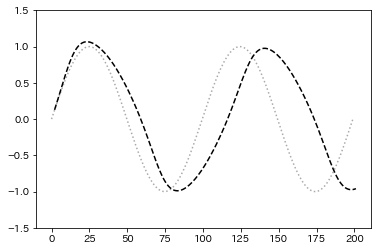
">

- 配布ファイル「3_3_predict_sin.ipynb」その2

|ハイパーパラメータ|値|
|:--|--:|
|繰り返し回数|$100$|
|ひとつの時系列データの長さ|$2$|

<img src="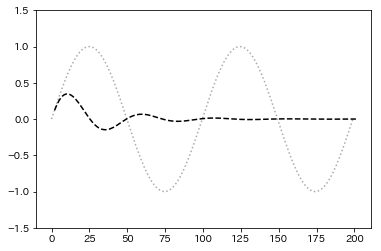
">

- 配布ファイル「3_3_predict_sin.ipynb」その2

|ハイパーパラメータ|値|
|:--|--:|
|繰り返し回数|$100$|
|ひとつの時系列データの長さ|$2$|

<img src="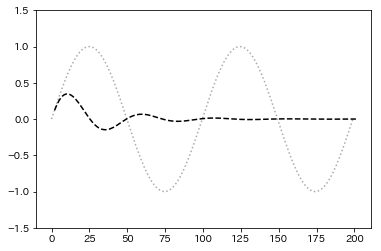
">

- 配布ファイル「3_3_predict_sin.ipynb」その3

|ハイパーパラメータ|値|
|:--|--:|
|繰り返し回数|$100$|
|ひとつの時系列データの長さ|$5$|

<img src="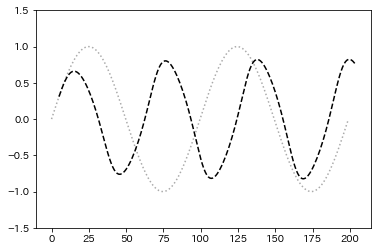
">

- 配布ファイル「3_3_predict_sin.ipynb」その4

|ハイパーパラメータ|値|
|:--|--:|
|繰り返し回数|$500$|
|ひとつの時系列データの長さ|$5$|

<img src="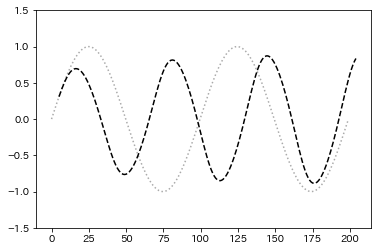
">

- 配布ファイル「3_3_predict_sin.ipynb」その5

|ハイパーパラメータ|値|
|:--|--:|
|繰り返し回数|$3000$|
|ひとつの時系列データの長さ|$5$|

<img src="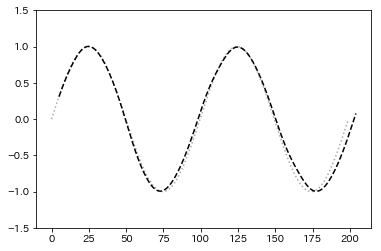
">

### 確認テスト考察
- 問1. LSTMとCECが抱える課題について、それぞれ簡潔に述べよ。
- 答1. 
    - LSTMはパラメータ数が多く、計算負荷が高い
    - CECは常に勾配$1$が渡される続ける為、学習（勾配適用によるパラメータ更新）を行うことができない
- 問2. LSTMとGRUの違いを簡潔に述べよ。
- 答2. GRUの方がLSTMと比較してパラメータ数が少なくと計算負荷が小さい

### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|Guido van Rossum（鴨澤眞夫訳）|Pythonチュートリアル 第3版|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ❷ ―自然言語処理編|オライリー・ジャパン|2018年|

## Section4 : 双方向RNN
- **過去の情報だけでなく、未来の情報をも加味した特徴量**を用いることで予測精度を向上させる為のモデル
    - 具体的には順方向の中間層表現$\mathbf{b}^{t}$と逆方向の中間層表現$\mathbf{b}^{t-1}$を水平方向に連結（concatenate）する
    $$
    \left[
    \begin{array}{c|c}
        \mathbf{b}^{t} & \mathbf{b}^{t-1}
    \end{array}
    \right]
    $$
        - コードで表わすと

        ```python
        np.concatenate([h_f, h_b[::-1]], axis=1)
        ```

        のようになる
    
- 主な実用例
    - 文書の推敲
    - 機械翻訳

### 実装演習結果
### 確認テスト考察
### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|Guido van Rossum（鴨澤眞夫訳）|Pythonチュートリアル 第3版|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ❷ ―自然言語処理編|オライリー・ジャパン|2018年|

## Section5 : Seq2Seq
- RNNを用いたEncoder-Decoderモデルの一種
- 主な具体的用途
    - 機械対話
    - 機械翻訳
- Encoder RNN
    - テキストの入力データを、形態素解析して（単語等のトークンに区切って）渡す構造
        - 例. 「食べた刺し身大丈夫でしたか」$\Longrightarrow$「食べた」「刺し身」「大丈夫」「でしたか」
    - 用語
        1. Taking: 文章を単語等のトークン毎に分割し、トークン毎にIDを割り当てる
        1. Embedding: IDから、そのトークンを表わす分散表現ベクトルに変換
        1. Encoder RNN: ベクトルを順番にRNNに入力していく
    - 処理手順
        1. vec1をRNNに入力し、hidden stateを出力
        1. hidden stateと次の入力vec2をまたRNNに入力し、hidden stateを出力
        1. 最後のvecに到達する迄、1と2の流れを繰り返す
        1. 最後のvecを入力したときのhidden stateをfinal stateとしてとっておく
            - このfinal stateを「thought vector」といい、入力した文の意味を表わすベクトルとなる
- Decoder RNN
    - ベクトルの出力データを、単語等のトークンごとに生成する構造
        - 処理手順
            1. thought vectorから各トークンの生成確率を出力していき、thought vectorをDecoder RNNのinitial state（初期状態）として設定し、Embeddingを入力
            1. Sampling: 生成確率にもとづいてトークンをランダムに選ぶ
            1. Embedding: 2で選ばれたトークンをEmbeddingしてDecoder RNNへの次の入力とする
            1. 1～3く繰り返し、2で得られたトークンを文字列に変換
    - 問題点
        - 一問一答しかできない（会話の文脈に即した応答ができない）<br />$\Longrightarrow$解決策: HEAD
        - 長い文章への対応が難しい（単語数の多寡に拘わらず固定次元ベクトルの中に入力しなければならない）<br />$\Longrightarrow$解決策: [Attention Mechanism](#Section7-:-Attention-Mechanism)
- HEAD
    - 過去$n-1$個の発話から次の発話を生成する<br />$\Longrightarrow$より人間らしい文章が生成される
        - 例.
        システム「インコかわいいよね。」
        ユーザー「うん。」
        システム「インコかわいいのわかる。」
    - 構造
        - Seq2Seq$+$Context RNN
            - Context RNN: Encoderのまとめた各文章の系列をまとめて、これまでの会話コンテキスト全体を表わすベクトルに変換する構造
                - 過去の発話の履歴を加味した返答ができる
    - 問題点
        - 会話の「流れ」のような多様性がない
        - 短いよくある答えを学ぶ傾向がある
            - 例. 「うん」「そうだね」
        $\Longrightarrow$解決策: VHEAD
- VHRED
    - HREDに、VAEの潜在変数の概念を追加したもの
- オートエンコーダ（自己符号化器）
    - 教師なし学習の一つ
    - 出力値$\mathbf{y}$が入力値$\mathbf{x}$と同じになるようにする
    - 1層の入力層（Encoder）、1層の中間層（潜在変数$\mathbf{z}$）、1層の出力層（Decoder）の3層で構成され、EncoderとDecoderのノード数は同じで$\mathbf{z}$のノード数はそれらよりも少ない<br />Encoderのノード数$=$Decoderのノード数$>\mathbf{z}$のノード数
        - 横倒し砂時計型のネットワーク構成
        - $\mathbf{z}$を利用して次元圧縮が行える
- VAE
    - オートエンコーダの潜在変数$\mathbf{z}$に確率分布を導入したもの

### 実装演習結果
### 確認テスト考察
- 問1. 下記の選択肢から、seq2seqについて説明しているものを選べ。
    1. 時刻に関して順方向と逆方向のRNNを構成し、それら2つの中間層表現を特徴量として利用するものである。
    1. RNNを用いたEncoder-Decoderモデルの一種であり、機械翻訳などのモデルに使われる。
    1. 構文木などの木構造に対して、隣接単語$(\text{left},\text{right})$から表現ベクトル（フレーズ）を作るという演算を再帰的に行い（重み$\mathbf{W}$は共通）文全体の表現ベクトルを得るニューラルネットワークである。
    
    ```python
    W.dot(np.concatenate([left, right]))
    ```
    
    1. RNNの一種であり、単純なRNNに於いて問題となる勾配消失問題とCECゲートの概念を導入することで解決したものである。
- 答1. 2

- 問2. Seq2SeqとHEADとVHREDの違いを簡潔に述べよ。
- 答2. 一問一答しかできないSeq2Seqの問題点を解決したのがHEADであり、会話の「流れ」のような多様性がないHEADの問題点を解決したのがVHREDである。

- 問3. VAEに関する下記の説明文中の空欄に当て嵌まる言葉を答えよ。
    - 「自己符号化器の潜在変数に＿＿＿を導入したもの。」
- 答3. 確率変数

### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|Guido van Rossum（鴨澤眞夫訳）|Pythonチュートリアル 第3版|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ❷ ―自然言語処理編|オライリー・ジャパン|2018年|

## Section6 : Word2vec
- 固定長の文字列にしか対応していなかったRNNに対して、可変長の文字列にも対応できる
- 学習データから語彙（ボキャブラリ）作成
    - ex."I want to eat apples. I like apples."$$\Longrightarrow\left\{\text{apples},\text{I},\text{eat},\text{like},\text{to}.\text{want}\right\}$$
    - 作成した語彙毎に固有のone-hotベクトルが割り当てられる
    $$
    \text{apples}=\left[\begin{array}{c}1\\0\\0\\0\\0\\0\end{array}\right],\hspace{5pt}
    \text{I}=\left[\begin{array}{c}0\\1\\0\\0\\0\\0\end{array}\right],\hspace{5pt}
    \text{eat}=\left[\begin{array}{c}0\\0\\1\\0\\0\\0\end{array}\right],\hspace{5pt}
    \text{like}=\left[\begin{array}{c}0\\0\\0\\1\\0\\0\end{array}\right],\hspace{5pt}
    \text{to}=\left[\begin{array}{c}0\\0\\0\\0\\1\\0\end{array}\right],\hspace{5pt}
    \text{want}=\left[\begin{array}{c}0\\0\\0\\0\\0\\1\end{array}\right]
    $$

- メリット
    - 大規模データの分散表現の学習が、現実的な計算速度とメモリ量で実現可能にした
    - 語彙数の2乗ではなく、語彙数$\cdot$任意の単語ベクトル次元で重み行列が誕生
    $$
    [0,1,0,0,0\cdots ]\cdot \underline{\left[
    \begin{array}{ccc}
        w_{11} & \cdots & w_{1i} \\
        \vdots & \ddots & \vdots \\
        w_{j1} & \cdots & w_{ji}
    \end{array}
    \right]}=[1,13,15]
    $$
        - 下線部は、語彙数$\cdot$単語ベクトル次元で重み行列


### 実装演習結果
### 確認テスト考察
### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|Guido van Rossum（鴨澤眞夫訳）|Pythonチュートリアル 第3版|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ❷ ―自然言語処理編|オライリー・ジャパン|2018年|

## Section7 : Attention Mechanism
- 入力と出力のどの単語が関連しているのか、の関連度を学習する仕組み
- 例. <br />「**私**」「は」「**ペン**」「を」「**持って**」「いる」<br />「**I**」「**have**」「a」「**pen**」<hr />「**I**」は「**私**」との関連度が高く、「a」は関連度が高くない

### 実装演習結果
### 確認テスト考察
- 問1. RNNとword2vec、seq2seqとseq2seq$+$Attentionの違いを簡潔に述べよ。
- 答1.
    - word2vecはRNNと比較して計算処理が高速。
    - seq2seq$+$Attentionでは関連度の概念によりseq2seqでは困難だった長い文章にも対応可能。

### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|Guido van Rossum（鴨澤眞夫訳）|Pythonチュートリアル 第3版|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ❷ ―自然言語処理編|オライリー・ジャパン|2018年|

# レポート（深層学習・day4）

## Section1 : Tensorflowの実装演習
- TensolFlow
    - 定数（constant）
        - Tensor型の定数ジェネレータとして定義させる
        - 実際のデータを見るには定数ジェネレータを実行（run）する
    - placeholder
        - 或る雛型に従った配列等のオブジェクトを代入する為に予め確保された領域
    - 変数（variables）
        - tf.Variable型の変数ジェネレータとして定義させる
        - 或る規則を割当（assign）して、変数ジェネレータにその規則をかませて実行することで、変数ジェネレータが生成する値が変化していく
        - 変数ジェネレータを再び初期化すると、割当直後の値にリセットされる
- Keras
    - TensorFlowのラッパーのライブラリ
    - CNNのネットワークをより簡単に記述できる
    - 柔軟なところには対応できない
    - ニューラルネットワーク版scikit-learnのようなもの（私見）

### 実装演習結果

In [1]:
# 初期設定
%matplotlib inline
import warnings
import os

warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf

tf.logging.set_verbosity(tf.logging.FATAL)

#### TensolFlow

##### base

###### constant
- 定数（constant）
    - Tensor型の定数ジェネレータとして定義させる
    - 実際のデータを見るには定数ジェネレータを実行（run）する

In [2]:
import tensorflow as tf
import numpy as np

# それぞれ定数を定義
a = tf.constant(1)
b = tf.constant(2, dtype=tf.float32, shape=[3,2])
c = tf.constant(np.arange(4), dtype=tf.float32, shape=[2,2])

print('a:', a)
print('b:', b)
print('c:', c)

sess = tf.Session()

print('a:', sess.run(a))
print('b:', sess.run(b))
print('c:', sess.run(c))

a: Tensor("Const:0", shape=(), dtype=int32)
b: Tensor("Const_1:0", shape=(3, 2), dtype=float32)
c: Tensor("Const_2:0", shape=(2, 2), dtype=float32)
a: 1
b: [[2. 2.]
 [2. 2.]
 [2. 2.]]
c: [[0. 1.]
 [2. 3.]]


###### placeholder
- 或る雛型に従った配列等のオブジェクトを代入する為に予め確保された領域

In [3]:
import tensorflow as tf
import numpy as np

# プレースホルダーを定義
x = tf.placeholder(dtype=tf.float32, shape=[None,3])

print('x:', x)

sess = tf.Session()

X = np.random.rand(2,3)
print('X:', X)

# プレースホルダにX[0]を入力
# shapeを(3,)から(1,3)にするためreshape
print('x:', sess.run(x, feed_dict={x:X[0].reshape(1,-1)}))
# プレースホルダにX[1]を入力
print('x:', sess.run(x, feed_dict={x:X[1].reshape(1,-1)}))

x: Tensor("Placeholder:0", shape=(?, 3), dtype=float32)
X: [[0.05870833 0.17391717 0.3874834 ]
 [0.90049773 0.37537046 0.4917462 ]]
x: [[0.05870833 0.17391717 0.3874834 ]]
x: [[0.90049773 0.37537044 0.49174622]]


###### variables
- 変数（variables）
    - tf.Variable型の変数ジェネレータとして定義させる
    - 或る規則を割当（assign）して、変数ジェネレータにその規則をかませて実行することで、変数ジェネレータが生成する値が変化していく
    - 変数ジェネレータを再び初期化すると、割当直後の値にリセットされる

In [5]:
# 定数を定義
a = tf.constant(10)
print('a:', a)
# 変数を定義
x = tf.Variable(1)
print('x:', x)

calc_op = x * a

# xの値を更新
update_x = tf.assign(x, calc_op)

sess = tf.Session()

# 変数の初期化
init = tf.global_variables_initializer()
sess.run(init)

print(sess.run(x))

sess.run(update_x)
print(sess.run(x))

sess.run(update_x)
print(sess.run(x))

sess.run(update_x)
print(sess.run(x))

a: Tensor("Const_4:0", shape=(), dtype=int32)
x: <tf.Variable 'Variable_1:0' shape=() dtype=int32_ref>
1
10
100
1000


In [6]:
# 変数の再初期化
init = tf.global_variables_initializer()
sess.run(init)

print(sess.run(x))

1


##### 線形回帰
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###### [try]
-  noiseの値を変更しよう
-  dの数値を変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [8]:
# 正規分布に従った乱数
n = 100
np.random.randn(n) 

array([-1.20890831, -1.37157991, -0.49919685,  0.29668078, -0.68493296,
       -0.15273607, -0.0986224 ,  1.4942863 , -0.29493954, -0.97611857,
       -1.30190534, -0.54185557, -1.00762937, -1.78482929, -1.07242454,
        1.12130556,  0.18510646, -0.57474093,  1.39522752, -0.88595253,
        0.1047286 ,  0.9364067 ,  0.9704187 ,  1.84459793,  0.43014155,
       -2.13817793,  0.10189158,  0.39482756,  1.3079866 ,  1.87231231,
        0.97594801,  1.12343119, -2.01050397, -1.22717914,  1.06063623,
       -1.25415984,  0.3185505 ,  2.63128953, -0.88111805, -0.37829131,
       -1.162114  ,  0.50657423, -2.17708615,  1.2276465 ,  0.20962479,
       -0.50466402,  1.19104983, -2.24295838,  1.90572206,  0.96679087,
       -0.74773553, -1.22866335,  1.41113716, -1.26139684,  0.05007545,
        0.41490425,  1.36351508,  0.42010923, -0.62852212, -0.94739857,
        0.12513869, -0.10485985,  0.9206027 , -0.882866  ,  0.08168235,
       -0.19669877, -0.96434211,  1.20206394,  0.04788666,  0.20

|ハイパーパラメータ|値|
|:--|--:|
|`noise`|$0.3$|
|`d`|$$3x+2$$|

Generation: 10. 誤差 = 0.26063964
Generation: 20. 誤差 = 0.19392551
Generation: 30. 誤差 = 0.16979954
Generation: 40. 誤差 = 0.15142961
Generation: 50. 誤差 = 0.13738512
Generation: 60. 誤差 = 0.12664735
Generation: 70. 誤差 = 0.11843777
Generation: 80. 誤差 = 0.11216109
Generation: 90. 誤差 = 0.10736227
Generation: 100. 誤差 = 0.103693314
Generation: 110. 誤差 = 0.10088819
Generation: 120. 誤差 = 0.09874351
Generation: 130. 誤差 = 0.097103804
Generation: 140. 誤差 = 0.09585016
Generation: 150. 誤差 = 0.0948917
Generation: 160. 誤差 = 0.094158895
Generation: 170. 誤差 = 0.09359861
Generation: 180. 誤差 = 0.09317026
Generation: 190. 誤差 = 0.09284277
Generation: 200. 誤差 = 0.09259239
Generation: 210. 誤差 = 0.09240093
Generation: 220. 誤差 = 0.09225458
Generation: 230. 誤差 = 0.09214268
Generation: 240. 誤差 = 0.09205713
Generation: 250. 誤差 = 0.09199171
Generation: 260. 誤差 = 0.0919417
Generation: 270. 誤差 = 0.091903456
Generation: 280. 誤差 = 0.091874234
Generation: 290. 誤差 = 0.09185188
Generation: 300. 誤差 = 0.09183479
[2.8918424]
[2.0

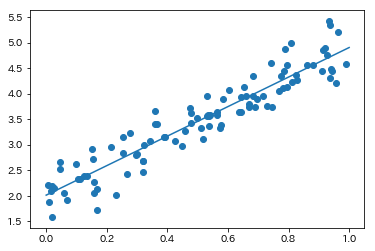

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 300
plot_interval = 10

# データを生成
n = 100
x = np.random.rand(n)  # n件の一様乱数の入力データ
d = 3 * x + 2

# 正規分布に従った乱数にノイズを掛けたものを加える
noise = 0.3
d = d + noise * np.random.randn(n)

# 入力値
xt = tf.placeholder(tf.float32)
dt = tf.placeholder(tf.float32)

# 最適化の対象の変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W * xt + b

# 誤差関数 平均2乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1,1)
d_train = d.reshape(-1,1)

# トレーニング
for i in range(iters_num):
    sess.run(train, feed_dict={xt:x_train,dt:d_train})
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train,dt:d_train}) 
        W_val = sess.run(W)
        b_val = sess.run(b)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

print(W_val)
print(b_val)

#  予測関数
def predict(x):
    return W_val * x + b_val

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

<hr />

|ハイパーパラメータ|値|
|:--|--:|
|`noise`|$-0.3$|
|`d`|$$3x+2$$|

Generation: 10. 誤差 = 0.21909332
Generation: 20. 誤差 = 0.16525486
Generation: 30. 誤差 = 0.14591423
Generation: 40. 誤差 = 0.1312828
Generation: 50. 誤差 = 0.12018055
Generation: 60. 誤差 = 0.111756176
Generation: 70. 誤差 = 0.105363704
Generation: 80. 誤差 = 0.10051309
Generation: 90. 誤差 = 0.09683245
Generation: 100. 誤差 = 0.09403959
Generation: 110. 誤差 = 0.09192037
Generation: 120. 誤差 = 0.09031229
Generation: 130. 誤差 = 0.089092106
Generation: 140. 誤差 = 0.0881662
Generation: 150. 誤差 = 0.087463625
Generation: 160. 誤差 = 0.08693052
Generation: 170. 誤差 = 0.086526014
Generation: 180. 誤差 = 0.086219065
Generation: 190. 誤差 = 0.08598614
Generation: 200. 誤差 = 0.0858094
Generation: 210. 誤差 = 0.0856753
Generation: 220. 誤差 = 0.085573524
Generation: 230. 誤差 = 0.085496314
Generation: 240. 誤差 = 0.085437715
Generation: 250. 誤差 = 0.08539326
Generation: 260. 誤差 = 0.085359514
Generation: 270. 誤差 = 0.085333936
Generation: 280. 誤差 = 0.08531451
Generation: 290. 誤差 = 0.085299775
Generation: 300. 誤差 = 0.085288584
[2.8533819

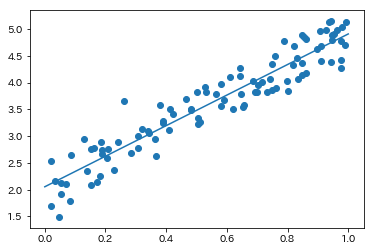

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 300
plot_interval = 10

# データを生成
n = 100
x = np.random.rand(n)  # n件の一様乱数の入力データ
d = 3 * x + 2

# 正規分布に従った乱数にノイズを掛けたものを加える
noise = -0.3
d = d + noise * np.random.randn(n)

# 入力値
xt = tf.placeholder(tf.float32)
dt = tf.placeholder(tf.float32)

# 最適化の対象の変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W * xt + b

# 誤差関数 平均2乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1,1)
d_train = d.reshape(-1,1)

# トレーニング
for i in range(iters_num):
    sess.run(train, feed_dict={xt:x_train,dt:d_train})
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train,dt:d_train}) 
        W_val = sess.run(W)
        b_val = sess.run(b)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

print(W_val)
print(b_val)

#  予測関数
def predict(x):
    return W_val * x + b_val

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

<hr />

|ハイパーパラメータ|値|
|:--|--:|
|`noise`|$3$|
|`d`|$$3x+2$$|

Generation: 10. 誤差 = 7.3458705
Generation: 20. 誤差 = 7.2811646
Generation: 30. 誤差 = 7.251737
Generation: 40. 誤差 = 7.229115
Generation: 50. 誤差 = 7.211691
Generation: 60. 誤差 = 7.1982713
Generation: 70. 誤差 = 7.187936
Generation: 80. 誤差 = 7.1799755
Generation: 90. 誤差 = 7.173845
Generation: 100. 誤差 = 7.1691236
Generation: 110. 誤差 = 7.165486
Generation: 120. 誤差 = 7.162685
Generation: 130. 誤差 = 7.160527
Generation: 140. 誤差 = 7.158866
Generation: 150. 誤差 = 7.1575866
Generation: 160. 誤差 = 7.1566005
Generation: 170. 誤差 = 7.155841
Generation: 180. 誤差 = 7.1552567
Generation: 190. 誤差 = 7.154807
Generation: 200. 誤差 = 7.154459
Generation: 210. 誤差 = 7.154192
Generation: 220. 誤差 = 7.153986
Generation: 230. 誤差 = 7.1538286
Generation: 240. 誤差 = 7.153706
Generation: 250. 誤差 = 7.153612
Generation: 260. 誤差 = 7.1535397
Generation: 270. 誤差 = 7.153484
Generation: 280. 誤差 = 7.153441
Generation: 290. 誤差 = 7.1534076
Generation: 300. 誤差 = 7.153382
[3.1318867]
[1.7709757]


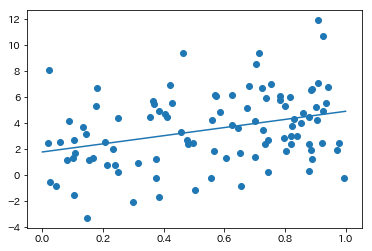

In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 300
plot_interval = 10

# データを生成
n = 100
x = np.random.rand(n)  # n件の一様乱数の入力データ
d = 3 * x + 2

# 正規分布に従った乱数にノイズを掛けたものを加える
noise = 3
d = d + noise * np.random.randn(n)

# 入力値
xt = tf.placeholder(tf.float32)
dt = tf.placeholder(tf.float32)

# 最適化の対象の変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W * xt + b

# 誤差関数 平均2乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1,1)
d_train = d.reshape(-1,1)

# トレーニング
for i in range(iters_num):
    sess.run(train, feed_dict={xt:x_train,dt:d_train})
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train,dt:d_train}) 
        W_val = sess.run(W)
        b_val = sess.run(b)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

print(W_val)
print(b_val)

#  予測関数
def predict(x):
    return W_val * x + b_val

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

<hr />

|ハイパーパラメータ|値|
|:--|--:|
|`noise`|$0.03$|
|`d`|$$3x+2$$|

Generation: 10. 誤差 = 0.18846698
Generation: 20. 誤差 = 0.115100786
Generation: 30. 誤差 = 0.08773294
Generation: 40. 誤差 = 0.066981494
Generation: 50. 誤差 = 0.05118276
Generation: 60. 誤差 = 0.039154496
Generation: 70. 誤差 = 0.029996857
Generation: 80. 誤差 = 0.023024803
Generation: 90. 誤差 = 0.01771664
Generation: 100. 誤差 = 0.013675346
Generation: 110. 誤差 = 0.010598505
Generation: 120. 誤差 = 0.00825598
Generation: 130. 誤差 = 0.0064725233
Generation: 140. 誤差 = 0.0051147137
Generation: 150. 誤差 = 0.004080936
Generation: 160. 誤差 = 0.003293872
Generation: 170. 誤差 = 0.0026946652
Generation: 180. 誤差 = 0.0022384536
Generation: 190. 誤差 = 0.0018911209
Generation: 200. 誤差 = 0.0016266805
Generation: 210. 誤差 = 0.0014253512
Generation: 220. 誤差 = 0.0012720679
Generation: 230. 誤差 = 0.0011553752
Generation: 240. 誤差 = 0.0010665307
Generation: 250. 誤差 = 0.0009988879
Generation: 260. 誤差 = 0.00094739103
Generation: 270. 誤差 = 0.00090818194
Generation: 280. 誤差 = 0.00087833265
Generation: 290. 誤差 = 0.00085560395
Generatio

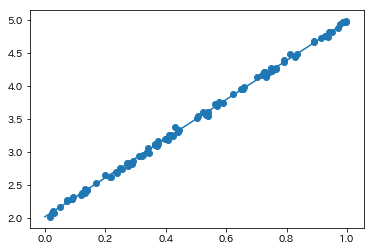

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 300
plot_interval = 10

# データを生成
n = 100
x = np.random.rand(n)  # n件の一様乱数の入力データ
d = 3 * x + 2

# 正規分布に従った乱数にノイズを掛けたものを加える
noise = 0.03
d = d + noise * np.random.randn(n)

# 入力値
xt = tf.placeholder(tf.float32)
dt = tf.placeholder(tf.float32)

# 最適化の対象の変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W * xt + b

# 誤差関数 平均2乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1,1)
d_train = d.reshape(-1,1)

# トレーニング
for i in range(iters_num):
    sess.run(train, feed_dict={xt:x_train,dt:d_train})
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train,dt:d_train}) 
        W_val = sess.run(W)
        b_val = sess.run(b)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

print(W_val)
print(b_val)

#  予測関数
def predict(x):
    return W_val * x + b_val

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

<hr />

|ハイパーパラメータ|値|
|:--|--:|
|`noise`|$0.3$|
|`d`|$$5x-3$$|

Generation: 10. 誤差 = 1.7896401
Generation: 20. 誤差 = 1.3953525
Generation: 30. 誤差 = 1.0928125
Generation: 40. 誤差 = 0.860578
Generation: 50. 誤差 = 0.68231094
Generation: 60. 誤差 = 0.5454698
Generation: 70. 誤差 = 0.4404283
Generation: 80. 誤差 = 0.35979643
Generation: 90. 誤差 = 0.29790214
Generation: 100. 誤差 = 0.250391
Generation: 110. 誤差 = 0.2139206
Generation: 120. 誤差 = 0.1859253
Generation: 130. 誤差 = 0.16443561
Generation: 140. 誤差 = 0.1479397
Generation: 150. 誤差 = 0.13527726
Generation: 160. 誤差 = 0.12555729
Generation: 170. 誤差 = 0.118096106
Generation: 180. 誤差 = 0.112368695
Generation: 190. 誤差 = 0.10797228
Generation: 200. 誤差 = 0.1045975
Generation: 210. 誤差 = 0.102007
Generation: 220. 誤差 = 0.10001848
Generation: 230. 誤差 = 0.098492034
Generation: 240. 誤差 = 0.097320326
Generation: 250. 誤差 = 0.0964209
Generation: 260. 誤差 = 0.095730476
Generation: 270. 誤差 = 0.0952005
Generation: 280. 誤差 = 0.094793655
Generation: 290. 誤差 = 0.09448138
Generation: 300. 誤差 = 0.09424166
[4.885979]
[-2.9243307]


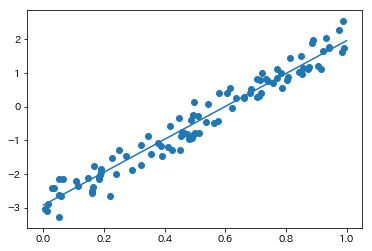

In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 300
plot_interval = 10

# データを生成
n = 100
x = np.random.rand(n)  # n件の一様乱数の入力データ
d = 5 * x + -3

# 正規分布に従った乱数にノイズを掛けたものを加える
noise = 0.3
d = d + noise * np.random.randn(n)

# 入力値
xt = tf.placeholder(tf.float32)
dt = tf.placeholder(tf.float32)

# 最適化の対象の変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W * xt + b

# 誤差関数 平均2乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1,1)
d_train = d.reshape(-1,1)

# トレーニング
for i in range(iters_num):
    sess.run(train, feed_dict={xt:x_train,dt:d_train})
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train,dt:d_train}) 
        W_val = sess.run(W)
        b_val = sess.run(b)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

print(W_val)
print(b_val)

#  予測関数
def predict(x):
    return W_val * x + b_val

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`noise`|$0.3$||
|`d`|$$-3x+2$$|係数1つ$+$切片|

Generation: 10. 誤差 = 0.767184
Generation: 20. 誤差 = 0.6155663
Generation: 30. 誤差 = 0.49942076
Generation: 40. 誤差 = 0.40971276
Generation: 50. 誤差 = 0.34042132
Generation: 60. 誤差 = 0.28689995
Generation: 70. 誤差 = 0.24555944
Generation: 80. 誤差 = 0.21362762
Generation: 90. 誤差 = 0.1889632
Generation: 100. 誤差 = 0.16991211
Generation: 110. 誤差 = 0.15519688
Generation: 120. 誤差 = 0.14383066
Generation: 130. 誤差 = 0.13505127
Generation: 140. 誤差 = 0.12827
Generation: 150. 誤差 = 0.123032056
Generation: 160. 誤差 = 0.11898623
Generation: 170. 誤差 = 0.11586118
Generation: 180. 誤差 = 0.11344736
Generation: 190. 誤差 = 0.11158289
Generation: 200. 誤差 = 0.11014277
Generation: 210. 誤差 = 0.10903039
Generation: 220. 誤差 = 0.108171195
Generation: 230. 誤差 = 0.107507534
Generation: 240. 誤差 = 0.10699493
Generation: 250. 誤差 = 0.106598966
Generation: 260. 誤差 = 0.10629313
Generation: 270. 誤差 = 0.1060569
Generation: 280. 誤差 = 0.10587443
Generation: 290. 誤差 = 0.10573349
Generation: 300. 誤差 = 0.10562464
[-3.0159774]
[1.988221]

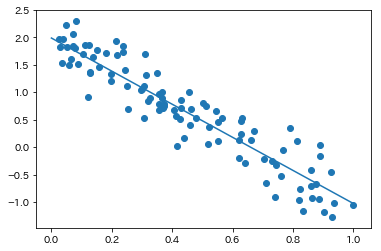

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 300
plot_interval = 10

# データを生成
n = 100
x = np.random.rand(n)  # n件の一様乱数の入力データ
d = -3 * x + 2

# 正規分布に従った乱数にノイズを掛けたものを加える
noise = 0.3
d = d + noise * np.random.randn(n)

# 入力値
xt = tf.placeholder(tf.float32)
dt = tf.placeholder(tf.float32)

# 最適化の対象の変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W * xt + b

# 誤差関数 平均2乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1,1)
d_train = d.reshape(-1,1)

# トレーニング
for i in range(iters_num):
    sess.run(train, feed_dict={xt:x_train,dt:d_train})
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train,dt:d_train}) 
        W_val = sess.run(W)
        b_val = sess.run(b)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

print(W_val)
print(b_val)

#  予測関数
def predict(x):
    return W_val * x + b_val

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

##### 非線形回帰
- 線形回帰モデルとの違い
    - 入力値placeholder$\mathbf{x}^{t}$
    
    ```python
    # 線形回帰モデル
    xt = tf.placeholder(tf.float32)
    # 非線形回帰モデル
    xt = tf.placeholder(tf.float32, [None, 4])
    ```
    
        - $\mathbf{x}^{t}$の個数は1つでなく4つ
            - $\mathbf{x}^{t}$の個数は`d`の式の係数（$x^{0}$のを含む。）の個数に等しい
    - 重み$\mathbf{W}$
    
    ```python
    # 線形回帰モデル
    W = tf.Variable(tf.zeros([1]))
    # 非線形回帰モデル
    W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
    ```
    
        - $\mathbf{W}$は1つでなく4つ
            - $\mathbf{W}$の個数は`d`の式の係数（$x^{0}$のを含む。）の個数に等しい
        - $\mathbf{W}$の初期値はゼロでなく標準偏差$0.01$の正規分布乱数
    - 出力値$\mathbf{y}$
    
    ```python
    # 線形回帰モデル
    y = W * xt + b
    # 非線形回帰モデル
    y = tf.matmul(xt,W)
    ```
    
        - $\mathbf{x}^{t}$と$\mathbf{W}$の内積をとる
    - 最適化手法
    
    ```python
    # 線形回帰モデル
    optimizer = tf.train.GradientDescentOptimizer(0.1)
    # 非線形回帰モデル
    optimizer = tf.train.AdamOptimizer(0.001)
    ```
    
        - 勾配降下法（最急降下法）でなくAdamを用いる
        - 学習率は$0.1$でなく$0.001$とする
    
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###### [try]
-  noiseの値を変更しよう
-  dの数値を変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`noise`|$0.05$||
|`d`|$$-0.4x^{3}+1.6x^{2}-2.8x+1$$|係数4つ|

Generation: 100. 誤差 = 28.923904
Generation: 200. 誤差 = 24.238636
Generation: 300. 誤差 = 20.169687
Generation: 400. 誤差 = 16.661932
Generation: 500. 誤差 = 13.662219
Generation: 600. 誤差 = 11.119403
Generation: 700. 誤差 = 8.984364
Generation: 800. 誤差 = 7.210147
Generation: 900. 誤差 = 5.752101
Generation: 1000. 誤差 = 4.568084
Generation: 1100. 誤差 = 3.6186774
Generation: 1200. 誤差 = 2.8674407
Generation: 1300. 誤差 = 2.2811196
Generation: 1400. 誤差 = 1.8298428
Generation: 1500. 誤差 = 1.487248
Generation: 1600. 誤差 = 1.2305291
Generation: 1700. 誤差 = 1.0403674
Generation: 1800. 誤差 = 0.9007756
Generation: 1900. 誤差 = 0.7988403
Generation: 2000. 誤差 = 0.72438276
Generation: 2100. 誤差 = 0.669581
Generation: 2200. 誤差 = 0.62856656
Generation: 2300. 誤差 = 0.59704155
Generation: 2400. 誤差 = 0.5719218
Generation: 2500. 誤差 = 0.5510391
Generation: 2600. 誤差 = 0.53289396
Generation: 2700. 誤差 = 0.5164626
Generation: 2800. 誤差 = 0.5010568
Generation: 2900. 誤差 = 0.4862178
Generation: 3000. 誤差 = 0.47164643
Generation: 3100. 誤差

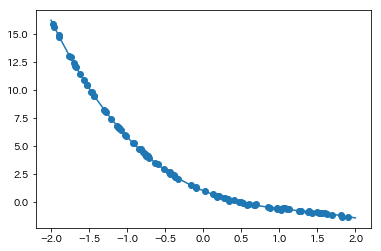

In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1

#  ノイズを加える
noise = 0.05
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])  # 4つ
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))  # 重みは4つ、標準偏差0.01の正規分布乱数
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`noise`|$5$||
|`d`|$$-0.4x^{3}+1.6x^{2}-2.8x+1$$|係数4つ|

Generation: 100. 誤差 = 42.723465
Generation: 200. 誤差 = 38.69394
Generation: 300. 誤差 = 35.245785
Generation: 400. 誤差 = 32.32173
Generation: 500. 誤差 = 29.866594
Generation: 600. 誤差 = 27.827377
Generation: 700. 誤差 = 26.153427
Generation: 800. 誤差 = 24.796667
Generation: 900. 誤差 = 23.711851
Generation: 1000. 誤差 = 22.856897
Generation: 1100. 誤差 = 22.193178
Generation: 1200. 誤差 = 21.68579
Generation: 1300. 誤差 = 21.30379
Generation: 1400. 誤差 = 21.02031
Generation: 1500. 誤差 = 20.812538
Generation: 1600. 誤差 = 20.661613
Generation: 1700. 誤差 = 20.55233
Generation: 1800. 誤差 = 20.472776
Generation: 1900. 誤差 = 20.413914
Generation: 2000. 誤差 = 20.369068
Generation: 2100. 誤差 = 20.333467
Generation: 2200. 誤差 = 20.30382
Generation: 2300. 誤差 = 20.277918
Generation: 2400. 誤差 = 20.254349
Generation: 2500. 誤差 = 20.232227
Generation: 2600. 誤差 = 20.21104
Generation: 2700. 誤差 = 20.190498
Generation: 2800. 誤差 = 20.170465
Generation: 2900. 誤差 = 20.150879
Generation: 3000. 誤差 = 20.131735
Generation: 3100. 誤差 = 20.1

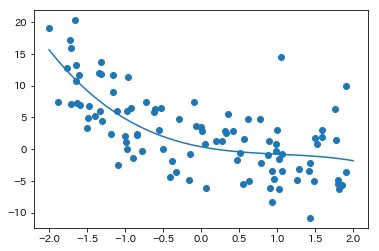

In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1

#  ノイズを加える
noise = 5
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])  # 4つ
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))  # 重みは4つ、標準偏差0.01の正規分布乱数
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`noise`|$0.00005$||
|`d`|$$-0.4x^{3}+1.6x^{2}-2.8x+1$$|係数4つ|

Generation: 100. 誤差 = 19.921392
Generation: 200. 誤差 = 16.854588
Generation: 300. 誤差 = 14.175597
Generation: 400. 誤差 = 11.850777
Generation: 500. 誤差 = 9.847708
Generation: 600. 誤差 = 8.1352005
Generation: 700. 誤差 = 6.683328
Generation: 800. 誤差 = 5.4634385
Generation: 900. 誤差 = 4.4482927
Generation: 1000. 誤差 = 3.6121173
Generation: 1100. 誤差 = 2.9307392
Generation: 1200. 誤差 = 2.3816988
Generation: 1300. 誤差 = 1.9443693
Generation: 1400. 誤差 = 1.6000459
Generation: 1500. 誤差 = 1.3320187
Generation: 1600. 誤差 = 1.1255913
Generation: 1700. 誤差 = 0.96806455
Generation: 1800. 誤差 = 0.84866935
Generation: 1900. 誤差 = 0.75843894
Generation: 2000. 誤差 = 0.6900717
Generation: 2100. 誤差 = 0.63774097
Generation: 2200. 誤差 = 0.596901
Generation: 2300. 誤差 = 0.5640885
Generation: 2400. 誤差 = 0.5367303
Generation: 2500. 誤差 = 0.5129657
Generation: 2600. 誤差 = 0.4914889
Generation: 2700. 誤差 = 0.47141442
Generation: 2800. 誤差 = 0.45216483
Generation: 2900. 誤差 = 0.43338144
Generation: 3000. 誤差 = 0.41485748
Generation: 31

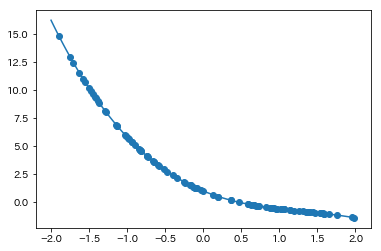

In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1

#  ノイズを加える
noise = 0.00005
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])  # 4つ
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))  # 重みは4つ、標準偏差0.01の正規分布乱数
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`noise`|$0.005$||
|`d`|$$0.4x^{3}+1.6x^{2}-2.8x+1$$|係数4つ|

Generation: 100. 誤差 = 15.10145
Generation: 200. 誤差 = 12.264039
Generation: 300. 誤差 = 9.988318
Generation: 400. 誤差 = 8.181377
Generation: 500. 誤差 = 6.7558947
Generation: 600. 誤差 = 5.632669
Generation: 700. 誤差 = 4.743034
Generation: 800. 誤差 = 4.0305676
Generation: 900. 誤差 = 3.4515088
Generation: 1000. 誤差 = 2.9737618
Generation: 1100. 誤差 = 2.5748162
Generation: 1200. 誤差 = 2.239179
Generation: 1300. 誤差 = 1.9560003
Generation: 1400. 誤差 = 1.7172318
Generation: 1500. 誤差 = 1.516419
Generation: 1600. 誤差 = 1.3480307
Generation: 1700. 誤差 = 1.2071291
Generation: 1800. 誤差 = 1.0892539
Generation: 1900. 誤差 = 0.99039155
Generation: 2000. 誤差 = 0.90698224
Generation: 2100. 誤差 = 0.8359266
Generation: 2200. 誤差 = 0.7745862
Generation: 2300. 誤差 = 0.7207701
Generation: 2400. 誤差 = 0.6727027
Generation: 2500. 誤差 = 0.62899065
Generation: 2600. 誤差 = 0.58857244
Generation: 2700. 誤差 = 0.5506692
Generation: 2800. 誤差 = 0.51473266
Generation: 2900. 誤差 = 0.48039642
Generation: 3000. 誤差 = 0.4474317
Generation: 3100. 誤差

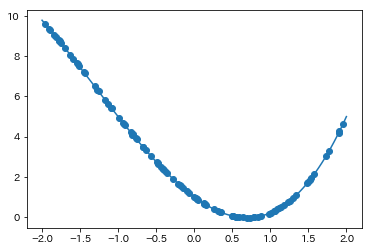

In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d =  0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1

#  ノイズを加える
noise = 0.005
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])  # 4つ
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))  # 重みは4つ、標準偏差0.01の正規分布乱数
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`noise`|$0.005$||
|`d`|$$1.4x^{3}+3.1x^{2}-5.5x+0.03$$|係数4つ|

Generation: 100. 誤差 = 42.585182
Generation: 200. 誤差 = 37.710487
Generation: 300. 誤差 = 33.583607
Generation: 400. 誤差 = 30.095005
Generation: 500. 誤差 = 27.140327
Generation: 600. 誤差 = 24.62296
Generation: 700. 誤差 = 22.45675
Generation: 800. 誤差 = 20.568428
Generation: 900. 誤差 = 18.898945
Generation: 1000. 誤差 = 17.403404
Generation: 1100. 誤差 = 16.049562
Generation: 1200. 誤差 = 14.815277
Generation: 1300. 誤差 = 13.685669
Generation: 1400. 誤差 = 12.650518
Generation: 1500. 誤差 = 11.702318
Generation: 1600. 誤差 = 10.834974
Generation: 1700. 誤差 = 10.043061
Generation: 1800. 誤差 = 9.321427
Generation: 1900. 誤差 = 8.665049
Generation: 2000. 誤差 = 8.068978
Generation: 2100. 誤差 = 7.52834
Generation: 2200. 誤差 = 7.038358
Generation: 2300. 誤差 = 6.59437
Generation: 2400. 誤差 = 6.1918707
Generation: 2500. 誤差 = 5.8265247
Generation: 2600. 誤差 = 5.4942055
Generation: 2700. 誤差 = 5.191011
Generation: 2800. 誤差 = 4.9132924
Generation: 2900. 誤差 = 4.657677
Generation: 3000. 誤差 = 4.4210873
Generation: 3100. 誤差 = 4.200754

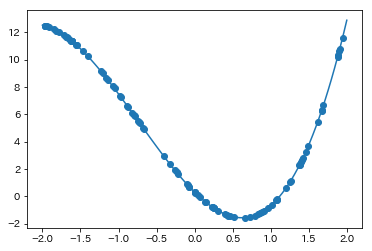

In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d =  1.4 * x ** 3 + 3.1 * x ** 2 - 5.5 * x + 0.3

#  ノイズを加える
noise = 0.005
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])  # 4つ
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))  # 重みは4つ、標準偏差0.01の正規分布乱数
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
##### [try]
-  次の式をモデルとして回帰を行おう
$$ y=30x^{2} +0.5x+0.2 $$<br>
-  誤差が収束するようiters_numやlearning_rateを調整しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`noise`|$0.005$||
|`d`|$$30x^{2}+0.5x+0.2$$|係数3つ|
|`iters_num`|$37{,}500$||
|`learning_rate`|$0.001$||
|`input_layer_size`|$3$|`d`の式の係数の個数|

Generation: 100. 誤差 = 2479.1877
Generation: 200. 誤差 = 2454.8235
Generation: 300. 誤差 = 2430.6794
Generation: 400. 誤差 = 2406.7515
Generation: 500. 誤差 = 2383.036
Generation: 600. 誤差 = 2359.527
Generation: 700. 誤差 = 2336.2224
Generation: 800. 誤差 = 2313.1172
Generation: 900. 誤差 = 2290.2075
Generation: 1000. 誤差 = 2267.4902
Generation: 1100. 誤差 = 2244.9612
Generation: 1200. 誤差 = 2222.617
Generation: 1300. 誤差 = 2200.4543
Generation: 1400. 誤差 = 2178.4702
Generation: 1500. 誤差 = 2156.6611
Generation: 1600. 誤差 = 2135.0242
Generation: 1700. 誤差 = 2113.5557
Generation: 1800. 誤差 = 2092.2542
Generation: 1900. 誤差 = 2071.1152
Generation: 2000. 誤差 = 2050.1372
Generation: 2100. 誤差 = 2029.317
Generation: 2200. 誤差 = 2008.6522
Generation: 2300. 誤差 = 1988.1406
Generation: 2400. 誤差 = 1967.7792
Generation: 2500. 誤差 = 1947.5663
Generation: 2600. 誤差 = 1927.499
Generation: 2700. 誤差 = 1907.5758
Generation: 2800. 誤差 = 1887.7941
Generation: 2900. 誤差 = 1868.1523
Generation: 3000. 誤差 = 1848.6481
Generation: 3100. 誤差 = 1

Generation: 24800. 誤差 = 71.55733
Generation: 24900. 誤差 = 69.95852
Generation: 25000. 誤差 = 68.38073
Generation: 25100. 誤差 = 66.823616
Generation: 25200. 誤差 = 65.28721
Generation: 25300. 誤差 = 63.771854
Generation: 25400. 誤差 = 62.27745
Generation: 25500. 誤差 = 60.803757
Generation: 25600. 誤差 = 59.350674
Generation: 25700. 誤差 = 57.91825
Generation: 25800. 誤差 = 56.50642
Generation: 25900. 誤差 = 55.11518
Generation: 26000. 誤差 = 53.744473
Generation: 26100. 誤差 = 52.394283
Generation: 26200. 誤差 = 51.06452
Generation: 26300. 誤差 = 49.755177
Generation: 26400. 誤差 = 48.46612
Generation: 26500. 誤差 = 47.19732
Generation: 26600. 誤差 = 45.948673
Generation: 26700. 誤差 = 44.72011
Generation: 26800. 誤差 = 43.51155
Generation: 26900. 誤差 = 42.322895
Generation: 27000. 誤差 = 41.15405
Generation: 27100. 誤差 = 40.005142
Generation: 27200. 誤差 = 38.87603
Generation: 27300. 誤差 = 37.766422
Generation: 27400. 誤差 = 36.676258
Generation: 27500. 誤差 = 35.605865
Generation: 27600. 誤差 = 34.554672
Generation: 27700. 誤差 = 33.52

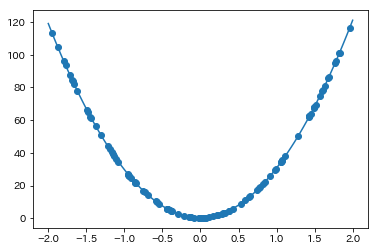

In [34]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 37500  #
learning_rate = 0.001
plot_interval = 100

# 入力層のノード数 = dの式の係数の個数 #
input_layer_size = 3

# データを生成
n = 100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d = 30.0 * x ** 2 + 0.5 * x + 0.2  #

#  ノイズを加える
noise = 0.005
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, input_layer_size])  #
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([input_layer_size, 1], stddev=0.01))  #
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, input_layer_size]) #
for i in range(n):
    for j in range(input_layer_size): #
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0, input_layer_size): #
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

##### 分類1層 (mnist)
- 分類モデル
    - 入力層のノード数=説明変数の件数=画素数: 
    $$
    28 \times 28 = 784
    $$
    - 出力層のノード数=目的変数のクラス数: 
    $$
    \left|\{k \mid k \in \mathbb{Z},0 \leqq k \leqq 9\}\right|=\left|\{0,1,2,3,4,5,6,7,8,9\}\right|=10
    $$
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
##### [try]
-  x：入力値, d：教師データ, W：重み, b：バイアス をそれぞれ定義しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[ True  True False ... False False False]
Generation: 1. 正解率 = 0.2373
[ True  True False ... False False False]
Generation: 2. 正解率 = 0.3884
[ True  True  True ... False False False]
Generation: 3. 正解率 = 0.5177
[ True  True  True ... False False False]
Generation: 4. 正解率 = 0.6169
[ True  True  True ... False False  True]
Generation: 5. 正解率 = 0.7035
[ True  True  True ... False False  True]
Generation: 6. 正解率 = 0.6683
[ True  True  True ... False False  True]
Generation: 7. 正解率 = 0.6221
[ True  True  True ... False False  True]
Generation: 8. 正解率 = 0.6303
[ True  True  True ... False False  True]
Generation: 9. 正解率 = 0.7023
[ True  True  True ... False False  True]
Generation: 10. 正解率 = 0.7574
[ True  True  True ... False False  True]
Generation: 11. 正解率 = 0.7561
[ True  True  True ... False False

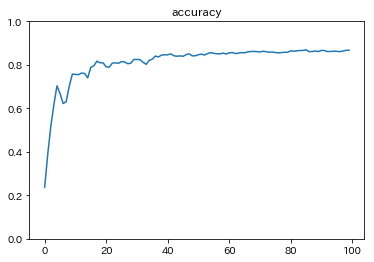

In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 100
batch_size = 100
plot_interval = 1

# -------------- ここを補填 ------------------------
x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.random_normal([784, 10], stddev=0.01))
b = tf.Variable(tf.zeros([10]))
# ------------------------------------------------------

y = tf.nn.softmax(tf.matmul(x, W) + b)

# 交差エントロピー
cross_entropy = -tf.reduce_sum(d * tf.log(y), reduction_indices=[1])
loss = tf.reduce_mean(cross_entropy)
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# 正誤を保存
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
# 正解率
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x: x_batch, d: d_batch})
    if (i+1) % plot_interval == 0:
        print(sess.run(correct, feed_dict={x: mnist.test.images, d: mnist.test.labels}))
        accuracy_val = sess.run(accuracy, feed_dict={x: mnist.test.images, d: mnist.test.labels})
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()        

In [39]:
x_batch[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [40]:
d_batch[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

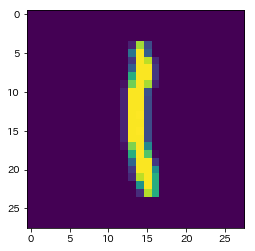

In [41]:
plt.imshow(x_batch[0].reshape(28, 28))

##### 分類3層 (mnist)
- パラメータ数（精度）と計算速度はトレードイフ
- 最適化手法の比較のタイミングは、繰り返し数の増加又は学習率の調整等で精度（正解率）が頭打ちになった段階

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
##### [try]
-  隠れ層のサイズを変更してみよう
-  optimizerを変更しよう<br>

tf.train.GradientDescentOptimizer<br>
`__init__(
    learning_rate,
    use_locking=False,
    name='GradientDescent'
)`

tf.train.MomentumOptimizer<br>
`__init__(
    learning_rate,
    momentum,
    use_locking=False,
    name='Momentum',
    use_nesterov=False
)`

tf.train.AdagradOptimizer<br>
`__init__(
    learning_rate,
    initial_accumulator_value=0.1,
    use_locking=False,
    name='Adagrad'
)`

tf.train.RMSPropOptimizer<br>
`__init__(
    learning_rate,
    decay=0.9,
    momentum=0.0,
    epsilon=1e-10,
    use_locking=False,
    centered=False,
    name='RMSProp'
)`

tf.train.AdamOptimizer<br>
`__init__(
    learning_rate=0.001,
    beta1=0.9,
    beta2=0.999,
    epsilon=1e-08,
    use_locking=False,
    name='Adam'
)`

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`hidden_layer_size_1`|$600$||
|`hidden_layer_size_2`|$300$||
|`optimizer`|Adam||
|`learning_rate`|$$1 \times 10^{-4}$$||

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.2643
Generation: 200. 正解率 = 0.3394
Generation: 300. 正解率 = 0.4877
Generation: 400. 正解率 = 0.5726
Generation: 500. 正解率 = 0.6402
Generation: 600. 正解率 = 0.6936
Generation: 700. 正解率 = 0.7274
Generation: 800. 正解率 = 0.7581
Generation: 900. 正解率 = 0.7803
Generation: 1000. 正解率 = 0.8027
Generation: 1100. 正解率 = 0.8188
Generation: 1200. 正解率 = 0.8335
Generation: 1300. 正解率 = 0.8433
Generation: 1400. 正解率 = 0.8525
Generation: 1500. 正解率 = 0.8582
Generation: 1600. 正解率 = 0.8643
Generation: 1700. 正解率 = 0.8676
Generation: 1800. 正解率 = 0.8732
Generation: 1900. 正解率 = 0.8767
Generation: 2000. 正解率 = 0.8813
Generation: 2100. 正解率 = 0.8853
Generation: 2200. 正解率 = 0.8878
Generation: 2300. 正解率 = 0.8901
Generation: 2400. 正解率 = 0.8915
Generation: 2500. 正解率 = 0.8947
Generation: 2600. 正解率 = 0.8974
Generatio

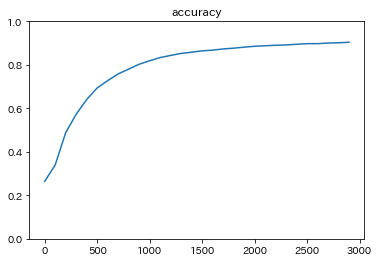

In [42]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600
hidden_layer_size_2 = 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


optimizer = tf.train.AdamOptimizer(learning_rate=1e-4)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`hidden_layer_size_1`|$1000$||
|`hidden_layer_size_2`|$500$||
|`optimizer`|Adam||
|`learning_rate`|$$1 \times 10^{-4}$$||

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.1934
Generation: 200. 正解率 = 0.4103
Generation: 300. 正解率 = 0.5173
Generation: 400. 正解率 = 0.6456
Generation: 500. 正解率 = 0.7192
Generation: 600. 正解率 = 0.7619
Generation: 700. 正解率 = 0.7947
Generation: 800. 正解率 = 0.8199
Generation: 900. 正解率 = 0.8333
Generation: 1000. 正解率 = 0.8477
Generation: 1100. 正解率 = 0.8587
Generation: 1200. 正解率 = 0.8684
Generation: 1300. 正解率 = 0.8729
Generation: 1400. 正解率 = 0.8785
Generation: 1500. 正解率 = 0.8826
Generation: 1600. 正解率 = 0.8859
Generation: 1700. 正解率 = 0.8905
Generation: 1800. 正解率 = 0.892
Generation: 1900. 正解率 = 0.8966
Generation: 2000. 正解率 = 0.9018
Generation: 2100. 正解率 = 0.9004
Generation: 2200. 正解率 = 0.9051
Generation: 2300. 正解率 = 0.9062
Generation: 2400. 正解率 = 0.906
Generation: 2500. 正解率 = 0.9083
Generation: 2600. 正解率 = 0.9086
Generation:

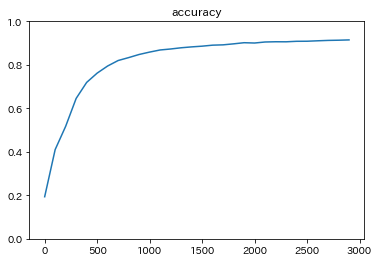

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 1000
hidden_layer_size_2 = 500

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


optimizer = tf.train.AdamOptimizer(learning_rate=1e-4)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`hidden_layer_size_1`|$300$||
|`hidden_layer_size_2`|$600$||
|`optimizer`|Adam||
|`learning_rate`|$$1 \times 10^{-4}$$||

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.1987
Generation: 200. 正解率 = 0.2141
Generation: 300. 正解率 = 0.428
Generation: 400. 正解率 = 0.5216
Generation: 500. 正解率 = 0.6062
Generation: 600. 正解率 = 0.6555
Generation: 700. 正解率 = 0.6922
Generation: 800. 正解率 = 0.7241
Generation: 900. 正解率 = 0.7548
Generation: 1000. 正解率 = 0.7676
Generation: 1100. 正解率 = 0.7961
Generation: 1200. 正解率 = 0.803
Generation: 1300. 正解率 = 0.8205
Generation: 1400. 正解率 = 0.8349
Generation: 1500. 正解率 = 0.8431
Generation: 1600. 正解率 = 0.8515
Generation: 1700. 正解率 = 0.8558
Generation: 1800. 正解率 = 0.8624
Generation: 1900. 正解率 = 0.867
Generation: 2000. 正解率 = 0.8713
Generation: 2100. 正解率 = 0.8756
Generation: 2200. 正解率 = 0.8799
Generation: 2300. 正解率 = 0.8822
Generation: 2400. 正解率 = 0.8861
Generation: 2500. 正解率 = 0.8864
Generation: 2600. 正解率 = 0.8902
Generation: 

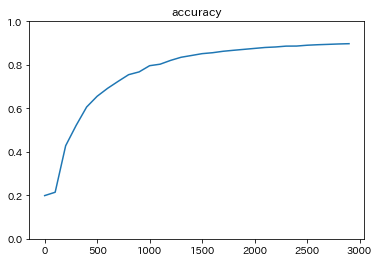

In [43]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 300
hidden_layer_size_2 = 600

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


optimizer = tf.train.AdamOptimizer(learning_rate=1e-4)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`hidden_layer_size_1`|$6$||
|`hidden_layer_size_2`|$3$||
|`optimizer`|Adam||
|`learning_rate`|$$1 \times 10^{-4}$$||

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.1032
Generation: 200. 正解率 = 0.1032
Generation: 300. 正解率 = 0.1032
Generation: 400. 正解率 = 0.1135
Generation: 500. 正解率 = 0.1135
Generation: 600. 正解率 = 0.1135
Generation: 700. 正解率 = 0.1135
Generation: 800. 正解率 = 0.1135
Generation: 900. 正解率 = 0.1135
Generation: 1000. 正解率 = 0.1135
Generation: 1100. 正解率 = 0.1135
Generation: 1200. 正解率 = 0.1135
Generation: 1300. 正解率 = 0.1135
Generation: 1400. 正解率 = 0.1135
Generation: 1500. 正解率 = 0.1135
Generation: 1600. 正解率 = 0.1135
Generation: 1700. 正解率 = 0.1135
Generation: 1800. 正解率 = 0.1135
Generation: 1900. 正解率 = 0.1135
Generation: 2000. 正解率 = 0.1135
Generation: 2100. 正解率 = 0.1135
Generation: 2200. 正解率 = 0.1489
Generation: 2300. 正解率 = 0.1732
Generation: 2400. 正解率 = 0.1765
Generation: 2500. 正解率 = 0.1846
Generation: 2600. 正解率 = 0.1877
Generatio

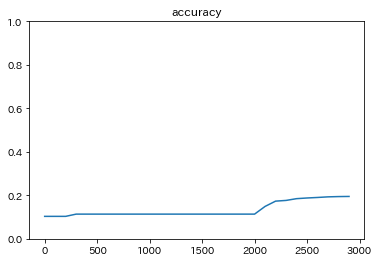

In [44]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 6
hidden_layer_size_2 = 3

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


optimizer = tf.train.AdamOptimizer(learning_rate=1e-4)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`hidden_layer_size_1`|$600$||
|`hidden_layer_size_2`|$300$||
|`optimizer`|勾配降下法（最急降下法）||
|`learning_rate`|$$1 \times 10^{-4}$$||

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.101
Generation: 200. 正解率 = 0.101
Generation: 300. 正解率 = 0.101
Generation: 400. 正解率 = 0.101
Generation: 500. 正解率 = 0.101
Generation: 600. 正解率 = 0.101
Generation: 700. 正解率 = 0.101
Generation: 800. 正解率 = 0.101
Generation: 900. 正解率 = 0.101
Generation: 1000. 正解率 = 0.101
Generation: 1100. 正解率 = 0.101
Generation: 1200. 正解率 = 0.101
Generation: 1300. 正解率 = 0.101
Generation: 1400. 正解率 = 0.101
Generation: 1500. 正解率 = 0.101
Generation: 1600. 正解率 = 0.1135
Generation: 1700. 正解率 = 0.1135
Generation: 1800. 正解率 = 0.1135
Generation: 1900. 正解率 = 0.1135
Generation: 2000. 正解率 = 0.1135
Generation: 2100. 正解率 = 0.1135
Generation: 2200. 正解率 = 0.1135
Generation: 2300. 正解率 = 0.1135
Generation: 2400. 正解率 = 0.1135
Generation: 2500. 正解率 = 0.1135
Generation: 2600. 正解率 = 0.1135
Generation: 2700. 正解率 = 

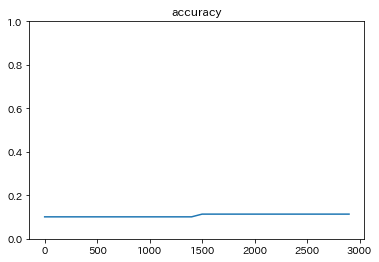

In [45]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600
hidden_layer_size_2 = 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-4)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`hidden_layer_size_1`|$600$||
|`hidden_layer_size_2`|$300$||
|`optimizer`|勾配降下法（最急降下法）||
|`learning_rate`|$0.5$||

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.1135
Generation: 200. 正解率 = 0.1338
Generation: 300. 正解率 = 0.1032
Generation: 400. 正解率 = 0.1973
Generation: 500. 正解率 = 0.2469
Generation: 600. 正解率 = 0.3823
Generation: 700. 正解率 = 0.5824
Generation: 800. 正解率 = 0.6604
Generation: 900. 正解率 = 0.7358
Generation: 1000. 正解率 = 0.7987
Generation: 1100. 正解率 = 0.8317
Generation: 1200. 正解率 = 0.8386
Generation: 1300. 正解率 = 0.8514
Generation: 1400. 正解率 = 0.8621
Generation: 1500. 正解率 = 0.8828
Generation: 1600. 正解率 = 0.8824
Generation: 1700. 正解率 = 0.8886
Generation: 1800. 正解率 = 0.8922
Generation: 1900. 正解率 = 0.8879
Generation: 2000. 正解率 = 0.8993
Generation: 2100. 正解率 = 0.9017
Generation: 2200. 正解率 = 0.9039
Generation: 2300. 正解率 = 0.9015
Generation: 2400. 正解率 = 0.9045
Generation: 2500. 正解率 = 0.9061
Generation: 2600. 正解率 = 0.9085
Generatio

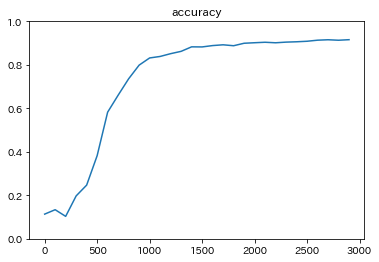

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600
hidden_layer_size_2 = 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`hidden_layer_size_1`|$600$||
|`hidden_layer_size_2`|$300$||
|`optimizer`|モーメンタム||
|`learning_rate`|$$1 \times 10^{-4}$$||
|`momentum`|$0.9$||

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.1032
Generation: 200. 正解率 = 0.1135
Generation: 300. 正解率 = 0.1135
Generation: 400. 正解率 = 0.1135
Generation: 500. 正解率 = 0.1135
Generation: 600. 正解率 = 0.1135
Generation: 700. 正解率 = 0.1135
Generation: 800. 正解率 = 0.1135
Generation: 900. 正解率 = 0.1135
Generation: 1000. 正解率 = 0.1135
Generation: 1100. 正解率 = 0.1135
Generation: 1200. 正解率 = 0.1135
Generation: 1300. 正解率 = 0.1135
Generation: 1400. 正解率 = 0.1135
Generation: 1500. 正解率 = 0.1135
Generation: 1600. 正解率 = 0.1135
Generation: 1700. 正解率 = 0.1135
Generation: 1800. 正解率 = 0.1135
Generation: 1900. 正解率 = 0.1135
Generation: 2000. 正解率 = 0.1135
Generation: 2100. 正解率 = 0.1135
Generation: 2200. 正解率 = 0.1135
Generation: 2300. 正解率 = 0.1135
Generation: 2400. 正解率 = 0.1135
Generation: 2500. 正解率 = 0.1135
Generation: 2600. 正解率 = 0.1135
Generatio

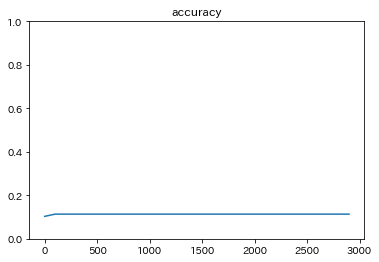

In [48]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600
hidden_layer_size_2 = 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


optimizer = tf.train.MomentumOptimizer(learning_rate=1e-4, momentum=0.9)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`hidden_layer_size_1`|$600$||
|`hidden_layer_size_2`|$300$||
|`optimizer`|モーメンタム||
|`learning_rate`|$0.1$||
|`momentum`|$0.9$||

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.0958
Generation: 200. 正解率 = 0.1618
Generation: 300. 正解率 = 0.4842
Generation: 400. 正解率 = 0.7277
Generation: 500. 正解率 = 0.8164
Generation: 600. 正解率 = 0.8476
Generation: 700. 正解率 = 0.8759
Generation: 800. 正解率 = 0.8837
Generation: 900. 正解率 = 0.8925
Generation: 1000. 正解率 = 0.8949
Generation: 1100. 正解率 = 0.9027
Generation: 1200. 正解率 = 0.9051
Generation: 1300. 正解率 = 0.9071
Generation: 1400. 正解率 = 0.9144
Generation: 1500. 正解率 = 0.9177
Generation: 1600. 正解率 = 0.918
Generation: 1700. 正解率 = 0.9226
Generation: 1800. 正解率 = 0.9237
Generation: 1900. 正解率 = 0.9302
Generation: 2000. 正解率 = 0.9301
Generation: 2100. 正解率 = 0.9334
Generation: 2200. 正解率 = 0.9316
Generation: 2300. 正解率 = 0.9316
Generation: 2400. 正解率 = 0.9363
Generation: 2500. 正解率 = 0.9326
Generation: 2600. 正解率 = 0.9408
Generation

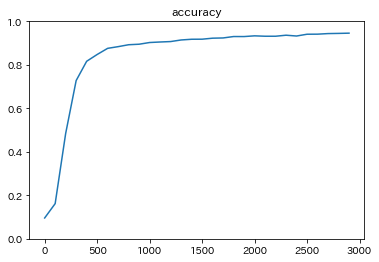

In [4]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600
hidden_layer_size_2 = 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


optimizer = tf.train.MomentumOptimizer(learning_rate=0.1, momentum=0.9)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`hidden_layer_size_1`|$600$||
|`hidden_layer_size_2`|$300$||
|`optimizer`|AdaGrad||
|`learning_rate`|$$1 \times 10^{-4}$$||

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.0958
Generation: 200. 正解率 = 0.0958
Generation: 300. 正解率 = 0.0958
Generation: 400. 正解率 = 0.1135
Generation: 500. 正解率 = 0.1135
Generation: 600. 正解率 = 0.1135
Generation: 700. 正解率 = 0.1135
Generation: 800. 正解率 = 0.1135
Generation: 900. 正解率 = 0.1135
Generation: 1000. 正解率 = 0.1135
Generation: 1100. 正解率 = 0.1135
Generation: 1200. 正解率 = 0.1135
Generation: 1300. 正解率 = 0.1135
Generation: 1400. 正解率 = 0.1135
Generation: 1500. 正解率 = 0.1135
Generation: 1600. 正解率 = 0.1135
Generation: 1700. 正解率 = 0.1135
Generation: 1800. 正解率 = 0.1135
Generation: 1900. 正解率 = 0.1135
Generation: 2000. 正解率 = 0.1135
Generation: 2100. 正解率 = 0.1135
Generation: 2200. 正解率 = 0.1135
Generation: 2300. 正解率 = 0.1135
Generation: 2400. 正解率 = 0.1135
Generation: 2500. 正解率 = 0.1135
Generation: 2600. 正解率 = 0.1135
Generatio

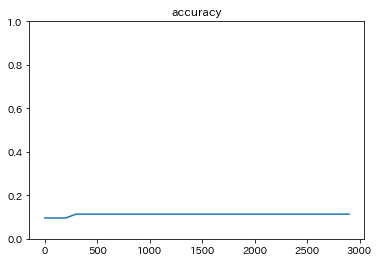

In [49]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600
hidden_layer_size_2 = 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


optimizer = tf.train.AdagradOptimizer(learning_rate=1e-4)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`hidden_layer_size_1`|$600$||
|`hidden_layer_size_2`|$300$||
|`optimizer`|AdaGrad||
|`learning_rate`|$0.1$||

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.101
Generation: 200. 正解率 = 0.1032
Generation: 300. 正解率 = 0.1135
Generation: 400. 正解率 = 0.1135
Generation: 500. 正解率 = 0.2049
Generation: 600. 正解率 = 0.2812
Generation: 700. 正解率 = 0.3918
Generation: 800. 正解率 = 0.4577
Generation: 900. 正解率 = 0.5496
Generation: 1000. 正解率 = 0.6361
Generation: 1100. 正解率 = 0.7082
Generation: 1200. 正解率 = 0.729
Generation: 1300. 正解率 = 0.7769
Generation: 1400. 正解率 = 0.7981
Generation: 1500. 正解率 = 0.8211
Generation: 1600. 正解率 = 0.8308
Generation: 1700. 正解率 = 0.8413
Generation: 1800. 正解率 = 0.8478
Generation: 1900. 正解率 = 0.8555
Generation: 2000. 正解率 = 0.8617
Generation: 2100. 正解率 = 0.8603
Generation: 2200. 正解率 = 0.8683
Generation: 2300. 正解率 = 0.875
Generation: 2400. 正解率 = 0.879
Generation: 2500. 正解率 = 0.8821
Generation: 2600. 正解率 = 0.8858
Generation: 2

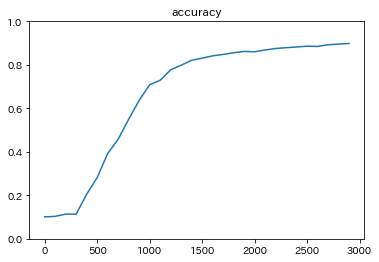

In [5]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600
hidden_layer_size_2 = 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


optimizer = tf.train.AdagradOptimizer(learning_rate=0.1)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`hidden_layer_size_1`|$600$||
|`hidden_layer_size_2`|$300$||
|`optimizer`|RMSProp||
|`learning_rate`|$$1 \times 10^{-4}$$||

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.0974
Generation: 200. 正解率 = 0.1135
Generation: 300. 正解率 = 0.1135
Generation: 400. 正解率 = 0.405
Generation: 500. 正解率 = 0.3336
Generation: 600. 正解率 = 0.3847
Generation: 700. 正解率 = 0.4847
Generation: 800. 正解率 = 0.5538
Generation: 900. 正解率 = 0.6425
Generation: 1000. 正解率 = 0.6636
Generation: 1100. 正解率 = 0.6982
Generation: 1200. 正解率 = 0.7187
Generation: 1300. 正解率 = 0.743
Generation: 1400. 正解率 = 0.7554
Generation: 1500. 正解率 = 0.7727
Generation: 1600. 正解率 = 0.7988
Generation: 1700. 正解率 = 0.8071
Generation: 1800. 正解率 = 0.8166
Generation: 1900. 正解率 = 0.83
Generation: 2000. 正解率 = 0.8383
Generation: 2100. 正解率 = 0.8433
Generation: 2200. 正解率 = 0.8525
Generation: 2300. 正解率 = 0.8578
Generation: 2400. 正解率 = 0.863
Generation: 2500. 正解率 = 0.8666
Generation: 2600. 正解率 = 0.872
Generation: 270

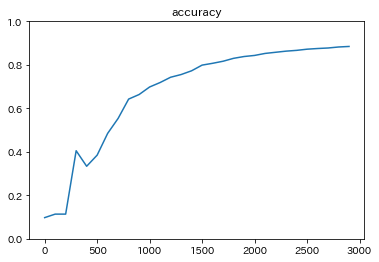

In [50]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600
hidden_layer_size_2 = 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


optimizer = tf.train.RMSPropOptimizer(learning_rate=1e-4)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`hidden_layer_size_1`|$600$||
|`hidden_layer_size_2`|$300$||
|`optimizer`|RMSProp||
|`learning_rate`|$0.01$||

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.1135
Generation: 200. 正解率 = 0.2973
Generation: 300. 正解率 = 0.9143
Generation: 400. 正解率 = 0.9321
Generation: 500. 正解率 = 0.947
Generation: 600. 正解率 = 0.9496
Generation: 700. 正解率 = 0.9588
Generation: 800. 正解率 = 0.9561
Generation: 900. 正解率 = 0.9589
Generation: 1000. 正解率 = 0.9595
Generation: 1100. 正解率 = 0.9641
Generation: 1200. 正解率 = 0.9698
Generation: 1300. 正解率 = 0.9676
Generation: 1400. 正解率 = 0.9676
Generation: 1500. 正解率 = 0.9652
Generation: 1600. 正解率 = 0.9704
Generation: 1700. 正解率 = 0.9671
Generation: 1800. 正解率 = 0.9717
Generation: 1900. 正解率 = 0.098
Generation: 2000. 正解率 = 0.098
Generation: 2100. 正解率 = 0.098
Generation: 2200. 正解率 = 0.098
Generation: 2300. 正解率 = 0.098
Generation: 2400. 正解率 = 0.098
Generation: 2500. 正解率 = 0.098
Generation: 2600. 正解率 = 0.098
Generation: 2700. 

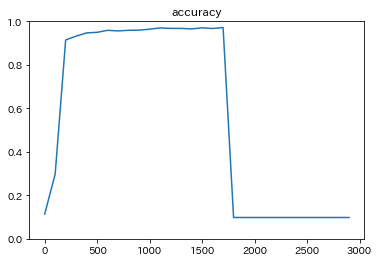

In [7]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600
hidden_layer_size_2 = 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


optimizer = tf.train.RMSPropOptimizer(learning_rate=0.01)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`hidden_layer_size_1`|$600$||
|`hidden_layer_size_2`|$300$||
|`optimizer`|Adam||
|`learning_rate`|$0.001$||

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.7354
Generation: 200. 正解率 = 0.873
Generation: 300. 正解率 = 0.8986
Generation: 400. 正解率 = 0.913
Generation: 500. 正解率 = 0.9224
Generation: 600. 正解率 = 0.9268
Generation: 700. 正解率 = 0.93
Generation: 800. 正解率 = 0.9398
Generation: 900. 正解率 = 0.9407
Generation: 1000. 正解率 = 0.944
Generation: 1100. 正解率 = 0.9473
Generation: 1200. 正解率 = 0.9504
Generation: 1300. 正解率 = 0.9517
Generation: 1400. 正解率 = 0.9548
Generation: 1500. 正解率 = 0.9573
Generation: 1600. 正解率 = 0.9571
Generation: 1700. 正解率 = 0.9602
Generation: 1800. 正解率 = 0.9612
Generation: 1900. 正解率 = 0.9638
Generation: 2000. 正解率 = 0.9645
Generation: 2100. 正解率 = 0.9634
Generation: 2200. 正解率 = 0.9657
Generation: 2300. 正解率 = 0.9661
Generation: 2400. 正解率 = 0.9675
Generation: 2500. 正解率 = 0.9698
Generation: 2600. 正解率 = 0.9695
Generation: 27

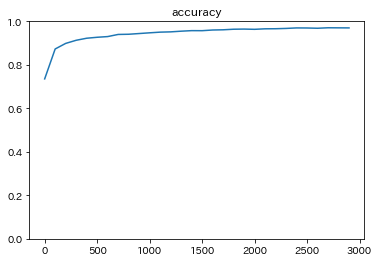

In [51]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600
hidden_layer_size_2 = 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


optimizer = tf.train.AdamOptimizer(learning_rate=0.001)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()

##### 分類CNN (mnist)
conv - relu - pool - conv - relu - pool - <br>
affin - relu - dropout - affin - softmax<br>

- ドロップアウトした方が汎化性能が上がることがある

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###### [try]
-  ドロップアウト率を0に変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`dropout_rate`|$0.5$||

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 10. 正解率 = 0.26
Generation: 20. 正解率 = 0.44
Generation: 30. 正解率 = 0.64
Generation: 40. 正解率 = 0.75
Generation: 50. 正解率 = 0.76
Generation: 60. 正解率 = 0.77
Generation: 70. 正解率 = 0.81
Generation: 80. 正解率 = 0.84
Generation: 90. 正解率 = 0.84
Generation: 100. 正解率 = 0.86
Generation: 110. 正解率 = 0.92
Generation: 120. 正解率 = 0.87
Generation: 130. 正解率 = 0.9
Generation: 140. 正解率 = 0.87
Generation: 150. 正解率 = 0.9
Generation: 160. 正解率 = 0.9
Generation: 170. 正解率 = 0.87
Generation: 180. 正解率 = 0.9
Generation: 190. 正解率 = 0.94
Generation: 200. 正解率 = 0.94
Generation: 210. 正解率 = 0.96
Generation: 220. 正解率 = 0.95
Generation: 230. 正解率 = 0.91
Generation: 240. 正解率 = 0.92
Generation: 250. 正解率 = 0.91
Generation: 260. 正解率 = 0.95
Generation: 270. 正解率 = 0.95
Generation: 280. 正解率 = 0.91
Generation: 290. 正解率 = 0.94
Generat

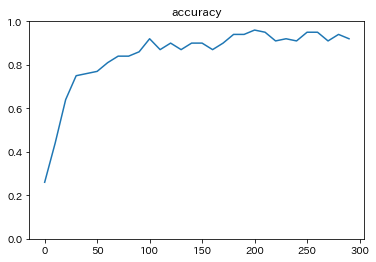

In [8]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import matplotlib.pyplot as plt

iters_num = 300
batch_size = 100
plot_interval = 10

dropout_rate = 0.5

# placeholder
x = tf.placeholder(tf.float32, shape=[None, 784])
d = tf.placeholder(tf.float32, shape=[None, 10])

# 画像を784の一次元から28x28の二次元に変換する
# 画像を28x28にreshape
x_image = tf.reshape(x, [-1,28,28,1])

# 第一層のweightsとbiasのvariable
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32]))

# 第一層のconvolutionalとpool
# strides[0] = strides[3] = 1固定
h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)
# プーリングサイズ n*n にしたい場合 ksize=[1, n, n, 1]
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 第二層
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))
h_conv2 = tf.nn.relu(tf.nn.conv2d(h_pool1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)
h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 第一層と第二層でreduceされてできた特徴に対してrelu
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]))
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 出来上がったものに対してSoftmax
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))
y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

# 交差エントロピー
loss = -tf.reduce_sum(d * tf.log(y_conv))

train = tf.train.AdamOptimizer(1e-4).minimize(loss)

correct = tf.equal(tf.argmax(y_conv,1), tf.argmax(d,1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x: x_batch, d: d_batch, keep_prob: 1-dropout_rate})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:x_batch, d: d_batch, keep_prob: 1.0})
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`dropout_rate`|$0.0$||

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 10. 正解率 = 0.39
Generation: 20. 正解率 = 0.6
Generation: 30. 正解率 = 0.71
Generation: 40. 正解率 = 0.76
Generation: 50. 正解率 = 0.77
Generation: 60. 正解率 = 0.85
Generation: 70. 正解率 = 0.88
Generation: 80. 正解率 = 0.89
Generation: 90. 正解率 = 0.88
Generation: 100. 正解率 = 0.96
Generation: 110. 正解率 = 0.93
Generation: 120. 正解率 = 0.96
Generation: 130. 正解率 = 0.95
Generation: 140. 正解率 = 0.95
Generation: 150. 正解率 = 0.94
Generation: 160. 正解率 = 0.94
Generation: 170. 正解率 = 0.94
Generation: 180. 正解率 = 0.93
Generation: 190. 正解率 = 0.89
Generation: 200. 正解率 = 0.95
Generation: 210. 正解率 = 0.9
Generation: 220. 正解率 = 0.93
Generation: 230. 正解率 = 0.95
Generation: 240. 正解率 = 0.94
Generation: 250. 正解率 = 1.0
Generation: 260. 正解率 = 0.93
Generation: 270. 正解率 = 0.93
Generation: 280. 正解率 = 0.93
Generation: 290. 正解率 = 0.92
Genera

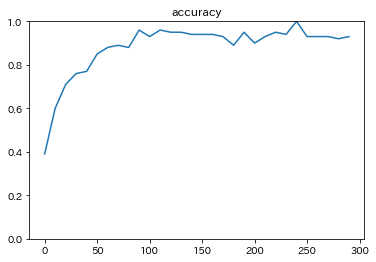

In [9]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import matplotlib.pyplot as plt

iters_num = 300
batch_size = 100
plot_interval = 10

dropout_rate = 0.0

# placeholder
x = tf.placeholder(tf.float32, shape=[None, 784])
d = tf.placeholder(tf.float32, shape=[None, 10])

# 画像を784の一次元から28x28の二次元に変換する
# 画像を28x28にreshape
x_image = tf.reshape(x, [-1,28,28,1])

# 第一層のweightsとbiasのvariable
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32]))

# 第一層のconvolutionalとpool
# strides[0] = strides[3] = 1固定
h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)
# プーリングサイズ n*n にしたい場合 ksize=[1, n, n, 1]
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 第二層
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))
h_conv2 = tf.nn.relu(tf.nn.conv2d(h_pool1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)
h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 第一層と第二層でreduceされてできた特徴に対してrelu
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]))
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 出来上がったものに対してSoftmax
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))
y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

# 交差エントロピー
loss = -tf.reduce_sum(d * tf.log(y_conv))

train = tf.train.AdamOptimizer(1e-4).minimize(loss)

correct = tf.equal(tf.argmax(y_conv,1), tf.argmax(d,1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x: x_batch, d: d_batch, keep_prob: 1-dropout_rate})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:x_batch, d: d_batch, keep_prob: 1.0})
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()

#### Keras
- TensorFlowのラッパーのライブラリ
- CNNのネットワークをより簡単に記述できる
- 柔軟なところには対応できない
- ニューラルネットワーク版scikit-learnのようなもの（私見）

##### 線形回帰

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Generation: 10. 誤差 = 3.1271162
Generation: 20. 誤差 = 2.159853
Generation: 30. 誤差 = 1.5050992
Generation: 40. 誤差 = 1.060117
Generation: 50. 誤差 = 0.75617355
Generation: 60. 誤差 = 0.54725754
Generation: 70. 誤差 = 0.4025409
Generation: 80. 誤差 = 0.30134687
Generation: 90. 誤差 = 0.2297877
Generation: 100. 誤差 = 0.17851883
Generation: 110. 誤差 = 0.1412377
Generation: 120. 誤差 = 0.11368104
Generation: 130. 誤差 = 0.09295349
Generation: 140. 誤差 = 0.07707973
Generation: 150. 誤差 = 0.06470371
Generation: 160. 誤差 = 0.054887652
Generation: 170. 誤差 = 0.046976976
Generation: 180. 誤差 = 0.040509976
Generation: 190. 誤差 = 0.03515662
Generation: 200. 誤差 = 0.030677687
Generation: 210. 誤差 = 0.026896

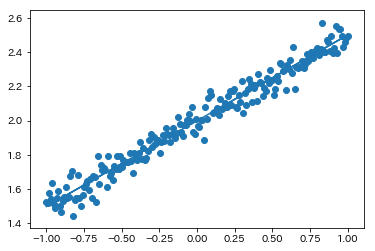

In [2]:
import numpy as np
import matplotlib.pyplot as plt

iters_num = 1000
plot_interval = 10

x = np.linspace(-1, 1, 200)
np.random.shuffle(x)
d = 0.5 * x + 2 + np.random.normal(0, 0.05, (200,))

from keras.models import Sequential
from keras.layers import Dense

# モデルを作成
model = Sequential()
model.add(Dense(input_dim=1, output_dim=1))  # Dense: 全結合層

# モデルを表示
model.summary()

# モデルのコンパイル
model.compile(loss='mse', optimizer='sgd')  # mse: 二乗誤差、sgd: 確率的勾配降下法

# train
for i in range(iters_num):
    loss = model.train_on_batch(x, d)
    if (i+1) % plot_interval == 0:
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss))

W, b = model.layers[0].get_weights()
print('W:', W)
print('b:', b)

y = model.predict(x)
plt.scatter(x, d)
plt.plot(x, y)
plt.show()

In [3]:
np.linspace(-1, 1, 200)

array([-1.        , -0.98994975, -0.9798995 , -0.96984925, -0.95979899,
       -0.94974874, -0.93969849, -0.92964824, -0.91959799, -0.90954774,
       -0.89949749, -0.88944724, -0.87939698, -0.86934673, -0.85929648,
       -0.84924623, -0.83919598, -0.82914573, -0.81909548, -0.80904523,
       -0.79899497, -0.78894472, -0.77889447, -0.76884422, -0.75879397,
       -0.74874372, -0.73869347, -0.72864322, -0.71859296, -0.70854271,
       -0.69849246, -0.68844221, -0.67839196, -0.66834171, -0.65829146,
       -0.64824121, -0.63819095, -0.6281407 , -0.61809045, -0.6080402 ,
       -0.59798995, -0.5879397 , -0.57788945, -0.5678392 , -0.55778894,
       -0.54773869, -0.53768844, -0.52763819, -0.51758794, -0.50753769,
       -0.49748744, -0.48743719, -0.47738693, -0.46733668, -0.45728643,
       -0.44723618, -0.43718593, -0.42713568, -0.41708543, -0.40703518,
       -0.39698492, -0.38693467, -0.37688442, -0.36683417, -0.35678392,
       -0.34673367, -0.33668342, -0.32663317, -0.31658291, -0.30

##### 単純パーセプトロン 
OR回路

- XOR回路のような線形分離不可能なものには使えない
- バッチサイズを大きくすると計算速度が向上する
    - バッチサイズは一般には$16,38,64,128$といった偶数を想定する

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###### [try]
-  np.random.seed(0)をnp.random.seed(1)に変更
-  エポック数を100に変更
-  AND回路, XOR回路に変更
-  OR回路にしてバッチサイズを10に変更
-  エポック数を300に変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`seed`|$0$||
|`epochs`|$30$||
|`T`|$\begin{array}{cccc}0&1&1&1\end{array}$|OR回路|
|`batch_size`|$1$||

In [4]:
# モジュール読み込み
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# 乱数を固定値で初期化
np.random.seed(seed=0)

# シグモイドの単純パーセプトロン作成
model = Sequential()
model.add(Dense(input_dim=2, units=1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))  # 二値交差エントロピー、確率的勾配降下法
 
# トレーニング用入力 X と正解データ T
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
T = np.array( [[0], [1], [1], [1]] )
 
# トレーニング
model.fit(X, T, epochs=30, batch_size=1)  # 合計120回のバッチのトレーニング
 
# トレーニングの入力を流用して実際に分類
Y = model.predict_classes(X, batch_size=1)

print("TEST")
print(Y == T)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
4/4 [==============================] - 2s 382ms/step - loss: 0.4352
Epoch 2/30
4/4 [==============================] - 0s 6ms/step - loss: 0.4204
Epoch 3/30
4/4 [==============================] - 0s 4ms/step - loss: 0.4079
Epoch 4/30
4/4 [==============================] - 0s 8ms/step - loss: 0.3971
Epoch 5/30
4/4 [==============================] - 0s 8ms/step - loss: 0.3876
Epoch 6/30
4/4 [==============================] - 0s 7ms/step - loss: 0.3790
Epoch 7/30
4/4 [==============================] - 0s 10ms/step - loss: 0.3717
Ep

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`seed`|$1$||
|`epochs`|$30$||
|`T`|$\begin{array}{cccc}0&1&1&1\end{array}$|OR回路|
|`batch_size`|$1$||

In [5]:
# モジュール読み込み
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# 乱数を固定値で初期化
np.random.seed(seed=1)

# シグモイドの単純パーセプトロン作成
model = Sequential()
model.add(Dense(input_dim=2, units=1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
 
# トレーニング用入力 X と正解データ T
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
T = np.array( [[0], [1], [1], [1]] )
 
# トレーニング
model.fit(X, T, epochs=30, batch_size=1)
 
# トレーニングの入力を流用して実際に分類
Y = model.predict_classes(X, batch_size=1)

print("TEST")
print(Y == T)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
4/4 [==============================] - 1s 166ms/step - loss: 0.4976
Epoch 2/30
4/4 [==============================] - 0s 5ms/step - loss: 0.4734
Epoch 3/30
4/4 [==============================] - 0s 5ms/step - loss: 0.4528
Epoch 4/30
4/4 [==============================] - 0s 3ms/step - loss: 0.4364
Epoch 5/30
4/4 [==============================] - 0s 4ms/step - loss: 0.4231
Epoch 6/30
4/4 [==============================] - 0s 9ms/step - loss: 0.4115
Epoch 7/30
4/4 [==============================] - 0s 17ms/step - loss: 0.4016
Ep

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`seed`|$0$||
|`epochs`|$100$||
|`T`|$\begin{array}{cccc}0&1&1&1\end{array}$|OR回路|
|`batch_size`|$1$||

In [6]:
# モジュール読み込み
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# 乱数を固定値で初期化
np.random.seed(seed=0)

# シグモイドの単純パーセプトロン作成
model = Sequential()
model.add(Dense(input_dim=2, units=1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
 
# トレーニング用入力 X と正解データ T
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
T = np.array( [[0], [1], [1], [1]] )
 
# トレーニング
model.fit(X, T, epochs=100, batch_size=1)
 
# トレーニングの入力を流用して実際に分類
Y = model.predict_classes(X, batch_size=1)

print("TEST")
print(Y == T)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
4/4 [==============================] - 1s 198ms/step - loss: 0.4352
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4204
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.4079
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.3971
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3876
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.3790
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.3

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`seed`|$0$||
|`epochs`|$30$||
|`T`|$\begin{array}{cccc}0&0&0&1\end{array}$|AND回路|
|`batch_size`|$1$||

In [7]:
# モジュール読み込み
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# 乱数を固定値で初期化
np.random.seed(seed=0)

# シグモイドの単純パーセプトロン作成
model = Sequential()
model.add(Dense(input_dim=2, units=1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
 
# トレーニング用入力 X と正解データ T
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
T = np.array( [[0], [0], [0], [1]] )
 
# トレーニング
model.fit(X, T, epochs=30, batch_size=1)
 
# トレーニングの入力を流用して実際に分類
Y = model.predict_classes(X, batch_size=1)

print("TEST")
print(Y == T)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
4/4 [==============================] - 1s 227ms/step - loss: 0.8084
Epoch 2/30
4/4 [==============================] - 0s 3ms/step - loss: 0.7406
Epoch 3/30
4/4 [==============================] - 0s 6ms/step - loss: 0.6849
Epoch 4/30
4/4 [==============================] - 0s 3ms/step - loss: 0.6409
Epoch 5/30
4/4 [==============================] - 0s 6ms/step - loss: 0.6056
Epoch 6/30
4/4 [==============================] - 0s 3ms/step - loss: 0.5781
Epoch 7/30
4/4 [==============================] - 0s 5ms/step - loss: 0.5573
Epo

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`seed`|$0$||
|`epochs`|$30$||
|`T`|$\begin{array}{cccc}0&1&1&0\end{array}$|XOR回路|
|`batch_size`|$1$||

In [8]:
# モジュール読み込み
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# 乱数を固定値で初期化
np.random.seed(seed=0)

# シグモイドの単純パーセプトロン作成
model = Sequential()
model.add(Dense(input_dim=2, units=1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
 
# トレーニング用入力 X と正解データ T
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
T = np.array( [[0], [1], [1], [0]] )
 
# トレーニング
model.fit(X, T, epochs=30, batch_size=1)
 
# トレーニングの入力を流用して実際に分類
Y = model.predict_classes(X, batch_size=1)

print("TEST")
print(Y == T)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_5 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
4/4 [==============================] - 1s 252ms/step - loss: 0.8427
Epoch 2/30
4/4 [==============================] - 0s 7ms/step - loss: 0.8205
Epoch 3/30
4/4 [==============================] - 0s 16ms/step - loss: 0.8049
Epoch 4/30
4/4 [==============================] - 0s 4ms/step - loss: 0.7924
Epoch 5/30
4/4 [==============================] - 0s 6ms/step - loss: 0.7822
Epoch 6/30
4/4 [==============================] - 0s 4ms/step - loss: 0.7754
Epoch 7/30
4/4 [==============================] - 0s 6ms/step - loss: 0.7688
Ep

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`seed`|$0$||
|`epochs`|$30$||
|`T`|$\begin{array}{cccc}0&1&1&1\end{array}$|OR回路|
|`batch_size`|$10$||

In [9]:
# モジュール読み込み
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# 乱数を固定値で初期化
np.random.seed(seed=0)

# シグモイドの単純パーセプトロン作成
model = Sequential()
model.add(Dense(input_dim=2, units=1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
 
# トレーニング用入力 X と正解データ T
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
T = np.array( [[0], [1], [1], [1]] )
 
# トレーニング
model.fit(X, T, epochs=30, batch_size=1)
 
# トレーニングの入力を流用して実際に分類
Y = model.predict_classes(X, batch_size=10)

print("TEST")
print(Y == T)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_6 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
4/4 [==============================] - 1s 228ms/step - loss: 0.4352
Epoch 2/30
4/4 [==============================] - 0s 4ms/step - loss: 0.4204
Epoch 3/30
4/4 [==============================] - 0s 4ms/step - loss: 0.4079
Epoch 4/30
4/4 [==============================] - 0s 7ms/step - loss: 0.3971
Epoch 5/30
4/4 [==============================] - 0s 4ms/step - loss: 0.3876
Epoch 6/30
4/4 [==============================] - 0s 4ms/step - loss: 0.3790
Epoch 7/30
4/4 [==============================] - 0s 6ms/step - loss: 0.3717
Epo

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`seed`|$0$||
|`epochs`|$300$||
|`T`|$\begin{array}{cccc}0&1&1&1\end{array}$|OR回路|
|`batch_size`|$10$||

In [10]:
# モジュール読み込み
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# 乱数を固定値で初期化
np.random.seed(seed=0)

# シグモイドの単純パーセプトロン作成
model = Sequential()
model.add(Dense(input_dim=2, units=1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
 
# トレーニング用入力 X と正解データ T
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
T = np.array( [[0], [1], [1], [1]] )
 
# トレーニング
model.fit(X, T, epochs=300, batch_size=1)
 
# トレーニングの入力を流用して実際に分類
Y = model.predict_classes(X, batch_size=10)

print("TEST")
print(Y == T)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_7 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
4/4 [==============================] - 1s 257ms/step - loss: 0.4352
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 0.4204
Epoch 3/300
4/4 [==============================] - 0s 4ms/step - loss: 0.4079
Epoch 4/300
4/4 [==============================] - 0s 8ms/step - loss: 0.3971
Epoch 5/300
4/4 [==============================] - 0s 6ms/step - loss: 0.3876
Epoch 6/300
4/4 [==============================] - 0s 4ms/step - loss: 0.3790
Epoch 7/300
4/4 [==============================] - 0s 5ms/step - loss: 0.3

4/4 [==============================] - 0s 6ms/step - loss: 0.1019
Epoch 199/300
4/4 [==============================] - 0s 5ms/step - loss: 0.1015
Epoch 200/300
4/4 [==============================] - 0s 6ms/step - loss: 0.1011
Epoch 201/300
4/4 [==============================] - ETA: 0s - loss: 0.077 - 0s 5ms/step - loss: 0.1007
Epoch 202/300
4/4 [==============================] - 0s 6ms/step - loss: 0.1003
Epoch 203/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0999
Epoch 204/300
4/4 [==============================] - 0s 5ms/step - loss: 0.0995
Epoch 205/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0991
Epoch 206/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0987
Epoch 207/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0984
Epoch 208/300
4/4 [==============================] - 0s 5ms/step - loss: 0.0980
Epoch 209/300
4/4 [==============================] - 0s 4ms/step - loss: 0.0976
Epoch 210/300
4/4 [===========

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`seed`|$0$||
|`epochs`|$300$||
|`T`|$\begin{array}{cccc}0&1&1&1\end{array}$|OR回路|
|`batch_size`|$1$||

In [11]:
# モジュール読み込み
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# 乱数を固定値で初期化
np.random.seed(seed=0)

# シグモイドの単純パーセプトロン作成
model = Sequential()
model.add(Dense(input_dim=2, units=1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))

# トレーニング用入力 X と正解データ T
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
T = np.array( [[0], [1], [1], [1]] )
 
# トレーニング
model.fit(X, T, epochs=300, batch_size=1)
 
# トレーニングの入力を流用して実際に分類
Y = model.predict_classes(X, batch_size=10)

print("TEST")
print(Y == T)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_8 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
4/4 [==============================] - 1s 268ms/step - loss: 0.4352
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 0.4204
Epoch 3/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4079
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 0.3971
Epoch 5/300
4/4 [==============================] - 0s 6ms/step - loss: 0.3876
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 0.3790
Epoch 7/300
4/4 [==============================] - 0s 5ms/step - loss: 0.3

4/4 [==============================] - 0s 6ms/step - loss: 0.1023
Epoch 198/300
4/4 [==============================] - 0s 5ms/step - loss: 0.1019
Epoch 199/300
4/4 [==============================] - 0s 5ms/step - loss: 0.1015
Epoch 200/300
4/4 [==============================] - 0s 6ms/step - loss: 0.1011
Epoch 201/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1007
Epoch 202/300
4/4 [==============================] - 0s 7ms/step - loss: 0.1003
Epoch 203/300
4/4 [==============================] - 0s 5ms/step - loss: 0.0999
Epoch 204/300
4/4 [==============================] - 0s 5ms/step - loss: 0.0995
Epoch 205/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0991
Epoch 206/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0987
Epoch 207/300
4/4 [==============================] - 0s 4ms/step - loss: 0.0984
Epoch 208/300
4/4 [==============================] - 0s 4ms/step - loss: 0.0980
Epoch 209/300
4/4 [==============================] - 0

##### 分類 (iris)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###### [try]
-  中間層の活性関数をsigmoidに変更しよう
-  SGDをimportしoptimizerをSGD(lr=0.1)に変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|中間層の活性関数|ReLU||
|学習率|$0.01$||

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                60        
_________________________________________________________________
activation_1 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 39        
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________
Train on 120 samples, validate on 30 samples
Epoch 1/20
120/120 [==============================] - 1s 5ms/step - loss: 0.9998 - acc: 0.5000 - val_loss: 0.7505 - val_acc: 0.5667
Epoch 2/20
120/120 [==============================] - 0s 625us/step - loss: 0.6645 - acc: 0.7250 - va

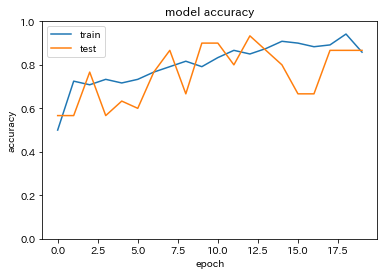

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
d = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, d_train, d_test = train_test_split(x, d, test_size=0.2)

from keras.models import Sequential
from keras.layers import Dense, Activation
# from keras.optimizers import SGD

#モデルの設定
model = Sequential()
model.add(Dense(12, input_dim=4))
model.add(Activation('relu'))
# model.add(Activation('sigmoid'))
model.add(Dense(3, input_dim=12))
model.add(Activation('softmax'))
model.summary()

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, d_train, batch_size=5, epochs=20, verbose=1, validation_data=(x_test, d_test))
loss = model.evaluate(x_test, d_test, verbose=0)

#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1.0)
plt.show()


In [3]:
iris.target_names, iris.feature_names

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [4]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
d

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|中間層の活性関数|sigmoid||
|学習率|$0.01$||

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                60        
_________________________________________________________________
activation_3 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 39        
_________________________________________________________________
activation_4 (Activation)    (None, 3)                 0         
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________
Train on 120 samples, validate on 30 samples
Epoch 1/20
120/120 [==============================] - 1s 6ms/step - loss: 1.2595 - acc: 0.3083 - val_loss: 1.1302 - val_acc: 0.3000
Epoch 2/20
120/120 [==============================] - 0s 942us/step - loss: 1.1251 - acc: 0.3417 - va

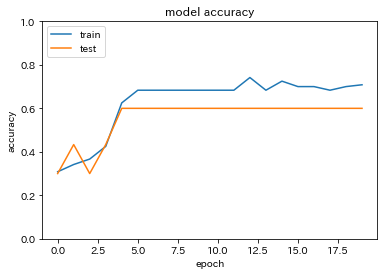

In [6]:
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
d = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, d_train, d_test = train_test_split(x, d, test_size=0.2)

from keras.models import Sequential
from keras.layers import Dense, Activation
# from keras.optimizers import SGD

#モデルの設定
model = Sequential()
model.add(Dense(12, input_dim=4))
# model.add(Activation('relu'))
model.add(Activation('sigmoid'))
model.add(Dense(3, input_dim=12))
model.add(Activation('softmax'))
model.summary()

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, d_train, batch_size=5, epochs=20, verbose=1, validation_data=(x_test, d_test))
loss = model.evaluate(x_test, d_test, verbose=0)

#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1.0)
plt.show()


<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|中間層の活性関数|ReLU||
|学習率|$0.1$||

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 12)                60        
_________________________________________________________________
activation_5 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 39        
_________________________________________________________________
activation_6 (Activation)    (None, 3)                 0         
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________
Train on 120 samples, validate on 30 samples
Epoch 1/20
120/120 [==============================] - 1s 6ms/step - loss: 1.0164 - acc: 0.5750 - val_loss: 0.8560 - val_acc: 0.6000
Epoch 2/20
120/120 [==============================] - 0s 708us/step - loss: 0.5196 - acc: 0.7083 - va

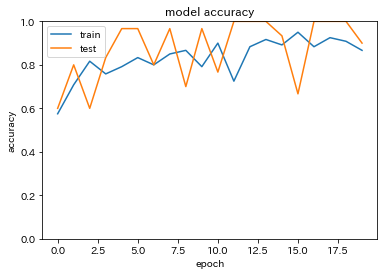

In [7]:
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
d = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, d_train, d_test = train_test_split(x, d, test_size=0.2)

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

#モデルの設定
model = Sequential()
model.add(Dense(12, input_dim=4))
model.add(Activation('relu'))
# model.add(Activation('sigmoid'))
model.add(Dense(3, input_dim=12))
model.add(Activation('softmax'))
model.summary()

# model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=SGD(lr=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, d_train, batch_size=5, epochs=20, verbose=1, validation_data=(x_test, d_test))
loss = model.evaluate(x_test, d_test, verbose=0)

#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1.0)
plt.show()


<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|中間層の活性関数|sigmoid||
|学習率|$0.1$||

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12)                60        
_________________________________________________________________
activation_7 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 39        
_________________________________________________________________
activation_8 (Activation)    (None, 3)                 0         
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________
Train on 120 samples, validate on 30 samples
Epoch 1/20
120/120 [==============================] - 1s 6ms/step - loss: 1.1458 - acc: 0.3333 - val_loss: 1.0804 - val_acc: 0.3333
Epoch 2/20
120/120 [==============================] - 0s 725us/step - loss: 1.0621 - acc: 0.4333 - va

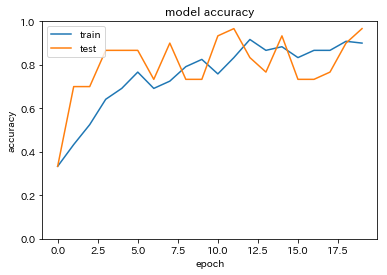

In [8]:
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
d = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, d_train, d_test = train_test_split(x, d, test_size=0.2)

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

#モデルの設定
model = Sequential()
model.add(Dense(12, input_dim=4))
# model.add(Activation('relu'))
model.add(Activation('sigmoid'))
model.add(Dense(3, input_dim=12))
model.add(Activation('softmax'))
model.summary()

# model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=SGD(lr=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, d_train, batch_size=5, epochs=20, verbose=1, validation_data=(x_test, d_test))
loss = model.evaluate(x_test, d_test, verbose=0)

#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1.0)
plt.show()


##### 分類 (mnist)
- ministデータセットは、配布ファイル「../data/mnist.pkl」から
- $784$から$512,512,10$という3層のニューラルネットワーク
- 誤差関数はラベルがone-hotベクトルの場合「categorical_crossentropy」を、そうでない場合「sparse_categorical_crossentropy」を使う
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###### [try]
-  load_mnistのone_hot_labelをFalseに変更しよう (error)
-  誤差関数をsparse_categorical_crossentropyに変更しよう
-  Adamの引数の値を変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`one_hot_label`|True|`load_mnist`の引数|
|`loss`|categorical_crossentropy||
|`lr`|$0.001$|`Adam`の引数|
|`beta_1`|$0.9$|`Adam`の引数|
|`beta_2`|$0.999$|`Adam`の引数|
|`epsilon`|None|`Adam`の引数|
|`decay`|$0.0$|`Adam`の引数|
|`amsgrad`|False|`Adam`の引数|

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 49s 812us/step - loss: 0.252

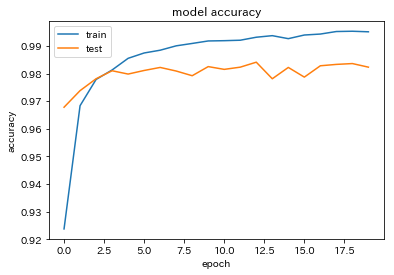

In [2]:
# 必要なライブラリのインポート
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import keras
import matplotlib.pyplot as plt
from data.mnist import load_mnist

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

# 必要なライブラリのインポート、最適化手法はAdamを使う
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# モデル作成
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

# バッチサイズ、エポック数
batch_size = 128
epochs = 20

model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), 
              metrics=['accuracy'])

try:
    history = model.fit(x_train, d_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, d_test))
except ValueError as error:
    import sys
    print(str(error), file=sys.stderr)
    sys.exit(1)

loss = model.evaluate(x_test, d_test, verbose=0)
print('Test loss:', loss[0])
print('Test accuracy:', loss[1])
#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(0, 1.0)
plt.show()

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`one_hot_label`|False|`load_mnist`の引数|
|`loss`|categorical_crossentropy||
|`lr`|$0.001$|`Adam`の引数|
|`beta_1`|$0.9$|`Adam`の引数|
|`beta_2`|$0.999$|`Adam`の引数|
|`epsilon`|None|`Adam`の引数|
|`decay`|$0.0$|`Adam`の引数|
|`amsgrad`|False|`Adam`の引数|

In [3]:
# 必要なライブラリのインポート
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import keras
import matplotlib.pyplot as plt
from data.mnist import load_mnist

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=False)

# 必要なライブラリのインポート、最適化手法はAdamを使う
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# モデル作成
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

# バッチサイズ、エポック数
batch_size = 128
epochs = 20

model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), 
              metrics=['accuracy'])

try:
    history = model.fit(x_train, d_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, d_test))
except ValueError as error:
    import sys
    print(str(error), file=sys.stderr)
    sys.exit(1)
    
loss = model.evaluate(x_test, d_test, verbose=0)
print('Test loss:', loss[0])
print('Test accuracy:', loss[1])
#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(0, 1.0)
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Error when checking target: expected dense_6 to have shape (10,) but got array with shape (1,)


SystemExit: 1

<hr />

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|`one_hot_label`|False|`load_mnist`の引数|
|`loss`|sparse_categorical_crossentropy||
|`lr`|$0.1$|`Adam`の引数|
|`beta_1`|$0.9$|`Adam`の引数|
|`beta_2`|$0.999$|`Adam`の引数|
|`epsilon`|None|`Adam`の引数|
|`decay`|$0.0$|`Adam`の引数|
|`amsgrad`|False|`Adam`の引数|

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 37s 618us/step - loss: 0.254

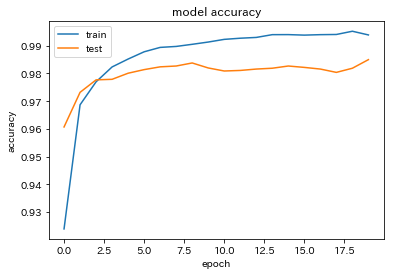

In [5]:
# 必要なライブラリのインポート
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import keras
import matplotlib.pyplot as plt
from data.mnist import load_mnist

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=False)

# 必要なライブラリのインポート、最適化手法はAdamを使う
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# モデル作成
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

# バッチサイズ、エポック数
batch_size = 128
epochs = 20

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), 
              metrics=['accuracy'])

try:
    history = model.fit(x_train, d_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, d_test))
except ValueError as error:
    import sys
    print(str(error), file=sys.stderr)
    sys.exit(1)
    
loss = model.evaluate(x_test, d_test, verbose=0)
print('Test loss:', loss[0])
print('Test accuracy:', loss[1])
#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(0, 1.0)
plt.show()

##### CNN分類 (mnist)
- 実行に時間がかかるため割愛

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
__________

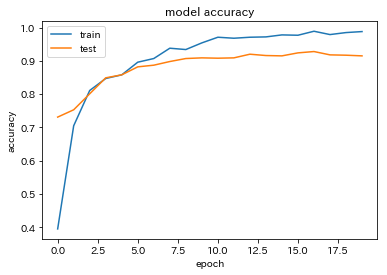

In [6]:
# 必要なライブラリのインポート
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import keras
import matplotlib.pyplot as plt
from data.mnist import load_mnist

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)
#
x_train, d_train, x_test, d_test = x_train[:1000], d_train[:1000], x_test[:1000], d_test[:1000]

# 行列として入力するための加工
batch_size = 128
num_classes = 10
epochs = 3 #20

img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)


# 必要なライブラリのインポート、最適化手法はAdamを使う
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# バッチサイズ、エポック数
batch_size = 128
epochs = 20

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(x_train, d_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, d_test))

#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(0, 1.0)
plt.show()

##### cifar10
- 実行に時間がかかるため割愛

データセット cifar10<br>
32x32ピクセルのカラー画像データ<br>
10種のラベル「飛行機、自動車、鳥、猫、鹿、犬、蛙、馬、船、トラック」<br>
トレーニングデータ数:50000, テストデータ数:10000<br>
http://www.cs.toronto.edu/~kriz/cifar.html

In [2]:
#CIFAR-10のデータセットのインポート
from keras.datasets import cifar10
(x_train, d_train), (x_test, d_test) = cifar10.load_data()

Using TensorFlow backend.


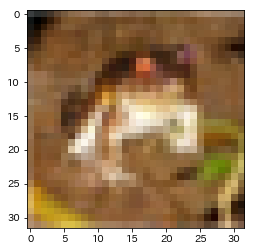

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

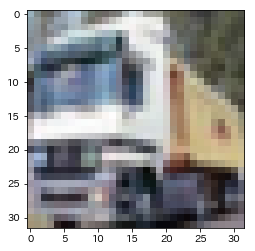

In [6]:
plt.imshow(x_train[1])

In [8]:
#CIFAR-10のデータセットのインポート
from keras.datasets import cifar10
(x_train, d_train), (x_test, d_test) = cifar10.load_data()
#
x_train, d_train, x_test, d_test = x_train[:1000], d_train[:1000], x_test[:1000], d_test[:1000]

#CIFAR-10の正規化
from keras.utils import to_categorical
  
# 特徴量の正規化
x_train = x_train/255.
x_test = x_test/255.
 
# クラスラベルの1-hotベクトル化
d_train = to_categorical(d_train, 10)
d_test = to_categorical(d_test, 10)
 
# CNNの構築
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
import numpy as np
 
model = Sequential()
 
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
 
# コンパイル
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
 
#訓練
history = model.fit(x_train, d_train, epochs=3, validation_data=(x_test, d_test))
 
# モデルの保存
model.save('./CIFAR-10.h5')
 
#評価 & 評価結果出力
print(model.evaluate(x_test, d_test))

Train on 1000 samples, validate on 1000 samples
Epoch 1/3
1000/1000 [==============================] - 24s 24ms/step - loss: 2.2999 - acc: 0.1030 - val_loss: 2.2277 - val_acc: 0.1940
Epoch 2/3
1000/1000 [==============================] - 23s 23ms/step - loss: 2.1624 - acc: 0.1900 - val_loss: 2.0776 - val_acc: 0.2130
Epoch 3/3
1000/1000 [==============================] - 5s 5ms/step
[1.946311203956604, 0.296]


In [9]:
# 保存したモデルを呼び出して使用
model.load_weights('./CIFAR-10.h5')
print(model.evaluate(x_test, d_test))

1000/1000 [==============================] - 5s 5ms/step
[1.946311203956604, 0.296]


In [11]:
#汎化性能を上げる為、バッチ正規化を適用

#CIFAR-10のデータセットのインポート
from keras.datasets import cifar10
(x_train, d_train), (x_test, d_test) = cifar10.load_data()
#
x_train, d_train, x_test, d_test = x_train[:1000], d_train[:1000], x_test[:1000], d_test[:1000]

#CIFAR-10の正規化
from keras.utils import to_categorical
  
# 特徴量の正規化
x_train = x_train/255.
x_test = x_test/255.
 
# クラスラベルの1-hotベクトル化
d_train = to_categorical(d_train, 10)
d_test = to_categorical(d_test, 10)
 
# CNNの構築
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
import numpy as np
 
model = Sequential()
 
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
 
# コンパイル
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
 
#訓練
history = model.fit(x_train, d_train, epochs=3, validation_data=(x_test, d_test))
 
# モデルの保存
model.save('./CIFAR-10.h5')
 
#評価 & 評価結果出力
print(model.evaluate(x_test, d_test))

Train on 1000 samples, validate on 1000 samples
Epoch 1/3
1000/1000 [==============================] - 41s 41ms/step - loss: 2.5075 - acc: 0.2110 - val_loss: 2.2724 - val_acc: 0.2900
Epoch 2/3
1000/1000 [==============================] - 38s 38ms/step - loss: 1.8859 - acc: 0.3810 - val_loss: 2.7234 - val_acc: 0.2620
Epoch 3/3
1000/1000 [==============================] - 8s 8ms/step
[1.930987871170044, 0.395]


##### RNN

2進数足し算の予測

Keras RNNのドキュメント
https://keras.io/ja/layers/recurrent/#simplernn

- ユニット数（出力ノード数）を大きくするだけで高い汎化性能を得られる
    - 但し学習の速さとトレードオフ
- `unroll`オプションを`True`にすると、RNNのネットワークが展開され、メモリ集中傾向になるが計算速度が向上する
    - 短い時系列に適している
- 学習の速さ$$\text{SimpleRNN}>\text{GRU}>\text{LSTM}$$

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###### [try]
-  RNNの出力ノード数を128に変更
-  RNNの出力活性化関数を sigmoid に変更
-  RNNの出力活性化関数を tanh に変更
-  最適化方法をadamに変更
-  RNNの入力 Dropout を0.5に設定
-  RNNの再帰 Dropout を0.3に設定
-  RNNのunrollをTrueに設定

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [12]:
# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

In [14]:
# a_int[0] + b_int[0] = d_int[0]
a_int[0], b_int[0], d_int[0]

(126, 18, 144)

In [15]:
# 2進数
a_bin[0], b_bin[0], d_bin[0]

(array([0, 1, 1, 1, 1, 1, 1, 0], dtype=uint8),
 array([0, 1, 0, 0, 1, 0, 0, 0], dtype=uint8),
 array([0, 0, 0, 0, 1, 0, 0, 1], dtype=uint8))

<hr />

- SimpleRNN

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|出力ノード数|$16$||
|出力活性化関数|ReLU||
|最適化方法|確率的勾配降下法||
|RNNの入力 Dropout|||
|RNNの再帰 Dropout|||
|RNNのunroll|||
|`epochs`|$5$||

In [16]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(SimpleRNN(units=16,
               return_sequences=True,
               input_shape=[8, 2],
               go_backwards=False,
               activation='relu',
               # dropout=0.5,
               # recurrent_dropout=0.3,
               # unroll = True,
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2)

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 8, 16)             304       
_________________________________________________________________
dense_7 (Dense)              (None, 8, 1)              17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
10000/10000 [==============================] - 47s 5ms/step - loss: 0.0853 - acc: 0.9110
Epoch 2/5
10000/10000 [==============================] - 44s 4ms/step - loss: 0.0037 - acc: 1.0000
Epoch 3/5
10000/10000 [==============================] - 45s 5ms/step - loss: 0.0012 - acc: 1.0000
Epoch 4/5
10000/10000 [==============================] - 47s 5ms/step - loss: 6.7753e-04 - acc: 1.0000
Epoch 5/5
10000/10000 [==============================] - 38s 4ms/step - loss: 4.6222e-04 - acc: 1.0000
Test loss: 0.0003923216321291287
Test

<hr />

- SimpleRNN

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|出力ノード数|$128$||
|出力活性化関数|ReLU||
|最適化方法|確率的勾配降下法||
|RNNの入力 Dropout|||
|RNNの再帰 Dropout|||
|RNNのunroll|||
|`epochs`|$5$||

In [17]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(SimpleRNN(units=128,
               return_sequences=True,
               input_shape=[8, 2],
               go_backwards=False,
               activation='relu',
               # dropout=0.5,
               # recurrent_dropout=0.3,
               # unroll = True,
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2)

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 8, 128)            16768     
_________________________________________________________________
dense_8 (Dense)              (None, 8, 1)              129       
Total params: 16,897
Trainable params: 16,897
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
10000/10000 [==============================] - 111s 11ms/step - loss: 0.0774 - acc: 0.9172
Epoch 2/5
10000/10000 [==============================] - 100s 10ms/step - loss: 0.0020 - acc: 1.0000
Epoch 3/5
10000/10000 [==============================] - 103s 10ms/step - loss: 6.9739e-04 - acc: 1.0000
Epoch 4/5
10000/10000 [==============================] - 108s 11ms/step - loss: 4.0638e-04 - acc: 1.0000
Epoch 5/5
10000/10000 [==============================] - 106s 11ms/step - loss: 2.8147e-04 - acc: 1.00001s - lo - ETA: 0s 

<hr />

- SimpleRNN

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|出力ノード数|$16$||
|出力活性化関数|sigmoid||
|最適化方法|確率的勾配降下法||
|RNNの入力 Dropout|||
|RNNの再帰 Dropout|||
|RNNのunroll|||
|`epochs`|$5$||

In [18]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(SimpleRNN(units=16,
               return_sequences=True,
               input_shape=[8, 2],
               go_backwards=False,
               activation='sigmoid',
               # dropout=0.5,
               # recurrent_dropout=0.3,
               # unroll = True,
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2)

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 8, 16)             304       
_________________________________________________________________
dense_9 (Dense)              (None, 8, 1)              17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
10000/10000 [==============================] - 43s 4ms/step - loss: 0.2503 - acc: 0.5032
Epoch 2/5
10000/10000 [==============================] - 44s 4ms/step - loss: 0.2491 - acc: 0.5254
Epoch 3/5
10000/10000 [==============================] - 38s 4ms/step - loss: 0.2477 - acc: 0.5440
Epoch 4/5
10000/10000 [==============================] - 30s 3ms/step - loss: 0.2444 - acc: 0.5887
Epoch 5/5
10000/10000 [==============================] - 37s 4ms/step - loss: 0.2163 - acc: 0.7136
Test loss: 0.1590989083334832
Test accuracy: 

<hr />

- SimpleRNN

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|出力ノード数|$16$||
|出力活性化関数|tanh||
|最適化方法|確率的勾配降下法||
|RNNの入力 Dropout|||
|RNNの再帰 Dropout|||
|RNNのunroll|||
|`epochs`|$5$||

In [20]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(SimpleRNN(units=16,
               return_sequences=True,
               input_shape=[8, 2],
               go_backwards=False,
               activation='tanh',
               # dropout=0.5,
               # recurrent_dropout=0.3,
               # unroll = True,
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2, validation_data=(x_bin_test, d_bin_test.reshape(-1, 8, 1)))

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 8, 16)             304       
_________________________________________________________________
dense_11 (Dense)             (None, 8, 1)              17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Train on 10000 samples, validate on 9999 samples
Epoch 1/5
10000/10000 [==============================] - 51s 5ms/step - loss: 0.1066 - acc: 0.8454 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 2/5
10000/10000 [==============================] - 55s 5ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 7.0221e-04 - val_acc: 1.0000
Epoch 3/5
10000/10000 [==============================] - 47s 5ms/step - loss: 5.1415e-04 - acc: 1.0000 - val_loss: 3.8190e-04 - val_acc: 1.0000
Epoch 4/5
10000/10000 [==============================] - 51s 5ms/step -

<hr />

- SimpleRNN

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|出力ノード数|$16$||
|出力活性化関数|ReLU||
|最適化方法|adam||
|RNNの入力 Dropout|||
|RNNの再帰 Dropout|||
|RNNのunroll|||
|`epochs`|$5$||

In [21]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(SimpleRNN(units=16,
               return_sequences=True,
               input_shape=[8, 2],
               go_backwards=False,
               activation='relu',
               # dropout=0.5,
               # recurrent_dropout=0.3,
               # unroll = True,
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2, validation_data=(x_bin_test, d_bin_test.reshape(-1, 8, 1)))

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 8, 16)             304       
_________________________________________________________________
dense_12 (Dense)             (None, 8, 1)              17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Train on 10000 samples, validate on 9999 samples
Epoch 1/5
10000/10000 [==============================] - 63s 6ms/step - loss: 0.0879 - acc: 0.9072 - val_loss: 0.0052 - val_acc: 1.0000
Epoch 2/5
10000/10000 [==============================] - 53s 5ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 1.7439e-04 - val_acc: 1.0000
Epoch 3/5
10000/10000 [==============================] - 53s 5ms/step - loss: 5.7501e-05 - acc: 1.0000 - val_loss: 9.9786e-06 - val_acc: 1.0000
Epoch 4/5
10000/10000 [==============================] - 49s 5ms/step -

<hr />

- SimpleRNN

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|出力ノード数|$16$||
|出力活性化関数|ReLU||
|最適化方法|確率的勾配降下法||
|RNNの入力 Dropout|$0.5$||
|RNNの再帰 Dropout|||
|RNNのunroll|||
|`epochs`|$5$||

In [22]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(SimpleRNN(units=16,
               return_sequences=True,
               input_shape=[8, 2],
               go_backwards=False,
               activation='relu',
               dropout=0.5,
               # recurrent_dropout=0.3,
               # unroll = True,
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2, validation_data=(x_bin_test, d_bin_test.reshape(-1, 8, 1)))

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 8, 16)             304       
_________________________________________________________________
dense_13 (Dense)             (None, 8, 1)              17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Train on 10000 samples, validate on 9999 samples
Epoch 1/5
10000/10000 [==============================] - 62s 6ms/step - loss: 0.2446 - acc: 0.5516 - val_loss: 0.2245 - val_acc: 0.7207
Epoch 2/5
10000/10000 [==============================] - 49s 5ms/step - loss: 0.2286 - acc: 0.6028 - val_loss: 0.1938 - val_acc: 0.7607
Epoch 3/5
10000/10000 [==============================] - 52s 5ms/step - loss: 0.2141 - acc: 0.6259 - val_loss: 0.1651 - val_acc: 0.8596
Epoch 4/5
10000/10000 [==============================] - 52s 5ms/step - loss: 0.209

<hr />

- SimpleRNN

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|出力ノード数|$16$||
|出力活性化関数|ReLU||
|最適化方法|確率的勾配降下法||
|RNNの入力 Dropout|||
|RNNの再帰 Dropout|$0.3$||
|RNNのunroll|||
|`epochs`|$5$||

In [23]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(SimpleRNN(units=16,
               return_sequences=True,
               input_shape=[8, 2],
               go_backwards=False,
               activation='relu',
               # dropout=0.5,
               recurrent_dropout=0.3,
               # unroll = True,
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2, validation_data=(x_bin_test, d_bin_test.reshape(-1, 8, 1)))

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_8 (SimpleRNN)     (None, 8, 16)             304       
_________________________________________________________________
dense_14 (Dense)             (None, 8, 1)              17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Train on 10000 samples, validate on 9999 samples
Epoch 1/5
10000/10000 [==============================] - 59s 6ms/step - loss: 0.1527 - acc: 0.8155 - val_loss: 0.0911 - val_acc: 0.9217
Epoch 2/5
10000/10000 [==============================] - 54s 5ms/step - loss: 0.0976 - acc: 0.9016 - val_loss: 0.0907 - val_acc: 0.9069
Epoch 3/5
10000/10000 [==============================] - 52s 5ms/step - loss: 0.0937 - acc: 0.9053 - val_loss: 0.0858 - val_acc: 0.9121
Epoch 4/5
10000/10000 [==============================] - 50s 5ms/step - loss: 0.093

<hr />

- SimpleRNN

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|出力ノード数|$16$||
|出力活性化関数|ReLU||
|最適化方法|確率的勾配降下法||
|RNNの入力 Dropout|||
|RNNの再帰 Dropout|||
|RNNのunroll|True||
|`epochs`|$5$||

In [24]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(SimpleRNN(units=16,
               return_sequences=True,
               input_shape=[8, 2],
               go_backwards=False,
               activation='relu',
               # dropout=0.5,
               # recurrent_dropout=0.3,
               unroll = True,
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2, validation_data=(x_bin_test, d_bin_test.reshape(-1, 8, 1)))

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_9 (SimpleRNN)     (None, 8, 16)             304       
_________________________________________________________________
dense_15 (Dense)             (None, 8, 1)              17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Train on 10000 samples, validate on 9999 samples
Epoch 1/5
10000/10000 [==============================] - 42s 4ms/step - loss: 0.0704 - acc: 0.9252 - val_loss: 0.0061 - val_acc: 1.0000
Epoch 2/5
10000/10000 [==============================] - 37s 4ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 3/5
10000/10000 [==============================] - 39s 4ms/step - loss: 9.2440e-04 - acc: 1.0000 - val_loss: 6.6211e-04 - val_acc: 1.0000
Epoch 4/5
10000/10000 [==============================] - 43s 4ms/step - los

<hr />

- SimpleRNN

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|出力ノード数|$16$||
|出力活性化関数|ReLU||
|最適化方法|確率的勾配降下法||
|RNNの入力 Dropout|$0.5$||
|RNNの再帰 Dropout|$0.3$||
|RNNのunroll|True||
|`epochs`|$5$||

In [2]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(SimpleRNN(units=16,
               return_sequences=True,
               input_shape=[8, 2],
               go_backwards=False,
               activation='relu',
               dropout=0.5,
               recurrent_dropout=0.3,
               unroll = True,
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2, validation_data=(x_bin_test, d_bin_test.reshape(-1, 8, 1)))

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 8, 16)             304       
_________________________________________________________________
dense_1 (Dense)              (None, 8, 1)              17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Train on 10000 samples, validate on 9999 samples
Epoch 1/5
10000/10000 [==============================] - 36s 4ms/step - loss: 0.2455 - acc: 0.5518 - val_loss: 0.2318 - val_acc: 0.6423
Epoch 2/5
10000/10000 [==============================] - 33s 3ms/step - loss: 0.2379 - acc: 0.5773 - val_loss: 0.2112 - val_acc: 0.7708
Epoch 3/5
10000/10000 [==============================] - 31s 3ms/step - loss: 0.2311 - acc: 0.5931 - val_loss: 0.2170 - val_acc: 0.7527
Epoch 4/5
10000/10000 [==============================] - 32s 3ms/step - loss: 0.223

<hr />

- GRU

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|出力ノード数|$16$||
|出力活性化関数|||
|最適化方法|確率的勾配降下法||
|RNNの入力 Dropout|||
|RNNの再帰 Dropout|||
|RNNのunroll|||
|`epochs`|$5$||

In [3]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(GRU(units=16,
               return_sequences=True,
               input_shape=[8, 2],
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2, validation_data=(x_bin_test, d_bin_test.reshape(-1, 8, 1)))

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 8, 16)             912       
_________________________________________________________________
dense_2 (Dense)              (None, 8, 1)              17        
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________
Train on 10000 samples, validate on 9999 samples
Epoch 1/5
10000/10000 [==============================] - 105s 11ms/step - loss: 0.2450 - acc: 0.5532 - val_loss: 0.2342 - val_acc: 0.6541
Epoch 2/5
10000/10000 [==============================] - 83s 8ms/step - loss: 0.1050 - acc: 0.8716 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 3/5
10000/10000 [==============================] - 73s 7ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 6.0352e-04 - val_acc: 1.0000
Epoch 4/5
10000/10000 [==============================] - 70s 7ms/step - loss:

<hr />

- LSTM

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|出力ノード数|$16$||
|出力活性化関数|||
|最適化方法|確率的勾配降下法||
|RNNの入力 Dropout|||
|RNNの再帰 Dropout|||
|RNNのunroll|||
|`epochs`|$5$|`Epoch 4/5`の途中で強制終了|

In [4]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(LSTM(units=16,
               return_sequences=True,
               input_shape=[8, 2],
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2, validation_data=(x_bin_test, d_bin_test.reshape(-1, 8, 1)))

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 8, 16)             1216      
_________________________________________________________________
dense_3 (Dense)              (None, 8, 1)              17        
Total params: 1,233
Trainable params: 1,233
Non-trainable params: 0
_________________________________________________________________
Train on 10000 samples, validate on 9999 samples
Epoch 1/5
10000/10000 [==============================] - 111s 11ms/step - loss: 0.2483 - acc: 0.4989 - val_loss: 0.2449 - val_acc: 0.5365
Epoch 2/5
10000/10000 [==============================] - 103s 10ms/step - loss: 0.2241 - acc: 0.6410 - val_loss: 0.1853 - val_acc: 0.7416
Epoch 3/5
10000/10000 [==============================] - 98s 10ms/step - loss: 0.1214 - acc: 0.8750 - val_loss: 0.0807 - val_acc: 0.9233
Epoch 4/5
 7530/10000 [=====================>........] - ETA: 25s - loss: 

<hr />

- LSTM

|ハイパーパラメータ|値|備考|
|:--|--:|:--|
|出力ノード数|$16$||
|出力活性化関数|||
|最適化方法|確率的勾配降下法||
|RNNの入力 Dropout|||
|RNNの再帰 Dropout|||
|RNNのunroll|||
|`epochs`|$3$||

In [5]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(LSTM(units=16,
               return_sequences=True,
               input_shape=[8, 2],
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=3, batch_size=2, validation_data=(x_bin_test, d_bin_test.reshape(-1, 8, 1)))

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 8, 16)             1216      
_________________________________________________________________
dense_4 (Dense)              (None, 8, 1)              17        
Total params: 1,233
Trainable params: 1,233
Non-trainable params: 0
_________________________________________________________________
Train on 10000 samples, validate on 9999 samples
Epoch 1/3
10000/10000 [==============================] - 122s 12ms/step - loss: 0.2482 - acc: 0.4839 - val_loss: 0.2460 - val_acc: 0.6105 0.2483 - ac - ETA: 6s - loss: 0.2483 - ac - ETA: 6s - loss: 0.2483 - - ETA: 2s - ETA: 0s - loss: 0.248
Epoch 2/3
10000/10000 [==============================] - 114s 11ms/step - loss: 0.2311 - acc: 0.6293 - val_loss: 0.2045 - val_acc: 0.7124
Epoch 3/3
10000/10000 [==============================] - 108s 11ms/step - loss: 0.1678 - acc: 0.7961 - val_l

### 確認テスト考察
- 問1. VGG、GoogleLeNet、ResNetの特徴をそれぞれ簡潔に述べよ。
- 答1. 
    - VGGは2014年のモデルで、その特徴は、畳み込み層・畳み込み層・最大値プーリング層といった単純な構成のネットワークだが、GoogleLeNetやResNetと比較してパラメータ数が多いこと。
    - GoogleLeNetの特徴は、Inceptionモジュールの使用である。中でも$1 \times 1$の畳み込みを使った次元削減や、様々なフィルターサイズを使うことによるスパースのようなもの。
    - ResNetの特徴は、Skip Connection（恒等写像）を用いて残差（入力値と出力値の差分）を学習することによって、階層を深くすることで起こる勾配消失問題を克服したこと。

### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|Guido van Rossum（鴨澤眞夫訳）|Pythonチュートリアル 第3版|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ❷ ―自然言語処理編|オライリー・ジャパン|2018年|
|Antonio Gulli, Sujit Pal（大串正矢訳） |直感 Deep Learning ―Python×Kerasでアイデアを形にするレシピ|オライリー・ジャパン|2018年|
|寺田学, 辻真吾, 鈴木たかのり, 福島真太朗|Pythonによるあたらしいデータ分析の教科書|翔泳社|2018年|

## Section2 : 強化学習
- 長期的に「報酬」を最大化できるように、或る特定の「環境」の中で「行動」を選択できる「エージェント」を作ることを目的とする機械学習の一分野
    - 行動の結果として与えられる報酬を基に、行動を決定する原理を改善していく仕組み
- 例
    - マーケティング
        - **環境**: 会社の販売促進部
        - **エージェント**: 購入履歴等の顧客情報に基づいて、キャンペーンメールを送信する顧客を決めるソフトウェア
        - **行動**: 顧客毎に送信か非送信かを選択
        - **報酬**: キャンペーンコストという負の報酬と、キャンペーンで生み出されると推測される売上という正の報酬を受ける
- 探索と利用のトレードオフ
    - 強化学習に於ける学習とは、不完全な知識を基に行動しながらデータを集めていき、最適な行動を見つけていくこと<br />$\Longrightarrow$「探索と利用のトレードオフ」が発生する
    - 既知の最適な行動データを利用してばかり<br />$\Longrightarrow$探索ができていない状態
    - 未知の行動データを探索してばかり<br />$\Longrightarrow$利用ができていない状態
    - 探索ができていない状態と利用ができていない状態を回避することが重要
- 強化学習のイメージ
    - エージェントがある方策$\mathbf{n}$を実施して行動$\mathbf{a}$をとったとき、状態$\mathbf{s}$となって、それを観測し、その状態$\mathbf{s}$に於ける報酬価値$\mathbf{v}$を受け取るというのが一連の流れ
    $$
    \begin{array}{ccc}
        \mathbf{n} & \longrightarrow & \mathbf{s} \\
        \mathbf{v} & \longleftarrow & \mathbf{s} \\
    \end{array}
    $$
        - 左辺: エージェント
        - 右辺: 環境
        - $\mathbf{n}$は方策関数$$\mathrm{n}(\mathbf{s},\mathbf{a})$$に、$\mathbf{v}$は行動価値関数$$\mathrm{Q}(\mathbf{s},\mathbf{a})$$などで表わすことができる
- 強化学習の差分
    - 強化学習と通常の教師あり学習・教師なし学習との最大の違いは学習の「目標」である
        - 通常の教師あり学習・教師なし学習は、データに含まれるパターンを見つけ出すこと（パターン認識）が学習の目標
        - 強化学習は、優れた方策行動を見つけ出すことが学習の目標
- 強化学習の歴史
    - 計算機の処理性能の向上に従って、より大規模な状態$\mathbf{s}$を持つ場合の強化学習が可能になっていった
    - 「関数近似法」と、「Q学習」とを組み合わせる手法の登場
        - Q学習: 行動価値関数$\mathrm{Q}(\cdot)$を、行動$\mathbf{a}$する毎に更新することにより学習を進める方法
        - 関数近似法: 価値関数や方策関数$\mathrm{n}(\cdot)$を関数近似する手法
- 行動価値関数
    - 価値関数には、状態価値関数と行動価値関数の2種類がある
        - 状態価値関数: 状態$\mathbf{s}$の価値に注目$$\mathrm{v}(\mathbf{s})$$
        - 行動価値関数: 状態$\mathbf{s}$と行動$\mathbf{a}$を組み合わせた価値に注目$$\mathrm{Q}(\mathbf{s},\mathbf{a})$$
- 方策関数
    - 方策ベースの強化学習手法に於いて、或る状態$\mathbf{s}$でどのような行動$\mathbf{a}$をとるのかの確率を与える関数
- 方策勾配法$$\theta^{(t+1)}=\theta^{(t)}+\epsilon \nabla \jmath (\theta)$$
    - 方策を再帰的に更新していく手法
    - $t+1$回目に於いては、$t$回目のものと学習率$\epsilon$で定義した方策との加算で次の値を構成していく
    - $\jmath$は方策の良さ<br />$\Longrightarrow$定義しなければならない
        - 定義方法
            - 平均報酬: 行動$\mathbf{a}$をとったときに生じる価値の全部の平均
            - 割引報酬和: いわゆる減衰というものを使った方法で、直近の報酬に1番重みづけをする
        - 前項の定義に対応して、行動価値関数$\mathrm{Q}(\cdot)$の定義を行い、方策勾配定理$$\nabla_{0} \jmath (\theta)=\mathbb{E}_{\pi_{0}}\left[\left(\nabla_{0} \log \pi_{0} (\mathbf{a} \mid \mathbf{s})Q^{\pi}(\mathbf{s},\mathbf{a})\right)\right]$$が成り立つ
            - この定理は、状態価値関数$$\mathrm{v}^{\pi}(\mathbf{s})=\sum_{\mathbf{a}}\pi (\mathbf{a} \mid \mathbf{s}) Q^{\pi}(\mathbf{s},\mathbf{a})$$とベルマン方程式$$\mathrm{Q}^{\pi}(\mathbf{s},\mathbf{a})=\sum_{\mathbf{s}'}P(\mathbf{s}' \mid \mathbf{s},\mathbf{a})\left[\gamma (\mathbf{s},\mathbf{a},\mathbf{s}')+\gamma \mathrm{V}^{\pi}(\mathbf{s}')\right]$$の2式より対数微分法を用いて導出される
- GAN（敵対的生成ネットワーク）
    - DCGAN
        - 実際に存在しない寝室等の画像を出力できる
        - 他のGANと比較して性能が良い
        - うまく潜在空間でベクトルとして表現したものから生成器（Generator）の部分の画像を生成するので、人の顔画像同士を足し引きして新たに架空の顔画像を生成する等、数式的に画像を扱うことができる
        - Generatorの生成部分では、$100$個の正規分布乱数の値を使って画像を生成している
        - Generatorによる生成画像を識別器（Discriminator）が元々の画像か生成画像かを識別する
            - Discriminatorはより正確に識別する為、一方GeneratorはよりDiscriminatorを欺く画像を生成する為に学習する$$\min_{G} \max_{D} V(D,G)=\mathbb{E}_{x \sim p_{data}(x)}\left[\log D(x)\right]+\mathbb{E}_{x \sim p_{x}(x)}\left[\log (1-D(G(z)))\right]$$
            - 元々の画像か生成画像かは確率$D(x)$で表現され、Discriminatorが元々の画像か生成画像か五分五分$$D(x)=0.5$$と識別するようになるのが理想
    - 近年では、活性化関数としてDiscriminatorの全層にLeaky ReLU$$f(x)=\begin{cases}x & (x > 0) \\ 0.01x & (x \leqq 0)\end{cases}$$が適用されている
        
<!--
### 実装演習結果
-->

### 確認テスト考察
- 問1. 強化学習に応用できそうな事例を考え、環境・エージェント・行動・報酬を具体的に挙げよ。
- 答1. 
    - ゲーム
        - **環境**: 決まったルールのあるゲーム環境
        - **エージェント**: ゲームのプレイヤー
        - **行動**: プレイヤーの動く向きや速さを決める
        - **報酬**: ゲームの勝敗やポイント

### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|Guido van Rossum（鴨澤眞夫訳）|Pythonチュートリアル 第3版|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ❷ ―自然言語処理編|オライリー・ジャパン|2018年|
|Antonio Gulli, Sujit Pal（大串正矢訳） |直感 Deep Learning ―Python×Kerasでアイデアを形にするレシピ|オライリー・ジャパン|2018年|